In [4]:
import tensorflow as tf
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.layers import GlobalMaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D

In [3]:
model=ResNet50(weights='imagenet',include_top=False, input_shape=(224,224,3))
model.trainable=False

In [5]:
model=Sequential([
    model,
    GlobalMaxPooling2D()
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_max_pooling2d (Glob  (None, 2048)              0         
 alMaxPooling2D)                                                 
                                                                 
Total params: 23587712 (89.98 MB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [6]:
import cv2
import numpy as np
from numpy.linalg import norm

In [7]:
img=cv2.imread(r"C:\Projects\Glamix\myproject\Dataset\1636.jpg")
img=cv2.resize(img, (224,224))

In [8]:
img=np.array(img)

In [9]:
img.shape

(224, 224, 3)

In [10]:
#(number_of_image, 224, 224, 3)
expand_img=np.expand_dims(img, axis=0)

In [11]:
expand_img.shape

(1, 224, 224, 3)

In [12]:
pre_img=preprocess_input(expand_img)

In [13]:
pre_img.shape

(1, 224, 224, 3)

In [14]:
result=model.predict(pre_img).flatten()

1/1 [==============================] - 3s 3s/step


In [15]:
normalized=result/norm(result)

In [16]:
normalized.shape

(2048,)

In [17]:
def extract_feature(img_path, model):
    img=cv2.imread(img_path)
    img=cv2.resize(img, (224,224))
    img=np.array(img)
    expand_img=np.expand_dims(img, axis=0)
    pre_img=preprocess_input(expand_img)
    result=model.predict(pre_img).flatten()
    normalized=result/norm(result)
    return normalized

In [18]:
extract_feature("1636.jpg",model)

1/1 [==============================] - 0s 223ms/step


array([0.00596655, 0.00037371, 0.00811542, ..., 0.0147143 , 0.01509578,
       0.02696899], dtype=float32)

In [20]:
import os
from tqdm import tqdm

ModuleNotFoundError: No module named 'tqdm'

In [19]:
filename=[]
feature_list=[]

for file in os.listdir('Dataset'):
    filename.append(os.path.join('Dataset',file))

In [20]:
filename[0:5]

['Dataset\\10037.jpg',
 'Dataset\\10039.jpg',
 'Dataset\\10054.jpg',
 'Dataset\\10096.jpg',
 'Dataset\\10097.jpg']

In [22]:
for file in tqdm(filename):
    feature_list.append(extract_feature(file,model))

  0%|                                                                                         | 0/2906 [00:00<?, ?it/s]

1/1 [==============================] - 0s 182ms/step


  0%|                                                                                 | 1/2906 [00:00<15:50,  3.06it/s]

1/1 [==============================] - 0s 172ms/step


  0%|                                                                                 | 2/2906 [00:00<15:45,  3.07it/s]

1/1 [==============================] - 0s 163ms/step


  0%|                                                                                 | 3/2906 [00:00<16:00,  3.02it/s]

1/1 [==============================] - 0s 172ms/step


  0%|                                                                                 | 4/2906 [00:01<14:58,  3.23it/s]

1/1 [==============================] - 0s 193ms/step


  0%|▏                                                                                | 5/2906 [00:01<15:23,  3.14it/s]

1/1 [==============================] - 0s 161ms/step


  0%|▏                                                                                | 6/2906 [00:01<14:40,  3.29it/s]

1/1 [==============================] - 0s 143ms/step


  0%|▏                                                                                | 7/2906 [00:02<13:43,  3.52it/s]

1/1 [==============================] - 0s 138ms/step


  0%|▏                                                                                | 8/2906 [00:02<12:46,  3.78it/s]

1/1 [==============================] - 0s 164ms/step


  0%|▎                                                                                | 9/2906 [00:02<12:48,  3.77it/s]

1/1 [==============================] - 0s 126ms/step


  0%|▎                                                                               | 10/2906 [00:02<11:43,  4.11it/s]

1/1 [==============================] - 0s 132ms/step


  0%|▎                                                                               | 11/2906 [00:03<11:48,  4.09it/s]

1/1 [==============================] - 0s 135ms/step


  0%|▎                                                                               | 12/2906 [00:03<11:34,  4.17it/s]

1/1 [==============================] - 0s 127ms/step


  0%|▎                                                                               | 13/2906 [00:03<10:59,  4.39it/s]

1/1 [==============================] - 0s 121ms/step


  0%|▍                                                                               | 14/2906 [00:03<11:16,  4.28it/s]

1/1 [==============================] - 0s 129ms/step


  1%|▍                                                                               | 15/2906 [00:03<11:30,  4.18it/s]

1/1 [==============================] - 0s 130ms/step


  1%|▍                                                                               | 16/2906 [00:04<11:41,  4.12it/s]

1/1 [==============================] - 0s 127ms/step


  1%|▍                                                                               | 17/2906 [00:04<11:31,  4.18it/s]

1/1 [==============================] - 0s 143ms/step


  1%|▍                                                                               | 18/2906 [00:04<11:34,  4.16it/s]

1/1 [==============================] - 0s 138ms/step


  1%|▌                                                                               | 19/2906 [00:04<11:12,  4.29it/s]

1/1 [==============================] - 0s 138ms/step


  1%|▌                                                                               | 20/2906 [00:05<11:16,  4.27it/s]

1/1 [==============================] - 0s 125ms/step


  1%|▌                                                                               | 21/2906 [00:05<11:25,  4.21it/s]

1/1 [==============================] - 0s 131ms/step


  1%|▌                                                                               | 22/2906 [00:05<11:26,  4.20it/s]

1/1 [==============================] - 0s 126ms/step


  1%|▋                                                                               | 23/2906 [00:05<10:50,  4.43it/s]

1/1 [==============================] - 0s 133ms/step


  1%|▋                                                                               | 24/2906 [00:06<11:24,  4.21it/s]

1/1 [==============================] - 0s 126ms/step


  1%|▋                                                                               | 25/2906 [00:06<11:40,  4.11it/s]

1/1 [==============================] - 0s 142ms/step


  1%|▋                                                                               | 26/2906 [00:06<11:46,  4.07it/s]

1/1 [==============================] - 0s 128ms/step


  1%|▋                                                                               | 27/2906 [00:06<11:47,  4.07it/s]

1/1 [==============================] - 0s 123ms/step


  1%|▊                                                                               | 28/2906 [00:07<11:47,  4.07it/s]

1/1 [==============================] - 0s 138ms/step


  1%|▊                                                                               | 29/2906 [00:07<11:50,  4.05it/s]

1/1 [==============================] - 0s 132ms/step


  1%|▊                                                                               | 30/2906 [00:07<11:49,  4.05it/s]

1/1 [==============================] - 0s 127ms/step


  1%|▊                                                                               | 31/2906 [00:07<11:48,  4.06it/s]

1/1 [==============================] - 0s 127ms/step


  1%|▉                                                                               | 32/2906 [00:08<11:48,  4.05it/s]

1/1 [==============================] - 0s 128ms/step


  1%|▉                                                                               | 33/2906 [00:08<11:37,  4.12it/s]

1/1 [==============================] - 0s 137ms/step


  1%|▉                                                                               | 34/2906 [00:08<11:42,  4.09it/s]

1/1 [==============================] - 0s 129ms/step


  1%|▉                                                                               | 35/2906 [00:08<11:40,  4.10it/s]

1/1 [==============================] - 0s 130ms/step


  1%|▉                                                                               | 36/2906 [00:09<11:42,  4.08it/s]

1/1 [==============================] - 0s 131ms/step


  1%|█                                                                               | 37/2906 [00:09<11:55,  4.01it/s]

1/1 [==============================] - 0s 131ms/step


  1%|█                                                                               | 38/2906 [00:09<11:56,  4.00it/s]

1/1 [==============================] - 0s 130ms/step


  1%|█                                                                               | 39/2906 [00:09<11:55,  4.01it/s]

1/1 [==============================] - 0s 128ms/step


  1%|█                                                                               | 40/2906 [00:10<11:46,  4.06it/s]

1/1 [==============================] - 0s 136ms/step


  1%|█▏                                                                              | 41/2906 [00:10<11:22,  4.20it/s]

1/1 [==============================] - 0s 134ms/step


  1%|█▏                                                                              | 42/2906 [00:10<11:29,  4.15it/s]

1/1 [==============================] - 0s 130ms/step


  1%|█▏                                                                              | 43/2906 [00:10<11:30,  4.15it/s]

1/1 [==============================] - 0s 131ms/step


  2%|█▏                                                                              | 44/2906 [00:11<11:39,  4.09it/s]

1/1 [==============================] - 0s 126ms/step


  2%|█▏                                                                              | 45/2906 [00:11<11:13,  4.25it/s]

1/1 [==============================] - 0s 132ms/step


  2%|█▎                                                                              | 46/2906 [00:11<11:26,  4.17it/s]

1/1 [==============================] - 0s 133ms/step


  2%|█▎                                                                              | 47/2906 [00:11<11:28,  4.15it/s]

1/1 [==============================] - 0s 128ms/step


  2%|█▎                                                                              | 48/2906 [00:11<11:32,  4.13it/s]

1/1 [==============================] - 0s 134ms/step


  2%|█▎                                                                              | 49/2906 [00:12<11:41,  4.07it/s]

1/1 [==============================] - 0s 146ms/step


  2%|█▍                                                                              | 50/2906 [00:12<11:45,  4.05it/s]

1/1 [==============================] - 0s 149ms/step


  2%|█▍                                                                              | 51/2906 [00:12<12:25,  3.83it/s]

1/1 [==============================] - 0s 135ms/step


  2%|█▍                                                                              | 52/2906 [00:13<11:58,  3.97it/s]

1/1 [==============================] - 0s 134ms/step


  2%|█▍                                                                              | 53/2906 [00:13<11:42,  4.06it/s]

1/1 [==============================] - 0s 135ms/step


  2%|█▍                                                                              | 54/2906 [00:13<11:49,  4.02it/s]

1/1 [==============================] - 0s 126ms/step


  2%|█▌                                                                              | 55/2906 [00:13<11:31,  4.12it/s]

1/1 [==============================] - 0s 136ms/step


  2%|█▌                                                                              | 56/2906 [00:13<11:34,  4.10it/s]

1/1 [==============================] - 0s 134ms/step


  2%|█▌                                                                              | 57/2906 [00:14<11:43,  4.05it/s]

1/1 [==============================] - 0s 128ms/step


  2%|█▌                                                                              | 58/2906 [00:14<11:53,  3.99it/s]

1/1 [==============================] - 0s 138ms/step


  2%|█▌                                                                              | 59/2906 [00:14<11:37,  4.08it/s]

1/1 [==============================] - 0s 136ms/step


  2%|█▋                                                                              | 60/2906 [00:14<11:42,  4.05it/s]

1/1 [==============================] - 0s 136ms/step


  2%|█▋                                                                              | 61/2906 [00:15<11:45,  4.03it/s]

1/1 [==============================] - 0s 131ms/step


  2%|█▋                                                                              | 62/2906 [00:15<11:44,  4.04it/s]

1/1 [==============================] - 0s 136ms/step


  2%|█▋                                                                              | 63/2906 [00:15<11:39,  4.07it/s]

1/1 [==============================] - 0s 126ms/step


  2%|█▊                                                                              | 64/2906 [00:15<11:32,  4.10it/s]

1/1 [==============================] - 0s 125ms/step


  2%|█▊                                                                              | 65/2906 [00:16<11:35,  4.08it/s]

1/1 [==============================] - 0s 126ms/step


  2%|█▊                                                                              | 66/2906 [00:16<11:01,  4.29it/s]

1/1 [==============================] - 0s 129ms/step


  2%|█▊                                                                              | 67/2906 [00:16<11:13,  4.22it/s]

1/1 [==============================] - 0s 133ms/step


  2%|█▊                                                                              | 68/2906 [00:16<11:27,  4.13it/s]

1/1 [==============================] - 0s 145ms/step


  2%|█▉                                                                              | 69/2906 [00:17<11:43,  4.03it/s]

1/1 [==============================] - 0s 137ms/step


  2%|█▉                                                                              | 70/2906 [00:17<12:15,  3.86it/s]

1/1 [==============================] - 0s 133ms/step


  2%|█▉                                                                              | 71/2906 [00:17<11:39,  4.05it/s]

1/1 [==============================] - 0s 144ms/step


  2%|█▉                                                                              | 72/2906 [00:17<11:26,  4.13it/s]

1/1 [==============================] - 0s 137ms/step


  3%|██                                                                              | 73/2906 [00:18<11:39,  4.05it/s]

1/1 [==============================] - 0s 140ms/step


  3%|██                                                                              | 74/2906 [00:18<11:44,  4.02it/s]

1/1 [==============================] - 0s 138ms/step


  3%|██                                                                              | 75/2906 [00:18<11:34,  4.07it/s]

1/1 [==============================] - 0s 139ms/step


  3%|██                                                                              | 76/2906 [00:18<11:25,  4.13it/s]

1/1 [==============================] - 0s 127ms/step


  3%|██                                                                              | 77/2906 [00:19<11:27,  4.11it/s]

1/1 [==============================] - 0s 141ms/step


  3%|██▏                                                                             | 78/2906 [00:19<11:28,  4.11it/s]

1/1 [==============================] - 0s 140ms/step


  3%|██▏                                                                             | 79/2906 [00:19<11:39,  4.04it/s]

1/1 [==============================] - 0s 129ms/step


  3%|██▏                                                                             | 80/2906 [00:19<11:33,  4.07it/s]

1/1 [==============================] - 0s 136ms/step


  3%|██▏                                                                             | 81/2906 [00:20<11:32,  4.08it/s]

1/1 [==============================] - 0s 143ms/step


  3%|██▎                                                                             | 82/2906 [00:20<18:24,  2.56it/s]

1/1 [==============================] - 0s 128ms/step


  3%|██▎                                                                             | 83/2906 [00:21<16:11,  2.91it/s]

1/1 [==============================] - 0s 132ms/step


  3%|██▎                                                                             | 84/2906 [00:21<14:31,  3.24it/s]

1/1 [==============================] - 0s 128ms/step


  3%|██▎                                                                             | 85/2906 [00:21<13:13,  3.55it/s]

1/1 [==============================] - 0s 129ms/step


  3%|██▎                                                                             | 86/2906 [00:21<12:15,  3.83it/s]

1/1 [==============================] - 0s 134ms/step


  3%|██▍                                                                             | 87/2906 [00:21<11:51,  3.96it/s]

1/1 [==============================] - 0s 122ms/step


  3%|██▍                                                                             | 88/2906 [00:22<11:28,  4.09it/s]

1/1 [==============================] - 0s 125ms/step


  3%|██▍                                                                             | 89/2906 [00:22<11:01,  4.26it/s]

1/1 [==============================] - 0s 129ms/step


  3%|██▍                                                                             | 90/2906 [00:22<10:57,  4.28it/s]

1/1 [==============================] - 0s 131ms/step


  3%|██▌                                                                             | 91/2906 [00:22<10:35,  4.43it/s]

1/1 [==============================] - 0s 128ms/step


  3%|██▌                                                                             | 92/2906 [00:23<10:39,  4.40it/s]

1/1 [==============================] - 0s 135ms/step


  3%|██▌                                                                             | 93/2906 [00:23<10:44,  4.36it/s]

1/1 [==============================] - 0s 133ms/step


  3%|██▌                                                                             | 94/2906 [00:23<10:33,  4.44it/s]

1/1 [==============================] - 0s 131ms/step


  3%|██▌                                                                             | 95/2906 [00:23<10:28,  4.47it/s]

1/1 [==============================] - 0s 129ms/step


  3%|██▋                                                                             | 96/2906 [00:23<10:25,  4.49it/s]

1/1 [==============================] - 0s 129ms/step


  3%|██▋                                                                             | 97/2906 [00:24<10:22,  4.51it/s]

1/1 [==============================] - 0s 133ms/step


  3%|██▋                                                                             | 98/2906 [00:24<10:23,  4.50it/s]

1/1 [==============================] - 0s 134ms/step


  3%|██▋                                                                             | 99/2906 [00:24<10:24,  4.49it/s]

1/1 [==============================] - 0s 134ms/step


  3%|██▋                                                                            | 100/2906 [00:24<10:19,  4.53it/s]

1/1 [==============================] - 0s 130ms/step


  3%|██▋                                                                            | 101/2906 [00:25<10:33,  4.43it/s]

1/1 [==============================] - 0s 128ms/step


  4%|██▊                                                                            | 102/2906 [00:25<10:20,  4.52it/s]

1/1 [==============================] - 0s 135ms/step


  4%|██▊                                                                            | 103/2906 [00:25<10:38,  4.39it/s]

1/1 [==============================] - 0s 122ms/step


  4%|██▊                                                                            | 104/2906 [00:25<10:22,  4.50it/s]

1/1 [==============================] - 0s 131ms/step


  4%|██▊                                                                            | 105/2906 [00:25<10:29,  4.45it/s]

1/1 [==============================] - 0s 129ms/step


  4%|██▉                                                                            | 106/2906 [00:26<10:38,  4.39it/s]

1/1 [==============================] - 0s 138ms/step


  4%|██▉                                                                            | 107/2906 [00:26<10:41,  4.36it/s]

1/1 [==============================] - 0s 129ms/step


  4%|██▉                                                                            | 108/2906 [00:26<10:43,  4.35it/s]

1/1 [==============================] - 0s 123ms/step


  4%|██▉                                                                            | 109/2906 [00:26<10:19,  4.52it/s]

1/1 [==============================] - 0s 129ms/step


  4%|██▉                                                                            | 110/2906 [00:27<10:28,  4.45it/s]

1/1 [==============================] - 0s 142ms/step


  4%|███                                                                            | 111/2906 [00:27<10:43,  4.35it/s]

1/1 [==============================] - 0s 129ms/step


  4%|███                                                                            | 112/2906 [00:27<10:50,  4.29it/s]

1/1 [==============================] - 0s 146ms/step


  4%|███                                                                            | 113/2906 [00:27<10:55,  4.26it/s]

1/1 [==============================] - 0s 132ms/step


  4%|███                                                                            | 114/2906 [00:28<10:56,  4.25it/s]

1/1 [==============================] - 0s 143ms/step


  4%|███▏                                                                           | 115/2906 [00:28<10:28,  4.44it/s]

1/1 [==============================] - 0s 130ms/step


  4%|███▏                                                                           | 116/2906 [00:28<10:27,  4.45it/s]

1/1 [==============================] - 0s 138ms/step


  4%|███▏                                                                           | 117/2906 [00:28<10:28,  4.43it/s]

1/1 [==============================] - 0s 143ms/step


  4%|███▏                                                                           | 118/2906 [00:28<10:02,  4.63it/s]

1/1 [==============================] - 0s 133ms/step


  4%|███▏                                                                           | 119/2906 [00:29<09:48,  4.73it/s]

1/1 [==============================] - 0s 130ms/step


  4%|███▎                                                                           | 120/2906 [00:29<10:06,  4.60it/s]

1/1 [==============================] - 0s 125ms/step


  4%|███▎                                                                           | 121/2906 [00:29<10:21,  4.48it/s]

1/1 [==============================] - 0s 122ms/step


  4%|███▎                                                                           | 122/2906 [00:29<10:25,  4.45it/s]

1/1 [==============================] - 0s 122ms/step


  4%|███▎                                                                           | 123/2906 [00:30<10:26,  4.44it/s]

1/1 [==============================] - 0s 131ms/step


  4%|███▎                                                                           | 124/2906 [00:30<10:42,  4.33it/s]

1/1 [==============================] - 0s 123ms/step


  4%|███▍                                                                           | 125/2906 [00:30<10:39,  4.35it/s]

1/1 [==============================] - 0s 123ms/step


  4%|███▍                                                                           | 126/2906 [00:30<10:40,  4.34it/s]

1/1 [==============================] - 0s 130ms/step


  4%|███▍                                                                           | 127/2906 [00:30<10:24,  4.45it/s]

1/1 [==============================] - 0s 145ms/step


  4%|███▍                                                                           | 128/2906 [00:31<10:28,  4.42it/s]

1/1 [==============================] - 0s 135ms/step


  4%|███▌                                                                           | 129/2906 [00:31<10:31,  4.39it/s]

1/1 [==============================] - 0s 142ms/step


  4%|███▌                                                                           | 130/2906 [00:31<10:34,  4.37it/s]

1/1 [==============================] - 0s 128ms/step


  5%|███▌                                                                           | 131/2906 [00:31<10:18,  4.49it/s]

1/1 [==============================] - 0s 136ms/step


  5%|███▌                                                                           | 132/2906 [00:32<10:32,  4.39it/s]

1/1 [==============================] - 0s 122ms/step


  5%|███▌                                                                           | 133/2906 [00:32<10:30,  4.40it/s]

1/1 [==============================] - 0s 128ms/step


  5%|███▋                                                                           | 134/2906 [00:32<10:30,  4.40it/s]

1/1 [==============================] - 0s 136ms/step


  5%|███▋                                                                           | 135/2906 [00:32<10:34,  4.37it/s]

1/1 [==============================] - 0s 275ms/step


  5%|███▋                                                                           | 136/2906 [00:33<13:53,  3.32it/s]

1/1 [==============================] - 0s 171ms/step


  5%|███▋                                                                           | 137/2906 [00:33<14:32,  3.17it/s]

1/1 [==============================] - 0s 166ms/step


  5%|███▊                                                                           | 138/2906 [00:33<14:26,  3.19it/s]

1/1 [==============================] - 0s 155ms/step


  5%|███▊                                                                           | 139/2906 [00:34<14:06,  3.27it/s]

1/1 [==============================] - 0s 137ms/step


  5%|███▊                                                                           | 140/2906 [00:34<13:28,  3.42it/s]

1/1 [==============================] - 0s 155ms/step


  5%|███▊                                                                           | 141/2906 [00:34<12:59,  3.55it/s]

1/1 [==============================] - 0s 135ms/step


  5%|███▊                                                                           | 142/2906 [00:34<12:27,  3.70it/s]

1/1 [==============================] - 0s 150ms/step


  5%|███▉                                                                           | 143/2906 [00:35<11:41,  3.94it/s]

1/1 [==============================] - 0s 159ms/step


  5%|███▉                                                                           | 144/2906 [00:35<12:10,  3.78it/s]

1/1 [==============================] - 0s 145ms/step


  5%|███▉                                                                           | 145/2906 [00:35<12:02,  3.82it/s]

1/1 [==============================] - 0s 134ms/step


  5%|███▉                                                                           | 146/2906 [00:35<12:19,  3.73it/s]

1/1 [==============================] - 0s 127ms/step


  5%|███▉                                                                           | 147/2906 [00:36<12:00,  3.83it/s]

1/1 [==============================] - 0s 151ms/step


  5%|████                                                                           | 148/2906 [00:36<11:44,  3.92it/s]

1/1 [==============================] - 0s 139ms/step


  5%|████                                                                           | 149/2906 [00:36<11:32,  3.98it/s]

1/1 [==============================] - 0s 164ms/step


  5%|████                                                                           | 150/2906 [00:36<11:31,  3.98it/s]

1/1 [==============================] - 0s 130ms/step


  5%|████                                                                           | 151/2906 [00:37<11:11,  4.10it/s]

1/1 [==============================] - 0s 153ms/step


  5%|████▏                                                                          | 152/2906 [00:37<11:27,  4.01it/s]

1/1 [==============================] - 0s 140ms/step


  5%|████▏                                                                          | 153/2906 [00:37<11:46,  3.90it/s]

1/1 [==============================] - 0s 143ms/step


  5%|████▏                                                                          | 154/2906 [00:38<12:14,  3.75it/s]

1/1 [==============================] - 0s 160ms/step


  5%|████▏                                                                          | 155/2906 [00:38<13:19,  3.44it/s]

1/1 [==============================] - 0s 157ms/step


  5%|████▏                                                                          | 156/2906 [00:38<13:33,  3.38it/s]

1/1 [==============================] - 0s 145ms/step


  5%|████▎                                                                          | 157/2906 [00:38<12:54,  3.55it/s]

1/1 [==============================] - 0s 152ms/step


  5%|████▎                                                                          | 158/2906 [00:39<12:04,  3.79it/s]

1/1 [==============================] - 0s 128ms/step


  5%|████▎                                                                          | 159/2906 [00:39<12:07,  3.78it/s]

1/1 [==============================] - 0s 136ms/step


  6%|████▎                                                                          | 160/2906 [00:39<11:55,  3.84it/s]

1/1 [==============================] - 0s 140ms/step


  6%|████▍                                                                          | 161/2906 [00:39<11:44,  3.90it/s]

1/1 [==============================] - 0s 137ms/step


  6%|████▍                                                                          | 162/2906 [00:40<11:43,  3.90it/s]

1/1 [==============================] - 0s 146ms/step


  6%|████▍                                                                          | 163/2906 [00:40<11:39,  3.92it/s]

1/1 [==============================] - 0s 131ms/step


  6%|████▍                                                                          | 164/2906 [00:40<11:28,  3.99it/s]

1/1 [==============================] - 0s 145ms/step


  6%|████▍                                                                          | 165/2906 [00:40<11:30,  3.97it/s]

1/1 [==============================] - 0s 132ms/step


  6%|████▌                                                                          | 166/2906 [00:41<11:38,  3.92it/s]

1/1 [==============================] - 0s 130ms/step


  6%|████▌                                                                          | 167/2906 [00:41<11:17,  4.04it/s]

1/1 [==============================] - 0s 141ms/step


  6%|████▌                                                                          | 168/2906 [00:41<11:20,  4.02it/s]

1/1 [==============================] - 0s 149ms/step


  6%|████▌                                                                          | 169/2906 [00:41<11:32,  3.95it/s]

1/1 [==============================] - 0s 135ms/step


  6%|████▌                                                                          | 170/2906 [00:42<11:29,  3.97it/s]

1/1 [==============================] - 0s 131ms/step


  6%|████▋                                                                          | 171/2906 [00:42<11:12,  4.07it/s]

1/1 [==============================] - 0s 144ms/step


  6%|████▋                                                                          | 172/2906 [00:42<11:35,  3.93it/s]

1/1 [==============================] - 0s 131ms/step


  6%|████▋                                                                          | 173/2906 [00:42<11:30,  3.96it/s]

1/1 [==============================] - 0s 144ms/step


  6%|████▋                                                                          | 174/2906 [00:43<11:34,  3.93it/s]

1/1 [==============================] - 0s 142ms/step


  6%|████▊                                                                          | 175/2906 [00:43<11:42,  3.89it/s]

1/1 [==============================] - 0s 132ms/step


  6%|████▊                                                                          | 176/2906 [00:43<11:31,  3.95it/s]

1/1 [==============================] - 0s 142ms/step


  6%|████▊                                                                          | 177/2906 [00:43<11:20,  4.01it/s]

1/1 [==============================] - 0s 131ms/step


  6%|████▊                                                                          | 178/2906 [00:44<11:21,  4.00it/s]

1/1 [==============================] - 0s 138ms/step


  6%|████▊                                                                          | 179/2906 [00:44<11:19,  4.02it/s]

1/1 [==============================] - 0s 144ms/step


  6%|████▉                                                                          | 180/2906 [00:44<11:16,  4.03it/s]

1/1 [==============================] - 0s 136ms/step


  6%|████▉                                                                          | 181/2906 [00:44<11:15,  4.03it/s]

1/1 [==============================] - 0s 131ms/step


  6%|████▉                                                                          | 182/2906 [00:45<11:08,  4.08it/s]

1/1 [==============================] - 0s 132ms/step


  6%|████▉                                                                          | 183/2906 [00:45<11:12,  4.05it/s]

1/1 [==============================] - 0s 144ms/step


  6%|█████                                                                          | 184/2906 [00:45<11:12,  4.05it/s]

1/1 [==============================] - 0s 138ms/step


  6%|█████                                                                          | 185/2906 [00:45<11:13,  4.04it/s]

1/1 [==============================] - 0s 131ms/step


  6%|█████                                                                          | 186/2906 [00:46<11:02,  4.10it/s]

1/1 [==============================] - 0s 143ms/step


  6%|█████                                                                          | 187/2906 [00:46<11:07,  4.07it/s]

1/1 [==============================] - 0s 138ms/step


  6%|█████                                                                          | 188/2906 [00:46<11:07,  4.07it/s]

1/1 [==============================] - 0s 154ms/step


  7%|█████▏                                                                         | 189/2906 [00:46<11:17,  4.01it/s]

1/1 [==============================] - 0s 134ms/step


  7%|█████▏                                                                         | 190/2906 [00:47<11:17,  4.01it/s]

1/1 [==============================] - 0s 123ms/step


  7%|█████▏                                                                         | 191/2906 [00:47<11:05,  4.08it/s]

1/1 [==============================] - 0s 141ms/step


  7%|█████▏                                                                         | 192/2906 [00:47<11:28,  3.94it/s]

1/1 [==============================] - 0s 146ms/step


  7%|█████▏                                                                         | 193/2906 [00:47<11:36,  3.90it/s]

1/1 [==============================] - 0s 153ms/step


  7%|█████▎                                                                         | 194/2906 [00:48<11:48,  3.83it/s]

1/1 [==============================] - 0s 140ms/step


  7%|█████▎                                                                         | 195/2906 [00:48<11:44,  3.85it/s]

1/1 [==============================] - 0s 129ms/step


  7%|█████▎                                                                         | 196/2906 [00:48<11:27,  3.94it/s]

1/1 [==============================] - 0s 127ms/step


  7%|█████▎                                                                         | 197/2906 [00:48<11:10,  4.04it/s]

1/1 [==============================] - 0s 137ms/step


  7%|█████▍                                                                         | 198/2906 [00:49<11:35,  3.90it/s]

1/1 [==============================] - 0s 137ms/step


  7%|█████▍                                                                         | 199/2906 [00:49<11:31,  3.91it/s]

1/1 [==============================] - 0s 129ms/step


  7%|█████▍                                                                         | 200/2906 [00:49<11:15,  4.01it/s]

1/1 [==============================] - 0s 134ms/step


  7%|█████▍                                                                         | 201/2906 [00:49<11:07,  4.05it/s]

1/1 [==============================] - 0s 138ms/step


  7%|█████▍                                                                         | 202/2906 [00:50<10:45,  4.19it/s]

1/1 [==============================] - 0s 135ms/step


  7%|█████▌                                                                         | 203/2906 [00:50<10:49,  4.16it/s]

1/1 [==============================] - 0s 135ms/step


  7%|█████▌                                                                         | 204/2906 [00:50<10:46,  4.18it/s]

1/1 [==============================] - 0s 125ms/step


  7%|█████▌                                                                         | 205/2906 [00:50<10:34,  4.26it/s]

1/1 [==============================] - 0s 134ms/step


  7%|█████▌                                                                         | 206/2906 [00:51<10:44,  4.19it/s]

1/1 [==============================] - 0s 132ms/step


  7%|█████▋                                                                         | 207/2906 [00:51<10:40,  4.22it/s]

1/1 [==============================] - 0s 131ms/step


  7%|█████▋                                                                         | 208/2906 [00:51<10:44,  4.19it/s]

1/1 [==============================] - 0s 129ms/step


  7%|█████▋                                                                         | 209/2906 [00:51<10:47,  4.17it/s]

1/1 [==============================] - 0s 126ms/step


  7%|█████▋                                                                         | 210/2906 [00:52<10:56,  4.10it/s]

1/1 [==============================] - 0s 132ms/step


  7%|█████▋                                                                         | 211/2906 [00:52<10:54,  4.12it/s]

1/1 [==============================] - 0s 131ms/step


  7%|█████▊                                                                         | 212/2906 [00:52<10:51,  4.13it/s]

1/1 [==============================] - 0s 136ms/step


  7%|█████▊                                                                         | 213/2906 [00:52<10:38,  4.22it/s]

1/1 [==============================] - 0s 137ms/step


  7%|█████▊                                                                         | 214/2906 [00:53<10:25,  4.30it/s]

1/1 [==============================] - 0s 126ms/step


  7%|█████▊                                                                         | 215/2906 [00:53<10:02,  4.47it/s]

1/1 [==============================] - 0s 128ms/step


  7%|█████▊                                                                         | 216/2906 [00:53<09:35,  4.67it/s]

1/1 [==============================] - 0s 122ms/step


  7%|█████▉                                                                         | 217/2906 [00:53<09:47,  4.57it/s]

1/1 [==============================] - 0s 127ms/step


  8%|█████▉                                                                         | 218/2906 [00:53<09:53,  4.53it/s]

1/1 [==============================] - 0s 130ms/step


  8%|█████▉                                                                         | 219/2906 [00:54<09:53,  4.53it/s]

1/1 [==============================] - 0s 133ms/step


  8%|█████▉                                                                         | 220/2906 [00:54<10:12,  4.39it/s]

1/1 [==============================] - 0s 129ms/step


  8%|██████                                                                         | 221/2906 [00:54<10:15,  4.36it/s]

1/1 [==============================] - 0s 134ms/step


  8%|██████                                                                         | 222/2906 [00:54<10:23,  4.30it/s]

1/1 [==============================] - 0s 119ms/step


  8%|██████                                                                         | 223/2906 [00:55<10:18,  4.34it/s]

1/1 [==============================] - 0s 137ms/step


  8%|██████                                                                         | 224/2906 [00:55<10:21,  4.31it/s]

1/1 [==============================] - 0s 126ms/step


  8%|██████                                                                         | 225/2906 [00:55<10:18,  4.33it/s]

1/1 [==============================] - 0s 126ms/step


  8%|██████▏                                                                        | 226/2906 [00:55<10:26,  4.28it/s]

1/1 [==============================] - 0s 136ms/step


  8%|██████▏                                                                        | 227/2906 [00:55<10:22,  4.30it/s]

1/1 [==============================] - 0s 122ms/step


  8%|██████▏                                                                        | 228/2906 [00:56<10:18,  4.33it/s]

1/1 [==============================] - 0s 128ms/step


  8%|██████▏                                                                        | 229/2906 [00:56<10:21,  4.31it/s]

1/1 [==============================] - 0s 132ms/step


  8%|██████▎                                                                        | 230/2906 [00:56<10:29,  4.25it/s]

1/1 [==============================] - 0s 131ms/step


  8%|██████▎                                                                        | 231/2906 [00:56<10:30,  4.24it/s]

1/1 [==============================] - 0s 130ms/step


  8%|██████▎                                                                        | 232/2906 [00:57<10:28,  4.26it/s]

1/1 [==============================] - 0s 128ms/step


  8%|██████▎                                                                        | 233/2906 [00:57<10:26,  4.26it/s]

1/1 [==============================] - 0s 131ms/step


  8%|██████▎                                                                        | 234/2906 [00:57<10:18,  4.32it/s]

1/1 [==============================] - 0s 127ms/step


  8%|██████▍                                                                        | 235/2906 [00:57<10:21,  4.30it/s]

1/1 [==============================] - 0s 144ms/step


  8%|██████▍                                                                        | 236/2906 [00:58<10:24,  4.28it/s]

1/1 [==============================] - 0s 128ms/step


  8%|██████▍                                                                        | 237/2906 [00:58<10:27,  4.25it/s]

1/1 [==============================] - 0s 125ms/step


  8%|██████▍                                                                        | 238/2906 [00:58<10:27,  4.25it/s]

1/1 [==============================] - 0s 124ms/step


  8%|██████▍                                                                        | 239/2906 [00:58<10:19,  4.30it/s]

1/1 [==============================] - 0s 129ms/step


  8%|██████▌                                                                        | 240/2906 [00:58<10:20,  4.30it/s]

1/1 [==============================] - 0s 135ms/step


  8%|██████▌                                                                        | 241/2906 [00:59<10:19,  4.30it/s]

1/1 [==============================] - 0s 128ms/step


  8%|██████▌                                                                        | 242/2906 [00:59<10:16,  4.32it/s]

1/1 [==============================] - 0s 138ms/step


  8%|██████▌                                                                        | 243/2906 [00:59<10:28,  4.24it/s]

1/1 [==============================] - 0s 134ms/step


  8%|██████▋                                                                        | 244/2906 [00:59<10:40,  4.16it/s]

1/1 [==============================] - 0s 129ms/step


  8%|██████▋                                                                        | 245/2906 [01:00<10:44,  4.13it/s]

1/1 [==============================] - 0s 134ms/step


  8%|██████▋                                                                        | 246/2906 [01:00<10:19,  4.30it/s]

1/1 [==============================] - 0s 141ms/step


  8%|██████▋                                                                        | 247/2906 [01:00<10:44,  4.12it/s]

1/1 [==============================] - 0s 134ms/step


  9%|██████▋                                                                        | 248/2906 [01:00<10:16,  4.31it/s]

1/1 [==============================] - 0s 128ms/step


  9%|██████▊                                                                        | 249/2906 [01:01<10:19,  4.29it/s]

1/1 [==============================] - 0s 140ms/step


  9%|██████▊                                                                        | 250/2906 [01:01<10:29,  4.22it/s]

1/1 [==============================] - 0s 142ms/step


  9%|██████▊                                                                        | 251/2906 [01:01<10:32,  4.20it/s]

1/1 [==============================] - 0s 196ms/step


  9%|██████▊                                                                        | 252/2906 [01:01<12:01,  3.68it/s]

1/1 [==============================] - 0s 175ms/step


  9%|██████▉                                                                        | 253/2906 [01:02<13:03,  3.39it/s]

1/1 [==============================] - 0s 181ms/step


  9%|██████▉                                                                        | 254/2906 [01:02<13:38,  3.24it/s]

1/1 [==============================] - 0s 141ms/step


  9%|██████▉                                                                        | 255/2906 [01:02<12:48,  3.45it/s]

1/1 [==============================] - 0s 134ms/step


  9%|██████▉                                                                        | 256/2906 [01:03<12:07,  3.64it/s]

1/1 [==============================] - 0s 133ms/step


  9%|██████▉                                                                        | 257/2906 [01:03<12:05,  3.65it/s]

1/1 [==============================] - 0s 145ms/step


  9%|███████                                                                        | 258/2906 [01:03<12:01,  3.67it/s]

1/1 [==============================] - 0s 161ms/step


  9%|███████                                                                        | 259/2906 [01:03<12:17,  3.59it/s]

1/1 [==============================] - 0s 133ms/step


  9%|███████                                                                        | 260/2906 [01:04<12:02,  3.66it/s]

1/1 [==============================] - 0s 144ms/step


  9%|███████                                                                        | 261/2906 [01:04<11:52,  3.71it/s]

1/1 [==============================] - 0s 145ms/step


  9%|███████                                                                        | 262/2906 [01:04<11:58,  3.68it/s]

1/1 [==============================] - 0s 133ms/step


  9%|███████▏                                                                       | 263/2906 [01:04<11:23,  3.87it/s]

1/1 [==============================] - 0s 142ms/step


  9%|███████▏                                                                       | 264/2906 [01:05<11:40,  3.77it/s]

1/1 [==============================] - 0s 207ms/step


  9%|███████▏                                                                       | 265/2906 [01:05<13:25,  3.28it/s]

1/1 [==============================] - 0s 136ms/step


  9%|███████▏                                                                       | 266/2906 [01:05<12:11,  3.61it/s]

1/1 [==============================] - 0s 142ms/step


  9%|███████▎                                                                       | 267/2906 [01:06<12:08,  3.62it/s]

1/1 [==============================] - 0s 137ms/step


  9%|███████▎                                                                       | 268/2906 [01:06<12:02,  3.65it/s]

1/1 [==============================] - 0s 139ms/step


  9%|███████▎                                                                       | 269/2906 [01:06<11:48,  3.72it/s]

1/1 [==============================] - 0s 131ms/step


  9%|███████▎                                                                       | 270/2906 [01:06<11:36,  3.78it/s]

1/1 [==============================] - 0s 138ms/step


  9%|███████▎                                                                       | 271/2906 [01:07<11:51,  3.70it/s]

1/1 [==============================] - 0s 132ms/step


  9%|███████▍                                                                       | 272/2906 [01:07<11:32,  3.80it/s]

1/1 [==============================] - 0s 126ms/step


  9%|███████▍                                                                       | 273/2906 [01:07<11:22,  3.86it/s]

1/1 [==============================] - 0s 144ms/step


  9%|███████▍                                                                       | 274/2906 [01:07<11:22,  3.86it/s]

1/1 [==============================] - 0s 139ms/step


  9%|███████▍                                                                       | 275/2906 [01:08<11:36,  3.78it/s]

1/1 [==============================] - 0s 145ms/step


  9%|███████▌                                                                       | 276/2906 [01:08<11:38,  3.77it/s]

1/1 [==============================] - 0s 141ms/step


 10%|███████▌                                                                       | 277/2906 [01:08<11:36,  3.78it/s]

1/1 [==============================] - 0s 129ms/step


 10%|███████▌                                                                       | 278/2906 [01:09<11:30,  3.81it/s]

1/1 [==============================] - 0s 143ms/step


 10%|███████▌                                                                       | 279/2906 [01:09<11:22,  3.85it/s]

1/1 [==============================] - 0s 133ms/step


 10%|███████▌                                                                       | 280/2906 [01:09<11:15,  3.88it/s]

1/1 [==============================] - 0s 138ms/step


 10%|███████▋                                                                       | 281/2906 [01:09<11:13,  3.90it/s]

1/1 [==============================] - 0s 156ms/step


 10%|███████▋                                                                       | 282/2906 [01:10<11:21,  3.85it/s]

1/1 [==============================] - 0s 132ms/step


 10%|███████▋                                                                       | 283/2906 [01:10<11:24,  3.83it/s]

1/1 [==============================] - 0s 160ms/step


 10%|███████▋                                                                       | 284/2906 [01:10<11:28,  3.81it/s]

1/1 [==============================] - 0s 150ms/step


 10%|███████▋                                                                       | 285/2906 [01:10<11:26,  3.82it/s]

1/1 [==============================] - 0s 149ms/step


 10%|███████▊                                                                       | 286/2906 [01:11<11:21,  3.84it/s]

1/1 [==============================] - 0s 143ms/step


 10%|███████▊                                                                       | 287/2906 [01:11<11:35,  3.77it/s]

1/1 [==============================] - 0s 137ms/step


 10%|███████▊                                                                       | 288/2906 [01:11<11:30,  3.79it/s]

1/1 [==============================] - 0s 151ms/step


 10%|███████▊                                                                       | 289/2906 [01:11<10:58,  3.97it/s]

1/1 [==============================] - 0s 142ms/step


 10%|███████▉                                                                       | 290/2906 [01:12<10:37,  4.10it/s]

1/1 [==============================] - 0s 139ms/step


 10%|███████▉                                                                       | 291/2906 [01:12<10:18,  4.22it/s]

1/1 [==============================] - 0s 146ms/step


 10%|███████▉                                                                       | 292/2906 [01:12<10:33,  4.12it/s]

1/1 [==============================] - 0s 128ms/step


 10%|███████▉                                                                       | 293/2906 [01:12<10:50,  4.02it/s]

1/1 [==============================] - 0s 158ms/step


 10%|███████▉                                                                       | 294/2906 [01:13<11:16,  3.86it/s]

1/1 [==============================] - 0s 132ms/step


 10%|████████                                                                       | 295/2906 [01:13<12:40,  3.43it/s]

1/1 [==============================] - 0s 155ms/step


 10%|████████                                                                       | 296/2906 [01:13<12:33,  3.46it/s]

1/1 [==============================] - 0s 141ms/step


 10%|████████                                                                       | 297/2906 [01:14<12:28,  3.49it/s]

1/1 [==============================] - 0s 138ms/step


 10%|████████                                                                       | 298/2906 [01:14<12:02,  3.61it/s]

1/1 [==============================] - 0s 157ms/step


 10%|████████▏                                                                      | 299/2906 [01:14<11:22,  3.82it/s]

1/1 [==============================] - 0s 142ms/step


 10%|████████▏                                                                      | 300/2906 [01:14<11:56,  3.64it/s]

1/1 [==============================] - 0s 141ms/step


 10%|████████▏                                                                      | 301/2906 [01:15<11:35,  3.74it/s]

1/1 [==============================] - 0s 155ms/step


 10%|████████▏                                                                      | 302/2906 [01:15<11:45,  3.69it/s]

1/1 [==============================] - 0s 152ms/step


 10%|████████▏                                                                      | 303/2906 [01:15<11:50,  3.66it/s]

1/1 [==============================] - 0s 138ms/step


 10%|████████▎                                                                      | 304/2906 [01:15<11:40,  3.72it/s]

1/1 [==============================] - 0s 145ms/step


 10%|████████▎                                                                      | 305/2906 [01:16<11:16,  3.84it/s]

1/1 [==============================] - 0s 134ms/step


 11%|████████▎                                                                      | 306/2906 [01:16<11:08,  3.89it/s]

1/1 [==============================] - 0s 132ms/step


 11%|████████▎                                                                      | 307/2906 [01:16<11:01,  3.93it/s]

1/1 [==============================] - 0s 125ms/step


 11%|████████▎                                                                      | 308/2906 [01:16<10:47,  4.01it/s]

1/1 [==============================] - 0s 146ms/step


 11%|████████▍                                                                      | 309/2906 [01:17<10:24,  4.16it/s]

1/1 [==============================] - 0s 141ms/step


 11%|████████▍                                                                      | 310/2906 [01:17<10:31,  4.11it/s]

1/1 [==============================] - 0s 128ms/step


 11%|████████▍                                                                      | 311/2906 [01:17<10:28,  4.13it/s]

1/1 [==============================] - 0s 136ms/step


 11%|████████▍                                                                      | 312/2906 [01:17<10:36,  4.07it/s]

1/1 [==============================] - 0s 127ms/step


 11%|████████▌                                                                      | 313/2906 [01:18<10:33,  4.09it/s]

1/1 [==============================] - 0s 135ms/step


 11%|████████▌                                                                      | 314/2906 [01:18<10:33,  4.09it/s]

1/1 [==============================] - 0s 137ms/step


 11%|████████▌                                                                      | 315/2906 [01:18<10:16,  4.21it/s]

1/1 [==============================] - 0s 150ms/step


 11%|████████▌                                                                      | 316/2906 [01:18<10:36,  4.07it/s]

1/1 [==============================] - 0s 130ms/step


 11%|████████▌                                                                      | 317/2906 [01:19<10:28,  4.12it/s]

1/1 [==============================] - 0s 139ms/step


 11%|████████▋                                                                      | 318/2906 [01:19<10:30,  4.10it/s]

1/1 [==============================] - 0s 132ms/step


 11%|████████▋                                                                      | 319/2906 [01:19<10:36,  4.06it/s]

1/1 [==============================] - 0s 131ms/step


 11%|████████▋                                                                      | 320/2906 [01:19<10:08,  4.25it/s]

1/1 [==============================] - 0s 130ms/step


 11%|████████▋                                                                      | 321/2906 [01:19<10:12,  4.22it/s]

1/1 [==============================] - 0s 135ms/step


 11%|████████▊                                                                      | 322/2906 [01:20<10:28,  4.11it/s]

1/1 [==============================] - 0s 121ms/step


 11%|████████▊                                                                      | 323/2906 [01:20<10:27,  4.12it/s]

1/1 [==============================] - 0s 148ms/step


 11%|████████▊                                                                      | 324/2906 [01:20<10:56,  3.93it/s]

1/1 [==============================] - 0s 145ms/step


 11%|████████▊                                                                      | 325/2906 [01:21<11:07,  3.87it/s]

1/1 [==============================] - 0s 130ms/step


 11%|████████▊                                                                      | 326/2906 [01:21<11:22,  3.78it/s]

1/1 [==============================] - 0s 141ms/step


 11%|████████▉                                                                      | 327/2906 [01:21<11:21,  3.79it/s]

1/1 [==============================] - 0s 140ms/step


 11%|████████▉                                                                      | 328/2906 [01:21<10:59,  3.91it/s]

1/1 [==============================] - 0s 130ms/step


 11%|████████▉                                                                      | 329/2906 [01:22<10:55,  3.93it/s]

1/1 [==============================] - 0s 136ms/step


 11%|████████▉                                                                      | 330/2906 [01:22<10:54,  3.94it/s]

1/1 [==============================] - 0s 129ms/step


 11%|████████▉                                                                      | 331/2906 [01:22<10:46,  3.98it/s]

1/1 [==============================] - 0s 140ms/step


 11%|█████████                                                                      | 332/2906 [01:22<10:54,  3.93it/s]

1/1 [==============================] - 0s 121ms/step


 11%|█████████                                                                      | 333/2906 [01:23<10:38,  4.03it/s]

1/1 [==============================] - 0s 133ms/step


 11%|█████████                                                                      | 334/2906 [01:23<10:22,  4.13it/s]

1/1 [==============================] - 0s 131ms/step


 12%|█████████                                                                      | 335/2906 [01:23<10:24,  4.12it/s]

1/1 [==============================] - 0s 129ms/step


 12%|█████████▏                                                                     | 336/2906 [01:23<10:22,  4.13it/s]

1/1 [==============================] - 0s 131ms/step


 12%|█████████▏                                                                     | 337/2906 [01:24<10:34,  4.05it/s]

1/1 [==============================] - 0s 137ms/step


 12%|█████████▏                                                                     | 338/2906 [01:24<10:33,  4.05it/s]

1/1 [==============================] - 0s 125ms/step


 12%|█████████▏                                                                     | 339/2906 [01:24<10:37,  4.03it/s]

1/1 [==============================] - 0s 130ms/step


 12%|█████████▏                                                                     | 340/2906 [01:24<10:39,  4.01it/s]

1/1 [==============================] - 0s 122ms/step


 12%|█████████▎                                                                     | 341/2906 [01:25<10:27,  4.09it/s]

1/1 [==============================] - 0s 132ms/step


 12%|█████████▎                                                                     | 342/2906 [01:25<10:22,  4.12it/s]

1/1 [==============================] - 0s 140ms/step


 12%|█████████▎                                                                     | 343/2906 [01:25<10:33,  4.05it/s]

1/1 [==============================] - 0s 125ms/step


 12%|█████████▎                                                                     | 344/2906 [01:25<09:59,  4.27it/s]

1/1 [==============================] - 0s 127ms/step


 12%|█████████▍                                                                     | 345/2906 [01:25<10:17,  4.14it/s]

1/1 [==============================] - 0s 140ms/step


 12%|█████████▍                                                                     | 346/2906 [01:26<09:46,  4.36it/s]

1/1 [==============================] - 0s 134ms/step


 12%|█████████▍                                                                     | 347/2906 [01:26<10:04,  4.24it/s]

1/1 [==============================] - 0s 136ms/step


 12%|█████████▍                                                                     | 348/2906 [01:26<10:15,  4.16it/s]

1/1 [==============================] - 0s 136ms/step


 12%|█████████▍                                                                     | 349/2906 [01:26<10:24,  4.09it/s]

1/1 [==============================] - 0s 126ms/step


 12%|█████████▌                                                                     | 350/2906 [01:27<10:39,  4.00it/s]

1/1 [==============================] - 0s 135ms/step


 12%|█████████▌                                                                     | 351/2906 [01:27<10:29,  4.06it/s]

1/1 [==============================] - 0s 131ms/step


 12%|█████████▌                                                                     | 352/2906 [01:27<10:30,  4.05it/s]

1/1 [==============================] - 0s 141ms/step


 12%|█████████▌                                                                     | 353/2906 [01:27<10:35,  4.02it/s]

1/1 [==============================] - 0s 128ms/step


 12%|█████████▌                                                                     | 354/2906 [01:28<10:46,  3.95it/s]

1/1 [==============================] - 0s 126ms/step


 12%|█████████▋                                                                     | 355/2906 [01:28<10:41,  3.97it/s]

1/1 [==============================] - 0s 141ms/step


 12%|█████████▋                                                                     | 356/2906 [01:28<10:36,  4.00it/s]

1/1 [==============================] - 0s 140ms/step


 12%|█████████▋                                                                     | 357/2906 [01:28<10:41,  3.97it/s]

1/1 [==============================] - 0s 146ms/step


 12%|█████████▋                                                                     | 358/2906 [01:29<10:42,  3.97it/s]

1/1 [==============================] - 0s 125ms/step


 12%|█████████▊                                                                     | 359/2906 [01:29<10:26,  4.07it/s]

1/1 [==============================] - 0s 140ms/step


 12%|█████████▊                                                                     | 360/2906 [01:29<10:51,  3.91it/s]

1/1 [==============================] - 0s 123ms/step


 12%|█████████▊                                                                     | 361/2906 [01:30<11:16,  3.76it/s]

1/1 [==============================] - 0s 141ms/step


 12%|█████████▊                                                                     | 362/2906 [01:30<11:14,  3.77it/s]

1/1 [==============================] - 0s 125ms/step


 12%|█████████▊                                                                     | 363/2906 [01:30<11:03,  3.83it/s]

1/1 [==============================] - 0s 131ms/step


 13%|█████████▉                                                                     | 364/2906 [01:30<11:12,  3.78it/s]

1/1 [==============================] - 0s 124ms/step


 13%|█████████▉                                                                     | 365/2906 [01:31<10:49,  3.91it/s]

1/1 [==============================] - 0s 141ms/step


 13%|█████████▉                                                                     | 366/2906 [01:31<10:45,  3.93it/s]

1/1 [==============================] - 0s 135ms/step


 13%|█████████▉                                                                     | 367/2906 [01:31<10:58,  3.86it/s]

1/1 [==============================] - 0s 142ms/step


 13%|██████████                                                                     | 368/2906 [01:31<10:19,  4.09it/s]

1/1 [==============================] - 0s 141ms/step


 13%|██████████                                                                     | 369/2906 [01:31<10:19,  4.09it/s]

1/1 [==============================] - 0s 158ms/step


 13%|██████████                                                                     | 370/2906 [01:32<10:55,  3.87it/s]

1/1 [==============================] - 0s 158ms/step


 13%|██████████                                                                     | 371/2906 [01:32<11:15,  3.76it/s]

1/1 [==============================] - 0s 135ms/step


 13%|██████████                                                                     | 372/2906 [01:32<11:10,  3.78it/s]

1/1 [==============================] - 0s 126ms/step


 13%|██████████▏                                                                    | 373/2906 [01:33<11:10,  3.78it/s]

1/1 [==============================] - 0s 141ms/step


 13%|██████████▏                                                                    | 374/2906 [01:33<10:47,  3.91it/s]

1/1 [==============================] - 0s 139ms/step


 13%|██████████▏                                                                    | 375/2906 [01:33<10:46,  3.92it/s]

1/1 [==============================] - 0s 134ms/step


 13%|██████████▏                                                                    | 376/2906 [01:33<10:30,  4.01it/s]

1/1 [==============================] - 0s 141ms/step


 13%|██████████▏                                                                    | 377/2906 [01:34<10:32,  4.00it/s]

1/1 [==============================] - 0s 144ms/step


 13%|██████████▎                                                                    | 378/2906 [01:34<10:35,  3.98it/s]

1/1 [==============================] - 0s 136ms/step


 13%|██████████▎                                                                    | 379/2906 [01:34<10:33,  3.99it/s]

1/1 [==============================] - 0s 125ms/step


 13%|██████████▎                                                                    | 380/2906 [01:34<10:33,  3.99it/s]

1/1 [==============================] - 0s 147ms/step


 13%|██████████▎                                                                    | 381/2906 [01:35<10:28,  4.02it/s]

1/1 [==============================] - 0s 140ms/step


 13%|██████████▍                                                                    | 382/2906 [01:35<10:27,  4.02it/s]

1/1 [==============================] - 0s 125ms/step


 13%|██████████▍                                                                    | 383/2906 [01:35<10:25,  4.03it/s]

1/1 [==============================] - 0s 135ms/step


 13%|██████████▍                                                                    | 384/2906 [01:35<10:41,  3.93it/s]

1/1 [==============================] - 0s 130ms/step


 13%|██████████▍                                                                    | 385/2906 [01:36<10:33,  3.98it/s]

1/1 [==============================] - 0s 125ms/step


 13%|██████████▍                                                                    | 386/2906 [01:36<10:24,  4.03it/s]

1/1 [==============================] - 0s 135ms/step


 13%|██████████▌                                                                    | 387/2906 [01:36<10:15,  4.09it/s]

1/1 [==============================] - 0s 130ms/step


 13%|██████████▌                                                                    | 388/2906 [01:36<10:18,  4.07it/s]

1/1 [==============================] - 0s 128ms/step


 13%|██████████▌                                                                    | 389/2906 [01:37<09:47,  4.29it/s]

1/1 [==============================] - 0s 141ms/step


 13%|██████████▌                                                                    | 390/2906 [01:37<10:04,  4.16it/s]

1/1 [==============================] - 0s 142ms/step


 13%|██████████▋                                                                    | 391/2906 [01:37<10:19,  4.06it/s]

1/1 [==============================] - 0s 152ms/step


 13%|██████████▋                                                                    | 392/2906 [01:37<10:30,  3.99it/s]

1/1 [==============================] - 0s 130ms/step


 14%|██████████▋                                                                    | 393/2906 [01:38<10:39,  3.93it/s]

1/1 [==============================] - 0s 141ms/step


 14%|██████████▋                                                                    | 394/2906 [01:38<10:41,  3.92it/s]

1/1 [==============================] - 0s 145ms/step


 14%|██████████▋                                                                    | 395/2906 [01:38<10:46,  3.88it/s]

1/1 [==============================] - 0s 148ms/step


 14%|██████████▊                                                                    | 396/2906 [01:38<10:43,  3.90it/s]

1/1 [==============================] - 0s 141ms/step


 14%|██████████▊                                                                    | 397/2906 [01:39<10:40,  3.91it/s]

1/1 [==============================] - 0s 125ms/step


 14%|██████████▊                                                                    | 398/2906 [01:39<10:25,  4.01it/s]

1/1 [==============================] - 0s 138ms/step


 14%|██████████▊                                                                    | 399/2906 [01:39<10:04,  4.15it/s]

1/1 [==============================] - 0s 137ms/step


 14%|██████████▊                                                                    | 400/2906 [01:39<09:37,  4.34it/s]

1/1 [==============================] - 0s 130ms/step


 14%|██████████▉                                                                    | 401/2906 [01:39<09:50,  4.24it/s]

1/1 [==============================] - 0s 141ms/step


 14%|██████████▉                                                                    | 402/2906 [01:40<10:15,  4.07it/s]

1/1 [==============================] - 0s 130ms/step


 14%|██████████▉                                                                    | 403/2906 [01:40<10:19,  4.04it/s]

1/1 [==============================] - 0s 133ms/step


 14%|██████████▉                                                                    | 404/2906 [01:40<10:25,  4.00it/s]

1/1 [==============================] - 0s 141ms/step


 14%|███████████                                                                    | 405/2906 [01:41<10:25,  4.00it/s]

1/1 [==============================] - 0s 132ms/step


 14%|███████████                                                                    | 406/2906 [01:41<10:34,  3.94it/s]

1/1 [==============================] - 0s 137ms/step


 14%|███████████                                                                    | 407/2906 [01:41<10:00,  4.16it/s]

1/1 [==============================] - 0s 128ms/step


 14%|███████████                                                                    | 408/2906 [01:41<10:01,  4.15it/s]

1/1 [==============================] - 0s 144ms/step


 14%|███████████                                                                    | 409/2906 [01:41<10:18,  4.04it/s]

1/1 [==============================] - 0s 129ms/step


 14%|███████████▏                                                                   | 410/2906 [01:42<10:30,  3.96it/s]

1/1 [==============================] - 0s 147ms/step


 14%|███████████▏                                                                   | 411/2906 [01:42<10:37,  3.91it/s]

1/1 [==============================] - 0s 124ms/step


 14%|███████████▏                                                                   | 412/2906 [01:42<10:31,  3.95it/s]

1/1 [==============================] - 0s 139ms/step


 14%|███████████▏                                                                   | 413/2906 [01:43<10:34,  3.93it/s]

1/1 [==============================] - 0s 140ms/step


 14%|███████████▎                                                                   | 414/2906 [01:43<10:30,  3.95it/s]

1/1 [==============================] - 0s 143ms/step


 14%|███████████▎                                                                   | 415/2906 [01:43<10:29,  3.96it/s]

1/1 [==============================] - 0s 142ms/step


 14%|███████████▎                                                                   | 416/2906 [01:43<10:23,  3.99it/s]

1/1 [==============================] - 0s 128ms/step


 14%|███████████▎                                                                   | 417/2906 [01:44<10:26,  3.97it/s]

1/1 [==============================] - 0s 131ms/step


 14%|███████████▎                                                                   | 418/2906 [01:44<09:56,  4.17it/s]

1/1 [==============================] - 0s 146ms/step


 14%|███████████▍                                                                   | 419/2906 [01:44<10:04,  4.12it/s]

1/1 [==============================] - 0s 136ms/step


 14%|███████████▍                                                                   | 420/2906 [01:44<10:13,  4.05it/s]

1/1 [==============================] - 0s 129ms/step


 14%|███████████▍                                                                   | 421/2906 [01:44<10:16,  4.03it/s]

1/1 [==============================] - 0s 136ms/step


 15%|███████████▍                                                                   | 422/2906 [01:45<10:21,  4.00it/s]

1/1 [==============================] - 0s 123ms/step


 15%|███████████▍                                                                   | 423/2906 [01:45<10:18,  4.02it/s]

1/1 [==============================] - 0s 129ms/step


 15%|███████████▌                                                                   | 424/2906 [01:45<10:21,  3.99it/s]

1/1 [==============================] - 0s 133ms/step


 15%|███████████▌                                                                   | 425/2906 [01:46<10:24,  3.97it/s]

1/1 [==============================] - 0s 142ms/step


 15%|███████████▌                                                                   | 426/2906 [01:46<10:29,  3.94it/s]

1/1 [==============================] - 0s 145ms/step


 15%|███████████▌                                                                   | 427/2906 [01:46<09:54,  4.17it/s]

1/1 [==============================] - 0s 143ms/step


 15%|███████████▋                                                                   | 428/2906 [01:46<10:04,  4.10it/s]

1/1 [==============================] - 0s 143ms/step


 15%|███████████▋                                                                   | 429/2906 [01:46<10:08,  4.07it/s]

1/1 [==============================] - 0s 144ms/step


 15%|███████████▋                                                                   | 430/2906 [01:47<10:16,  4.01it/s]

1/1 [==============================] - 0s 138ms/step


 15%|███████████▋                                                                   | 431/2906 [01:47<10:04,  4.09it/s]

1/1 [==============================] - 0s 150ms/step


 15%|███████████▋                                                                   | 432/2906 [01:47<10:19,  3.99it/s]

1/1 [==============================] - 0s 146ms/step


 15%|███████████▊                                                                   | 433/2906 [01:47<10:22,  3.97it/s]

1/1 [==============================] - 0s 121ms/step


 15%|███████████▊                                                                   | 434/2906 [01:48<10:16,  4.01it/s]

1/1 [==============================] - 0s 141ms/step


 15%|███████████▊                                                                   | 435/2906 [01:48<10:32,  3.90it/s]

1/1 [==============================] - 0s 131ms/step


 15%|███████████▊                                                                   | 436/2906 [01:48<10:25,  3.95it/s]

1/1 [==============================] - 0s 128ms/step


 15%|███████████▉                                                                   | 437/2906 [01:48<10:10,  4.04it/s]

1/1 [==============================] - 0s 143ms/step


 15%|███████████▉                                                                   | 438/2906 [01:49<10:11,  4.04it/s]

1/1 [==============================] - 0s 144ms/step


 15%|███████████▉                                                                   | 439/2906 [01:49<10:16,  4.00it/s]

1/1 [==============================] - 0s 136ms/step


 15%|███████████▉                                                                   | 440/2906 [01:49<09:50,  4.18it/s]

1/1 [==============================] - 0s 132ms/step


 15%|███████████▉                                                                   | 441/2906 [01:49<09:48,  4.19it/s]

1/1 [==============================] - 0s 137ms/step


 15%|████████████                                                                   | 442/2906 [01:50<09:57,  4.12it/s]

1/1 [==============================] - 0s 142ms/step


 15%|████████████                                                                   | 443/2906 [01:50<10:08,  4.05it/s]

1/1 [==============================] - 0s 142ms/step


 15%|████████████                                                                   | 444/2906 [01:50<10:10,  4.03it/s]

1/1 [==============================] - 0s 127ms/step


 15%|████████████                                                                   | 445/2906 [01:50<10:08,  4.04it/s]

1/1 [==============================] - 0s 129ms/step


 15%|████████████                                                                   | 446/2906 [01:51<10:12,  4.02it/s]

1/1 [==============================] - 0s 140ms/step


 15%|████████████▏                                                                  | 447/2906 [01:51<09:35,  4.27it/s]

1/1 [==============================] - 0s 130ms/step


 15%|████████████▏                                                                  | 448/2906 [01:51<09:42,  4.22it/s]

1/1 [==============================] - 0s 130ms/step


 15%|████████████▏                                                                  | 449/2906 [01:51<09:52,  4.15it/s]

1/1 [==============================] - 0s 129ms/step


 15%|████████████▏                                                                  | 450/2906 [01:52<09:55,  4.13it/s]

1/1 [==============================] - 0s 154ms/step


 16%|████████████▎                                                                  | 451/2906 [01:52<10:00,  4.09it/s]

1/1 [==============================] - 0s 145ms/step


 16%|████████████▎                                                                  | 452/2906 [01:52<10:16,  3.98it/s]

1/1 [==============================] - 0s 139ms/step


 16%|████████████▎                                                                  | 453/2906 [01:52<10:10,  4.02it/s]

1/1 [==============================] - 0s 141ms/step


 16%|████████████▎                                                                  | 454/2906 [01:53<10:01,  4.07it/s]

1/1 [==============================] - 0s 139ms/step


 16%|████████████▎                                                                  | 455/2906 [01:53<09:43,  4.20it/s]

1/1 [==============================] - 0s 142ms/step


 16%|████████████▍                                                                  | 456/2906 [01:53<09:42,  4.20it/s]

1/1 [==============================] - 0s 128ms/step


 16%|████████████▍                                                                  | 457/2906 [01:53<09:21,  4.36it/s]

1/1 [==============================] - 0s 150ms/step


 16%|████████████▍                                                                  | 458/2906 [01:54<09:17,  4.39it/s]

1/1 [==============================] - 0s 135ms/step


 16%|████████████▍                                                                  | 459/2906 [01:54<09:35,  4.25it/s]

1/1 [==============================] - 0s 143ms/step


 16%|████████████▌                                                                  | 460/2906 [01:54<09:18,  4.38it/s]

1/1 [==============================] - 0s 129ms/step


 16%|████████████▌                                                                  | 461/2906 [01:54<09:05,  4.48it/s]

1/1 [==============================] - 0s 144ms/step


 16%|████████████▌                                                                  | 462/2906 [01:54<09:05,  4.48it/s]

1/1 [==============================] - 0s 146ms/step


 16%|████████████▌                                                                  | 463/2906 [01:55<08:59,  4.53it/s]

1/1 [==============================] - 0s 135ms/step


 16%|████████████▌                                                                  | 464/2906 [01:55<08:56,  4.55it/s]

1/1 [==============================] - 0s 126ms/step


 16%|████████████▋                                                                  | 465/2906 [01:55<08:42,  4.67it/s]

1/1 [==============================] - 0s 135ms/step


 16%|████████████▋                                                                  | 466/2906 [01:55<08:44,  4.65it/s]

1/1 [==============================] - 0s 130ms/step


 16%|████████████▋                                                                  | 467/2906 [01:55<08:29,  4.79it/s]

1/1 [==============================] - 0s 131ms/step


 16%|████████████▋                                                                  | 468/2906 [01:56<08:33,  4.75it/s]

1/1 [==============================] - 0s 125ms/step


 16%|████████████▋                                                                  | 469/2906 [01:56<08:49,  4.60it/s]

1/1 [==============================] - 0s 131ms/step


 16%|████████████▊                                                                  | 470/2906 [01:56<09:14,  4.40it/s]

1/1 [==============================] - 0s 143ms/step


 16%|████████████▊                                                                  | 471/2906 [01:56<09:34,  4.24it/s]

1/1 [==============================] - 0s 131ms/step


 16%|████████████▊                                                                  | 472/2906 [01:57<09:16,  4.38it/s]

1/1 [==============================] - 0s 135ms/step


 16%|████████████▊                                                                  | 473/2906 [01:57<09:37,  4.21it/s]

1/1 [==============================] - 0s 144ms/step


 16%|████████████▉                                                                  | 474/2906 [01:57<09:15,  4.38it/s]

1/1 [==============================] - 0s 133ms/step


 16%|████████████▉                                                                  | 475/2906 [01:57<09:05,  4.46it/s]

1/1 [==============================] - 0s 136ms/step


 16%|████████████▉                                                                  | 476/2906 [01:58<08:54,  4.55it/s]

1/1 [==============================] - 0s 137ms/step


 16%|████████████▉                                                                  | 477/2906 [01:58<08:45,  4.62it/s]

1/1 [==============================] - 0s 149ms/step


 16%|████████████▉                                                                  | 478/2906 [01:58<09:16,  4.36it/s]

1/1 [==============================] - 0s 135ms/step


 16%|█████████████                                                                  | 479/2906 [01:58<09:02,  4.48it/s]

1/1 [==============================] - 0s 134ms/step


 17%|█████████████                                                                  | 480/2906 [01:58<09:11,  4.40it/s]

1/1 [==============================] - 0s 138ms/step


 17%|█████████████                                                                  | 481/2906 [01:59<09:26,  4.28it/s]

1/1 [==============================] - 0s 144ms/step


 17%|█████████████                                                                  | 482/2906 [01:59<09:13,  4.38it/s]

1/1 [==============================] - 0s 140ms/step


 17%|█████████████▏                                                                 | 483/2906 [01:59<09:19,  4.33it/s]

1/1 [==============================] - 0s 131ms/step


 17%|█████████████▏                                                                 | 484/2906 [01:59<09:02,  4.47it/s]

1/1 [==============================] - 0s 137ms/step


 17%|█████████████▏                                                                 | 485/2906 [02:00<09:02,  4.46it/s]

1/1 [==============================] - 0s 132ms/step


 17%|█████████████▏                                                                 | 486/2906 [02:00<09:28,  4.26it/s]

1/1 [==============================] - 0s 139ms/step


 17%|█████████████▏                                                                 | 487/2906 [02:00<09:46,  4.12it/s]

1/1 [==============================] - 0s 134ms/step


 17%|█████████████▎                                                                 | 488/2906 [02:00<09:52,  4.08it/s]

1/1 [==============================] - 0s 143ms/step


 17%|█████████████▎                                                                 | 489/2906 [02:01<10:01,  4.02it/s]

1/1 [==============================] - 0s 131ms/step


 17%|█████████████▎                                                                 | 490/2906 [02:01<09:34,  4.20it/s]

1/1 [==============================] - 0s 132ms/step


 17%|█████████████▎                                                                 | 491/2906 [02:01<09:45,  4.13it/s]

1/1 [==============================] - 0s 136ms/step


 17%|█████████████▍                                                                 | 492/2906 [02:01<09:18,  4.32it/s]

1/1 [==============================] - 0s 134ms/step


 17%|█████████████▍                                                                 | 493/2906 [02:01<09:07,  4.41it/s]

1/1 [==============================] - 0s 130ms/step


 17%|█████████████▍                                                                 | 494/2906 [02:02<08:42,  4.62it/s]

1/1 [==============================] - 0s 123ms/step


 17%|█████████████▍                                                                 | 495/2906 [02:02<08:20,  4.82it/s]

1/1 [==============================] - 0s 127ms/step


 17%|█████████████▍                                                                 | 496/2906 [02:02<08:28,  4.74it/s]

1/1 [==============================] - 0s 129ms/step


 17%|█████████████▌                                                                 | 497/2906 [02:02<08:33,  4.69it/s]

1/1 [==============================] - 0s 140ms/step


 17%|█████████████▌                                                                 | 498/2906 [02:03<08:36,  4.66it/s]

1/1 [==============================] - 0s 148ms/step


 17%|█████████████▌                                                                 | 499/2906 [02:03<09:06,  4.41it/s]

1/1 [==============================] - 0s 132ms/step


 17%|█████████████▌                                                                 | 500/2906 [02:03<08:55,  4.50it/s]

1/1 [==============================] - 0s 127ms/step


 17%|█████████████▌                                                                 | 501/2906 [02:03<08:50,  4.53it/s]

1/1 [==============================] - 0s 142ms/step


 17%|█████████████▋                                                                 | 502/2906 [02:03<08:50,  4.53it/s]

1/1 [==============================] - 0s 142ms/step


 17%|█████████████▋                                                                 | 503/2906 [02:04<08:43,  4.59it/s]

1/1 [==============================] - 0s 128ms/step


 17%|█████████████▋                                                                 | 504/2906 [02:04<08:36,  4.65it/s]

1/1 [==============================] - 0s 145ms/step


 17%|█████████████▋                                                                 | 505/2906 [02:04<08:42,  4.60it/s]

1/1 [==============================] - 0s 127ms/step


 17%|█████████████▊                                                                 | 506/2906 [02:04<08:32,  4.69it/s]

1/1 [==============================] - 0s 135ms/step


 17%|█████████████▊                                                                 | 507/2906 [02:04<08:30,  4.70it/s]

1/1 [==============================] - 0s 141ms/step


 17%|█████████████▊                                                                 | 508/2906 [02:05<09:03,  4.41it/s]

1/1 [==============================] - 0s 130ms/step


 18%|█████████████▊                                                                 | 509/2906 [02:05<08:49,  4.53it/s]

1/1 [==============================] - 0s 130ms/step


 18%|█████████████▊                                                                 | 510/2906 [02:05<09:03,  4.41it/s]

1/1 [==============================] - 0s 131ms/step


 18%|█████████████▉                                                                 | 511/2906 [02:05<09:20,  4.27it/s]

1/1 [==============================] - 0s 146ms/step


 18%|█████████████▉                                                                 | 512/2906 [02:06<09:32,  4.18it/s]

1/1 [==============================] - 0s 131ms/step


 18%|█████████████▉                                                                 | 513/2906 [02:06<09:42,  4.11it/s]

1/1 [==============================] - 0s 138ms/step


 18%|█████████████▉                                                                 | 514/2906 [02:06<09:54,  4.02it/s]

1/1 [==============================] - 0s 131ms/step


 18%|██████████████                                                                 | 515/2906 [02:06<09:56,  4.01it/s]

1/1 [==============================] - 0s 131ms/step


 18%|██████████████                                                                 | 516/2906 [02:07<09:55,  4.02it/s]

1/1 [==============================] - 0s 131ms/step


 18%|██████████████                                                                 | 517/2906 [02:07<09:57,  4.00it/s]

1/1 [==============================] - 0s 143ms/step


 18%|██████████████                                                                 | 518/2906 [02:07<09:55,  4.01it/s]

1/1 [==============================] - 0s 143ms/step


 18%|██████████████                                                                 | 519/2906 [02:07<09:25,  4.22it/s]

1/1 [==============================] - 0s 138ms/step


 18%|██████████████▏                                                                | 520/2906 [02:08<09:19,  4.26it/s]

1/1 [==============================] - 0s 137ms/step


 18%|██████████████▏                                                                | 521/2906 [02:08<09:36,  4.14it/s]

1/1 [==============================] - 0s 149ms/step


 18%|██████████████▏                                                                | 522/2906 [02:08<10:20,  3.84it/s]

1/1 [==============================] - 0s 153ms/step


 18%|██████████████▏                                                                | 523/2906 [02:08<10:30,  3.78it/s]

1/1 [==============================] - 0s 135ms/step


 18%|██████████████▏                                                                | 524/2906 [02:09<10:48,  3.68it/s]

1/1 [==============================] - 0s 134ms/step


 18%|██████████████▎                                                                | 525/2906 [02:09<10:09,  3.91it/s]

1/1 [==============================] - 0s 148ms/step


 18%|██████████████▎                                                                | 526/2906 [02:09<09:47,  4.05it/s]

1/1 [==============================] - 0s 142ms/step


 18%|██████████████▎                                                                | 527/2906 [02:09<09:34,  4.14it/s]

1/1 [==============================] - 0s 138ms/step


 18%|██████████████▎                                                                | 528/2906 [02:10<09:20,  4.24it/s]

1/1 [==============================] - 0s 143ms/step


 18%|██████████████▍                                                                | 529/2906 [02:10<08:58,  4.41it/s]

1/1 [==============================] - 0s 131ms/step


 18%|██████████████▍                                                                | 530/2906 [02:10<08:46,  4.51it/s]

1/1 [==============================] - 0s 144ms/step


 18%|██████████████▍                                                                | 531/2906 [02:10<08:44,  4.53it/s]

1/1 [==============================] - 0s 139ms/step


 18%|██████████████▍                                                                | 532/2906 [02:11<08:44,  4.53it/s]

1/1 [==============================] - 0s 143ms/step


 18%|██████████████▍                                                                | 533/2906 [02:11<08:36,  4.60it/s]

1/1 [==============================] - 0s 131ms/step


 18%|██████████████▌                                                                | 534/2906 [02:11<08:29,  4.66it/s]

1/1 [==============================] - 0s 148ms/step


 18%|██████████████▌                                                                | 535/2906 [02:11<08:34,  4.61it/s]

1/1 [==============================] - 0s 143ms/step


 18%|██████████████▌                                                                | 536/2906 [02:11<08:33,  4.61it/s]

1/1 [==============================] - 0s 137ms/step


 18%|██████████████▌                                                                | 537/2906 [02:12<08:33,  4.62it/s]

1/1 [==============================] - 0s 153ms/step


 19%|██████████████▋                                                                | 538/2906 [02:12<08:37,  4.58it/s]

1/1 [==============================] - 0s 133ms/step


 19%|██████████████▋                                                                | 539/2906 [02:12<08:38,  4.57it/s]

1/1 [==============================] - 0s 156ms/step


 19%|██████████████▋                                                                | 540/2906 [02:12<08:41,  4.54it/s]

1/1 [==============================] - 0s 139ms/step


 19%|██████████████▋                                                                | 541/2906 [02:12<08:29,  4.64it/s]

1/1 [==============================] - 0s 138ms/step


 19%|██████████████▋                                                                | 542/2906 [02:13<08:23,  4.70it/s]

1/1 [==============================] - 0s 134ms/step


 19%|██████████████▊                                                                | 543/2906 [02:13<08:25,  4.68it/s]

1/1 [==============================] - 0s 134ms/step


 19%|██████████████▊                                                                | 544/2906 [02:13<08:20,  4.72it/s]

1/1 [==============================] - 0s 140ms/step


 19%|██████████████▊                                                                | 545/2906 [02:13<08:19,  4.73it/s]

1/1 [==============================] - 0s 136ms/step


 19%|██████████████▊                                                                | 546/2906 [02:14<08:42,  4.52it/s]

1/1 [==============================] - 0s 131ms/step


 19%|██████████████▊                                                                | 547/2906 [02:14<08:30,  4.62it/s]

1/1 [==============================] - 0s 149ms/step


 19%|██████████████▉                                                                | 548/2906 [02:14<08:35,  4.57it/s]

1/1 [==============================] - 0s 137ms/step


 19%|██████████████▉                                                                | 549/2906 [02:14<08:36,  4.56it/s]

1/1 [==============================] - 0s 126ms/step


 19%|██████████████▉                                                                | 550/2906 [02:14<08:18,  4.72it/s]

1/1 [==============================] - 0s 142ms/step


 19%|██████████████▉                                                                | 551/2906 [02:15<08:36,  4.56it/s]

1/1 [==============================] - 0s 144ms/step


 19%|███████████████                                                                | 552/2906 [02:15<09:02,  4.34it/s]

1/1 [==============================] - 0s 149ms/step


 19%|███████████████                                                                | 553/2906 [02:15<08:55,  4.39it/s]

1/1 [==============================] - 0s 147ms/step


 19%|███████████████                                                                | 554/2906 [02:15<08:49,  4.44it/s]

1/1 [==============================] - 0s 140ms/step


 19%|███████████████                                                                | 555/2906 [02:16<08:46,  4.46it/s]

1/1 [==============================] - 0s 135ms/step


 19%|███████████████                                                                | 556/2906 [02:16<08:38,  4.53it/s]

1/1 [==============================] - 0s 128ms/step


 19%|███████████████▏                                                               | 557/2906 [02:16<08:26,  4.64it/s]

1/1 [==============================] - 0s 132ms/step


 19%|███████████████▏                                                               | 558/2906 [02:16<08:20,  4.69it/s]

1/1 [==============================] - 0s 129ms/step


 19%|███████████████▏                                                               | 559/2906 [02:16<08:12,  4.77it/s]

1/1 [==============================] - 0s 144ms/step


 19%|███████████████▏                                                               | 560/2906 [02:17<08:26,  4.64it/s]

1/1 [==============================] - 0s 128ms/step


 19%|███████████████▎                                                               | 561/2906 [02:17<08:19,  4.70it/s]

1/1 [==============================] - 0s 135ms/step


 19%|███████████████▎                                                               | 562/2906 [02:17<08:19,  4.69it/s]

1/1 [==============================] - 0s 132ms/step


 19%|███████████████▎                                                               | 563/2906 [02:17<08:25,  4.63it/s]

1/1 [==============================] - 0s 141ms/step


 19%|███████████████▎                                                               | 564/2906 [02:17<08:23,  4.65it/s]

1/1 [==============================] - 0s 144ms/step


 19%|███████████████▎                                                               | 565/2906 [02:18<08:20,  4.68it/s]

1/1 [==============================] - 0s 143ms/step


 19%|███████████████▍                                                               | 566/2906 [02:18<08:25,  4.63it/s]

1/1 [==============================] - 0s 141ms/step


 20%|███████████████▍                                                               | 567/2906 [02:18<08:29,  4.59it/s]

1/1 [==============================] - 0s 137ms/step


 20%|███████████████▍                                                               | 568/2906 [02:18<08:23,  4.65it/s]

1/1 [==============================] - 0s 130ms/step


 20%|███████████████▍                                                               | 569/2906 [02:19<08:12,  4.74it/s]

1/1 [==============================] - 0s 141ms/step


 20%|███████████████▍                                                               | 570/2906 [02:19<08:21,  4.66it/s]

1/1 [==============================] - 0s 156ms/step


 20%|███████████████▌                                                               | 571/2906 [02:19<08:29,  4.58it/s]

1/1 [==============================] - 0s 139ms/step


 20%|███████████████▌                                                               | 572/2906 [02:19<08:31,  4.56it/s]

1/1 [==============================] - 0s 139ms/step


 20%|███████████████▌                                                               | 573/2906 [02:19<08:39,  4.49it/s]

1/1 [==============================] - 0s 125ms/step


 20%|███████████████▌                                                               | 574/2906 [02:20<08:28,  4.58it/s]

1/1 [==============================] - 0s 146ms/step


 20%|███████████████▋                                                               | 575/2906 [02:20<09:10,  4.23it/s]

1/1 [==============================] - 0s 151ms/step


 20%|███████████████▋                                                               | 576/2906 [02:20<09:03,  4.29it/s]

1/1 [==============================] - 0s 151ms/step


 20%|███████████████▋                                                               | 577/2906 [02:20<08:57,  4.33it/s]

1/1 [==============================] - 0s 150ms/step


 20%|███████████████▋                                                               | 578/2906 [02:21<09:02,  4.29it/s]

1/1 [==============================] - 0s 129ms/step


 20%|███████████████▋                                                               | 579/2906 [02:21<09:06,  4.26it/s]

1/1 [==============================] - 0s 136ms/step


 20%|███████████████▊                                                               | 580/2906 [02:21<09:22,  4.13it/s]

1/1 [==============================] - 0s 131ms/step


 20%|███████████████▊                                                               | 581/2906 [02:21<09:27,  4.10it/s]

1/1 [==============================] - 0s 129ms/step


 20%|███████████████▊                                                               | 582/2906 [02:22<09:28,  4.09it/s]

1/1 [==============================] - 0s 153ms/step


 20%|███████████████▊                                                               | 583/2906 [02:22<09:42,  3.99it/s]

1/1 [==============================] - 0s 141ms/step


 20%|███████████████▉                                                               | 584/2906 [02:22<10:05,  3.84it/s]

1/1 [==============================] - 0s 139ms/step


 20%|███████████████▉                                                               | 585/2906 [02:22<10:11,  3.79it/s]

1/1 [==============================] - 0s 125ms/step


 20%|███████████████▉                                                               | 586/2906 [02:23<10:22,  3.72it/s]

1/1 [==============================] - 0s 142ms/step


 20%|███████████████▉                                                               | 587/2906 [02:23<10:04,  3.84it/s]

1/1 [==============================] - 0s 134ms/step


 20%|███████████████▉                                                               | 588/2906 [02:23<10:05,  3.83it/s]

1/1 [==============================] - 0s 132ms/step


 20%|████████████████                                                               | 589/2906 [02:23<10:19,  3.74it/s]

1/1 [==============================] - 0s 148ms/step


 20%|████████████████                                                               | 590/2906 [02:24<09:39,  4.00it/s]

1/1 [==============================] - 0s 135ms/step


 20%|████████████████                                                               | 591/2906 [02:24<09:32,  4.04it/s]

1/1 [==============================] - 0s 135ms/step


 20%|████████████████                                                               | 592/2906 [02:24<09:45,  3.95it/s]

1/1 [==============================] - 0s 125ms/step


 20%|████████████████                                                               | 593/2906 [02:24<09:48,  3.93it/s]

1/1 [==============================] - 0s 125ms/step


 20%|████████████████▏                                                              | 594/2906 [02:25<09:56,  3.88it/s]

1/1 [==============================] - 0s 136ms/step


 20%|████████████████▏                                                              | 595/2906 [02:25<09:19,  4.13it/s]

1/1 [==============================] - 0s 141ms/step


 21%|████████████████▏                                                              | 596/2906 [02:25<09:36,  4.01it/s]

1/1 [==============================] - 0s 125ms/step


 21%|████████████████▏                                                              | 597/2906 [02:25<09:36,  4.01it/s]

1/1 [==============================] - 0s 132ms/step


 21%|████████████████▎                                                              | 598/2906 [02:26<09:34,  4.02it/s]

1/1 [==============================] - 0s 145ms/step


 21%|████████████████▎                                                              | 599/2906 [02:26<09:46,  3.93it/s]

1/1 [==============================] - 0s 141ms/step


 21%|████████████████▎                                                              | 600/2906 [02:26<09:48,  3.92it/s]

1/1 [==============================] - 0s 125ms/step


 21%|████████████████▎                                                              | 601/2906 [02:26<09:11,  4.18it/s]

1/1 [==============================] - 0s 128ms/step


 21%|████████████████▎                                                              | 602/2906 [02:27<09:15,  4.15it/s]

1/1 [==============================] - 0s 125ms/step


 21%|████████████████▍                                                              | 603/2906 [02:27<09:16,  4.14it/s]

1/1 [==============================] - 0s 125ms/step


 21%|████████████████▍                                                              | 604/2906 [02:27<09:33,  4.02it/s]

1/1 [==============================] - 0s 126ms/step


 21%|████████████████▍                                                              | 605/2906 [02:27<09:06,  4.21it/s]

1/1 [==============================] - 0s 147ms/step


 21%|████████████████▍                                                              | 606/2906 [02:28<09:19,  4.11it/s]

1/1 [==============================] - 0s 125ms/step


 21%|████████████████▌                                                              | 607/2906 [02:28<08:55,  4.29it/s]

1/1 [==============================] - 0s 125ms/step


 21%|████████████████▌                                                              | 608/2906 [02:28<08:35,  4.46it/s]

1/1 [==============================] - 0s 137ms/step


 21%|████████████████▌                                                              | 609/2906 [02:28<08:23,  4.56it/s]

1/1 [==============================] - 0s 129ms/step


 21%|████████████████▌                                                              | 610/2906 [02:28<08:16,  4.62it/s]

1/1 [==============================] - 0s 125ms/step


 21%|████████████████▌                                                              | 611/2906 [02:29<08:13,  4.65it/s]

1/1 [==============================] - 0s 125ms/step


 21%|████████████████▋                                                              | 612/2906 [02:29<08:21,  4.57it/s]

1/1 [==============================] - 0s 138ms/step


 21%|████████████████▋                                                              | 613/2906 [02:29<08:55,  4.29it/s]

1/1 [==============================] - 0s 131ms/step


 21%|████████████████▋                                                              | 614/2906 [02:29<09:15,  4.13it/s]

1/1 [==============================] - 0s 140ms/step


 21%|████████████████▋                                                              | 615/2906 [02:30<09:13,  4.14it/s]

1/1 [==============================] - 0s 125ms/step


 21%|████████████████▋                                                              | 616/2906 [02:30<09:19,  4.09it/s]

1/1 [==============================] - 0s 139ms/step


 21%|████████████████▊                                                              | 617/2906 [02:30<09:04,  4.21it/s]

1/1 [==============================] - 0s 142ms/step


 21%|████████████████▊                                                              | 618/2906 [02:30<08:51,  4.31it/s]

1/1 [==============================] - 0s 141ms/step


 21%|████████████████▊                                                              | 619/2906 [02:31<08:31,  4.47it/s]

1/1 [==============================] - 0s 125ms/step


 21%|████████████████▊                                                              | 620/2906 [02:31<08:17,  4.60it/s]

1/1 [==============================] - 0s 137ms/step


 21%|████████████████▉                                                              | 621/2906 [02:31<08:10,  4.66it/s]

1/1 [==============================] - 0s 135ms/step


 21%|████████████████▉                                                              | 622/2906 [02:31<08:30,  4.48it/s]

1/1 [==============================] - 0s 157ms/step


 21%|████████████████▉                                                              | 623/2906 [02:31<08:41,  4.38it/s]

1/1 [==============================] - 0s 125ms/step


 21%|████████████████▉                                                              | 624/2906 [02:32<08:45,  4.34it/s]

1/1 [==============================] - 0s 132ms/step


 22%|████████████████▉                                                              | 625/2906 [02:32<08:34,  4.43it/s]

1/1 [==============================] - 0s 141ms/step


 22%|█████████████████                                                              | 626/2906 [02:32<08:45,  4.34it/s]

1/1 [==============================] - 0s 125ms/step


 22%|█████████████████                                                              | 627/2906 [02:32<08:58,  4.23it/s]

1/1 [==============================] - 0s 138ms/step


 22%|█████████████████                                                              | 628/2906 [02:33<09:22,  4.05it/s]

1/1 [==============================] - 0s 133ms/step


 22%|█████████████████                                                              | 629/2906 [02:33<08:55,  4.26it/s]

1/1 [==============================] - 0s 141ms/step


 22%|█████████████████▏                                                             | 630/2906 [02:33<08:40,  4.38it/s]

1/1 [==============================] - 0s 138ms/step


 22%|█████████████████▏                                                             | 631/2906 [02:33<08:20,  4.55it/s]

1/1 [==============================] - 0s 149ms/step


 22%|█████████████████▏                                                             | 632/2906 [02:34<08:19,  4.55it/s]

1/1 [==============================] - 0s 141ms/step


 22%|█████████████████▏                                                             | 633/2906 [02:34<08:21,  4.54it/s]

1/1 [==============================] - 0s 145ms/step


 22%|█████████████████▏                                                             | 634/2906 [02:34<08:15,  4.58it/s]

1/1 [==============================] - 0s 139ms/step


 22%|█████████████████▎                                                             | 635/2906 [02:34<08:12,  4.61it/s]

1/1 [==============================] - 0s 136ms/step


 22%|█████████████████▎                                                             | 636/2906 [02:34<08:15,  4.59it/s]

1/1 [==============================] - 0s 156ms/step


 22%|█████████████████▎                                                             | 637/2906 [02:35<08:15,  4.58it/s]

1/1 [==============================] - 0s 149ms/step


 22%|█████████████████▎                                                             | 638/2906 [02:35<08:35,  4.40it/s]

1/1 [==============================] - 0s 137ms/step


 22%|█████████████████▎                                                             | 639/2906 [02:35<08:24,  4.50it/s]

1/1 [==============================] - 0s 143ms/step


 22%|█████████████████▍                                                             | 640/2906 [02:35<08:16,  4.56it/s]

1/1 [==============================] - 0s 127ms/step


 22%|█████████████████▍                                                             | 641/2906 [02:35<08:03,  4.68it/s]

1/1 [==============================] - 0s 125ms/step


 22%|█████████████████▍                                                             | 642/2906 [02:36<08:04,  4.67it/s]

1/1 [==============================] - 0s 150ms/step


 22%|█████████████████▍                                                             | 643/2906 [02:36<08:07,  4.64it/s]

1/1 [==============================] - 0s 135ms/step


 22%|█████████████████▌                                                             | 644/2906 [02:36<08:02,  4.69it/s]

1/1 [==============================] - 0s 156ms/step


 22%|█████████████████▌                                                             | 645/2906 [02:36<08:06,  4.65it/s]

1/1 [==============================] - 0s 153ms/step


 22%|█████████████████▌                                                             | 646/2906 [02:37<08:34,  4.40it/s]

1/1 [==============================] - 0s 145ms/step


 22%|█████████████████▌                                                             | 647/2906 [02:37<08:43,  4.31it/s]

1/1 [==============================] - 0s 128ms/step


 22%|█████████████████▌                                                             | 648/2906 [02:37<08:28,  4.44it/s]

1/1 [==============================] - 0s 142ms/step


 22%|█████████████████▋                                                             | 649/2906 [02:37<08:17,  4.54it/s]

1/1 [==============================] - 0s 134ms/step


 22%|█████████████████▋                                                             | 650/2906 [02:37<08:18,  4.53it/s]

1/1 [==============================] - 0s 136ms/step


 22%|█████████████████▋                                                             | 651/2906 [02:38<08:08,  4.61it/s]

1/1 [==============================] - 0s 141ms/step


 22%|█████████████████▋                                                             | 652/2906 [02:38<08:09,  4.61it/s]

1/1 [==============================] - 0s 142ms/step


 22%|█████████████████▊                                                             | 653/2906 [02:38<08:05,  4.65it/s]

1/1 [==============================] - 0s 127ms/step


 23%|█████████████████▊                                                             | 654/2906 [02:38<07:56,  4.73it/s]

1/1 [==============================] - 0s 129ms/step


 23%|█████████████████▊                                                             | 655/2906 [02:39<07:44,  4.85it/s]

1/1 [==============================] - 0s 141ms/step


 23%|█████████████████▊                                                             | 656/2906 [02:39<07:46,  4.82it/s]

1/1 [==============================] - 0s 134ms/step


 23%|█████████████████▊                                                             | 657/2906 [02:39<07:56,  4.72it/s]

1/1 [==============================] - 0s 130ms/step


 23%|█████████████████▉                                                             | 658/2906 [02:39<07:47,  4.81it/s]

1/1 [==============================] - 0s 130ms/step


 23%|█████████████████▉                                                             | 659/2906 [02:39<07:34,  4.94it/s]

1/1 [==============================] - 0s 130ms/step


 23%|█████████████████▉                                                             | 660/2906 [02:40<07:26,  5.03it/s]

1/1 [==============================] - 0s 143ms/step


 23%|█████████████████▉                                                             | 661/2906 [02:40<07:17,  5.13it/s]

1/1 [==============================] - 0s 144ms/step


 23%|█████████████████▉                                                             | 662/2906 [02:40<07:15,  5.16it/s]

1/1 [==============================] - 0s 128ms/step


 23%|██████████████████                                                             | 663/2906 [02:40<07:51,  4.76it/s]

1/1 [==============================] - 0s 129ms/step


 23%|██████████████████                                                             | 664/2906 [02:40<07:39,  4.88it/s]

1/1 [==============================] - 0s 142ms/step


 23%|██████████████████                                                             | 665/2906 [02:41<07:23,  5.05it/s]

1/1 [==============================] - 0s 137ms/step


 23%|██████████████████                                                             | 666/2906 [02:41<07:15,  5.15it/s]

1/1 [==============================] - 0s 136ms/step


 23%|██████████████████▏                                                            | 667/2906 [02:41<07:23,  5.05it/s]

1/1 [==============================] - 0s 141ms/step


 23%|██████████████████▏                                                            | 668/2906 [02:41<07:25,  5.02it/s]

1/1 [==============================] - 0s 131ms/step


 23%|██████████████████▏                                                            | 669/2906 [02:41<07:26,  5.00it/s]

1/1 [==============================] - 0s 124ms/step


 23%|██████████████████▏                                                            | 670/2906 [02:42<07:14,  5.14it/s]

1/1 [==============================] - 0s 133ms/step


 23%|██████████████████▏                                                            | 671/2906 [02:42<07:08,  5.21it/s]

1/1 [==============================] - 0s 141ms/step


 23%|██████████████████▎                                                            | 672/2906 [02:42<07:07,  5.22it/s]

1/1 [==============================] - 0s 137ms/step


 23%|██████████████████▎                                                            | 673/2906 [02:42<07:26,  5.00it/s]

1/1 [==============================] - 0s 142ms/step


 23%|██████████████████▎                                                            | 674/2906 [02:42<07:37,  4.88it/s]

1/1 [==============================] - 0s 120ms/step


 23%|██████████████████▎                                                            | 675/2906 [02:42<07:20,  5.06it/s]

1/1 [==============================] - 0s 139ms/step


 23%|██████████████████▍                                                            | 676/2906 [02:43<07:27,  4.98it/s]

1/1 [==============================] - 0s 123ms/step


 23%|██████████████████▍                                                            | 677/2906 [02:43<07:29,  4.96it/s]

1/1 [==============================] - 0s 141ms/step


 23%|██████████████████▍                                                            | 678/2906 [02:43<07:30,  4.95it/s]

1/1 [==============================] - 0s 129ms/step


 23%|██████████████████▍                                                            | 679/2906 [02:43<07:28,  4.96it/s]

1/1 [==============================] - 0s 138ms/step


 23%|██████████████████▍                                                            | 680/2906 [02:44<07:24,  5.00it/s]

1/1 [==============================] - 0s 135ms/step


 23%|██████████████████▌                                                            | 681/2906 [02:44<07:18,  5.08it/s]

1/1 [==============================] - 0s 143ms/step


 23%|██████████████████▌                                                            | 682/2906 [02:44<07:17,  5.08it/s]

1/1 [==============================] - 0s 137ms/step


 24%|██████████████████▌                                                            | 683/2906 [02:44<07:08,  5.19it/s]

1/1 [==============================] - 0s 141ms/step


 24%|██████████████████▌                                                            | 684/2906 [02:44<07:04,  5.23it/s]

1/1 [==============================] - 0s 135ms/step


 24%|██████████████████▌                                                            | 685/2906 [02:44<07:13,  5.12it/s]

1/1 [==============================] - 0s 126ms/step


 24%|██████████████████▋                                                            | 686/2906 [02:45<07:01,  5.27it/s]

1/1 [==============================] - 0s 139ms/step


 24%|██████████████████▋                                                            | 687/2906 [02:45<07:01,  5.26it/s]

1/1 [==============================] - 0s 136ms/step


 24%|██████████████████▋                                                            | 688/2906 [02:45<07:08,  5.18it/s]

1/1 [==============================] - 0s 136ms/step


 24%|██████████████████▋                                                            | 689/2906 [02:45<07:04,  5.22it/s]

1/1 [==============================] - 0s 125ms/step


 24%|██████████████████▊                                                            | 690/2906 [02:45<06:59,  5.28it/s]

1/1 [==============================] - 0s 141ms/step


 24%|██████████████████▊                                                            | 691/2906 [02:46<07:13,  5.11it/s]

1/1 [==============================] - 0s 127ms/step


 24%|██████████████████▊                                                            | 692/2906 [02:46<07:13,  5.11it/s]

1/1 [==============================] - 0s 126ms/step


 24%|██████████████████▊                                                            | 693/2906 [02:46<07:06,  5.19it/s]

1/1 [==============================] - 0s 128ms/step


 24%|██████████████████▊                                                            | 694/2906 [02:46<06:57,  5.30it/s]

1/1 [==============================] - 0s 125ms/step


 24%|██████████████████▉                                                            | 695/2906 [02:46<07:01,  5.25it/s]

1/1 [==============================] - 0s 138ms/step


 24%|██████████████████▉                                                            | 696/2906 [02:47<07:00,  5.25it/s]

1/1 [==============================] - 0s 129ms/step


 24%|██████████████████▉                                                            | 697/2906 [02:47<06:58,  5.27it/s]

1/1 [==============================] - 0s 129ms/step


 24%|██████████████████▉                                                            | 698/2906 [02:47<06:54,  5.33it/s]

1/1 [==============================] - 0s 156ms/step


 24%|███████████████████                                                            | 699/2906 [02:47<07:00,  5.25it/s]

1/1 [==============================] - 0s 128ms/step


 24%|███████████████████                                                            | 700/2906 [02:47<07:05,  5.19it/s]

1/1 [==============================] - 0s 128ms/step


 24%|███████████████████                                                            | 701/2906 [02:48<07:04,  5.20it/s]

1/1 [==============================] - 0s 127ms/step


 24%|███████████████████                                                            | 702/2906 [02:48<06:55,  5.31it/s]

1/1 [==============================] - 0s 144ms/step


 24%|███████████████████                                                            | 703/2906 [02:48<07:03,  5.21it/s]

1/1 [==============================] - 0s 136ms/step


 24%|███████████████████▏                                                           | 704/2906 [02:48<07:15,  5.06it/s]

1/1 [==============================] - 0s 129ms/step


 24%|███████████████████▏                                                           | 705/2906 [02:48<07:55,  4.63it/s]

1/1 [==============================] - 0s 129ms/step


 24%|███████████████████▏                                                           | 706/2906 [02:49<08:17,  4.42it/s]

1/1 [==============================] - 0s 156ms/step


 24%|███████████████████▏                                                           | 707/2906 [02:49<08:44,  4.19it/s]

1/1 [==============================] - 0s 133ms/step


 24%|███████████████████▏                                                           | 708/2906 [02:49<08:39,  4.23it/s]

1/1 [==============================] - 0s 138ms/step


 24%|███████████████████▎                                                           | 709/2906 [02:49<08:56,  4.09it/s]

1/1 [==============================] - 0s 129ms/step


 24%|███████████████████▎                                                           | 710/2906 [02:50<09:08,  4.01it/s]

1/1 [==============================] - 0s 134ms/step


 24%|███████████████████▎                                                           | 711/2906 [02:50<08:47,  4.16it/s]

1/1 [==============================] - 0s 144ms/step


 25%|███████████████████▎                                                           | 712/2906 [02:50<08:22,  4.36it/s]

1/1 [==============================] - 0s 132ms/step


 25%|███████████████████▍                                                           | 713/2906 [02:50<08:10,  4.47it/s]

1/1 [==============================] - 0s 136ms/step


 25%|███████████████████▍                                                           | 714/2906 [02:50<08:02,  4.54it/s]

1/1 [==============================] - 0s 143ms/step


 25%|███████████████████▍                                                           | 715/2906 [02:51<07:54,  4.62it/s]

1/1 [==============================] - 0s 132ms/step


 25%|███████████████████▍                                                           | 716/2906 [02:51<07:54,  4.62it/s]

1/1 [==============================] - 0s 127ms/step


 25%|███████████████████▍                                                           | 717/2906 [02:51<07:47,  4.68it/s]

1/1 [==============================] - 0s 137ms/step


 25%|███████████████████▌                                                           | 718/2906 [02:51<07:46,  4.69it/s]

1/1 [==============================] - 0s 132ms/step


 25%|███████████████████▌                                                           | 719/2906 [02:52<07:41,  4.74it/s]

1/1 [==============================] - 0s 131ms/step


 25%|███████████████████▌                                                           | 720/2906 [02:52<07:42,  4.73it/s]

1/1 [==============================] - 0s 147ms/step


 25%|███████████████████▌                                                           | 721/2906 [02:52<07:53,  4.61it/s]

1/1 [==============================] - 0s 138ms/step


 25%|███████████████████▋                                                           | 722/2906 [02:52<07:57,  4.58it/s]

1/1 [==============================] - 0s 130ms/step


 25%|███████████████████▋                                                           | 723/2906 [02:52<08:19,  4.37it/s]

1/1 [==============================] - 0s 133ms/step


 25%|███████████████████▋                                                           | 724/2906 [02:53<08:02,  4.52it/s]

1/1 [==============================] - 0s 131ms/step


 25%|███████████████████▋                                                           | 725/2906 [02:53<08:24,  4.32it/s]

1/1 [==============================] - 0s 134ms/step


 25%|███████████████████▋                                                           | 726/2906 [02:53<08:37,  4.21it/s]

1/1 [==============================] - 0s 125ms/step


 25%|███████████████████▊                                                           | 727/2906 [02:53<08:12,  4.42it/s]

1/1 [==============================] - 0s 138ms/step


 25%|███████████████████▊                                                           | 728/2906 [02:54<08:33,  4.24it/s]

1/1 [==============================] - 0s 137ms/step


 25%|███████████████████▊                                                           | 729/2906 [02:54<08:45,  4.14it/s]

1/1 [==============================] - 0s 135ms/step


 25%|███████████████████▊                                                           | 730/2906 [02:54<08:19,  4.36it/s]

1/1 [==============================] - 0s 129ms/step


 25%|███████████████████▊                                                           | 731/2906 [02:54<08:01,  4.52it/s]

1/1 [==============================] - 0s 145ms/step


 25%|███████████████████▉                                                           | 732/2906 [02:55<08:01,  4.52it/s]

1/1 [==============================] - 0s 132ms/step


 25%|███████████████████▉                                                           | 733/2906 [02:55<07:50,  4.61it/s]

1/1 [==============================] - 0s 127ms/step


 25%|███████████████████▉                                                           | 734/2906 [02:55<08:03,  4.49it/s]

1/1 [==============================] - 0s 124ms/step


 25%|███████████████████▉                                                           | 735/2906 [02:55<08:17,  4.37it/s]

1/1 [==============================] - 0s 132ms/step


 25%|████████████████████                                                           | 736/2906 [02:55<08:08,  4.44it/s]

1/1 [==============================] - 0s 137ms/step


 25%|████████████████████                                                           | 737/2906 [02:56<08:19,  4.34it/s]

1/1 [==============================] - 0s 133ms/step


 25%|████████████████████                                                           | 738/2906 [02:56<08:30,  4.25it/s]

1/1 [==============================] - 0s 134ms/step


 25%|████████████████████                                                           | 739/2906 [02:56<08:38,  4.18it/s]

1/1 [==============================] - 0s 141ms/step


 25%|████████████████████                                                           | 740/2906 [02:56<08:44,  4.13it/s]

1/1 [==============================] - 0s 143ms/step


 25%|████████████████████▏                                                          | 741/2906 [02:57<08:54,  4.05it/s]

1/1 [==============================] - 0s 135ms/step


 26%|████████████████████▏                                                          | 742/2906 [02:57<08:53,  4.06it/s]

1/1 [==============================] - 0s 141ms/step


 26%|████████████████████▏                                                          | 743/2906 [02:57<08:29,  4.24it/s]

1/1 [==============================] - 0s 125ms/step


 26%|████████████████████▏                                                          | 744/2906 [02:57<08:08,  4.43it/s]

1/1 [==============================] - 0s 135ms/step


 26%|████████████████████▎                                                          | 745/2906 [02:58<08:04,  4.46it/s]

1/1 [==============================] - 0s 131ms/step


 26%|████████████████████▎                                                          | 746/2906 [02:58<07:48,  4.61it/s]

1/1 [==============================] - 0s 133ms/step


 26%|████████████████████▎                                                          | 747/2906 [02:58<07:40,  4.69it/s]

1/1 [==============================] - 0s 141ms/step


 26%|████████████████████▎                                                          | 748/2906 [02:58<07:37,  4.72it/s]

1/1 [==============================] - 0s 135ms/step


 26%|████████████████████▎                                                          | 749/2906 [02:58<07:40,  4.69it/s]

1/1 [==============================] - 0s 136ms/step


 26%|████████████████████▍                                                          | 750/2906 [02:59<07:35,  4.74it/s]

1/1 [==============================] - 0s 141ms/step


 26%|████████████████████▍                                                          | 751/2906 [02:59<07:32,  4.76it/s]

1/1 [==============================] - 0s 134ms/step


 26%|████████████████████▍                                                          | 752/2906 [02:59<08:08,  4.41it/s]

1/1 [==============================] - 0s 134ms/step


 26%|████████████████████▍                                                          | 753/2906 [02:59<07:45,  4.63it/s]

1/1 [==============================] - 0s 151ms/step


 26%|████████████████████▍                                                          | 754/2906 [02:59<07:44,  4.63it/s]

1/1 [==============================] - 0s 141ms/step


 26%|████████████████████▌                                                          | 755/2906 [03:00<07:44,  4.63it/s]

1/1 [==============================] - 0s 136ms/step


 26%|████████████████████▌                                                          | 756/2906 [03:00<07:43,  4.64it/s]

1/1 [==============================] - 0s 136ms/step


 26%|████████████████████▌                                                          | 757/2906 [03:00<07:35,  4.71it/s]

1/1 [==============================] - 0s 129ms/step


 26%|████████████████████▌                                                          | 758/2906 [03:00<07:18,  4.90it/s]

1/1 [==============================] - 0s 135ms/step


 26%|████████████████████▋                                                          | 759/2906 [03:00<07:21,  4.86it/s]

1/1 [==============================] - 0s 151ms/step


 26%|████████████████████▋                                                          | 760/2906 [03:01<07:30,  4.76it/s]

1/1 [==============================] - 0s 148ms/step


 26%|████████████████████▋                                                          | 761/2906 [03:01<07:41,  4.65it/s]

1/1 [==============================] - 0s 149ms/step


 26%|████████████████████▋                                                          | 762/2906 [03:01<07:44,  4.61it/s]

1/1 [==============================] - 0s 131ms/step


 26%|████████████████████▋                                                          | 763/2906 [03:01<07:36,  4.70it/s]

1/1 [==============================] - 0s 140ms/step


 26%|████████████████████▊                                                          | 764/2906 [03:02<07:39,  4.66it/s]

1/1 [==============================] - 0s 142ms/step


 26%|████████████████████▊                                                          | 765/2906 [03:02<07:56,  4.49it/s]

1/1 [==============================] - 0s 126ms/step


 26%|████████████████████▊                                                          | 766/2906 [03:02<08:06,  4.40it/s]

1/1 [==============================] - 0s 136ms/step


 26%|████████████████████▊                                                          | 767/2906 [03:02<08:18,  4.29it/s]

1/1 [==============================] - 0s 126ms/step


 26%|████████████████████▉                                                          | 768/2906 [03:03<08:29,  4.20it/s]

1/1 [==============================] - 0s 140ms/step


 26%|████████████████████▉                                                          | 769/2906 [03:03<08:09,  4.37it/s]

1/1 [==============================] - 0s 129ms/step


 26%|████████████████████▉                                                          | 770/2906 [03:03<07:57,  4.47it/s]

1/1 [==============================] - 0s 138ms/step


 27%|████████████████████▉                                                          | 771/2906 [03:03<07:53,  4.51it/s]

1/1 [==============================] - 0s 154ms/step


 27%|████████████████████▉                                                          | 772/2906 [03:03<07:51,  4.53it/s]

1/1 [==============================] - 0s 144ms/step


 27%|█████████████████████                                                          | 773/2906 [03:04<07:56,  4.48it/s]

1/1 [==============================] - 0s 137ms/step


 27%|█████████████████████                                                          | 774/2906 [03:04<08:08,  4.36it/s]

1/1 [==============================] - 0s 127ms/step


 27%|█████████████████████                                                          | 775/2906 [03:04<08:18,  4.27it/s]

1/1 [==============================] - 0s 130ms/step


 27%|█████████████████████                                                          | 776/2906 [03:04<08:28,  4.19it/s]

1/1 [==============================] - 0s 155ms/step


 27%|█████████████████████                                                          | 777/2906 [03:05<08:45,  4.05it/s]

1/1 [==============================] - 0s 139ms/step


 27%|█████████████████████▏                                                         | 778/2906 [03:05<08:42,  4.08it/s]

1/1 [==============================] - 0s 131ms/step


 27%|█████████████████████▏                                                         | 779/2906 [03:05<08:47,  4.03it/s]

1/1 [==============================] - 0s 147ms/step


 27%|█████████████████████▏                                                         | 780/2906 [03:05<08:51,  4.00it/s]

1/1 [==============================] - 0s 144ms/step


 27%|█████████████████████▏                                                         | 781/2906 [03:06<08:52,  3.99it/s]

1/1 [==============================] - 0s 135ms/step


 27%|█████████████████████▎                                                         | 782/2906 [03:06<08:48,  4.02it/s]

1/1 [==============================] - 0s 127ms/step


 27%|█████████████████████▎                                                         | 783/2906 [03:06<08:54,  3.98it/s]

1/1 [==============================] - 0s 128ms/step


 27%|█████████████████████▎                                                         | 784/2906 [03:06<08:54,  3.97it/s]

1/1 [==============================] - 0s 145ms/step


 27%|█████████████████████▎                                                         | 785/2906 [03:07<09:07,  3.87it/s]

1/1 [==============================] - 0s 136ms/step


 27%|█████████████████████▎                                                         | 786/2906 [03:07<09:04,  3.89it/s]

1/1 [==============================] - 0s 138ms/step


 27%|█████████████████████▍                                                         | 787/2906 [03:07<09:01,  3.91it/s]

1/1 [==============================] - 0s 126ms/step


 27%|█████████████████████▍                                                         | 788/2906 [03:07<08:52,  3.98it/s]

1/1 [==============================] - 0s 141ms/step


 27%|█████████████████████▍                                                         | 789/2906 [03:08<08:55,  3.95it/s]

1/1 [==============================] - 0s 132ms/step


 27%|█████████████████████▍                                                         | 790/2906 [03:08<08:22,  4.21it/s]

1/1 [==============================] - 0s 128ms/step


 27%|█████████████████████▌                                                         | 791/2906 [03:08<08:31,  4.13it/s]

1/1 [==============================] - 0s 135ms/step


 27%|█████████████████████▌                                                         | 792/2906 [03:08<08:09,  4.32it/s]

1/1 [==============================] - 0s 128ms/step


 27%|█████████████████████▌                                                         | 793/2906 [03:09<07:53,  4.46it/s]

1/1 [==============================] - 0s 132ms/step


 27%|█████████████████████▌                                                         | 794/2906 [03:09<07:42,  4.56it/s]

1/1 [==============================] - 0s 139ms/step


 27%|█████████████████████▌                                                         | 795/2906 [03:09<07:29,  4.70it/s]

1/1 [==============================] - 0s 145ms/step


 27%|█████████████████████▋                                                         | 796/2906 [03:09<07:28,  4.70it/s]

1/1 [==============================] - 0s 142ms/step


 27%|█████████████████████▋                                                         | 797/2906 [03:09<07:25,  4.73it/s]

1/1 [==============================] - 0s 142ms/step


 27%|█████████████████████▋                                                         | 798/2906 [03:10<07:25,  4.73it/s]

1/1 [==============================] - 0s 135ms/step


 27%|█████████████████████▋                                                         | 799/2906 [03:10<07:18,  4.81it/s]

1/1 [==============================] - 0s 123ms/step


 28%|█████████████████████▋                                                         | 800/2906 [03:10<07:14,  4.85it/s]

1/1 [==============================] - 0s 129ms/step


 28%|█████████████████████▊                                                         | 801/2906 [03:10<07:39,  4.58it/s]

1/1 [==============================] - 0s 126ms/step


 28%|█████████████████████▊                                                         | 802/2906 [03:10<07:25,  4.73it/s]

1/1 [==============================] - 0s 134ms/step


 28%|█████████████████████▊                                                         | 803/2906 [03:11<07:58,  4.40it/s]

1/1 [==============================] - 0s 148ms/step


 28%|█████████████████████▊                                                         | 804/2906 [03:11<08:22,  4.18it/s]

1/1 [==============================] - 0s 135ms/step


 28%|█████████████████████▉                                                         | 805/2906 [03:11<08:03,  4.34it/s]

1/1 [==============================] - 0s 136ms/step


 28%|█████████████████████▉                                                         | 806/2906 [03:11<08:20,  4.20it/s]

1/1 [==============================] - 0s 127ms/step


 28%|█████████████████████▉                                                         | 807/2906 [03:12<08:22,  4.18it/s]

1/1 [==============================] - 0s 143ms/step


 28%|█████████████████████▉                                                         | 808/2906 [03:12<08:06,  4.31it/s]

1/1 [==============================] - 0s 131ms/step


 28%|█████████████████████▉                                                         | 809/2906 [03:12<08:14,  4.24it/s]

1/1 [==============================] - 0s 137ms/step


 28%|██████████████████████                                                         | 810/2906 [03:12<08:25,  4.15it/s]

1/1 [==============================] - 0s 141ms/step


 28%|██████████████████████                                                         | 811/2906 [03:13<08:09,  4.28it/s]

1/1 [==============================] - 0s 130ms/step


 28%|██████████████████████                                                         | 812/2906 [03:13<08:27,  4.13it/s]

1/1 [==============================] - 0s 135ms/step


 28%|██████████████████████                                                         | 813/2906 [03:13<08:07,  4.29it/s]

1/1 [==============================] - 0s 151ms/step


 28%|██████████████████████▏                                                        | 814/2906 [03:13<07:59,  4.36it/s]

1/1 [==============================] - 0s 141ms/step


 28%|██████████████████████▏                                                        | 815/2906 [03:13<07:47,  4.47it/s]

1/1 [==============================] - 0s 141ms/step


 28%|██████████████████████▏                                                        | 816/2906 [03:14<07:54,  4.41it/s]

1/1 [==============================] - 0s 132ms/step


 28%|██████████████████████▏                                                        | 817/2906 [03:14<07:43,  4.50it/s]

1/1 [==============================] - 0s 131ms/step


 28%|██████████████████████▏                                                        | 818/2906 [03:14<07:35,  4.59it/s]

1/1 [==============================] - 0s 141ms/step


 28%|██████████████████████▎                                                        | 819/2906 [03:14<07:48,  4.45it/s]

1/1 [==============================] - 0s 137ms/step


 28%|██████████████████████▎                                                        | 820/2906 [03:15<07:46,  4.48it/s]

1/1 [==============================] - 0s 136ms/step


 28%|██████████████████████▎                                                        | 821/2906 [03:15<07:34,  4.59it/s]

1/1 [==============================] - 0s 140ms/step


 28%|██████████████████████▎                                                        | 822/2906 [03:15<07:26,  4.67it/s]

1/1 [==============================] - 0s 125ms/step


 28%|██████████████████████▎                                                        | 823/2906 [03:15<07:48,  4.45it/s]

1/1 [==============================] - 0s 130ms/step


 28%|██████████████████████▍                                                        | 824/2906 [03:15<07:41,  4.51it/s]

1/1 [==============================] - 0s 136ms/step


 28%|██████████████████████▍                                                        | 825/2906 [03:16<07:26,  4.66it/s]

1/1 [==============================] - 0s 152ms/step


 28%|██████████████████████▍                                                        | 826/2906 [03:16<07:58,  4.35it/s]

1/1 [==============================] - 0s 141ms/step


 28%|██████████████████████▍                                                        | 827/2906 [03:16<07:43,  4.48it/s]

1/1 [==============================] - 0s 141ms/step


 28%|██████████████████████▌                                                        | 828/2906 [03:16<07:38,  4.53it/s]

1/1 [==============================] - 0s 143ms/step


 29%|██████████████████████▌                                                        | 829/2906 [03:17<07:41,  4.50it/s]

1/1 [==============================] - 0s 136ms/step


 29%|██████████████████████▌                                                        | 830/2906 [03:17<07:36,  4.54it/s]

1/1 [==============================] - 0s 142ms/step


 29%|██████████████████████▌                                                        | 831/2906 [03:17<08:01,  4.31it/s]

1/1 [==============================] - 0s 141ms/step


 29%|██████████████████████▌                                                        | 832/2906 [03:17<07:48,  4.43it/s]

1/1 [==============================] - 0s 129ms/step


 29%|██████████████████████▋                                                        | 833/2906 [03:17<07:39,  4.51it/s]

1/1 [==============================] - 0s 140ms/step


 29%|██████████████████████▋                                                        | 834/2906 [03:18<07:54,  4.37it/s]

1/1 [==============================] - 0s 135ms/step


 29%|██████████████████████▋                                                        | 835/2906 [03:18<07:39,  4.51it/s]

1/1 [==============================] - 0s 141ms/step


 29%|██████████████████████▋                                                        | 836/2906 [03:18<07:37,  4.53it/s]

1/1 [==============================] - 0s 143ms/step


 29%|██████████████████████▊                                                        | 837/2906 [03:18<07:32,  4.57it/s]

1/1 [==============================] - 0s 138ms/step


 29%|██████████████████████▊                                                        | 838/2906 [03:19<07:28,  4.61it/s]

1/1 [==============================] - 0s 143ms/step


 29%|██████████████████████▊                                                        | 839/2906 [03:19<07:52,  4.37it/s]

1/1 [==============================] - 0s 136ms/step


 29%|██████████████████████▊                                                        | 840/2906 [03:19<07:35,  4.54it/s]

1/1 [==============================] - 0s 131ms/step


 29%|██████████████████████▊                                                        | 841/2906 [03:19<07:31,  4.58it/s]

1/1 [==============================] - 0s 141ms/step


 29%|██████████████████████▉                                                        | 842/2906 [03:19<07:27,  4.62it/s]

1/1 [==============================] - 0s 146ms/step


 29%|██████████████████████▉                                                        | 843/2906 [03:20<08:17,  4.14it/s]

1/1 [==============================] - 0s 157ms/step


 29%|██████████████████████▉                                                        | 844/2906 [03:20<08:12,  4.19it/s]

1/1 [==============================] - 0s 153ms/step


 29%|██████████████████████▉                                                        | 845/2906 [03:20<08:11,  4.20it/s]

1/1 [==============================] - 0s 130ms/step


 29%|██████████████████████▉                                                        | 846/2906 [03:20<07:45,  4.42it/s]

1/1 [==============================] - 0s 145ms/step


 29%|███████████████████████                                                        | 847/2906 [03:21<07:43,  4.44it/s]

1/1 [==============================] - 0s 129ms/step


 29%|███████████████████████                                                        | 848/2906 [03:21<07:33,  4.53it/s]

1/1 [==============================] - 0s 129ms/step


 29%|███████████████████████                                                        | 849/2906 [03:21<07:24,  4.63it/s]

1/1 [==============================] - 0s 128ms/step


 29%|███████████████████████                                                        | 850/2906 [03:21<07:09,  4.78it/s]

1/1 [==============================] - 0s 141ms/step


 29%|███████████████████████▏                                                       | 851/2906 [03:22<07:39,  4.47it/s]

1/1 [==============================] - 0s 137ms/step


 29%|███████████████████████▏                                                       | 852/2906 [03:22<07:28,  4.58it/s]

1/1 [==============================] - 0s 137ms/step


 29%|███████████████████████▏                                                       | 853/2906 [03:22<07:21,  4.65it/s]

1/1 [==============================] - 0s 129ms/step


 29%|███████████████████████▏                                                       | 854/2906 [03:22<07:19,  4.66it/s]

1/1 [==============================] - 0s 136ms/step


 29%|███████████████████████▏                                                       | 855/2906 [03:22<07:15,  4.71it/s]

1/1 [==============================] - 0s 128ms/step


 29%|███████████████████████▎                                                       | 856/2906 [03:23<07:11,  4.75it/s]

1/1 [==============================] - 0s 121ms/step


 29%|███████████████████████▎                                                       | 857/2906 [03:23<07:05,  4.82it/s]

1/1 [==============================] - 0s 129ms/step


 30%|███████████████████████▎                                                       | 858/2906 [03:23<07:01,  4.86it/s]

1/1 [==============================] - 0s 136ms/step


 30%|███████████████████████▎                                                       | 859/2906 [03:23<07:16,  4.69it/s]

1/1 [==============================] - 0s 133ms/step


 30%|███████████████████████▍                                                       | 860/2906 [03:23<07:33,  4.51it/s]

1/1 [==============================] - 0s 130ms/step


 30%|███████████████████████▍                                                       | 861/2906 [03:24<07:21,  4.63it/s]

1/1 [==============================] - 0s 125ms/step


 30%|███████████████████████▍                                                       | 862/2906 [03:24<07:17,  4.67it/s]

1/1 [==============================] - 0s 134ms/step


 30%|███████████████████████▍                                                       | 863/2906 [03:24<07:36,  4.47it/s]

1/1 [==============================] - 0s 125ms/step


 30%|███████████████████████▍                                                       | 864/2906 [03:24<07:52,  4.32it/s]

1/1 [==============================] - 0s 204ms/step


 30%|███████████████████████▌                                                       | 865/2906 [03:25<09:57,  3.42it/s]

1/1 [==============================] - 0s 170ms/step


 30%|███████████████████████▌                                                       | 866/2906 [03:25<10:26,  3.26it/s]

1/1 [==============================] - 0s 150ms/step


 30%|███████████████████████▌                                                       | 867/2906 [03:25<10:19,  3.29it/s]

1/1 [==============================] - 0s 162ms/step


 30%|███████████████████████▌                                                       | 868/2906 [03:26<10:03,  3.38it/s]

1/1 [==============================] - 0s 149ms/step


 30%|███████████████████████▌                                                       | 869/2906 [03:26<09:59,  3.40it/s]

1/1 [==============================] - 0s 128ms/step


 30%|███████████████████████▋                                                       | 870/2906 [03:26<09:00,  3.77it/s]

1/1 [==============================] - 0s 123ms/step


 30%|███████████████████████▋                                                       | 871/2906 [03:26<08:21,  4.06it/s]

1/1 [==============================] - 0s 130ms/step


 30%|███████████████████████▋                                                       | 872/2906 [03:27<07:59,  4.24it/s]

1/1 [==============================] - 0s 125ms/step


 30%|███████████████████████▋                                                       | 873/2906 [03:27<07:38,  4.44it/s]

1/1 [==============================] - 0s 143ms/step


 30%|███████████████████████▊                                                       | 874/2906 [03:27<07:33,  4.48it/s]

1/1 [==============================] - 0s 139ms/step


 30%|███████████████████████▊                                                       | 875/2906 [03:27<07:21,  4.60it/s]

1/1 [==============================] - 0s 132ms/step


 30%|███████████████████████▊                                                       | 876/2906 [03:27<07:05,  4.77it/s]

1/1 [==============================] - 0s 123ms/step


 30%|███████████████████████▊                                                       | 877/2906 [03:28<07:00,  4.83it/s]

1/1 [==============================] - 0s 148ms/step


 30%|███████████████████████▊                                                       | 878/2906 [03:28<07:01,  4.81it/s]

1/1 [==============================] - 0s 150ms/step


 30%|███████████████████████▉                                                       | 879/2906 [03:28<07:22,  4.59it/s]

1/1 [==============================] - 0s 136ms/step


 30%|███████████████████████▉                                                       | 880/2906 [03:28<07:20,  4.60it/s]

1/1 [==============================] - 0s 136ms/step


 30%|███████████████████████▉                                                       | 881/2906 [03:29<07:23,  4.56it/s]

1/1 [==============================] - 0s 138ms/step


 30%|███████████████████████▉                                                       | 882/2906 [03:29<07:21,  4.59it/s]

1/1 [==============================] - 0s 135ms/step


 30%|████████████████████████                                                       | 883/2906 [03:29<07:13,  4.67it/s]

1/1 [==============================] - 0s 141ms/step


 30%|████████████████████████                                                       | 884/2906 [03:29<07:17,  4.63it/s]

1/1 [==============================] - 0s 134ms/step


 30%|████████████████████████                                                       | 885/2906 [03:29<07:35,  4.43it/s]

1/1 [==============================] - 0s 140ms/step


 30%|████████████████████████                                                       | 886/2906 [03:30<07:45,  4.33it/s]

1/1 [==============================] - 0s 144ms/step


 31%|████████████████████████                                                       | 887/2906 [03:30<07:28,  4.50it/s]

1/1 [==============================] - 0s 143ms/step


 31%|████████████████████████▏                                                      | 888/2906 [03:30<07:23,  4.55it/s]

1/1 [==============================] - 0s 132ms/step


 31%|████████████████████████▏                                                      | 889/2906 [03:30<07:22,  4.56it/s]

1/1 [==============================] - 0s 144ms/step


 31%|████████████████████████▏                                                      | 890/2906 [03:30<07:13,  4.65it/s]

1/1 [==============================] - 0s 126ms/step


 31%|████████████████████████▏                                                      | 891/2906 [03:31<07:08,  4.71it/s]

1/1 [==============================] - 0s 127ms/step


 31%|████████████████████████▏                                                      | 892/2906 [03:31<07:01,  4.78it/s]

1/1 [==============================] - 0s 148ms/step


 31%|████████████████████████▎                                                      | 893/2906 [03:31<07:13,  4.64it/s]

1/1 [==============================] - 0s 140ms/step


 31%|████████████████████████▎                                                      | 894/2906 [03:31<07:02,  4.76it/s]

1/1 [==============================] - 0s 135ms/step


 31%|████████████████████████▎                                                      | 895/2906 [03:32<06:55,  4.84it/s]

1/1 [==============================] - 0s 124ms/step


 31%|████████████████████████▎                                                      | 896/2906 [03:32<06:50,  4.90it/s]

1/1 [==============================] - 0s 149ms/step


 31%|████████████████████████▍                                                      | 897/2906 [03:32<06:51,  4.88it/s]

1/1 [==============================] - 0s 134ms/step


 31%|████████████████████████▍                                                      | 898/2906 [03:32<06:54,  4.85it/s]

1/1 [==============================] - 0s 132ms/step


 31%|████████████████████████▍                                                      | 899/2906 [03:32<06:53,  4.85it/s]

1/1 [==============================] - 0s 139ms/step


 31%|████████████████████████▍                                                      | 900/2906 [03:33<06:52,  4.86it/s]

1/1 [==============================] - 0s 137ms/step


 31%|████████████████████████▍                                                      | 901/2906 [03:33<06:54,  4.84it/s]

1/1 [==============================] - 0s 126ms/step


 31%|████████████████████████▌                                                      | 902/2906 [03:33<06:49,  4.89it/s]

1/1 [==============================] - 0s 135ms/step


 31%|████████████████████████▌                                                      | 903/2906 [03:33<06:46,  4.92it/s]

1/1 [==============================] - 0s 135ms/step


 31%|████████████████████████▌                                                      | 904/2906 [03:33<06:50,  4.88it/s]

1/1 [==============================] - 0s 129ms/step


 31%|████████████████████████▌                                                      | 905/2906 [03:34<06:46,  4.92it/s]

1/1 [==============================] - 0s 139ms/step


 31%|████████████████████████▋                                                      | 906/2906 [03:34<06:46,  4.92it/s]

1/1 [==============================] - 0s 128ms/step


 31%|████████████████████████▋                                                      | 907/2906 [03:34<06:45,  4.93it/s]

1/1 [==============================] - 0s 136ms/step


 31%|████████████████████████▋                                                      | 908/2906 [03:34<06:48,  4.89it/s]

1/1 [==============================] - 0s 132ms/step


 31%|████████████████████████▋                                                      | 909/2906 [03:34<06:46,  4.91it/s]

1/1 [==============================] - 0s 129ms/step


 31%|████████████████████████▋                                                      | 910/2906 [03:35<06:49,  4.87it/s]

1/1 [==============================] - 0s 134ms/step


 31%|████████████████████████▊                                                      | 911/2906 [03:35<06:55,  4.80it/s]

1/1 [==============================] - 0s 130ms/step


 31%|████████████████████████▊                                                      | 912/2906 [03:35<06:51,  4.85it/s]

1/1 [==============================] - 0s 131ms/step


 31%|████████████████████████▊                                                      | 913/2906 [03:35<06:51,  4.85it/s]

1/1 [==============================] - 0s 138ms/step


 31%|████████████████████████▊                                                      | 914/2906 [03:35<06:54,  4.81it/s]

1/1 [==============================] - 0s 126ms/step


 31%|████████████████████████▊                                                      | 915/2906 [03:36<06:47,  4.88it/s]

1/1 [==============================] - 0s 126ms/step


 32%|████████████████████████▉                                                      | 916/2906 [03:36<07:01,  4.72it/s]

1/1 [==============================] - 0s 204ms/step


 32%|████████████████████████▉                                                      | 917/2906 [03:36<10:08,  3.27it/s]

1/1 [==============================] - 0s 158ms/step


 32%|████████████████████████▉                                                      | 918/2906 [03:37<10:09,  3.26it/s]

1/1 [==============================] - 0s 141ms/step


 32%|████████████████████████▉                                                      | 919/2906 [03:37<09:55,  3.34it/s]

1/1 [==============================] - 0s 141ms/step


 32%|█████████████████████████                                                      | 920/2906 [03:37<09:17,  3.56it/s]

1/1 [==============================] - 0s 126ms/step


 32%|█████████████████████████                                                      | 921/2906 [03:37<08:31,  3.88it/s]

1/1 [==============================] - 0s 134ms/step


 32%|█████████████████████████                                                      | 922/2906 [03:38<07:59,  4.14it/s]

1/1 [==============================] - 0s 125ms/step


 32%|█████████████████████████                                                      | 923/2906 [03:38<08:14,  4.01it/s]

1/1 [==============================] - 0s 125ms/step


 32%|█████████████████████████                                                      | 924/2906 [03:38<07:44,  4.27it/s]

1/1 [==============================] - 0s 134ms/step


 32%|█████████████████████████▏                                                     | 925/2906 [03:38<07:28,  4.41it/s]

1/1 [==============================] - 0s 130ms/step


 32%|█████████████████████████▏                                                     | 926/2906 [03:38<07:15,  4.55it/s]

1/1 [==============================] - 0s 126ms/step


 32%|█████████████████████████▏                                                     | 927/2906 [03:39<07:05,  4.65it/s]

1/1 [==============================] - 0s 126ms/step


 32%|█████████████████████████▏                                                     | 928/2906 [03:39<06:58,  4.73it/s]

1/1 [==============================] - 0s 126ms/step


 32%|█████████████████████████▎                                                     | 929/2906 [03:39<06:49,  4.83it/s]

1/1 [==============================] - 0s 172ms/step


 32%|█████████████████████████▎                                                     | 930/2906 [03:39<07:33,  4.36it/s]

1/1 [==============================] - 0s 126ms/step


 32%|█████████████████████████▎                                                     | 931/2906 [03:40<07:18,  4.51it/s]

1/1 [==============================] - 0s 125ms/step


 32%|█████████████████████████▎                                                     | 932/2906 [03:40<06:58,  4.72it/s]

1/1 [==============================] - 0s 141ms/step


 32%|█████████████████████████▎                                                     | 933/2906 [03:40<06:53,  4.77it/s]

1/1 [==============================] - 0s 110ms/step


 32%|█████████████████████████▍                                                     | 934/2906 [03:40<06:49,  4.81it/s]

1/1 [==============================] - 0s 126ms/step


 32%|█████████████████████████▍                                                     | 935/2906 [03:40<06:56,  4.73it/s]

1/1 [==============================] - 0s 128ms/step


 32%|█████████████████████████▍                                                     | 936/2906 [03:41<07:18,  4.49it/s]

1/1 [==============================] - 0s 178ms/step


 32%|█████████████████████████▍                                                     | 937/2906 [03:41<08:42,  3.77it/s]

1/1 [==============================] - 0s 189ms/step


 32%|█████████████████████████▍                                                     | 938/2906 [03:41<10:20,  3.17it/s]

1/1 [==============================] - 0s 204ms/step


 32%|█████████████████████████▌                                                     | 939/2906 [03:42<11:06,  2.95it/s]

1/1 [==============================] - 0s 186ms/step


 32%|█████████████████████████▌                                                     | 940/2906 [03:42<11:33,  2.83it/s]

1/1 [==============================] - 0s 180ms/step


 32%|█████████████████████████▌                                                     | 941/2906 [03:43<11:19,  2.89it/s]

1/1 [==============================] - 0s 213ms/step


 32%|█████████████████████████▌                                                     | 942/2906 [03:43<11:29,  2.85it/s]

1/1 [==============================] - 0s 210ms/step


 32%|█████████████████████████▋                                                     | 943/2906 [03:43<12:52,  2.54it/s]

1/1 [==============================] - 0s 192ms/step


 32%|█████████████████████████▋                                                     | 944/2906 [03:44<12:11,  2.68it/s]

1/1 [==============================] - 0s 204ms/step


 33%|█████████████████████████▋                                                     | 945/2906 [03:44<12:31,  2.61it/s]

1/1 [==============================] - 0s 174ms/step


 33%|█████████████████████████▋                                                     | 946/2906 [03:44<12:13,  2.67it/s]

1/1 [==============================] - 0s 203ms/step


 33%|█████████████████████████▋                                                     | 947/2906 [03:45<12:25,  2.63it/s]

1/1 [==============================] - 0s 187ms/step


 33%|█████████████████████████▊                                                     | 948/2906 [03:45<12:28,  2.61it/s]

1/1 [==============================] - 0s 178ms/step


 33%|█████████████████████████▊                                                     | 949/2906 [03:46<12:03,  2.70it/s]

1/1 [==============================] - 0s 197ms/step


 33%|█████████████████████████▊                                                     | 950/2906 [03:46<11:40,  2.79it/s]

1/1 [==============================] - 0s 212ms/step


 33%|█████████████████████████▊                                                     | 951/2906 [03:46<11:44,  2.78it/s]

1/1 [==============================] - 0s 174ms/step


 33%|█████████████████████████▉                                                     | 952/2906 [03:47<11:31,  2.83it/s]

1/1 [==============================] - 0s 202ms/step


 33%|█████████████████████████▉                                                     | 953/2906 [03:47<12:02,  2.70it/s]

1/1 [==============================] - 0s 214ms/step


 33%|█████████████████████████▉                                                     | 954/2906 [03:47<12:45,  2.55it/s]

1/1 [==============================] - 0s 185ms/step


 33%|█████████████████████████▉                                                     | 955/2906 [03:48<12:57,  2.51it/s]

1/1 [==============================] - 0s 169ms/step


 33%|█████████████████████████▉                                                     | 956/2906 [03:48<12:41,  2.56it/s]

1/1 [==============================] - 0s 195ms/step


 33%|██████████████████████████                                                     | 957/2906 [03:49<12:43,  2.55it/s]

1/1 [==============================] - 0s 191ms/step


 33%|██████████████████████████                                                     | 958/2906 [03:49<12:58,  2.50it/s]

1/1 [==============================] - 0s 185ms/step


 33%|██████████████████████████                                                     | 959/2906 [03:49<12:42,  2.55it/s]

1/1 [==============================] - 0s 208ms/step


 33%|██████████████████████████                                                     | 960/2906 [03:50<12:46,  2.54it/s]

1/1 [==============================] - 0s 213ms/step


 33%|██████████████████████████                                                     | 961/2906 [03:50<12:49,  2.53it/s]

1/1 [==============================] - 0s 172ms/step


 33%|██████████████████████████▏                                                    | 962/2906 [03:51<12:23,  2.61it/s]

1/1 [==============================] - 0s 215ms/step


 33%|██████████████████████████▏                                                    | 963/2906 [03:51<12:37,  2.57it/s]

1/1 [==============================] - 0s 180ms/step


 33%|██████████████████████████▏                                                    | 964/2906 [03:51<12:40,  2.56it/s]

1/1 [==============================] - 0s 175ms/step


 33%|██████████████████████████▏                                                    | 965/2906 [03:52<12:37,  2.56it/s]

1/1 [==============================] - 0s 184ms/step


 33%|██████████████████████████▎                                                    | 966/2906 [03:52<12:18,  2.63it/s]

1/1 [==============================] - 0s 200ms/step


 33%|██████████████████████████▎                                                    | 967/2906 [03:53<12:44,  2.54it/s]

1/1 [==============================] - 0s 182ms/step


 33%|██████████████████████████▎                                                    | 968/2906 [03:53<12:32,  2.57it/s]

1/1 [==============================] - 0s 169ms/step


 33%|██████████████████████████▎                                                    | 969/2906 [03:53<12:22,  2.61it/s]

1/1 [==============================] - 0s 190ms/step


 33%|██████████████████████████▎                                                    | 970/2906 [03:54<12:01,  2.68it/s]

1/1 [==============================] - 0s 186ms/step


 33%|██████████████████████████▍                                                    | 971/2906 [03:54<11:49,  2.73it/s]

1/1 [==============================] - 0s 205ms/step


 33%|██████████████████████████▍                                                    | 972/2906 [03:54<11:55,  2.70it/s]

1/1 [==============================] - 0s 176ms/step


 33%|██████████████████████████▍                                                    | 973/2906 [03:55<11:14,  2.87it/s]

1/1 [==============================] - 0s 169ms/step


 34%|██████████████████████████▍                                                    | 974/2906 [03:55<11:31,  2.80it/s]

1/1 [==============================] - 0s 207ms/step


 34%|██████████████████████████▌                                                    | 975/2906 [03:56<12:04,  2.67it/s]

1/1 [==============================] - 0s 185ms/step


 34%|██████████████████████████▌                                                    | 976/2906 [03:56<12:05,  2.66it/s]

1/1 [==============================] - 0s 172ms/step


 34%|██████████████████████████▌                                                    | 977/2906 [03:56<11:59,  2.68it/s]

1/1 [==============================] - 0s 213ms/step


 34%|██████████████████████████▌                                                    | 978/2906 [03:57<12:21,  2.60it/s]

1/1 [==============================] - 0s 197ms/step


 34%|██████████████████████████▌                                                    | 979/2906 [03:57<11:35,  2.77it/s]

1/1 [==============================] - 0s 175ms/step


 34%|██████████████████████████▋                                                    | 980/2906 [03:57<11:38,  2.76it/s]

1/1 [==============================] - 0s 197ms/step


 34%|██████████████████████████▋                                                    | 981/2906 [03:58<12:01,  2.67it/s]

1/1 [==============================] - 0s 187ms/step


 34%|██████████████████████████▋                                                    | 982/2906 [03:58<11:17,  2.84it/s]

1/1 [==============================] - 0s 174ms/step


 34%|██████████████████████████▋                                                    | 983/2906 [03:58<10:51,  2.95it/s]

1/1 [==============================] - 0s 188ms/step


 34%|██████████████████████████▊                                                    | 984/2906 [03:59<10:27,  3.06it/s]

1/1 [==============================] - 0s 179ms/step


 34%|██████████████████████████▊                                                    | 985/2906 [03:59<10:09,  3.15it/s]

1/1 [==============================] - 0s 216ms/step


 34%|██████████████████████████▊                                                    | 986/2906 [03:59<10:35,  3.02it/s]

1/1 [==============================] - 0s 197ms/step


 34%|██████████████████████████▊                                                    | 987/2906 [04:00<10:55,  2.93it/s]

1/1 [==============================] - 0s 185ms/step


 34%|██████████████████████████▊                                                    | 988/2906 [04:00<10:31,  3.04it/s]

1/1 [==============================] - 0s 195ms/step


 34%|██████████████████████████▉                                                    | 989/2906 [04:00<10:27,  3.06it/s]

1/1 [==============================] - 0s 177ms/step


 34%|██████████████████████████▉                                                    | 990/2906 [04:01<10:08,  3.15it/s]

1/1 [==============================] - 0s 190ms/step


 34%|██████████████████████████▉                                                    | 991/2906 [04:01<10:08,  3.15it/s]

1/1 [==============================] - 0s 183ms/step


 34%|██████████████████████████▉                                                    | 992/2906 [04:01<10:01,  3.18it/s]

1/1 [==============================] - 0s 196ms/step


 34%|██████████████████████████▉                                                    | 993/2906 [04:02<10:11,  3.13it/s]

1/1 [==============================] - 0s 191ms/step


 34%|███████████████████████████                                                    | 994/2906 [04:02<10:07,  3.15it/s]

1/1 [==============================] - 0s 177ms/step


 34%|███████████████████████████                                                    | 995/2906 [04:02<09:57,  3.20it/s]

1/1 [==============================] - 0s 210ms/step


 34%|███████████████████████████                                                    | 996/2906 [04:02<10:14,  3.11it/s]

1/1 [==============================] - 0s 188ms/step


 34%|███████████████████████████                                                    | 997/2906 [04:03<10:04,  3.16it/s]

1/1 [==============================] - 0s 178ms/step


 34%|███████████████████████████▏                                                   | 998/2906 [04:03<09:59,  3.18it/s]

1/1 [==============================] - 0s 195ms/step


 34%|███████████████████████████▏                                                   | 999/2906 [04:03<10:07,  3.14it/s]

1/1 [==============================] - 0s 184ms/step


 34%|██████████████████████████▊                                                   | 1000/2906 [04:04<10:02,  3.16it/s]

1/1 [==============================] - 0s 182ms/step


 34%|██████████████████████████▊                                                   | 1001/2906 [04:04<09:52,  3.21it/s]

1/1 [==============================] - 0s 199ms/step


 34%|██████████████████████████▉                                                   | 1002/2906 [04:04<09:58,  3.18it/s]

1/1 [==============================] - 0s 184ms/step


 35%|██████████████████████████▉                                                   | 1003/2906 [04:05<09:55,  3.19it/s]

1/1 [==============================] - 0s 192ms/step


 35%|██████████████████████████▉                                                   | 1004/2906 [04:05<10:02,  3.16it/s]

1/1 [==============================] - 0s 177ms/step


 35%|██████████████████████████▉                                                   | 1005/2906 [04:05<09:51,  3.21it/s]

1/1 [==============================] - 0s 232ms/step


 35%|███████████████████████████                                                   | 1006/2906 [04:06<10:16,  3.08it/s]

1/1 [==============================] - 0s 207ms/step


 35%|███████████████████████████                                                   | 1007/2906 [04:06<10:46,  2.94it/s]

1/1 [==============================] - 0s 200ms/step


 35%|███████████████████████████                                                   | 1008/2906 [04:06<11:47,  2.68it/s]

1/1 [==============================] - 0s 192ms/step


 35%|███████████████████████████                                                   | 1009/2906 [04:07<11:32,  2.74it/s]

1/1 [==============================] - 0s 173ms/step


 35%|███████████████████████████                                                   | 1010/2906 [04:07<10:57,  2.88it/s]

1/1 [==============================] - 0s 200ms/step


 35%|███████████████████████████▏                                                  | 1011/2906 [04:07<10:46,  2.93it/s]

1/1 [==============================] - 0s 186ms/step


 35%|███████████████████████████▏                                                  | 1012/2906 [04:08<11:05,  2.85it/s]

1/1 [==============================] - 0s 176ms/step


 35%|███████████████████████████▏                                                  | 1013/2906 [04:08<11:07,  2.84it/s]

1/1 [==============================] - 0s 203ms/step


 35%|███████████████████████████▏                                                  | 1014/2906 [04:09<10:47,  2.92it/s]

1/1 [==============================] - 0s 193ms/step


 35%|███████████████████████████▏                                                  | 1015/2906 [04:09<10:27,  3.01it/s]

1/1 [==============================] - 0s 174ms/step


 35%|███████████████████████████▎                                                  | 1016/2906 [04:09<10:07,  3.11it/s]

1/1 [==============================] - 0s 181ms/step


 35%|███████████████████████████▎                                                  | 1017/2906 [04:09<09:58,  3.15it/s]

1/1 [==============================] - 0s 199ms/step


 35%|███████████████████████████▎                                                  | 1018/2906 [04:10<09:59,  3.15it/s]

1/1 [==============================] - 0s 184ms/step


 35%|███████████████████████████▎                                                  | 1019/2906 [04:10<09:57,  3.16it/s]

1/1 [==============================] - 0s 188ms/step


 35%|███████████████████████████▍                                                  | 1020/2906 [04:10<10:45,  2.92it/s]

1/1 [==============================] - 0s 206ms/step


 35%|███████████████████████████▍                                                  | 1021/2906 [04:11<10:34,  2.97it/s]

1/1 [==============================] - 0s 175ms/step


 35%|███████████████████████████▍                                                  | 1022/2906 [04:11<10:15,  3.06it/s]

1/1 [==============================] - 0s 188ms/step


 35%|███████████████████████████▍                                                  | 1023/2906 [04:11<10:08,  3.09it/s]

1/1 [==============================] - 0s 178ms/step


 35%|███████████████████████████▍                                                  | 1024/2906 [04:12<10:00,  3.14it/s]

1/1 [==============================] - 0s 186ms/step


 35%|███████████████████████████▌                                                  | 1025/2906 [04:12<09:50,  3.18it/s]

1/1 [==============================] - 0s 194ms/step


 35%|███████████████████████████▌                                                  | 1026/2906 [04:12<09:49,  3.19it/s]

1/1 [==============================] - 0s 171ms/step


 35%|███████████████████████████▌                                                  | 1027/2906 [04:13<10:25,  3.00it/s]

1/1 [==============================] - 0s 198ms/step


 35%|███████████████████████████▌                                                  | 1028/2906 [04:13<11:11,  2.80it/s]

1/1 [==============================] - 0s 189ms/step


 35%|███████████████████████████▌                                                  | 1029/2906 [04:13<11:20,  2.76it/s]

1/1 [==============================] - 0s 206ms/step


 35%|███████████████████████████▋                                                  | 1030/2906 [04:14<11:36,  2.69it/s]

1/1 [==============================] - 0s 189ms/step


 35%|███████████████████████████▋                                                  | 1031/2906 [04:14<11:13,  2.78it/s]

1/1 [==============================] - 0s 191ms/step


 36%|███████████████████████████▋                                                  | 1032/2906 [04:15<10:45,  2.90it/s]

1/1 [==============================] - 0s 201ms/step


 36%|███████████████████████████▋                                                  | 1033/2906 [04:15<10:32,  2.96it/s]

1/1 [==============================] - 0s 182ms/step


 36%|███████████████████████████▊                                                  | 1034/2906 [04:15<10:21,  3.01it/s]

1/1 [==============================] - 0s 175ms/step


 36%|███████████████████████████▊                                                  | 1035/2906 [04:15<09:59,  3.12it/s]

1/1 [==============================] - 0s 206ms/step


 36%|███████████████████████████▊                                                  | 1036/2906 [04:16<09:56,  3.14it/s]

1/1 [==============================] - 0s 188ms/step


 36%|███████████████████████████▊                                                  | 1037/2906 [04:16<09:48,  3.17it/s]

1/1 [==============================] - 0s 186ms/step


 36%|███████████████████████████▊                                                  | 1038/2906 [04:16<09:48,  3.18it/s]

1/1 [==============================] - 0s 198ms/step


 36%|███████████████████████████▉                                                  | 1039/2906 [04:17<09:53,  3.15it/s]

1/1 [==============================] - 0s 184ms/step


 36%|███████████████████████████▉                                                  | 1040/2906 [04:17<09:45,  3.18it/s]

1/1 [==============================] - 0s 182ms/step


 36%|███████████████████████████▉                                                  | 1041/2906 [04:17<09:36,  3.23it/s]

1/1 [==============================] - 0s 200ms/step


 36%|███████████████████████████▉                                                  | 1042/2906 [04:18<09:43,  3.20it/s]

1/1 [==============================] - 0s 175ms/step


 36%|███████████████████████████▉                                                  | 1043/2906 [04:18<09:38,  3.22it/s]

1/1 [==============================] - 0s 177ms/step


 36%|████████████████████████████                                                  | 1044/2906 [04:18<09:32,  3.25it/s]

1/1 [==============================] - 0s 209ms/step


 36%|████████████████████████████                                                  | 1045/2906 [04:19<09:44,  3.18it/s]

1/1 [==============================] - 0s 192ms/step


 36%|████████████████████████████                                                  | 1046/2906 [04:19<09:35,  3.23it/s]

1/1 [==============================] - 0s 190ms/step


 36%|████████████████████████████                                                  | 1047/2906 [04:19<09:36,  3.22it/s]

1/1 [==============================] - 0s 210ms/step


 36%|████████████████████████████▏                                                 | 1048/2906 [04:20<09:51,  3.14it/s]

1/1 [==============================] - 0s 221ms/step


 36%|████████████████████████████▏                                                 | 1049/2906 [04:20<09:56,  3.12it/s]

1/1 [==============================] - 0s 175ms/step


 36%|████████████████████████████▏                                                 | 1050/2906 [04:20<09:45,  3.17it/s]

1/1 [==============================] - 0s 189ms/step


 36%|████████████████████████████▏                                                 | 1051/2906 [04:20<09:46,  3.17it/s]

1/1 [==============================] - 0s 229ms/step


 36%|████████████████████████████▏                                                 | 1052/2906 [04:21<10:21,  2.98it/s]

1/1 [==============================] - 0s 181ms/step


 36%|████████████████████████████▎                                                 | 1053/2906 [04:21<10:30,  2.94it/s]

1/1 [==============================] - 0s 175ms/step


 36%|████████████████████████████▎                                                 | 1054/2906 [04:22<10:09,  3.04it/s]

1/1 [==============================] - 0s 214ms/step


 36%|████████████████████████████▎                                                 | 1055/2906 [04:22<10:07,  3.05it/s]

1/1 [==============================] - 0s 188ms/step


 36%|████████████████████████████▎                                                 | 1056/2906 [04:22<09:48,  3.14it/s]

1/1 [==============================] - 0s 178ms/step


 36%|████████████████████████████▎                                                 | 1057/2906 [04:22<09:33,  3.22it/s]

1/1 [==============================] - 0s 188ms/step


 36%|████████████████████████████▍                                                 | 1058/2906 [04:23<09:32,  3.23it/s]

1/1 [==============================] - 0s 189ms/step


 36%|████████████████████████████▍                                                 | 1059/2906 [04:23<09:26,  3.26it/s]

1/1 [==============================] - 0s 184ms/step


 36%|████████████████████████████▍                                                 | 1060/2906 [04:23<09:22,  3.28it/s]

1/1 [==============================] - 0s 191ms/step


 37%|████████████████████████████▍                                                 | 1061/2906 [04:24<09:32,  3.22it/s]

1/1 [==============================] - 0s 179ms/step


 37%|████████████████████████████▌                                                 | 1062/2906 [04:24<10:13,  3.00it/s]

1/1 [==============================] - 0s 177ms/step


 37%|████████████████████████████▌                                                 | 1063/2906 [04:24<09:52,  3.11it/s]

1/1 [==============================] - 0s 204ms/step


 37%|████████████████████████████▌                                                 | 1064/2906 [04:25<09:54,  3.10it/s]

1/1 [==============================] - 0s 184ms/step


 37%|████████████████████████████▌                                                 | 1065/2906 [04:25<09:49,  3.12it/s]

1/1 [==============================] - 0s 175ms/step


 37%|████████████████████████████▌                                                 | 1066/2906 [04:25<09:38,  3.18it/s]

1/1 [==============================] - 0s 206ms/step


 37%|████████████████████████████▋                                                 | 1067/2906 [04:26<09:48,  3.12it/s]

1/1 [==============================] - 0s 180ms/step


 37%|████████████████████████████▋                                                 | 1068/2906 [04:26<09:38,  3.17it/s]

1/1 [==============================] - 0s 206ms/step


 37%|████████████████████████████▋                                                 | 1069/2906 [04:26<10:29,  2.92it/s]

1/1 [==============================] - 0s 184ms/step


 37%|████████████████████████████▋                                                 | 1070/2906 [04:27<10:11,  3.00it/s]

1/1 [==============================] - 0s 171ms/step


 37%|████████████████████████████▋                                                 | 1071/2906 [04:27<09:55,  3.08it/s]

1/1 [==============================] - 0s 182ms/step


 37%|████████████████████████████▊                                                 | 1072/2906 [04:27<10:13,  2.99it/s]

1/1 [==============================] - 0s 220ms/step


 37%|████████████████████████████▊                                                 | 1073/2906 [04:28<10:56,  2.79it/s]

1/1 [==============================] - 0s 185ms/step


 37%|████████████████████████████▊                                                 | 1074/2906 [04:28<11:06,  2.75it/s]

1/1 [==============================] - 0s 171ms/step


 37%|████████████████████████████▊                                                 | 1075/2906 [04:28<10:33,  2.89it/s]

1/1 [==============================] - 0s 204ms/step


 37%|████████████████████████████▉                                                 | 1076/2906 [04:29<11:02,  2.76it/s]

1/1 [==============================] - 0s 204ms/step


 37%|████████████████████████████▉                                                 | 1077/2906 [04:29<11:35,  2.63it/s]

1/1 [==============================] - 0s 193ms/step


 37%|████████████████████████████▉                                                 | 1078/2906 [04:30<11:25,  2.67it/s]

1/1 [==============================] - 0s 195ms/step


 37%|████████████████████████████▉                                                 | 1079/2906 [04:30<11:27,  2.66it/s]

1/1 [==============================] - 0s 204ms/step


 37%|████████████████████████████▉                                                 | 1080/2906 [04:30<11:40,  2.61it/s]

1/1 [==============================] - 0s 206ms/step


 37%|█████████████████████████████                                                 | 1081/2906 [04:31<11:45,  2.59it/s]

1/1 [==============================] - 0s 214ms/step


 37%|█████████████████████████████                                                 | 1082/2906 [04:31<12:24,  2.45it/s]

1/1 [==============================] - 0s 190ms/step


 37%|█████████████████████████████                                                 | 1083/2906 [04:32<11:53,  2.56it/s]

1/1 [==============================] - 0s 211ms/step


 37%|█████████████████████████████                                                 | 1084/2906 [04:32<11:49,  2.57it/s]

1/1 [==============================] - 0s 184ms/step


 37%|█████████████████████████████                                                 | 1085/2906 [04:32<11:35,  2.62it/s]

1/1 [==============================] - 0s 178ms/step


 37%|█████████████████████████████▏                                                | 1086/2906 [04:33<11:19,  2.68it/s]

1/1 [==============================] - 0s 197ms/step


 37%|█████████████████████████████▏                                                | 1087/2906 [04:33<11:26,  2.65it/s]

1/1 [==============================] - 0s 195ms/step


 37%|█████████████████████████████▏                                                | 1088/2906 [04:33<11:34,  2.62it/s]

1/1 [==============================] - 0s 178ms/step


 37%|█████████████████████████████▏                                                | 1089/2906 [04:34<11:28,  2.64it/s]

1/1 [==============================] - 0s 197ms/step


 38%|█████████████████████████████▎                                                | 1090/2906 [04:34<11:40,  2.59it/s]

1/1 [==============================] - 0s 180ms/step


 38%|█████████████████████████████▎                                                | 1091/2906 [04:35<11:25,  2.65it/s]

1/1 [==============================] - 0s 203ms/step


 38%|█████████████████████████████▎                                                | 1092/2906 [04:35<11:47,  2.56it/s]

1/1 [==============================] - 0s 191ms/step


 38%|█████████████████████████████▎                                                | 1093/2906 [04:35<11:19,  2.67it/s]

1/1 [==============================] - 0s 194ms/step


 38%|█████████████████████████████▎                                                | 1094/2906 [04:36<11:28,  2.63it/s]

1/1 [==============================] - 0s 200ms/step


 38%|█████████████████████████████▍                                                | 1095/2906 [04:36<11:49,  2.55it/s]

1/1 [==============================] - 0s 170ms/step


 38%|█████████████████████████████▍                                                | 1096/2906 [04:37<11:32,  2.61it/s]

1/1 [==============================] - 0s 202ms/step


 38%|█████████████████████████████▍                                                | 1097/2906 [04:37<11:38,  2.59it/s]

1/1 [==============================] - 0s 183ms/step


 38%|█████████████████████████████▍                                                | 1098/2906 [04:37<11:34,  2.60it/s]

1/1 [==============================] - 0s 169ms/step


 38%|█████████████████████████████▍                                                | 1099/2906 [04:38<10:51,  2.78it/s]

1/1 [==============================] - 0s 208ms/step


 38%|█████████████████████████████▌                                                | 1100/2906 [04:38<10:37,  2.83it/s]

1/1 [==============================] - 0s 195ms/step


 38%|█████████████████████████████▌                                                | 1101/2906 [04:38<10:18,  2.92it/s]

1/1 [==============================] - 0s 184ms/step


 38%|█████████████████████████████▌                                                | 1102/2906 [04:39<09:52,  3.05it/s]

1/1 [==============================] - 0s 180ms/step


 38%|█████████████████████████████▌                                                | 1103/2906 [04:39<09:34,  3.14it/s]

1/1 [==============================] - 0s 199ms/step


 38%|█████████████████████████████▋                                                | 1104/2906 [04:39<09:56,  3.02it/s]

1/1 [==============================] - 0s 181ms/step


 38%|█████████████████████████████▋                                                | 1105/2906 [04:40<10:08,  2.96it/s]

1/1 [==============================] - 0s 175ms/step


 38%|█████████████████████████████▋                                                | 1106/2906 [04:40<09:43,  3.09it/s]

1/1 [==============================] - 0s 198ms/step


 38%|█████████████████████████████▋                                                | 1107/2906 [04:40<09:56,  3.01it/s]

1/1 [==============================] - 0s 187ms/step


 38%|█████████████████████████████▋                                                | 1108/2906 [04:40<09:42,  3.09it/s]

1/1 [==============================] - 0s 178ms/step


 38%|█████████████████████████████▊                                                | 1109/2906 [04:41<09:22,  3.20it/s]

1/1 [==============================] - 0s 189ms/step


 38%|█████████████████████████████▊                                                | 1110/2906 [04:41<09:25,  3.18it/s]

1/1 [==============================] - 0s 171ms/step


 38%|█████████████████████████████▊                                                | 1111/2906 [04:41<09:14,  3.24it/s]

1/1 [==============================] - 0s 172ms/step


 38%|█████████████████████████████▊                                                | 1112/2906 [04:42<09:08,  3.27it/s]

1/1 [==============================] - 0s 202ms/step


 38%|█████████████████████████████▊                                                | 1113/2906 [04:42<09:19,  3.20it/s]

1/1 [==============================] - 0s 188ms/step


 38%|█████████████████████████████▉                                                | 1114/2906 [04:42<09:11,  3.25it/s]

1/1 [==============================] - 0s 183ms/step


 38%|█████████████████████████████▉                                                | 1115/2906 [04:43<09:02,  3.30it/s]

1/1 [==============================] - 0s 189ms/step


 38%|█████████████████████████████▉                                                | 1116/2906 [04:43<09:03,  3.29it/s]

1/1 [==============================] - 0s 197ms/step


 38%|█████████████████████████████▉                                                | 1117/2906 [04:43<09:06,  3.27it/s]

1/1 [==============================] - 0s 207ms/step


 38%|██████████████████████████████                                                | 1118/2906 [04:44<09:18,  3.20it/s]

1/1 [==============================] - 0s 182ms/step


 39%|██████████████████████████████                                                | 1119/2906 [04:44<09:13,  3.23it/s]

1/1 [==============================] - 0s 177ms/step


 39%|██████████████████████████████                                                | 1120/2906 [04:44<09:07,  3.26it/s]

1/1 [==============================] - 0s 195ms/step


 39%|██████████████████████████████                                                | 1121/2906 [04:44<09:15,  3.21it/s]

1/1 [==============================] - 0s 184ms/step


 39%|██████████████████████████████                                                | 1122/2906 [04:45<09:50,  3.02it/s]

1/1 [==============================] - 0s 174ms/step


 39%|██████████████████████████████▏                                               | 1123/2906 [04:45<10:12,  2.91it/s]

1/1 [==============================] - 0s 198ms/step


 39%|██████████████████████████████▏                                               | 1124/2906 [04:46<10:11,  2.91it/s]

1/1 [==============================] - 0s 175ms/step


 39%|██████████████████████████████▏                                               | 1125/2906 [04:46<09:44,  3.05it/s]

1/1 [==============================] - 0s 196ms/step


 39%|██████████████████████████████▏                                               | 1126/2906 [04:46<09:36,  3.09it/s]

1/1 [==============================] - 0s 193ms/step


 39%|██████████████████████████████▏                                               | 1127/2906 [04:46<09:33,  3.10it/s]

1/1 [==============================] - 0s 183ms/step


 39%|██████████████████████████████▎                                               | 1128/2906 [04:47<09:23,  3.16it/s]

1/1 [==============================] - 0s 182ms/step


 39%|██████████████████████████████▎                                               | 1129/2906 [04:47<09:11,  3.22it/s]

1/1 [==============================] - 0s 193ms/step


 39%|██████████████████████████████▎                                               | 1130/2906 [04:47<09:58,  2.97it/s]

1/1 [==============================] - 0s 187ms/step


 39%|██████████████████████████████▎                                               | 1131/2906 [04:48<09:40,  3.06it/s]

1/1 [==============================] - 0s 176ms/step


 39%|██████████████████████████████▍                                               | 1132/2906 [04:48<09:21,  3.16it/s]

1/1 [==============================] - 0s 183ms/step


 39%|██████████████████████████████▍                                               | 1133/2906 [04:48<09:56,  2.97it/s]

1/1 [==============================] - 0s 180ms/step


 39%|██████████████████████████████▍                                               | 1134/2906 [04:49<09:34,  3.09it/s]

1/1 [==============================] - 0s 210ms/step


 39%|██████████████████████████████▍                                               | 1135/2906 [04:49<09:31,  3.10it/s]

1/1 [==============================] - 0s 177ms/step


 39%|██████████████████████████████▍                                               | 1136/2906 [04:49<10:08,  2.91it/s]

1/1 [==============================] - 0s 184ms/step


 39%|██████████████████████████████▌                                               | 1137/2906 [04:50<10:20,  2.85it/s]

1/1 [==============================] - 0s 196ms/step


 39%|██████████████████████████████▌                                               | 1138/2906 [04:50<10:39,  2.76it/s]

1/1 [==============================] - 0s 181ms/step


 39%|██████████████████████████████▌                                               | 1139/2906 [04:51<11:00,  2.67it/s]

1/1 [==============================] - 0s 214ms/step


 39%|██████████████████████████████▌                                               | 1140/2906 [04:51<10:46,  2.73it/s]

1/1 [==============================] - 0s 204ms/step


 39%|██████████████████████████████▋                                               | 1141/2906 [04:51<10:12,  2.88it/s]

1/1 [==============================] - 0s 182ms/step


 39%|██████████████████████████████▋                                               | 1142/2906 [04:52<09:53,  2.97it/s]

1/1 [==============================] - 0s 209ms/step


 39%|██████████████████████████████▋                                               | 1143/2906 [04:52<09:46,  3.00it/s]

1/1 [==============================] - 0s 182ms/step


 39%|██████████████████████████████▋                                               | 1144/2906 [04:52<09:35,  3.06it/s]

1/1 [==============================] - 0s 180ms/step


 39%|██████████████████████████████▋                                               | 1145/2906 [04:53<09:17,  3.16it/s]

1/1 [==============================] - 0s 196ms/step


 39%|██████████████████████████████▊                                               | 1146/2906 [04:53<09:23,  3.12it/s]

1/1 [==============================] - 0s 185ms/step


 39%|██████████████████████████████▊                                               | 1147/2906 [04:53<09:16,  3.16it/s]

1/1 [==============================] - 0s 169ms/step


 40%|██████████████████████████████▊                                               | 1148/2906 [04:53<09:04,  3.23it/s]

1/1 [==============================] - 0s 195ms/step


 40%|██████████████████████████████▊                                               | 1149/2906 [04:54<09:15,  3.16it/s]

1/1 [==============================] - 0s 183ms/step


 40%|██████████████████████████████▊                                               | 1150/2906 [04:54<09:41,  3.02it/s]

1/1 [==============================] - 0s 175ms/step


 40%|██████████████████████████████▉                                               | 1151/2906 [04:54<09:27,  3.09it/s]

1/1 [==============================] - 0s 170ms/step


 40%|██████████████████████████████▉                                               | 1152/2906 [04:55<09:16,  3.15it/s]

1/1 [==============================] - 0s 178ms/step


 40%|██████████████████████████████▉                                               | 1153/2906 [04:55<09:16,  3.15it/s]

1/1 [==============================] - 0s 205ms/step


 40%|██████████████████████████████▉                                               | 1154/2906 [04:55<09:11,  3.18it/s]

1/1 [==============================] - 0s 193ms/step


 40%|███████████████████████████████                                               | 1155/2906 [04:56<09:08,  3.19it/s]

1/1 [==============================] - 0s 188ms/step


 40%|███████████████████████████████                                               | 1156/2906 [04:56<08:59,  3.24it/s]

1/1 [==============================] - 0s 185ms/step


 40%|███████████████████████████████                                               | 1157/2906 [04:56<09:32,  3.06it/s]

1/1 [==============================] - 0s 205ms/step


 40%|███████████████████████████████                                               | 1158/2906 [04:57<10:12,  2.85it/s]

1/1 [==============================] - 0s 193ms/step


 40%|███████████████████████████████                                               | 1159/2906 [04:57<10:20,  2.82it/s]

1/1 [==============================] - 0s 168ms/step


 40%|███████████████████████████████▏                                              | 1160/2906 [04:57<10:21,  2.81it/s]

1/1 [==============================] - 0s 197ms/step


 40%|███████████████████████████████▏                                              | 1161/2906 [04:58<10:46,  2.70it/s]

1/1 [==============================] - 0s 197ms/step


 40%|███████████████████████████████▏                                              | 1162/2906 [04:58<10:51,  2.68it/s]

1/1 [==============================] - 0s 193ms/step


 40%|███████████████████████████████▏                                              | 1163/2906 [04:59<10:15,  2.83it/s]

1/1 [==============================] - 0s 196ms/step


 40%|███████████████████████████████▏                                              | 1164/2906 [04:59<10:01,  2.89it/s]

1/1 [==============================] - 0s 177ms/step


 40%|███████████████████████████████▎                                              | 1165/2906 [04:59<09:35,  3.02it/s]

1/1 [==============================] - 0s 175ms/step


 40%|███████████████████████████████▎                                              | 1166/2906 [05:00<09:16,  3.13it/s]

1/1 [==============================] - 0s 203ms/step


 40%|███████████████████████████████▎                                              | 1167/2906 [05:00<09:20,  3.10it/s]

1/1 [==============================] - 0s 196ms/step


 40%|███████████████████████████████▎                                              | 1168/2906 [05:00<09:20,  3.10it/s]

1/1 [==============================] - 0s 167ms/step


 40%|███████████████████████████████▍                                              | 1169/2906 [05:00<09:10,  3.16it/s]

1/1 [==============================] - 0s 195ms/step


 40%|███████████████████████████████▍                                              | 1170/2906 [05:01<09:14,  3.13it/s]

1/1 [==============================] - 0s 196ms/step


 40%|███████████████████████████████▍                                              | 1171/2906 [05:01<09:10,  3.15it/s]

1/1 [==============================] - 0s 172ms/step


 40%|███████████████████████████████▍                                              | 1172/2906 [05:01<08:58,  3.22it/s]

1/1 [==============================] - 0s 188ms/step


 40%|███████████████████████████████▍                                              | 1173/2906 [05:02<08:59,  3.22it/s]

1/1 [==============================] - 0s 178ms/step


 40%|███████████████████████████████▌                                              | 1174/2906 [05:02<08:55,  3.23it/s]

1/1 [==============================] - 0s 179ms/step


 40%|███████████████████████████████▌                                              | 1175/2906 [05:02<08:52,  3.25it/s]

1/1 [==============================] - 0s 190ms/step


 40%|███████████████████████████████▌                                              | 1176/2906 [05:03<09:01,  3.19it/s]

1/1 [==============================] - 0s 189ms/step


 41%|███████████████████████████████▌                                              | 1177/2906 [05:03<09:02,  3.19it/s]

1/1 [==============================] - 0s 180ms/step


 41%|███████████████████████████████▌                                              | 1178/2906 [05:03<09:22,  3.07it/s]

1/1 [==============================] - 0s 205ms/step


 41%|███████████████████████████████▋                                              | 1179/2906 [05:04<10:02,  2.87it/s]

1/1 [==============================] - 0s 185ms/step


 41%|███████████████████████████████▋                                              | 1180/2906 [05:04<09:39,  2.98it/s]

1/1 [==============================] - 0s 178ms/step


 41%|███████████████████████████████▋                                              | 1181/2906 [05:04<10:00,  2.87it/s]

1/1 [==============================] - 0s 191ms/step


 41%|███████████████████████████████▋                                              | 1182/2906 [05:05<10:15,  2.80it/s]

1/1 [==============================] - 0s 175ms/step


 41%|███████████████████████████████▊                                              | 1183/2906 [05:05<09:49,  2.93it/s]

1/1 [==============================] - 0s 212ms/step


 41%|███████████████████████████████▊                                              | 1184/2906 [05:05<09:44,  2.95it/s]

1/1 [==============================] - 0s 182ms/step


 41%|███████████████████████████████▊                                              | 1185/2906 [05:06<09:25,  3.04it/s]

1/1 [==============================] - 0s 186ms/step


 41%|███████████████████████████████▊                                              | 1186/2906 [05:06<09:18,  3.08it/s]

1/1 [==============================] - 0s 185ms/step


 41%|███████████████████████████████▊                                              | 1187/2906 [05:06<09:48,  2.92it/s]

1/1 [==============================] - 0s 185ms/step


 41%|███████████████████████████████▉                                              | 1188/2906 [05:07<10:22,  2.76it/s]

1/1 [==============================] - 0s 174ms/step


 41%|███████████████████████████████▉                                              | 1189/2906 [05:07<10:26,  2.74it/s]

1/1 [==============================] - 0s 202ms/step


 41%|███████████████████████████████▉                                              | 1190/2906 [05:08<10:07,  2.82it/s]

1/1 [==============================] - 0s 187ms/step


 41%|███████████████████████████████▉                                              | 1191/2906 [05:08<10:15,  2.78it/s]

1/1 [==============================] - 0s 214ms/step


 41%|███████████████████████████████▉                                              | 1192/2906 [05:08<10:37,  2.69it/s]

1/1 [==============================] - 0s 182ms/step


 41%|████████████████████████████████                                              | 1193/2906 [05:09<10:26,  2.73it/s]

1/1 [==============================] - 0s 177ms/step


 41%|████████████████████████████████                                              | 1194/2906 [05:09<10:30,  2.72it/s]

1/1 [==============================] - 0s 204ms/step


 41%|████████████████████████████████                                              | 1195/2906 [05:09<10:46,  2.65it/s]

1/1 [==============================] - 0s 188ms/step


 41%|████████████████████████████████                                              | 1196/2906 [05:10<10:43,  2.66it/s]

1/1 [==============================] - 0s 181ms/step


 41%|████████████████████████████████▏                                             | 1197/2906 [05:10<10:43,  2.66it/s]

1/1 [==============================] - 0s 196ms/step


 41%|████████████████████████████████▏                                             | 1198/2906 [05:11<10:53,  2.62it/s]

1/1 [==============================] - 0s 193ms/step


 41%|████████████████████████████████▏                                             | 1199/2906 [05:11<10:53,  2.61it/s]

1/1 [==============================] - 0s 192ms/step


 41%|████████████████████████████████▏                                             | 1200/2906 [05:11<11:23,  2.50it/s]

1/1 [==============================] - 0s 239ms/step


 41%|████████████████████████████████▏                                             | 1201/2906 [05:12<12:13,  2.32it/s]

1/1 [==============================] - 0s 187ms/step


 41%|████████████████████████████████▎                                             | 1202/2906 [05:12<12:07,  2.34it/s]

1/1 [==============================] - 0s 218ms/step


 41%|████████████████████████████████▎                                             | 1203/2906 [05:13<12:13,  2.32it/s]

1/1 [==============================] - 0s 192ms/step


 41%|████████████████████████████████▎                                             | 1204/2906 [05:13<11:37,  2.44it/s]

1/1 [==============================] - 0s 176ms/step


 41%|████████████████████████████████▎                                             | 1205/2906 [05:13<11:08,  2.54it/s]

1/1 [==============================] - 0s 196ms/step


 42%|████████████████████████████████▎                                             | 1206/2906 [05:14<11:03,  2.56it/s]

1/1 [==============================] - 0s 184ms/step


 42%|████████████████████████████████▍                                             | 1207/2906 [05:14<10:50,  2.61it/s]

1/1 [==============================] - 0s 175ms/step


 42%|████████████████████████████████▍                                             | 1208/2906 [05:15<10:40,  2.65it/s]

1/1 [==============================] - 0s 207ms/step


 42%|████████████████████████████████▍                                             | 1209/2906 [05:15<10:51,  2.61it/s]

1/1 [==============================] - 0s 200ms/step


 42%|████████████████████████████████▍                                             | 1210/2906 [05:15<10:54,  2.59it/s]

1/1 [==============================] - 0s 183ms/step


 42%|████████████████████████████████▌                                             | 1211/2906 [05:16<10:49,  2.61it/s]

1/1 [==============================] - 0s 192ms/step


 42%|████████████████████████████████▌                                             | 1212/2906 [05:16<10:53,  2.59it/s]

1/1 [==============================] - 0s 193ms/step


 42%|████████████████████████████████▌                                             | 1213/2906 [05:17<10:48,  2.61it/s]

1/1 [==============================] - 0s 198ms/step


 42%|████████████████████████████████▌                                             | 1214/2906 [05:17<10:54,  2.59it/s]

1/1 [==============================] - 0s 207ms/step


 42%|████████████████████████████████▌                                             | 1215/2906 [05:17<11:00,  2.56it/s]

1/1 [==============================] - 0s 174ms/step


 42%|████████████████████████████████▋                                             | 1216/2906 [05:18<10:14,  2.75it/s]

1/1 [==============================] - 0s 172ms/step


 42%|████████████████████████████████▋                                             | 1217/2906 [05:18<09:43,  2.90it/s]

1/1 [==============================] - 0s 185ms/step


 42%|████████████████████████████████▋                                             | 1218/2906 [05:18<10:02,  2.80it/s]

1/1 [==============================] - 0s 198ms/step


 42%|████████████████████████████████▋                                             | 1219/2906 [05:19<10:22,  2.71it/s]

1/1 [==============================] - 0s 178ms/step


 42%|████████████████████████████████▋                                             | 1220/2906 [05:19<09:47,  2.87it/s]

1/1 [==============================] - 0s 194ms/step


 42%|████████████████████████████████▊                                             | 1221/2906 [05:19<09:30,  2.95it/s]

1/1 [==============================] - 0s 188ms/step


 42%|████████████████████████████████▊                                             | 1222/2906 [05:20<10:02,  2.80it/s]

1/1 [==============================] - 0s 184ms/step


 42%|████████████████████████████████▊                                             | 1223/2906 [05:20<10:13,  2.74it/s]

1/1 [==============================] - 0s 213ms/step


 42%|████████████████████████████████▊                                             | 1224/2906 [05:20<10:11,  2.75it/s]

1/1 [==============================] - 0s 198ms/step


 42%|████████████████████████████████▉                                             | 1225/2906 [05:21<09:46,  2.87it/s]

1/1 [==============================] - 0s 182ms/step


 42%|████████████████████████████████▉                                             | 1226/2906 [05:21<09:29,  2.95it/s]

1/1 [==============================] - 0s 195ms/step


 42%|████████████████████████████████▉                                             | 1227/2906 [05:21<09:58,  2.81it/s]

1/1 [==============================] - 0s 180ms/step


 42%|████████████████████████████████▉                                             | 1228/2906 [05:22<09:31,  2.93it/s]

1/1 [==============================] - 0s 183ms/step


 42%|████████████████████████████████▉                                             | 1229/2906 [05:22<09:11,  3.04it/s]

1/1 [==============================] - 0s 173ms/step


 42%|█████████████████████████████████                                             | 1230/2906 [05:22<08:58,  3.11it/s]

1/1 [==============================] - 0s 184ms/step


 42%|█████████████████████████████████                                             | 1231/2906 [05:23<08:53,  3.14it/s]

1/1 [==============================] - 0s 186ms/step


 42%|█████████████████████████████████                                             | 1232/2906 [05:23<09:32,  2.92it/s]

1/1 [==============================] - 0s 176ms/step


 42%|█████████████████████████████████                                             | 1233/2906 [05:23<09:51,  2.83it/s]

1/1 [==============================] - 0s 205ms/step


 42%|█████████████████████████████████                                             | 1234/2906 [05:24<10:21,  2.69it/s]

1/1 [==============================] - 0s 187ms/step


 42%|█████████████████████████████████▏                                            | 1235/2906 [05:24<09:50,  2.83it/s]

1/1 [==============================] - 0s 187ms/step


 43%|█████████████████████████████████▏                                            | 1236/2906 [05:25<10:03,  2.77it/s]

1/1 [==============================] - 0s 213ms/step


 43%|█████████████████████████████████▏                                            | 1237/2906 [05:25<09:45,  2.85it/s]

1/1 [==============================] - 0s 186ms/step


 43%|█████████████████████████████████▏                                            | 1238/2906 [05:25<09:51,  2.82it/s]

1/1 [==============================] - 0s 182ms/step


 43%|█████████████████████████████████▎                                            | 1239/2906 [05:26<10:19,  2.69it/s]

1/1 [==============================] - 0s 201ms/step


 43%|█████████████████████████████████▎                                            | 1240/2906 [05:26<09:58,  2.78it/s]

1/1 [==============================] - 0s 197ms/step


 43%|█████████████████████████████████▎                                            | 1241/2906 [05:26<09:38,  2.88it/s]

1/1 [==============================] - 0s 177ms/step


 43%|█████████████████████████████████▎                                            | 1242/2906 [05:27<09:13,  3.00it/s]

1/1 [==============================] - 0s 202ms/step


 43%|█████████████████████████████████▎                                            | 1243/2906 [05:27<09:15,  2.99it/s]

1/1 [==============================] - 0s 190ms/step


 43%|█████████████████████████████████▍                                            | 1244/2906 [05:27<09:05,  3.05it/s]

1/1 [==============================] - 0s 178ms/step


 43%|█████████████████████████████████▍                                            | 1245/2906 [05:28<08:53,  3.11it/s]

1/1 [==============================] - 0s 209ms/step


 43%|█████████████████████████████████▍                                            | 1246/2906 [05:29<14:04,  1.97it/s]

1/1 [==============================] - 0s 180ms/step


 43%|█████████████████████████████████▍                                            | 1247/2906 [05:29<12:23,  2.23it/s]

1/1 [==============================] - 0s 189ms/step


 43%|█████████████████████████████████▍                                            | 1248/2906 [05:29<11:14,  2.46it/s]

1/1 [==============================] - 0s 198ms/step


 43%|█████████████████████████████████▌                                            | 1249/2906 [05:29<10:33,  2.62it/s]

1/1 [==============================] - 0s 188ms/step


 43%|█████████████████████████████████▌                                            | 1250/2906 [05:30<09:59,  2.76it/s]

1/1 [==============================] - 0s 187ms/step


 43%|█████████████████████████████████▌                                            | 1251/2906 [05:30<09:31,  2.90it/s]

1/1 [==============================] - 0s 196ms/step


 43%|█████████████████████████████████▌                                            | 1252/2906 [05:31<10:04,  2.73it/s]

1/1 [==============================] - 0s 186ms/step


 43%|█████████████████████████████████▋                                            | 1253/2906 [05:31<10:18,  2.67it/s]

1/1 [==============================] - 0s 209ms/step


 43%|█████████████████████████████████▋                                            | 1254/2906 [05:31<10:23,  2.65it/s]

1/1 [==============================] - 0s 196ms/step


 43%|█████████████████████████████████▋                                            | 1255/2906 [05:32<10:50,  2.54it/s]

1/1 [==============================] - 0s 210ms/step


 43%|█████████████████████████████████▋                                            | 1256/2906 [05:32<11:21,  2.42it/s]

1/1 [==============================] - 0s 183ms/step


 43%|█████████████████████████████████▋                                            | 1257/2906 [05:33<11:05,  2.48it/s]

1/1 [==============================] - 0s 210ms/step


 43%|█████████████████████████████████▊                                            | 1258/2906 [05:33<11:05,  2.47it/s]

1/1 [==============================] - 0s 193ms/step


 43%|█████████████████████████████████▊                                            | 1259/2906 [05:33<10:25,  2.63it/s]

1/1 [==============================] - 0s 182ms/step


 43%|█████████████████████████████████▊                                            | 1260/2906 [05:34<10:25,  2.63it/s]

1/1 [==============================] - 0s 211ms/step


 43%|█████████████████████████████████▊                                            | 1261/2906 [05:34<10:37,  2.58it/s]

1/1 [==============================] - 0s 202ms/step


 43%|█████████████████████████████████▊                                            | 1262/2906 [05:34<10:37,  2.58it/s]

1/1 [==============================] - 0s 183ms/step


 43%|█████████████████████████████████▉                                            | 1263/2906 [05:35<10:29,  2.61it/s]

1/1 [==============================] - 0s 197ms/step


 43%|█████████████████████████████████▉                                            | 1264/2906 [05:35<10:36,  2.58it/s]

1/1 [==============================] - 0s 190ms/step


 44%|█████████████████████████████████▉                                            | 1265/2906 [05:36<10:25,  2.62it/s]

1/1 [==============================] - 0s 186ms/step


 44%|█████████████████████████████████▉                                            | 1266/2906 [05:36<10:29,  2.61it/s]

1/1 [==============================] - 0s 190ms/step


 44%|██████████████████████████████████                                            | 1267/2906 [05:36<10:21,  2.64it/s]

1/1 [==============================] - 0s 179ms/step


 44%|██████████████████████████████████                                            | 1268/2906 [05:37<10:08,  2.69it/s]

1/1 [==============================] - 0s 200ms/step


 44%|██████████████████████████████████                                            | 1269/2906 [05:37<10:21,  2.63it/s]

1/1 [==============================] - 0s 181ms/step


 44%|██████████████████████████████████                                            | 1270/2906 [05:37<10:03,  2.71it/s]

1/1 [==============================] - 0s 220ms/step


 44%|██████████████████████████████████                                            | 1271/2906 [05:38<10:09,  2.68it/s]

1/1 [==============================] - 0s 200ms/step


 44%|██████████████████████████████████▏                                           | 1272/2906 [05:38<10:11,  2.67it/s]

1/1 [==============================] - 0s 180ms/step


 44%|██████████████████████████████████▏                                           | 1273/2906 [05:39<10:09,  2.68it/s]

1/1 [==============================] - 0s 206ms/step


 44%|██████████████████████████████████▏                                           | 1274/2906 [05:39<10:32,  2.58it/s]

1/1 [==============================] - 0s 194ms/step


 44%|██████████████████████████████████▏                                           | 1275/2906 [05:39<10:29,  2.59it/s]

1/1 [==============================] - 0s 187ms/step


 44%|██████████████████████████████████▏                                           | 1276/2906 [05:40<10:14,  2.65it/s]

1/1 [==============================] - 0s 192ms/step


 44%|██████████████████████████████████▎                                           | 1277/2906 [05:40<10:26,  2.60it/s]

1/1 [==============================] - 0s 192ms/step


 44%|██████████████████████████████████▎                                           | 1278/2906 [05:41<10:40,  2.54it/s]

1/1 [==============================] - 0s 218ms/step


 44%|██████████████████████████████████▎                                           | 1279/2906 [05:41<10:51,  2.50it/s]

1/1 [==============================] - 0s 190ms/step


 44%|██████████████████████████████████▎                                           | 1280/2906 [05:41<10:44,  2.52it/s]

1/1 [==============================] - 0s 178ms/step


 44%|██████████████████████████████████▍                                           | 1281/2906 [05:42<10:20,  2.62it/s]

1/1 [==============================] - 0s 212ms/step


 44%|██████████████████████████████████▍                                           | 1282/2906 [05:42<10:24,  2.60it/s]

1/1 [==============================] - 0s 219ms/step


 44%|██████████████████████████████████▍                                           | 1283/2906 [05:43<10:42,  2.53it/s]

1/1 [==============================] - 0s 195ms/step


 44%|██████████████████████████████████▍                                           | 1284/2906 [05:43<10:37,  2.54it/s]

1/1 [==============================] - 0s 184ms/step


 44%|██████████████████████████████████▍                                           | 1285/2906 [05:43<10:29,  2.57it/s]

1/1 [==============================] - 0s 213ms/step


 44%|██████████████████████████████████▌                                           | 1286/2906 [05:44<10:26,  2.59it/s]

1/1 [==============================] - 0s 184ms/step


 44%|██████████████████████████████████▌                                           | 1287/2906 [05:44<10:30,  2.57it/s]

1/1 [==============================] - 0s 179ms/step


 44%|██████████████████████████████████▌                                           | 1288/2906 [05:44<10:18,  2.62it/s]

1/1 [==============================] - 0s 219ms/step


 44%|██████████████████████████████████▌                                           | 1289/2906 [05:45<09:54,  2.72it/s]

1/1 [==============================] - 0s 186ms/step


 44%|██████████████████████████████████▌                                           | 1290/2906 [05:45<09:28,  2.84it/s]

1/1 [==============================] - 0s 189ms/step


 44%|██████████████████████████████████▋                                           | 1291/2906 [05:45<09:06,  2.96it/s]

1/1 [==============================] - 0s 176ms/step


 44%|██████████████████████████████████▋                                           | 1292/2906 [05:46<08:49,  3.05it/s]

1/1 [==============================] - 0s 215ms/step


 44%|██████████████████████████████████▋                                           | 1293/2906 [05:46<08:52,  3.03it/s]

1/1 [==============================] - 0s 183ms/step


 45%|██████████████████████████████████▋                                           | 1294/2906 [05:46<08:45,  3.07it/s]

1/1 [==============================] - 0s 188ms/step


 45%|██████████████████████████████████▊                                           | 1295/2906 [05:47<09:04,  2.96it/s]

1/1 [==============================] - 0s 182ms/step


 45%|██████████████████████████████████▊                                           | 1296/2906 [05:47<09:29,  2.83it/s]

1/1 [==============================] - 0s 221ms/step


 45%|██████████████████████████████████▊                                           | 1297/2906 [05:47<09:51,  2.72it/s]

1/1 [==============================] - 0s 188ms/step


 45%|██████████████████████████████████▊                                           | 1298/2906 [05:48<10:03,  2.66it/s]

1/1 [==============================] - 0s 184ms/step


 45%|██████████████████████████████████▊                                           | 1299/2906 [05:48<10:02,  2.67it/s]

1/1 [==============================] - 0s 194ms/step


 45%|██████████████████████████████████▉                                           | 1300/2906 [05:49<09:40,  2.76it/s]

1/1 [==============================] - 0s 175ms/step


 45%|██████████████████████████████████▉                                           | 1301/2906 [05:49<09:47,  2.73it/s]

1/1 [==============================] - 0s 196ms/step


 45%|██████████████████████████████████▉                                           | 1302/2906 [05:49<10:02,  2.66it/s]

1/1 [==============================] - 0s 190ms/step


 45%|██████████████████████████████████▉                                           | 1303/2906 [05:50<09:53,  2.70it/s]

1/1 [==============================] - 0s 193ms/step


 45%|███████████████████████████████████                                           | 1304/2906 [05:50<09:53,  2.70it/s]

1/1 [==============================] - 0s 196ms/step


 45%|███████████████████████████████████                                           | 1305/2906 [05:50<10:02,  2.66it/s]

1/1 [==============================] - 0s 196ms/step


 45%|███████████████████████████████████                                           | 1306/2906 [05:51<10:09,  2.62it/s]

1/1 [==============================] - 0s 208ms/step


 45%|███████████████████████████████████                                           | 1307/2906 [05:51<10:14,  2.60it/s]

1/1 [==============================] - 0s 219ms/step


 45%|███████████████████████████████████                                           | 1308/2906 [05:52<10:25,  2.56it/s]

1/1 [==============================] - 0s 185ms/step


 45%|███████████████████████████████████▏                                          | 1309/2906 [05:52<10:25,  2.55it/s]

1/1 [==============================] - 0s 186ms/step


 45%|███████████████████████████████████▏                                          | 1310/2906 [05:52<10:10,  2.62it/s]

1/1 [==============================] - 0s 203ms/step


 45%|███████████████████████████████████▏                                          | 1311/2906 [05:53<10:16,  2.59it/s]

1/1 [==============================] - 0s 190ms/step


 45%|███████████████████████████████████▏                                          | 1312/2906 [05:53<10:10,  2.61it/s]

1/1 [==============================] - 0s 219ms/step


 45%|███████████████████████████████████▏                                          | 1313/2906 [05:54<10:07,  2.62it/s]

1/1 [==============================] - 0s 192ms/step


 45%|███████████████████████████████████▎                                          | 1314/2906 [05:54<10:06,  2.62it/s]

1/1 [==============================] - 0s 194ms/step


 45%|███████████████████████████████████▎                                          | 1315/2906 [05:54<10:06,  2.62it/s]

1/1 [==============================] - 0s 206ms/step


 45%|███████████████████████████████████▎                                          | 1316/2906 [05:55<10:11,  2.60it/s]

1/1 [==============================] - 0s 191ms/step


 45%|███████████████████████████████████▎                                          | 1317/2906 [05:55<10:07,  2.62it/s]

1/1 [==============================] - 0s 205ms/step


 45%|███████████████████████████████████▍                                          | 1318/2906 [05:56<10:21,  2.56it/s]

1/1 [==============================] - 0s 192ms/step


 45%|███████████████████████████████████▍                                          | 1319/2906 [05:56<10:14,  2.58it/s]

1/1 [==============================] - 0s 180ms/step


 45%|███████████████████████████████████▍                                          | 1320/2906 [05:56<10:06,  2.62it/s]

1/1 [==============================] - 0s 203ms/step


 45%|███████████████████████████████████▍                                          | 1321/2906 [05:57<10:12,  2.59it/s]

1/1 [==============================] - 0s 188ms/step


 45%|███████████████████████████████████▍                                          | 1322/2906 [05:57<10:12,  2.59it/s]

1/1 [==============================] - 0s 220ms/step


 46%|███████████████████████████████████▌                                          | 1323/2906 [05:57<10:23,  2.54it/s]

1/1 [==============================] - 0s 190ms/step


 46%|███████████████████████████████████▌                                          | 1324/2906 [05:58<10:23,  2.54it/s]

1/1 [==============================] - 0s 190ms/step


 46%|███████████████████████████████████▌                                          | 1325/2906 [05:58<10:15,  2.57it/s]

1/1 [==============================] - 0s 221ms/step


 46%|███████████████████████████████████▌                                          | 1326/2906 [05:59<10:23,  2.53it/s]

1/1 [==============================] - 0s 195ms/step


 46%|███████████████████████████████████▌                                          | 1327/2906 [05:59<10:18,  2.55it/s]

1/1 [==============================] - 0s 182ms/step


 46%|███████████████████████████████████▋                                          | 1328/2906 [05:59<10:09,  2.59it/s]

1/1 [==============================] - 0s 202ms/step


 46%|███████████████████████████████████▋                                          | 1329/2906 [06:00<10:21,  2.54it/s]

1/1 [==============================] - 0s 193ms/step


 46%|███████████████████████████████████▋                                          | 1330/2906 [06:00<09:54,  2.65it/s]

1/1 [==============================] - 0s 188ms/step


 46%|███████████████████████████████████▋                                          | 1331/2906 [06:00<09:22,  2.80it/s]

1/1 [==============================] - 0s 205ms/step


 46%|███████████████████████████████████▊                                          | 1332/2906 [06:01<09:11,  2.85it/s]

1/1 [==============================] - 0s 193ms/step


 46%|███████████████████████████████████▊                                          | 1333/2906 [06:01<08:59,  2.92it/s]

1/1 [==============================] - 0s 180ms/step


 46%|███████████████████████████████████▊                                          | 1334/2906 [06:01<08:36,  3.04it/s]

1/1 [==============================] - 0s 194ms/step


 46%|███████████████████████████████████▊                                          | 1335/2906 [06:02<08:35,  3.05it/s]

1/1 [==============================] - 0s 180ms/step


 46%|███████████████████████████████████▊                                          | 1336/2906 [06:02<08:53,  2.95it/s]

1/1 [==============================] - 0s 213ms/step


 46%|███████████████████████████████████▉                                          | 1337/2906 [06:03<09:22,  2.79it/s]

1/1 [==============================] - 0s 194ms/step


 46%|███████████████████████████████████▉                                          | 1338/2906 [06:03<09:24,  2.78it/s]

1/1 [==============================] - 0s 190ms/step


 46%|███████████████████████████████████▉                                          | 1339/2906 [06:03<09:33,  2.73it/s]

1/1 [==============================] - 0s 208ms/step


 46%|███████████████████████████████████▉                                          | 1340/2906 [06:04<09:42,  2.69it/s]

1/1 [==============================] - 0s 178ms/step


 46%|███████████████████████████████████▉                                          | 1341/2906 [06:04<09:45,  2.67it/s]

1/1 [==============================] - 0s 205ms/step


 46%|████████████████████████████████████                                          | 1342/2906 [06:04<09:57,  2.62it/s]

1/1 [==============================] - 0s 192ms/step


 46%|████████████████████████████████████                                          | 1343/2906 [06:05<09:57,  2.62it/s]

1/1 [==============================] - 0s 181ms/step


 46%|████████████████████████████████████                                          | 1344/2906 [06:05<10:00,  2.60it/s]

1/1 [==============================] - 0s 220ms/step


 46%|████████████████████████████████████                                          | 1345/2906 [06:06<10:12,  2.55it/s]

1/1 [==============================] - 0s 190ms/step


 46%|████████████████████████████████████▏                                         | 1346/2906 [06:06<10:11,  2.55it/s]

1/1 [==============================] - 0s 176ms/step


 46%|████████████████████████████████████▏                                         | 1347/2906 [06:06<09:52,  2.63it/s]

1/1 [==============================] - 0s 201ms/step


 46%|████████████████████████████████████▏                                         | 1348/2906 [06:07<09:59,  2.60it/s]

1/1 [==============================] - 0s 184ms/step


 46%|████████████████████████████████████▏                                         | 1349/2906 [06:07<09:55,  2.61it/s]

1/1 [==============================] - 0s 219ms/step


 46%|████████████████████████████████████▏                                         | 1350/2906 [06:08<09:59,  2.60it/s]

1/1 [==============================] - 0s 203ms/step


 46%|████████████████████████████████████▎                                         | 1351/2906 [06:08<10:01,  2.59it/s]

1/1 [==============================] - 0s 188ms/step


 47%|████████████████████████████████████▎                                         | 1352/2906 [06:08<09:39,  2.68it/s]

1/1 [==============================] - 0s 210ms/step


 47%|████████████████████████████████████▎                                         | 1353/2906 [06:09<09:56,  2.60it/s]

1/1 [==============================] - 0s 191ms/step


 47%|████████████████████████████████████▎                                         | 1354/2906 [06:09<09:59,  2.59it/s]

1/1 [==============================] - 0s 176ms/step


 47%|████████████████████████████████████▎                                         | 1355/2906 [06:09<09:49,  2.63it/s]

1/1 [==============================] - 0s 200ms/step


 47%|████████████████████████████████████▍                                         | 1356/2906 [06:10<10:04,  2.56it/s]

1/1 [==============================] - 0s 228ms/step


 47%|████████████████████████████████████▍                                         | 1357/2906 [06:10<10:27,  2.47it/s]

1/1 [==============================] - 0s 192ms/step


 47%|████████████████████████████████████▍                                         | 1358/2906 [06:11<10:16,  2.51it/s]

1/1 [==============================] - 0s 214ms/step


 47%|████████████████████████████████████▍                                         | 1359/2906 [06:11<10:31,  2.45it/s]

1/1 [==============================] - 0s 194ms/step


 47%|████████████████████████████████████▌                                         | 1360/2906 [06:11<10:10,  2.53it/s]

1/1 [==============================] - 0s 182ms/step


 47%|████████████████████████████████████▌                                         | 1361/2906 [06:12<10:02,  2.56it/s]

1/1 [==============================] - 0s 216ms/step


 47%|████████████████████████████████████▌                                         | 1362/2906 [06:12<10:12,  2.52it/s]

1/1 [==============================] - 0s 198ms/step


 47%|████████████████████████████████████▌                                         | 1363/2906 [06:13<09:53,  2.60it/s]

1/1 [==============================] - 0s 187ms/step


 47%|████████████████████████████████████▌                                         | 1364/2906 [06:13<09:15,  2.78it/s]

1/1 [==============================] - 0s 207ms/step


 47%|████████████████████████████████████▋                                         | 1365/2906 [06:13<09:25,  2.73it/s]

1/1 [==============================] - 0s 202ms/step


 47%|████████████████████████████████████▋                                         | 1366/2906 [06:14<09:37,  2.67it/s]

1/1 [==============================] - 0s 221ms/step


 47%|████████████████████████████████████▋                                         | 1367/2906 [06:14<10:07,  2.53it/s]

1/1 [==============================] - 0s 197ms/step


 47%|████████████████████████████████████▋                                         | 1368/2906 [06:15<10:19,  2.48it/s]

1/1 [==============================] - 0s 191ms/step


 47%|████████████████████████████████████▋                                         | 1369/2906 [06:15<10:02,  2.55it/s]

1/1 [==============================] - 0s 202ms/step


 47%|████████████████████████████████████▊                                         | 1370/2906 [06:15<09:55,  2.58it/s]

1/1 [==============================] - 0s 190ms/step


 47%|████████████████████████████████████▊                                         | 1371/2906 [06:16<09:37,  2.66it/s]

1/1 [==============================] - 0s 206ms/step


 47%|████████████████████████████████████▊                                         | 1372/2906 [06:16<09:51,  2.59it/s]

1/1 [==============================] - 0s 213ms/step


 47%|████████████████████████████████████▊                                         | 1373/2906 [06:16<10:04,  2.54it/s]

1/1 [==============================] - 0s 190ms/step


 47%|████████████████████████████████████▉                                         | 1374/2906 [06:17<09:56,  2.57it/s]

1/1 [==============================] - 0s 185ms/step


 47%|████████████████████████████████████▉                                         | 1375/2906 [06:17<09:52,  2.58it/s]

1/1 [==============================] - 0s 189ms/step


 47%|████████████████████████████████████▉                                         | 1376/2906 [06:18<09:47,  2.60it/s]

1/1 [==============================] - 0s 188ms/step


 47%|████████████████████████████████████▉                                         | 1377/2906 [06:18<09:13,  2.76it/s]

1/1 [==============================] - 0s 191ms/step


 47%|████████████████████████████████████▉                                         | 1378/2906 [06:18<09:01,  2.82it/s]

1/1 [==============================] - 0s 191ms/step


 47%|█████████████████████████████████████                                         | 1379/2906 [06:19<08:40,  2.93it/s]

1/1 [==============================] - 0s 201ms/step


 47%|█████████████████████████████████████                                         | 1380/2906 [06:19<08:34,  2.97it/s]

1/1 [==============================] - 0s 195ms/step


 48%|█████████████████████████████████████                                         | 1381/2906 [06:19<08:22,  3.04it/s]

1/1 [==============================] - 0s 191ms/step


 48%|█████████████████████████████████████                                         | 1382/2906 [06:19<08:11,  3.10it/s]

1/1 [==============================] - 0s 194ms/step


 48%|█████████████████████████████████████                                         | 1383/2906 [06:20<08:18,  3.06it/s]

1/1 [==============================] - 0s 190ms/step


 48%|█████████████████████████████████████▏                                        | 1384/2906 [06:20<08:10,  3.10it/s]

1/1 [==============================] - 0s 188ms/step


 48%|█████████████████████████████████████▏                                        | 1385/2906 [06:20<08:24,  3.01it/s]

1/1 [==============================] - 0s 193ms/step


 48%|█████████████████████████████████████▏                                        | 1386/2906 [06:21<08:25,  3.00it/s]

1/1 [==============================] - 0s 190ms/step


 48%|█████████████████████████████████████▏                                        | 1387/2906 [06:21<08:06,  3.12it/s]

1/1 [==============================] - 0s 210ms/step


 48%|█████████████████████████████████████▎                                        | 1388/2906 [06:21<08:06,  3.12it/s]

1/1 [==============================] - 0s 199ms/step


 48%|█████████████████████████████████████▎                                        | 1389/2906 [06:22<08:04,  3.13it/s]

1/1 [==============================] - 0s 177ms/step


 48%|█████████████████████████████████████▎                                        | 1390/2906 [06:22<07:58,  3.17it/s]

1/1 [==============================] - 0s 201ms/step


 48%|█████████████████████████████████████▎                                        | 1391/2906 [06:22<08:02,  3.14it/s]

1/1 [==============================] - 0s 198ms/step


 48%|█████████████████████████████████████▎                                        | 1392/2906 [06:23<08:00,  3.15it/s]

1/1 [==============================] - 0s 184ms/step


 48%|█████████████████████████████████████▍                                        | 1393/2906 [06:23<07:53,  3.20it/s]

1/1 [==============================] - 0s 190ms/step


 48%|█████████████████████████████████████▍                                        | 1394/2906 [06:23<07:48,  3.22it/s]

1/1 [==============================] - 0s 181ms/step


 48%|█████████████████████████████████████▍                                        | 1395/2906 [06:24<07:47,  3.23it/s]

1/1 [==============================] - 0s 208ms/step


 48%|█████████████████████████████████████▍                                        | 1396/2906 [06:24<07:54,  3.18it/s]

1/1 [==============================] - 0s 191ms/step


 48%|█████████████████████████████████████▍                                        | 1397/2906 [06:24<08:24,  2.99it/s]

1/1 [==============================] - 0s 186ms/step


 48%|█████████████████████████████████████▌                                        | 1398/2906 [06:25<08:12,  3.06it/s]

1/1 [==============================] - 0s 211ms/step


 48%|█████████████████████████████████████▌                                        | 1399/2906 [06:25<08:13,  3.06it/s]

1/1 [==============================] - 0s 190ms/step


 48%|█████████████████████████████████████▌                                        | 1400/2906 [06:25<08:05,  3.10it/s]

1/1 [==============================] - 0s 181ms/step


 48%|█████████████████████████████████████▌                                        | 1401/2906 [06:26<07:58,  3.15it/s]

1/1 [==============================] - 0s 204ms/step


 48%|█████████████████████████████████████▋                                        | 1402/2906 [06:26<08:21,  3.00it/s]

1/1 [==============================] - 0s 185ms/step


 48%|█████████████████████████████████████▋                                        | 1403/2906 [06:26<08:13,  3.05it/s]

1/1 [==============================] - 0s 190ms/step


 48%|█████████████████████████████████████▋                                        | 1404/2906 [06:27<07:59,  3.13it/s]

1/1 [==============================] - 0s 202ms/step


 48%|█████████████████████████████████████▋                                        | 1405/2906 [06:27<08:03,  3.10it/s]

1/1 [==============================] - 0s 191ms/step


 48%|█████████████████████████████████████▋                                        | 1406/2906 [06:27<07:59,  3.13it/s]

1/1 [==============================] - 0s 193ms/step


 48%|█████████████████████████████████████▊                                        | 1407/2906 [06:28<07:50,  3.19it/s]

1/1 [==============================] - 0s 206ms/step


 48%|█████████████████████████████████████▊                                        | 1408/2906 [06:28<07:59,  3.13it/s]

1/1 [==============================] - 0s 199ms/step


 48%|█████████████████████████████████████▊                                        | 1409/2906 [06:28<08:07,  3.07it/s]

1/1 [==============================] - 0s 180ms/step


 49%|█████████████████████████████████████▊                                        | 1410/2906 [06:28<07:55,  3.15it/s]

1/1 [==============================] - 0s 201ms/step


 49%|█████████████████████████████████████▊                                        | 1411/2906 [06:29<08:03,  3.09it/s]

1/1 [==============================] - 0s 189ms/step


 49%|█████████████████████████████████████▉                                        | 1412/2906 [06:29<08:02,  3.09it/s]

1/1 [==============================] - 0s 180ms/step


 49%|█████████████████████████████████████▉                                        | 1413/2906 [06:29<07:53,  3.15it/s]

1/1 [==============================] - 0s 202ms/step


 49%|█████████████████████████████████████▉                                        | 1414/2906 [06:30<07:59,  3.11it/s]

1/1 [==============================] - 0s 204ms/step


 49%|█████████████████████████████████████▉                                        | 1415/2906 [06:30<07:53,  3.15it/s]

1/1 [==============================] - 0s 188ms/step


 49%|██████████████████████████████████████                                        | 1416/2906 [06:30<07:51,  3.16it/s]

1/1 [==============================] - 0s 212ms/step


 49%|██████████████████████████████████████                                        | 1417/2906 [06:31<07:56,  3.13it/s]

1/1 [==============================] - 0s 194ms/step


 49%|██████████████████████████████████████                                        | 1418/2906 [06:31<07:53,  3.14it/s]

1/1 [==============================] - 0s 185ms/step


 49%|██████████████████████████████████████                                        | 1419/2906 [06:31<07:46,  3.19it/s]

1/1 [==============================] - 0s 202ms/step


 49%|██████████████████████████████████████                                        | 1420/2906 [06:32<07:54,  3.13it/s]

1/1 [==============================] - 0s 185ms/step


 49%|██████████████████████████████████████▏                                       | 1421/2906 [06:32<07:47,  3.18it/s]

1/1 [==============================] - 0s 185ms/step


 49%|██████████████████████████████████████▏                                       | 1422/2906 [06:32<07:40,  3.22it/s]

1/1 [==============================] - 0s 221ms/step


 49%|██████████████████████████████████████▏                                       | 1423/2906 [06:33<07:51,  3.15it/s]

1/1 [==============================] - 0s 181ms/step


 49%|██████████████████████████████████████▏                                       | 1424/2906 [06:33<07:53,  3.13it/s]

1/1 [==============================] - 0s 190ms/step


 49%|██████████████████████████████████████▏                                       | 1425/2906 [06:33<07:54,  3.12it/s]

1/1 [==============================] - 0s 192ms/step


 49%|██████████████████████████████████████▎                                       | 1426/2906 [06:34<08:13,  3.00it/s]

1/1 [==============================] - 0s 182ms/step


 49%|██████████████████████████████████████▎                                       | 1427/2906 [06:34<08:08,  3.03it/s]

1/1 [==============================] - 0s 190ms/step


 49%|██████████████████████████████████████▎                                       | 1428/2906 [06:34<07:57,  3.09it/s]

1/1 [==============================] - 0s 192ms/step


 49%|██████████████████████████████████████▎                                       | 1429/2906 [06:35<07:53,  3.12it/s]

1/1 [==============================] - 0s 196ms/step


 49%|██████████████████████████████████████▍                                       | 1430/2906 [06:35<07:46,  3.17it/s]

1/1 [==============================] - 0s 178ms/step


 49%|██████████████████████████████████████▍                                       | 1431/2906 [06:35<07:37,  3.23it/s]

1/1 [==============================] - 0s 213ms/step


 49%|██████████████████████████████████████▍                                       | 1432/2906 [06:36<07:48,  3.14it/s]

1/1 [==============================] - 0s 187ms/step


 49%|██████████████████████████████████████▍                                       | 1433/2906 [06:36<07:50,  3.13it/s]

1/1 [==============================] - 0s 174ms/step


 49%|██████████████████████████████████████▍                                       | 1434/2906 [06:36<08:04,  3.04it/s]

1/1 [==============================] - 0s 208ms/step


 49%|██████████████████████████████████████▌                                       | 1435/2906 [06:37<08:05,  3.03it/s]

1/1 [==============================] - 0s 190ms/step


 49%|██████████████████████████████████████▌                                       | 1436/2906 [06:37<08:00,  3.06it/s]

1/1 [==============================] - 0s 187ms/step


 49%|██████████████████████████████████████▌                                       | 1437/2906 [06:37<07:52,  3.11it/s]

1/1 [==============================] - 0s 203ms/step


 49%|██████████████████████████████████████▌                                       | 1438/2906 [06:37<07:52,  3.11it/s]

1/1 [==============================] - 0s 187ms/step


 50%|██████████████████████████████████████▌                                       | 1439/2906 [06:38<07:50,  3.12it/s]

1/1 [==============================] - 0s 192ms/step


 50%|██████████████████████████████████████▋                                       | 1440/2906 [06:38<07:42,  3.17it/s]

1/1 [==============================] - 0s 216ms/step


 50%|██████████████████████████████████████▋                                       | 1441/2906 [06:38<08:02,  3.04it/s]

1/1 [==============================] - 0s 187ms/step


 50%|██████████████████████████████████████▋                                       | 1442/2906 [06:39<07:56,  3.07it/s]

1/1 [==============================] - 0s 192ms/step


 50%|██████████████████████████████████████▋                                       | 1443/2906 [06:39<07:47,  3.13it/s]

1/1 [==============================] - 0s 191ms/step


 50%|██████████████████████████████████████▊                                       | 1444/2906 [06:39<07:45,  3.14it/s]

1/1 [==============================] - 0s 191ms/step


 50%|██████████████████████████████████████▊                                       | 1445/2906 [06:40<07:43,  3.15it/s]

1/1 [==============================] - 0s 174ms/step


 50%|██████████████████████████████████████▊                                       | 1446/2906 [06:40<07:41,  3.17it/s]

1/1 [==============================] - 0s 199ms/step


 50%|██████████████████████████████████████▊                                       | 1447/2906 [06:40<07:45,  3.13it/s]

1/1 [==============================] - 0s 185ms/step


 50%|██████████████████████████████████████▊                                       | 1448/2906 [06:41<07:49,  3.10it/s]

1/1 [==============================] - 0s 188ms/step


 50%|██████████████████████████████████████▉                                       | 1449/2906 [06:41<07:39,  3.17it/s]

1/1 [==============================] - 0s 180ms/step


 50%|██████████████████████████████████████▉                                       | 1450/2906 [06:41<07:38,  3.18it/s]

1/1 [==============================] - 0s 180ms/step


 50%|██████████████████████████████████████▉                                       | 1451/2906 [06:42<07:29,  3.24it/s]

1/1 [==============================] - 0s 178ms/step


 50%|██████████████████████████████████████▉                                       | 1452/2906 [06:42<07:24,  3.27it/s]

1/1 [==============================] - 0s 208ms/step


 50%|███████████████████████████████████████                                       | 1453/2906 [06:42<07:31,  3.22it/s]

1/1 [==============================] - 0s 187ms/step


 50%|███████████████████████████████████████                                       | 1454/2906 [06:42<07:26,  3.25it/s]

1/1 [==============================] - 0s 206ms/step


 50%|███████████████████████████████████████                                       | 1455/2906 [06:43<07:33,  3.20it/s]

1/1 [==============================] - 0s 208ms/step


 50%|███████████████████████████████████████                                       | 1456/2906 [06:43<07:42,  3.14it/s]

1/1 [==============================] - 0s 187ms/step


 50%|███████████████████████████████████████                                       | 1457/2906 [06:44<07:56,  3.04it/s]

1/1 [==============================] - 0s 225ms/step


 50%|███████████████████████████████████████▏                                      | 1458/2906 [06:44<08:24,  2.87it/s]

1/1 [==============================] - 0s 191ms/step


 50%|███████████████████████████████████████▏                                      | 1459/2906 [06:44<08:08,  2.96it/s]

1/1 [==============================] - 0s 191ms/step


 50%|███████████████████████████████████████▏                                      | 1460/2906 [06:45<07:54,  3.05it/s]

1/1 [==============================] - 0s 189ms/step


 50%|███████████████████████████████████████▏                                      | 1461/2906 [06:45<07:45,  3.10it/s]

1/1 [==============================] - 0s 180ms/step


 50%|███████████████████████████████████████▏                                      | 1462/2906 [06:45<07:34,  3.18it/s]

1/1 [==============================] - 0s 201ms/step


 50%|███████████████████████████████████████▎                                      | 1463/2906 [06:45<07:36,  3.16it/s]

1/1 [==============================] - 0s 184ms/step


 50%|███████████████████████████████████████▎                                      | 1464/2906 [06:46<07:33,  3.18it/s]

1/1 [==============================] - 0s 178ms/step


 50%|███████████████████████████████████████▎                                      | 1465/2906 [06:46<07:22,  3.26it/s]

1/1 [==============================] - 0s 200ms/step


 50%|███████████████████████████████████████▎                                      | 1466/2906 [06:46<07:24,  3.24it/s]

1/1 [==============================] - 0s 202ms/step


 50%|███████████████████████████████████████▍                                      | 1467/2906 [06:47<07:29,  3.20it/s]

1/1 [==============================] - 0s 188ms/step


 51%|███████████████████████████████████████▍                                      | 1468/2906 [06:47<07:22,  3.25it/s]

1/1 [==============================] - 0s 204ms/step


 51%|███████████████████████████████████████▍                                      | 1469/2906 [06:47<07:34,  3.16it/s]

1/1 [==============================] - 0s 192ms/step


 51%|███████████████████████████████████████▍                                      | 1470/2906 [06:48<07:35,  3.15it/s]

1/1 [==============================] - 0s 182ms/step


 51%|███████████████████████████████████████▍                                      | 1471/2906 [06:48<07:28,  3.20it/s]

1/1 [==============================] - 0s 195ms/step


 51%|███████████████████████████████████████▌                                      | 1472/2906 [06:48<07:31,  3.17it/s]

1/1 [==============================] - 0s 190ms/step


 51%|███████████████████████████████████████▌                                      | 1473/2906 [06:49<07:30,  3.18it/s]

1/1 [==============================] - 0s 189ms/step


 51%|███████████████████████████████████████▌                                      | 1474/2906 [06:49<07:23,  3.23it/s]

1/1 [==============================] - 0s 175ms/step


 51%|███████████████████████████████████████▌                                      | 1475/2906 [06:49<07:19,  3.25it/s]

1/1 [==============================] - 0s 185ms/step


 51%|███████████████████████████████████████▌                                      | 1476/2906 [06:49<07:21,  3.24it/s]

1/1 [==============================] - 0s 198ms/step


 51%|███████████████████████████████████████▋                                      | 1477/2906 [06:50<07:27,  3.19it/s]

1/1 [==============================] - 0s 189ms/step


 51%|███████████████████████████████████████▋                                      | 1478/2906 [06:50<07:23,  3.22it/s]

1/1 [==============================] - 0s 209ms/step


 51%|███████████████████████████████████████▋                                      | 1479/2906 [06:50<07:31,  3.16it/s]

1/1 [==============================] - 0s 201ms/step


 51%|███████████████████████████████████████▋                                      | 1480/2906 [06:51<07:46,  3.06it/s]

1/1 [==============================] - 0s 186ms/step


 51%|███████████████████████████████████████▊                                      | 1481/2906 [06:51<07:30,  3.16it/s]

1/1 [==============================] - 0s 194ms/step


 51%|███████████████████████████████████████▊                                      | 1482/2906 [06:51<07:28,  3.18it/s]

1/1 [==============================] - 0s 185ms/step


 51%|███████████████████████████████████████▊                                      | 1483/2906 [06:52<07:26,  3.19it/s]

1/1 [==============================] - 0s 192ms/step


 51%|███████████████████████████████████████▊                                      | 1484/2906 [06:52<07:32,  3.14it/s]

1/1 [==============================] - 0s 186ms/step


 51%|███████████████████████████████████████▊                                      | 1485/2906 [06:52<07:28,  3.17it/s]

1/1 [==============================] - 0s 188ms/step


 51%|███████████████████████████████████████▉                                      | 1486/2906 [06:53<07:23,  3.20it/s]

1/1 [==============================] - 0s 199ms/step


 51%|███████████████████████████████████████▉                                      | 1487/2906 [06:53<07:35,  3.12it/s]

1/1 [==============================] - 0s 194ms/step


 51%|███████████████████████████████████████▉                                      | 1488/2906 [06:53<08:12,  2.88it/s]

1/1 [==============================] - 0s 219ms/step


 51%|███████████████████████████████████████▉                                      | 1489/2906 [06:54<08:52,  2.66it/s]

1/1 [==============================] - 0s 204ms/step


 51%|███████████████████████████████████████▉                                      | 1490/2906 [06:54<08:44,  2.70it/s]

1/1 [==============================] - 0s 184ms/step


 51%|████████████████████████████████████████                                      | 1491/2906 [06:55<08:36,  2.74it/s]

1/1 [==============================] - 0s 206ms/step


 51%|████████████████████████████████████████                                      | 1492/2906 [06:55<09:02,  2.61it/s]

1/1 [==============================] - 0s 189ms/step


 51%|████████████████████████████████████████                                      | 1493/2906 [06:55<08:30,  2.77it/s]

1/1 [==============================] - 0s 181ms/step


 51%|████████████████████████████████████████                                      | 1494/2906 [06:56<08:41,  2.71it/s]

1/1 [==============================] - 0s 190ms/step


 51%|████████████████████████████████████████▏                                     | 1495/2906 [06:56<08:48,  2.67it/s]

1/1 [==============================] - 0s 190ms/step


 51%|████████████████████████████████████████▏                                     | 1496/2906 [06:56<08:47,  2.67it/s]

1/1 [==============================] - 0s 216ms/step


 52%|████████████████████████████████████████▏                                     | 1497/2906 [06:57<09:07,  2.57it/s]

1/1 [==============================] - 0s 198ms/step


 52%|████████████████████████████████████████▏                                     | 1498/2906 [06:57<09:07,  2.57it/s]

1/1 [==============================] - 0s 194ms/step


 52%|████████████████████████████████████████▏                                     | 1499/2906 [06:58<09:03,  2.59it/s]

1/1 [==============================] - 0s 188ms/step


 52%|████████████████████████████████████████▎                                     | 1500/2906 [06:58<09:01,  2.60it/s]

1/1 [==============================] - 0s 215ms/step


 52%|████████████████████████████████████████▎                                     | 1501/2906 [06:58<09:07,  2.57it/s]

1/1 [==============================] - 0s 192ms/step


 52%|████████████████████████████████████████▎                                     | 1502/2906 [06:59<09:01,  2.59it/s]

1/1 [==============================] - 0s 192ms/step


 52%|████████████████████████████████████████▎                                     | 1503/2906 [06:59<09:03,  2.58it/s]

1/1 [==============================] - 0s 213ms/step


 52%|████████████████████████████████████████▎                                     | 1504/2906 [07:00<09:07,  2.56it/s]

1/1 [==============================] - 0s 183ms/step


 52%|████████████████████████████████████████▍                                     | 1505/2906 [07:00<09:04,  2.58it/s]

1/1 [==============================] - 0s 188ms/step


 52%|████████████████████████████████████████▍                                     | 1506/2906 [07:00<08:59,  2.60it/s]

1/1 [==============================] - 0s 216ms/step


 52%|████████████████████████████████████████▍                                     | 1507/2906 [07:01<08:50,  2.64it/s]

1/1 [==============================] - 0s 192ms/step


 52%|████████████████████████████████████████▍                                     | 1508/2906 [07:01<08:48,  2.65it/s]

1/1 [==============================] - 0s 175ms/step


 52%|████████████████████████████████████████▌                                     | 1509/2906 [07:01<08:38,  2.69it/s]

1/1 [==============================] - 0s 203ms/step


 52%|████████████████████████████████████████▌                                     | 1510/2906 [07:02<08:58,  2.59it/s]

1/1 [==============================] - 0s 180ms/step


 52%|████████████████████████████████████████▌                                     | 1511/2906 [07:02<08:25,  2.76it/s]

1/1 [==============================] - 0s 207ms/step


 52%|████████████████████████████████████████▌                                     | 1512/2906 [07:03<08:38,  2.69it/s]

1/1 [==============================] - 0s 197ms/step


 52%|████████████████████████████████████████▌                                     | 1513/2906 [07:03<08:54,  2.61it/s]

1/1 [==============================] - 0s 188ms/step


 52%|████████████████████████████████████████▋                                     | 1514/2906 [07:03<08:28,  2.74it/s]

1/1 [==============================] - 0s 196ms/step


 52%|████████████████████████████████████████▋                                     | 1515/2906 [07:04<08:51,  2.62it/s]

1/1 [==============================] - 0s 192ms/step


 52%|████████████████████████████████████████▋                                     | 1516/2906 [07:04<08:54,  2.60it/s]

1/1 [==============================] - 0s 208ms/step


 52%|████████████████████████████████████████▋                                     | 1517/2906 [07:04<08:53,  2.61it/s]

1/1 [==============================] - 0s 191ms/step


 52%|████████████████████████████████████████▋                                     | 1518/2906 [07:05<08:47,  2.63it/s]

1/1 [==============================] - 0s 184ms/step


 52%|████████████████████████████████████████▊                                     | 1519/2906 [07:05<08:45,  2.64it/s]

1/1 [==============================] - 0s 195ms/step


 52%|████████████████████████████████████████▊                                     | 1520/2906 [07:06<08:17,  2.79it/s]

1/1 [==============================] - 0s 226ms/step


 52%|████████████████████████████████████████▊                                     | 1521/2906 [07:06<09:17,  2.48it/s]

1/1 [==============================] - 0s 198ms/step


 52%|████████████████████████████████████████▊                                     | 1522/2906 [07:06<09:00,  2.56it/s]

1/1 [==============================] - 0s 180ms/step


 52%|████████████████████████████████████████▉                                     | 1523/2906 [07:07<08:47,  2.62it/s]

1/1 [==============================] - 0s 204ms/step


 52%|████████████████████████████████████████▉                                     | 1524/2906 [07:07<08:54,  2.58it/s]

1/1 [==============================] - 0s 183ms/step


 52%|████████████████████████████████████████▉                                     | 1525/2906 [07:08<08:50,  2.60it/s]

1/1 [==============================] - 0s 180ms/step


 53%|████████████████████████████████████████▉                                     | 1526/2906 [07:08<08:52,  2.59it/s]

1/1 [==============================] - 0s 210ms/step


 53%|████████████████████████████████████████▉                                     | 1527/2906 [07:08<08:27,  2.72it/s]

1/1 [==============================] - 0s 182ms/step


 53%|█████████████████████████████████████████                                     | 1528/2906 [07:09<08:01,  2.86it/s]

1/1 [==============================] - 0s 189ms/step


 53%|█████████████████████████████████████████                                     | 1529/2906 [07:09<07:42,  2.98it/s]

1/1 [==============================] - 0s 197ms/step


 53%|█████████████████████████████████████████                                     | 1530/2906 [07:09<08:05,  2.84it/s]

1/1 [==============================] - 0s 184ms/step


 53%|█████████████████████████████████████████                                     | 1531/2906 [07:10<08:15,  2.78it/s]

1/1 [==============================] - 0s 187ms/step


 53%|█████████████████████████████████████████                                     | 1532/2906 [07:10<07:58,  2.87it/s]

1/1 [==============================] - 0s 207ms/step


 53%|█████████████████████████████████████████▏                                    | 1533/2906 [07:10<08:18,  2.76it/s]

1/1 [==============================] - 0s 190ms/step


 53%|█████████████████████████████████████████▏                                    | 1534/2906 [07:11<08:25,  2.72it/s]

1/1 [==============================] - 0s 187ms/step


 53%|█████████████████████████████████████████▏                                    | 1535/2906 [07:11<08:27,  2.70it/s]

1/1 [==============================] - 0s 203ms/step


 53%|█████████████████████████████████████████▏                                    | 1536/2906 [07:12<08:43,  2.62it/s]

1/1 [==============================] - 0s 203ms/step


 53%|█████████████████████████████████████████▎                                    | 1537/2906 [07:12<08:49,  2.58it/s]

1/1 [==============================] - 0s 177ms/step


 53%|█████████████████████████████████████████▎                                    | 1538/2906 [07:12<08:49,  2.58it/s]

1/1 [==============================] - 0s 188ms/step


 53%|█████████████████████████████████████████▎                                    | 1539/2906 [07:13<08:52,  2.57it/s]

1/1 [==============================] - 0s 189ms/step


 53%|█████████████████████████████████████████▎                                    | 1540/2906 [07:13<08:48,  2.58it/s]

1/1 [==============================] - 0s 174ms/step


 53%|█████████████████████████████████████████▎                                    | 1541/2906 [07:13<08:46,  2.59it/s]

1/1 [==============================] - 0s 203ms/step


 53%|█████████████████████████████████████████▍                                    | 1542/2906 [07:14<08:51,  2.57it/s]

1/1 [==============================] - 0s 186ms/step


 53%|█████████████████████████████████████████▍                                    | 1543/2906 [07:14<08:48,  2.58it/s]

1/1 [==============================] - 0s 189ms/step


 53%|█████████████████████████████████████████▍                                    | 1544/2906 [07:15<08:42,  2.60it/s]

1/1 [==============================] - 0s 197ms/step


 53%|█████████████████████████████████████████▍                                    | 1545/2906 [07:15<08:33,  2.65it/s]

1/1 [==============================] - 0s 183ms/step


 53%|█████████████████████████████████████████▍                                    | 1546/2906 [07:15<08:32,  2.65it/s]

1/1 [==============================] - 0s 188ms/step


 53%|█████████████████████████████████████████▌                                    | 1547/2906 [07:16<08:12,  2.76it/s]

1/1 [==============================] - 0s 197ms/step


 53%|█████████████████████████████████████████▌                                    | 1548/2906 [07:16<08:19,  2.72it/s]

1/1 [==============================] - 0s 200ms/step


 53%|█████████████████████████████████████████▌                                    | 1549/2906 [07:16<08:25,  2.68it/s]

1/1 [==============================] - 0s 219ms/step


 53%|█████████████████████████████████████████▌                                    | 1550/2906 [07:17<08:49,  2.56it/s]

1/1 [==============================] - 0s 196ms/step


 53%|█████████████████████████████████████████▋                                    | 1551/2906 [07:17<08:36,  2.62it/s]

1/1 [==============================] - 0s 177ms/step


 53%|█████████████████████████████████████████▋                                    | 1552/2906 [07:18<08:20,  2.70it/s]

1/1 [==============================] - 0s 203ms/step


 53%|█████████████████████████████████████████▋                                    | 1553/2906 [07:18<08:17,  2.72it/s]

1/1 [==============================] - 0s 197ms/step


 53%|█████████████████████████████████████████▋                                    | 1554/2906 [07:18<08:21,  2.69it/s]

1/1 [==============================] - 0s 181ms/step


 54%|█████████████████████████████████████████▋                                    | 1555/2906 [07:19<08:17,  2.71it/s]

1/1 [==============================] - 0s 203ms/step


 54%|█████████████████████████████████████████▊                                    | 1556/2906 [07:19<08:31,  2.64it/s]

1/1 [==============================] - 0s 200ms/step


 54%|█████████████████████████████████████████▊                                    | 1557/2906 [07:19<08:37,  2.61it/s]

1/1 [==============================] - 0s 179ms/step


 54%|█████████████████████████████████████████▊                                    | 1558/2906 [07:20<08:35,  2.61it/s]

1/1 [==============================] - 0s 204ms/step


 54%|█████████████████████████████████████████▊                                    | 1559/2906 [07:20<08:39,  2.59it/s]

1/1 [==============================] - 0s 197ms/step


 54%|█████████████████████████████████████████▊                                    | 1560/2906 [07:21<08:13,  2.73it/s]

1/1 [==============================] - 0s 192ms/step


 54%|█████████████████████████████████████████▉                                    | 1561/2906 [07:21<07:51,  2.85it/s]

1/1 [==============================] - 0s 197ms/step


 54%|█████████████████████████████████████████▉                                    | 1562/2906 [07:21<07:40,  2.92it/s]

1/1 [==============================] - 0s 190ms/step


 54%|█████████████████████████████████████████▉                                    | 1563/2906 [07:22<07:22,  3.04it/s]

1/1 [==============================] - 0s 182ms/step


 54%|█████████████████████████████████████████▉                                    | 1564/2906 [07:22<07:10,  3.12it/s]

1/1 [==============================] - 0s 203ms/step


 54%|██████████████████████████████████████████                                    | 1565/2906 [07:22<07:12,  3.10it/s]

1/1 [==============================] - 0s 184ms/step


 54%|██████████████████████████████████████████                                    | 1566/2906 [07:22<07:11,  3.11it/s]

1/1 [==============================] - 0s 176ms/step


 54%|██████████████████████████████████████████                                    | 1567/2906 [07:23<07:03,  3.16it/s]

1/1 [==============================] - 0s 203ms/step


 54%|██████████████████████████████████████████                                    | 1568/2906 [07:23<07:36,  2.93it/s]

1/1 [==============================] - 0s 186ms/step


 54%|██████████████████████████████████████████                                    | 1569/2906 [07:24<07:48,  2.85it/s]

1/1 [==============================] - 0s 185ms/step


 54%|██████████████████████████████████████████▏                                   | 1570/2906 [07:24<07:51,  2.84it/s]

1/1 [==============================] - 0s 208ms/step


 54%|██████████████████████████████████████████▏                                   | 1571/2906 [07:24<08:02,  2.77it/s]

1/1 [==============================] - 0s 191ms/step


 54%|██████████████████████████████████████████▏                                   | 1572/2906 [07:25<08:01,  2.77it/s]

1/1 [==============================] - 0s 219ms/step


 54%|██████████████████████████████████████████▏                                   | 1573/2906 [07:25<08:23,  2.65it/s]

1/1 [==============================] - 0s 207ms/step


 54%|██████████████████████████████████████████▏                                   | 1574/2906 [07:25<08:45,  2.54it/s]

1/1 [==============================] - 0s 207ms/step


 54%|██████████████████████████████████████████▎                                   | 1575/2906 [07:26<08:57,  2.47it/s]

1/1 [==============================] - 0s 183ms/step


 54%|██████████████████████████████████████████▎                                   | 1576/2906 [07:26<08:42,  2.55it/s]

1/1 [==============================] - 0s 211ms/step


 54%|██████████████████████████████████████████▎                                   | 1577/2906 [07:27<08:48,  2.52it/s]

1/1 [==============================] - 0s 181ms/step


 54%|██████████████████████████████████████████▎                                   | 1578/2906 [07:27<08:35,  2.58it/s]

1/1 [==============================] - 0s 212ms/step


 54%|██████████████████████████████████████████▍                                   | 1579/2906 [07:27<08:41,  2.54it/s]

1/1 [==============================] - 0s 184ms/step


 54%|██████████████████████████████████████████▍                                   | 1580/2906 [07:28<08:37,  2.56it/s]

1/1 [==============================] - 0s 182ms/step


 54%|██████████████████████████████████████████▍                                   | 1581/2906 [07:28<08:06,  2.73it/s]

1/1 [==============================] - 0s 207ms/step


 54%|██████████████████████████████████████████▍                                   | 1582/2906 [07:29<08:00,  2.75it/s]

1/1 [==============================] - 0s 196ms/step


 54%|██████████████████████████████████████████▍                                   | 1583/2906 [07:29<08:00,  2.75it/s]

1/1 [==============================] - 0s 183ms/step


 55%|██████████████████████████████████████████▌                                   | 1584/2906 [07:29<08:04,  2.73it/s]

1/1 [==============================] - 0s 206ms/step


 55%|██████████████████████████████████████████▌                                   | 1585/2906 [07:30<08:06,  2.71it/s]

1/1 [==============================] - 0s 181ms/step


 55%|██████████████████████████████████████████▌                                   | 1586/2906 [07:30<08:01,  2.74it/s]

1/1 [==============================] - 0s 216ms/step


 55%|██████████████████████████████████████████▌                                   | 1587/2906 [07:30<08:06,  2.71it/s]

1/1 [==============================] - 0s 190ms/step


 55%|██████████████████████████████████████████▌                                   | 1588/2906 [07:31<07:56,  2.77it/s]

1/1 [==============================] - 0s 191ms/step


 55%|██████████████████████████████████████████▋                                   | 1589/2906 [07:31<07:59,  2.75it/s]

1/1 [==============================] - 0s 201ms/step


 55%|██████████████████████████████████████████▋                                   | 1590/2906 [07:31<07:58,  2.75it/s]

1/1 [==============================] - 0s 195ms/step


 55%|██████████████████████████████████████████▋                                   | 1591/2906 [07:32<08:05,  2.71it/s]

1/1 [==============================] - 0s 176ms/step


 55%|██████████████████████████████████████████▋                                   | 1592/2906 [07:32<07:59,  2.74it/s]

1/1 [==============================] - 0s 201ms/step


 55%|██████████████████████████████████████████▊                                   | 1593/2906 [07:33<07:58,  2.75it/s]

1/1 [==============================] - 0s 191ms/step


 55%|██████████████████████████████████████████▊                                   | 1594/2906 [07:33<07:58,  2.74it/s]

1/1 [==============================] - 0s 176ms/step


 55%|██████████████████████████████████████████▊                                   | 1595/2906 [07:33<07:54,  2.76it/s]

1/1 [==============================] - 0s 215ms/step


 55%|██████████████████████████████████████████▊                                   | 1596/2906 [07:34<07:57,  2.75it/s]

1/1 [==============================] - 0s 196ms/step


 55%|██████████████████████████████████████████▊                                   | 1597/2906 [07:34<07:48,  2.79it/s]

1/1 [==============================] - 0s 176ms/step


 55%|██████████████████████████████████████████▉                                   | 1598/2906 [07:34<07:54,  2.76it/s]

1/1 [==============================] - 0s 206ms/step


 55%|██████████████████████████████████████████▉                                   | 1599/2906 [07:35<07:59,  2.72it/s]

1/1 [==============================] - 0s 195ms/step


 55%|██████████████████████████████████████████▉                                   | 1600/2906 [07:35<07:54,  2.75it/s]

1/1 [==============================] - 0s 227ms/step


 55%|██████████████████████████████████████████▉                                   | 1601/2906 [07:35<08:09,  2.67it/s]

1/1 [==============================] - 0s 199ms/step


 55%|██████████████████████████████████████████▉                                   | 1602/2906 [07:36<08:11,  2.65it/s]

1/1 [==============================] - 0s 180ms/step


 55%|███████████████████████████████████████████                                   | 1603/2906 [07:36<07:56,  2.74it/s]

1/1 [==============================] - 0s 205ms/step


 55%|███████████████████████████████████████████                                   | 1604/2906 [07:37<08:16,  2.62it/s]

1/1 [==============================] - 0s 189ms/step


 55%|███████████████████████████████████████████                                   | 1605/2906 [07:37<08:28,  2.56it/s]

1/1 [==============================] - 0s 187ms/step


 55%|███████████████████████████████████████████                                   | 1606/2906 [07:37<08:23,  2.58it/s]

1/1 [==============================] - 0s 195ms/step


 55%|███████████████████████████████████████████▏                                  | 1607/2906 [07:38<08:24,  2.58it/s]

1/1 [==============================] - 0s 184ms/step


 55%|███████████████████████████████████████████▏                                  | 1608/2906 [07:38<08:21,  2.59it/s]

1/1 [==============================] - 0s 208ms/step


 55%|███████████████████████████████████████████▏                                  | 1609/2906 [07:39<08:26,  2.56it/s]

1/1 [==============================] - 0s 203ms/step


 55%|███████████████████████████████████████████▏                                  | 1610/2906 [07:39<08:17,  2.60it/s]

1/1 [==============================] - 0s 194ms/step


 55%|███████████████████████████████████████████▏                                  | 1611/2906 [07:39<08:12,  2.63it/s]

1/1 [==============================] - 0s 197ms/step


 55%|███████████████████████████████████████████▎                                  | 1612/2906 [07:40<08:08,  2.65it/s]

1/1 [==============================] - 0s 229ms/step


 56%|███████████████████████████████████████████▎                                  | 1613/2906 [07:40<08:29,  2.54it/s]

1/1 [==============================] - 0s 186ms/step


 56%|███████████████████████████████████████████▎                                  | 1614/2906 [07:41<08:35,  2.51it/s]

1/1 [==============================] - 0s 176ms/step


 56%|███████████████████████████████████████████▎                                  | 1615/2906 [07:41<08:26,  2.55it/s]

1/1 [==============================] - 0s 193ms/step


 56%|███████████████████████████████████████████▍                                  | 1616/2906 [07:41<08:33,  2.51it/s]

1/1 [==============================] - 0s 183ms/step


 56%|███████████████████████████████████████████▍                                  | 1617/2906 [07:42<08:26,  2.55it/s]

1/1 [==============================] - 0s 214ms/step


 56%|███████████████████████████████████████████▍                                  | 1618/2906 [07:42<08:30,  2.52it/s]

1/1 [==============================] - 0s 188ms/step


 56%|███████████████████████████████████████████▍                                  | 1619/2906 [07:42<08:18,  2.58it/s]

1/1 [==============================] - 0s 177ms/step


 56%|███████████████████████████████████████████▍                                  | 1620/2906 [07:43<08:06,  2.64it/s]

1/1 [==============================] - 0s 176ms/step


 56%|███████████████████████████████████████████▌                                  | 1621/2906 [07:43<08:00,  2.67it/s]

1/1 [==============================] - 0s 206ms/step


 56%|███████████████████████████████████████████▌                                  | 1622/2906 [07:44<08:05,  2.64it/s]

1/1 [==============================] - 0s 195ms/step


 56%|███████████████████████████████████████████▌                                  | 1623/2906 [07:44<08:07,  2.63it/s]

1/1 [==============================] - 0s 186ms/step


 56%|███████████████████████████████████████████▌                                  | 1624/2906 [07:44<08:01,  2.66it/s]

1/1 [==============================] - 0s 211ms/step


 56%|███████████████████████████████████████████▌                                  | 1625/2906 [07:45<08:18,  2.57it/s]

1/1 [==============================] - 0s 192ms/step


 56%|███████████████████████████████████████████▋                                  | 1626/2906 [07:45<08:17,  2.57it/s]

1/1 [==============================] - 0s 179ms/step


 56%|███████████████████████████████████████████▋                                  | 1627/2906 [07:46<08:09,  2.61it/s]

1/1 [==============================] - 0s 209ms/step


 56%|███████████████████████████████████████████▋                                  | 1628/2906 [07:46<08:17,  2.57it/s]

1/1 [==============================] - 0s 189ms/step


 56%|███████████████████████████████████████████▋                                  | 1629/2906 [07:46<08:17,  2.57it/s]

1/1 [==============================] - 0s 176ms/step


 56%|███████████████████████████████████████████▊                                  | 1630/2906 [07:47<08:10,  2.60it/s]

1/1 [==============================] - 0s 207ms/step


 56%|███████████████████████████████████████████▊                                  | 1631/2906 [07:47<08:18,  2.56it/s]

1/1 [==============================] - 0s 187ms/step


 56%|███████████████████████████████████████████▊                                  | 1632/2906 [07:47<07:59,  2.66it/s]

1/1 [==============================] - 0s 177ms/step


 56%|███████████████████████████████████████████▊                                  | 1633/2906 [07:48<07:54,  2.68it/s]

1/1 [==============================] - 0s 177ms/step


 56%|███████████████████████████████████████████▊                                  | 1634/2906 [07:48<07:51,  2.70it/s]

1/1 [==============================] - 0s 204ms/step


 56%|███████████████████████████████████████████▉                                  | 1635/2906 [07:49<07:55,  2.67it/s]

1/1 [==============================] - 0s 196ms/step


 56%|███████████████████████████████████████████▉                                  | 1636/2906 [07:49<07:48,  2.71it/s]

1/1 [==============================] - 0s 187ms/step


 56%|███████████████████████████████████████████▉                                  | 1637/2906 [07:49<07:43,  2.74it/s]

1/1 [==============================] - 0s 207ms/step


 56%|███████████████████████████████████████████▉                                  | 1638/2906 [07:50<07:54,  2.67it/s]

1/1 [==============================] - 0s 181ms/step


 56%|███████████████████████████████████████████▉                                  | 1639/2906 [07:50<07:57,  2.65it/s]

1/1 [==============================] - 0s 228ms/step


 56%|████████████████████████████████████████████                                  | 1640/2906 [07:50<07:57,  2.65it/s]

1/1 [==============================] - 0s 190ms/step


 56%|████████████████████████████████████████████                                  | 1641/2906 [07:51<07:37,  2.77it/s]

1/1 [==============================] - 0s 194ms/step


 57%|████████████████████████████████████████████                                  | 1642/2906 [07:51<07:18,  2.88it/s]

1/1 [==============================] - 0s 185ms/step


 57%|████████████████████████████████████████████                                  | 1643/2906 [07:51<07:32,  2.79it/s]

1/1 [==============================] - 0s 181ms/step


 57%|████████████████████████████████████████████▏                                 | 1644/2906 [07:52<07:15,  2.90it/s]

1/1 [==============================] - 0s 189ms/step


 57%|████████████████████████████████████████████▏                                 | 1645/2906 [07:52<07:00,  3.00it/s]

1/1 [==============================] - 0s 208ms/step


 57%|████████████████████████████████████████████▏                                 | 1646/2906 [07:52<07:01,  2.99it/s]

1/1 [==============================] - 0s 182ms/step


 57%|████████████████████████████████████████████▏                                 | 1647/2906 [07:53<06:52,  3.05it/s]

1/1 [==============================] - 0s 185ms/step


 57%|████████████████████████████████████████████▏                                 | 1648/2906 [07:53<06:43,  3.12it/s]

1/1 [==============================] - 0s 203ms/step


 57%|████████████████████████████████████████████▎                                 | 1649/2906 [07:53<06:42,  3.12it/s]

1/1 [==============================] - 0s 196ms/step


 57%|████████████████████████████████████████████▎                                 | 1650/2906 [07:54<06:45,  3.09it/s]

1/1 [==============================] - 0s 177ms/step


 57%|████████████████████████████████████████████▎                                 | 1651/2906 [07:54<06:33,  3.19it/s]

1/1 [==============================] - 0s 203ms/step


 57%|████████████████████████████████████████████▎                                 | 1652/2906 [07:54<06:41,  3.12it/s]

1/1 [==============================] - 0s 196ms/step


 57%|████████████████████████████████████████████▎                                 | 1653/2906 [07:55<06:38,  3.14it/s]

1/1 [==============================] - 0s 188ms/step


 57%|████████████████████████████████████████████▍                                 | 1654/2906 [07:55<07:02,  2.97it/s]

1/1 [==============================] - 0s 188ms/step


 57%|████████████████████████████████████████████▍                                 | 1655/2906 [07:55<07:25,  2.81it/s]

1/1 [==============================] - 0s 180ms/step


 57%|████████████████████████████████████████████▍                                 | 1656/2906 [07:56<07:21,  2.83it/s]

1/1 [==============================] - 0s 204ms/step


 57%|████████████████████████████████████████████▍                                 | 1657/2906 [07:56<07:23,  2.82it/s]

1/1 [==============================] - 0s 199ms/step


 57%|████████████████████████████████████████████▌                                 | 1658/2906 [07:57<07:43,  2.69it/s]

1/1 [==============================] - 0s 191ms/step


 57%|████████████████████████████████████████████▌                                 | 1659/2906 [07:57<07:36,  2.73it/s]

1/1 [==============================] - 0s 203ms/step


 57%|████████████████████████████████████████████▌                                 | 1660/2906 [07:57<07:44,  2.68it/s]

1/1 [==============================] - 0s 192ms/step


 57%|████████████████████████████████████████████▌                                 | 1661/2906 [07:58<07:55,  2.62it/s]

1/1 [==============================] - 0s 192ms/step


 57%|████████████████████████████████████████████▌                                 | 1662/2906 [07:58<08:02,  2.58it/s]

1/1 [==============================] - 0s 194ms/step


 57%|████████████████████████████████████████████▋                                 | 1663/2906 [07:58<08:09,  2.54it/s]

1/1 [==============================] - 0s 210ms/step


 57%|████████████████████████████████████████████▋                                 | 1664/2906 [07:59<08:18,  2.49it/s]

1/1 [==============================] - 0s 193ms/step


 57%|████████████████████████████████████████████▋                                 | 1665/2906 [07:59<08:14,  2.51it/s]

1/1 [==============================] - 0s 188ms/step


 57%|████████████████████████████████████████████▋                                 | 1666/2906 [08:00<07:52,  2.62it/s]

1/1 [==============================] - 0s 204ms/step


 57%|████████████████████████████████████████████▋                                 | 1667/2906 [08:00<07:52,  2.62it/s]

1/1 [==============================] - 0s 195ms/step


 57%|████████████████████████████████████████████▊                                 | 1668/2906 [08:00<07:54,  2.61it/s]

1/1 [==============================] - 0s 214ms/step


 57%|████████████████████████████████████████████▊                                 | 1669/2906 [08:01<08:14,  2.50it/s]

1/1 [==============================] - 0s 191ms/step


 57%|████████████████████████████████████████████▊                                 | 1670/2906 [08:01<08:05,  2.55it/s]

1/1 [==============================] - 0s 203ms/step


 58%|████████████████████████████████████████████▊                                 | 1671/2906 [08:02<08:06,  2.54it/s]

1/1 [==============================] - 0s 188ms/step


 58%|████████████████████████████████████████████▉                                 | 1672/2906 [08:02<08:02,  2.56it/s]

1/1 [==============================] - 0s 189ms/step


 58%|████████████████████████████████████████████▉                                 | 1673/2906 [08:02<07:51,  2.62it/s]

1/1 [==============================] - 0s 209ms/step


 58%|████████████████████████████████████████████▉                                 | 1674/2906 [08:03<07:50,  2.62it/s]

1/1 [==============================] - 0s 204ms/step


 58%|████████████████████████████████████████████▉                                 | 1675/2906 [08:03<08:04,  2.54it/s]

1/1 [==============================] - 0s 206ms/step


 58%|████████████████████████████████████████████▉                                 | 1676/2906 [08:04<08:00,  2.56it/s]

1/1 [==============================] - 0s 192ms/step


 58%|█████████████████████████████████████████████                                 | 1677/2906 [08:04<07:33,  2.71it/s]

1/1 [==============================] - 0s 204ms/step


 58%|█████████████████████████████████████████████                                 | 1678/2906 [08:04<07:17,  2.81it/s]

1/1 [==============================] - 0s 184ms/step


 58%|█████████████████████████████████████████████                                 | 1679/2906 [08:04<07:01,  2.91it/s]

1/1 [==============================] - 0s 179ms/step


 58%|█████████████████████████████████████████████                                 | 1680/2906 [08:05<06:48,  3.00it/s]

1/1 [==============================] - 0s 198ms/step


 58%|█████████████████████████████████████████████                                 | 1681/2906 [08:05<06:43,  3.04it/s]

1/1 [==============================] - 0s 184ms/step


 58%|█████████████████████████████████████████████▏                                | 1682/2906 [08:05<06:31,  3.13it/s]

1/1 [==============================] - 0s 184ms/step


 58%|█████████████████████████████████████████████▏                                | 1683/2906 [08:06<06:24,  3.18it/s]

1/1 [==============================] - 0s 199ms/step


 58%|█████████████████████████████████████████████▏                                | 1684/2906 [08:06<06:30,  3.13it/s]

1/1 [==============================] - 0s 191ms/step


 58%|█████████████████████████████████████████████▏                                | 1685/2906 [08:06<06:23,  3.18it/s]

1/1 [==============================] - 0s 181ms/step


 58%|█████████████████████████████████████████████▎                                | 1686/2906 [08:07<06:22,  3.19it/s]

1/1 [==============================] - 0s 204ms/step


 58%|█████████████████████████████████████████████▎                                | 1687/2906 [08:07<06:29,  3.13it/s]

1/1 [==============================] - 0s 196ms/step


 58%|█████████████████████████████████████████████▎                                | 1688/2906 [08:07<06:27,  3.14it/s]

1/1 [==============================] - 0s 186ms/step


 58%|█████████████████████████████████████████████▎                                | 1689/2906 [08:08<06:21,  3.19it/s]

1/1 [==============================] - 0s 207ms/step


 58%|█████████████████████████████████████████████▎                                | 1690/2906 [08:08<06:24,  3.16it/s]

1/1 [==============================] - 0s 183ms/step


 58%|█████████████████████████████████████████████▍                                | 1691/2906 [08:08<06:22,  3.17it/s]

1/1 [==============================] - 0s 178ms/step


 58%|█████████████████████████████████████████████▍                                | 1692/2906 [08:09<06:20,  3.19it/s]

1/1 [==============================] - 0s 207ms/step


 58%|█████████████████████████████████████████████▍                                | 1693/2906 [08:09<06:24,  3.15it/s]

1/1 [==============================] - 0s 175ms/step


 58%|█████████████████████████████████████████████▍                                | 1694/2906 [08:09<06:19,  3.19it/s]

1/1 [==============================] - 0s 180ms/step


 58%|█████████████████████████████████████████████▍                                | 1695/2906 [08:09<06:15,  3.23it/s]

1/1 [==============================] - 0s 204ms/step


 58%|█████████████████████████████████████████████▌                                | 1696/2906 [08:10<06:24,  3.15it/s]

1/1 [==============================] - 0s 196ms/step


 58%|█████████████████████████████████████████████▌                                | 1697/2906 [08:10<06:23,  3.16it/s]

1/1 [==============================] - 0s 187ms/step


 58%|█████████████████████████████████████████████▌                                | 1698/2906 [08:10<06:35,  3.05it/s]

1/1 [==============================] - 0s 206ms/step


 58%|█████████████████████████████████████████████▌                                | 1699/2906 [08:11<06:49,  2.95it/s]

1/1 [==============================] - 0s 181ms/step


 58%|█████████████████████████████████████████████▋                                | 1700/2906 [08:11<06:59,  2.88it/s]

1/1 [==============================] - 0s 205ms/step


 59%|█████████████████████████████████████████████▋                                | 1701/2906 [08:12<07:17,  2.76it/s]

1/1 [==============================] - 0s 211ms/step


 59%|█████████████████████████████████████████████▋                                | 1702/2906 [08:12<07:38,  2.63it/s]

1/1 [==============================] - 0s 186ms/step


 59%|█████████████████████████████████████████████▋                                | 1703/2906 [08:12<07:32,  2.66it/s]

1/1 [==============================] - 0s 178ms/step


 59%|█████████████████████████████████████████████▋                                | 1704/2906 [08:13<07:33,  2.65it/s]

1/1 [==============================] - 0s 195ms/step


 59%|█████████████████████████████████████████████▊                                | 1705/2906 [08:13<07:42,  2.60it/s]

1/1 [==============================] - 0s 188ms/step


 59%|█████████████████████████████████████████████▊                                | 1706/2906 [08:14<07:42,  2.60it/s]

1/1 [==============================] - 0s 179ms/step


 59%|█████████████████████████████████████████████▊                                | 1707/2906 [08:14<07:39,  2.61it/s]

1/1 [==============================] - 0s 208ms/step


 59%|█████████████████████████████████████████████▊                                | 1708/2906 [08:14<07:43,  2.58it/s]

1/1 [==============================] - 0s 222ms/step


 59%|█████████████████████████████████████████████▊                                | 1709/2906 [08:15<07:56,  2.51it/s]

1/1 [==============================] - 0s 191ms/step


 59%|█████████████████████████████████████████████▉                                | 1710/2906 [08:15<07:43,  2.58it/s]

1/1 [==============================] - 0s 178ms/step


 59%|█████████████████████████████████████████████▉                                | 1711/2906 [08:16<07:40,  2.60it/s]

1/1 [==============================] - 0s 214ms/step


 59%|█████████████████████████████████████████████▉                                | 1712/2906 [08:16<07:38,  2.61it/s]

1/1 [==============================] - 0s 189ms/step


 59%|█████████████████████████████████████████████▉                                | 1713/2906 [08:16<07:39,  2.60it/s]

1/1 [==============================] - 0s 182ms/step


 59%|██████████████████████████████████████████████                                | 1714/2906 [08:17<07:33,  2.63it/s]

1/1 [==============================] - 0s 189ms/step


 59%|██████████████████████████████████████████████                                | 1715/2906 [08:17<07:26,  2.67it/s]

1/1 [==============================] - 0s 180ms/step


 59%|██████████████████████████████████████████████                                | 1716/2906 [08:17<07:23,  2.69it/s]

1/1 [==============================] - 0s 189ms/step


 59%|██████████████████████████████████████████████                                | 1717/2906 [08:18<07:21,  2.69it/s]

1/1 [==============================] - 0s 187ms/step


 59%|██████████████████████████████████████████████                                | 1718/2906 [08:18<07:24,  2.67it/s]

1/1 [==============================] - 0s 197ms/step


 59%|██████████████████████████████████████████████▏                               | 1719/2906 [08:19<07:28,  2.65it/s]

1/1 [==============================] - 0s 196ms/step


 59%|██████████████████████████████████████████████▏                               | 1720/2906 [08:19<07:23,  2.67it/s]

1/1 [==============================] - 0s 177ms/step


 59%|██████████████████████████████████████████████▏                               | 1721/2906 [08:19<07:24,  2.67it/s]

1/1 [==============================] - 0s 202ms/step


 59%|██████████████████████████████████████████████▏                               | 1722/2906 [08:20<07:34,  2.60it/s]

1/1 [==============================] - 0s 215ms/step


 59%|██████████████████████████████████████████████▏                               | 1723/2906 [08:20<07:44,  2.55it/s]

1/1 [==============================] - 0s 202ms/step


 59%|██████████████████████████████████████████████▎                               | 1724/2906 [08:20<07:54,  2.49it/s]

1/1 [==============================] - 0s 197ms/step


 59%|██████████████████████████████████████████████▎                               | 1725/2906 [08:21<07:48,  2.52it/s]

1/1 [==============================] - 0s 223ms/step


 59%|██████████████████████████████████████████████▎                               | 1726/2906 [08:21<08:00,  2.45it/s]

1/1 [==============================] - 0s 216ms/step


 59%|██████████████████████████████████████████████▎                               | 1727/2906 [08:22<08:05,  2.43it/s]

1/1 [==============================] - 0s 174ms/step


 59%|██████████████████████████████████████████████▍                               | 1728/2906 [08:22<07:44,  2.54it/s]

1/1 [==============================] - 0s 209ms/step


 59%|██████████████████████████████████████████████▍                               | 1729/2906 [08:22<07:38,  2.57it/s]

1/1 [==============================] - 0s 191ms/step


 60%|██████████████████████████████████████████████▍                               | 1730/2906 [08:23<07:33,  2.59it/s]

1/1 [==============================] - 0s 176ms/step


 60%|██████████████████████████████████████████████▍                               | 1731/2906 [08:23<07:24,  2.64it/s]

1/1 [==============================] - 0s 190ms/step


 60%|██████████████████████████████████████████████▍                               | 1732/2906 [08:24<07:25,  2.63it/s]

1/1 [==============================] - 0s 206ms/step


 60%|██████████████████████████████████████████████▌                               | 1733/2906 [08:24<07:31,  2.60it/s]

1/1 [==============================] - 0s 189ms/step


 60%|██████████████████████████████████████████████▌                               | 1734/2906 [08:24<07:31,  2.60it/s]

1/1 [==============================] - 0s 179ms/step


 60%|██████████████████████████████████████████████▌                               | 1735/2906 [08:25<07:20,  2.66it/s]

1/1 [==============================] - 0s 203ms/step


 60%|██████████████████████████████████████████████▌                               | 1736/2906 [08:25<07:32,  2.59it/s]

1/1 [==============================] - 0s 196ms/step


 60%|██████████████████████████████████████████████▌                               | 1737/2906 [08:26<07:32,  2.58it/s]

1/1 [==============================] - 0s 194ms/step


 60%|██████████████████████████████████████████████▋                               | 1738/2906 [08:26<07:22,  2.64it/s]

1/1 [==============================] - 0s 201ms/step


 60%|██████████████████████████████████████████████▋                               | 1739/2906 [08:26<07:19,  2.65it/s]

1/1 [==============================] - 0s 187ms/step


 60%|██████████████████████████████████████████████▋                               | 1740/2906 [08:27<07:14,  2.68it/s]

1/1 [==============================] - 0s 184ms/step


 60%|██████████████████████████████████████████████▋                               | 1741/2906 [08:27<07:09,  2.71it/s]

1/1 [==============================] - 0s 200ms/step


 60%|██████████████████████████████████████████████▊                               | 1742/2906 [08:27<06:51,  2.83it/s]

1/1 [==============================] - 0s 178ms/step


 60%|██████████████████████████████████████████████▊                               | 1743/2906 [08:28<06:33,  2.96it/s]

1/1 [==============================] - 0s 181ms/step


 60%|██████████████████████████████████████████████▊                               | 1744/2906 [08:28<06:22,  3.04it/s]

1/1 [==============================] - 0s 213ms/step


 60%|██████████████████████████████████████████████▊                               | 1745/2906 [08:28<06:22,  3.03it/s]

1/1 [==============================] - 0s 201ms/step


 60%|██████████████████████████████████████████████▊                               | 1746/2906 [08:29<06:17,  3.07it/s]

1/1 [==============================] - 0s 176ms/step


 60%|██████████████████████████████████████████████▉                               | 1747/2906 [08:29<06:12,  3.11it/s]

1/1 [==============================] - 0s 207ms/step


 60%|██████████████████████████████████████████████▉                               | 1748/2906 [08:29<06:13,  3.10it/s]

1/1 [==============================] - 0s 194ms/step


 60%|██████████████████████████████████████████████▉                               | 1749/2906 [08:30<06:12,  3.10it/s]

1/1 [==============================] - 0s 179ms/step


 60%|██████████████████████████████████████████████▉                               | 1750/2906 [08:30<06:07,  3.15it/s]

1/1 [==============================] - 0s 204ms/step


 60%|██████████████████████████████████████████████▉                               | 1751/2906 [08:30<06:39,  2.89it/s]

1/1 [==============================] - 0s 190ms/step


 60%|███████████████████████████████████████████████                               | 1752/2906 [08:31<06:28,  2.97it/s]

1/1 [==============================] - 0s 178ms/step


 60%|███████████████████████████████████████████████                               | 1753/2906 [08:31<06:24,  3.00it/s]

1/1 [==============================] - 0s 205ms/step


 60%|███████████████████████████████████████████████                               | 1754/2906 [08:31<06:22,  3.01it/s]

1/1 [==============================] - 0s 178ms/step


 60%|███████████████████████████████████████████████                               | 1755/2906 [08:32<06:15,  3.07it/s]

1/1 [==============================] - 0s 181ms/step


 60%|███████████████████████████████████████████████▏                              | 1756/2906 [08:32<06:06,  3.14it/s]

1/1 [==============================] - 0s 203ms/step


 60%|███████████████████████████████████████████████▏                              | 1757/2906 [08:32<06:07,  3.13it/s]

1/1 [==============================] - 0s 183ms/step


 60%|███████████████████████████████████████████████▏                              | 1758/2906 [08:32<06:04,  3.15it/s]

1/1 [==============================] - 0s 191ms/step


 61%|███████████████████████████████████████████████▏                              | 1759/2906 [08:33<06:00,  3.18it/s]

1/1 [==============================] - 0s 213ms/step


 61%|███████████████████████████████████████████████▏                              | 1760/2906 [08:33<06:09,  3.10it/s]

1/1 [==============================] - 0s 196ms/step


 61%|███████████████████████████████████████████████▎                              | 1761/2906 [08:33<06:06,  3.13it/s]

1/1 [==============================] - 0s 173ms/step


 61%|███████████████████████████████████████████████▎                              | 1762/2906 [08:34<05:59,  3.18it/s]

1/1 [==============================] - 0s 217ms/step


 61%|███████████████████████████████████████████████▎                              | 1763/2906 [08:34<06:07,  3.11it/s]

1/1 [==============================] - 0s 188ms/step


 61%|███████████████████████████████████████████████▎                              | 1764/2906 [08:34<06:30,  2.93it/s]

1/1 [==============================] - 0s 176ms/step


 61%|███████████████████████████████████████████████▎                              | 1765/2906 [08:35<06:42,  2.83it/s]

1/1 [==============================] - 0s 203ms/step


 61%|███████████████████████████████████████████████▍                              | 1766/2906 [08:35<07:09,  2.65it/s]

1/1 [==============================] - 0s 186ms/step


 61%|███████████████████████████████████████████████▍                              | 1767/2906 [08:36<07:14,  2.62it/s]

1/1 [==============================] - 0s 178ms/step


 61%|███████████████████████████████████████████████▍                              | 1768/2906 [08:36<07:08,  2.65it/s]

1/1 [==============================] - 0s 199ms/step


 61%|███████████████████████████████████████████████▍                              | 1769/2906 [08:36<07:10,  2.64it/s]

1/1 [==============================] - 0s 196ms/step


 61%|███████████████████████████████████████████████▌                              | 1770/2906 [08:37<07:08,  2.65it/s]

1/1 [==============================] - 0s 191ms/step


 61%|███████████████████████████████████████████████▌                              | 1771/2906 [08:37<07:09,  2.64it/s]

1/1 [==============================] - 0s 198ms/step


 61%|███████████████████████████████████████████████▌                              | 1772/2906 [08:38<07:22,  2.57it/s]

1/1 [==============================] - 0s 199ms/step


 61%|███████████████████████████████████████████████▌                              | 1773/2906 [08:38<07:11,  2.63it/s]

1/1 [==============================] - 0s 179ms/step


 61%|███████████████████████████████████████████████▌                              | 1774/2906 [08:38<07:06,  2.66it/s]

1/1 [==============================] - 0s 188ms/step


 61%|███████████████████████████████████████████████▋                              | 1775/2906 [08:39<07:03,  2.67it/s]

1/1 [==============================] - 0s 193ms/step


 61%|███████████████████████████████████████████████▋                              | 1776/2906 [08:39<07:12,  2.61it/s]

1/1 [==============================] - 0s 203ms/step


 61%|███████████████████████████████████████████████▋                              | 1777/2906 [08:39<07:17,  2.58it/s]

1/1 [==============================] - 0s 190ms/step


 61%|███████████████████████████████████████████████▋                              | 1778/2906 [08:40<07:17,  2.58it/s]

1/1 [==============================] - 0s 187ms/step


 61%|███████████████████████████████████████████████▊                              | 1779/2906 [08:40<07:12,  2.61it/s]

1/1 [==============================] - 0s 188ms/step


 61%|███████████████████████████████████████████████▊                              | 1780/2906 [08:41<07:17,  2.57it/s]

1/1 [==============================] - 0s 198ms/step


 61%|███████████████████████████████████████████████▊                              | 1781/2906 [08:41<07:19,  2.56it/s]

1/1 [==============================] - 0s 203ms/step


 61%|███████████████████████████████████████████████▊                              | 1782/2906 [08:41<07:23,  2.53it/s]

1/1 [==============================] - 0s 191ms/step


 61%|███████████████████████████████████████████████▊                              | 1783/2906 [08:42<07:20,  2.55it/s]

1/1 [==============================] - 0s 179ms/step


 61%|███████████████████████████████████████████████▉                              | 1784/2906 [08:42<07:12,  2.59it/s]

1/1 [==============================] - 0s 212ms/step


 61%|███████████████████████████████████████████████▉                              | 1785/2906 [08:43<07:11,  2.60it/s]

1/1 [==============================] - 0s 188ms/step


 61%|███████████████████████████████████████████████▉                              | 1786/2906 [08:43<07:10,  2.60it/s]

1/1 [==============================] - 0s 176ms/step


 61%|███████████████████████████████████████████████▉                              | 1787/2906 [08:43<07:04,  2.64it/s]

1/1 [==============================] - 0s 203ms/step


 62%|███████████████████████████████████████████████▉                              | 1788/2906 [08:44<07:09,  2.60it/s]

1/1 [==============================] - 0s 191ms/step


 62%|████████████████████████████████████████████████                              | 1789/2906 [08:44<07:10,  2.59it/s]

1/1 [==============================] - 0s 182ms/step


 62%|████████████████████████████████████████████████                              | 1790/2906 [08:44<07:09,  2.60it/s]

1/1 [==============================] - 0s 188ms/step


 62%|████████████████████████████████████████████████                              | 1791/2906 [08:45<07:08,  2.60it/s]

1/1 [==============================] - 0s 203ms/step


 62%|████████████████████████████████████████████████                              | 1792/2906 [08:45<07:10,  2.59it/s]

1/1 [==============================] - 0s 219ms/step


 62%|████████████████████████████████████████████████▏                             | 1793/2906 [08:46<07:21,  2.52it/s]

1/1 [==============================] - 0s 186ms/step


 62%|████████████████████████████████████████████████▏                             | 1794/2906 [08:46<07:16,  2.55it/s]

1/1 [==============================] - 0s 183ms/step


 62%|████████████████████████████████████████████████▏                             | 1795/2906 [08:46<07:05,  2.61it/s]

1/1 [==============================] - 0s 187ms/step


 62%|████████████████████████████████████████████████▏                             | 1796/2906 [08:47<07:01,  2.63it/s]

1/1 [==============================] - 0s 215ms/step


 62%|████████████████████████████████████████████████▏                             | 1797/2906 [08:47<07:06,  2.60it/s]

1/1 [==============================] - 0s 203ms/step


 62%|████████████████████████████████████████████████▎                             | 1798/2906 [08:48<07:06,  2.60it/s]

1/1 [==============================] - 0s 191ms/step


 62%|████████████████████████████████████████████████▎                             | 1799/2906 [08:48<06:45,  2.73it/s]

1/1 [==============================] - 0s 194ms/step


 62%|████████████████████████████████████████████████▎                             | 1800/2906 [08:48<06:45,  2.73it/s]

1/1 [==============================] - 0s 203ms/step


 62%|████████████████████████████████████████████████▎                             | 1801/2906 [08:49<07:08,  2.58it/s]

1/1 [==============================] - 0s 177ms/step


 62%|████████████████████████████████████████████████▎                             | 1802/2906 [08:49<06:50,  2.69it/s]

1/1 [==============================] - 0s 203ms/step


 62%|████████████████████████████████████████████████▍                             | 1803/2906 [08:49<06:40,  2.76it/s]

1/1 [==============================] - 0s 201ms/step


 62%|████████████████████████████████████████████████▍                             | 1804/2906 [08:50<06:25,  2.86it/s]

1/1 [==============================] - 0s 185ms/step


 62%|████████████████████████████████████████████████▍                             | 1805/2906 [08:50<06:10,  2.97it/s]

1/1 [==============================] - 0s 217ms/step


 62%|████████████████████████████████████████████████▍                             | 1806/2906 [08:50<06:30,  2.82it/s]

1/1 [==============================] - 0s 192ms/step


 62%|████████████████████████████████████████████████▌                             | 1807/2906 [08:51<06:19,  2.90it/s]

1/1 [==============================] - 0s 184ms/step


 62%|████████████████████████████████████████████████▌                             | 1808/2906 [08:51<06:08,  2.98it/s]

1/1 [==============================] - 0s 219ms/step


 62%|████████████████████████████████████████████████▌                             | 1809/2906 [08:51<06:08,  2.97it/s]

1/1 [==============================] - 0s 195ms/step


 62%|████████████████████████████████████████████████▌                             | 1810/2906 [08:52<06:06,  2.99it/s]

1/1 [==============================] - 0s 189ms/step


 62%|████████████████████████████████████████████████▌                             | 1811/2906 [08:52<05:58,  3.05it/s]

1/1 [==============================] - 0s 191ms/step


 62%|████████████████████████████████████████████████▋                             | 1812/2906 [08:52<05:55,  3.08it/s]

1/1 [==============================] - 0s 189ms/step


 62%|████████████████████████████████████████████████▋                             | 1813/2906 [08:53<05:54,  3.08it/s]

1/1 [==============================] - 0s 184ms/step


 62%|████████████████████████████████████████████████▋                             | 1814/2906 [08:53<05:47,  3.15it/s]

1/1 [==============================] - 0s 203ms/step


 62%|████████████████████████████████████████████████▋                             | 1815/2906 [08:53<05:49,  3.12it/s]

1/1 [==============================] - 0s 185ms/step


 62%|████████████████████████████████████████████████▋                             | 1816/2906 [08:54<05:44,  3.16it/s]

1/1 [==============================] - 0s 203ms/step


 63%|████████████████████████████████████████████████▊                             | 1817/2906 [08:54<06:12,  2.93it/s]

1/1 [==============================] - 0s 193ms/step


 63%|████████████████████████████████████████████████▊                             | 1818/2906 [08:54<06:27,  2.81it/s]

1/1 [==============================] - 0s 180ms/step


 63%|████████████████████████████████████████████████▊                             | 1819/2906 [08:55<06:30,  2.79it/s]

1/1 [==============================] - 0s 203ms/step


 63%|████████████████████████████████████████████████▊                             | 1820/2906 [08:55<06:35,  2.74it/s]

1/1 [==============================] - 0s 198ms/step


 63%|████████████████████████████████████████████████▉                             | 1821/2906 [08:56<06:50,  2.65it/s]

1/1 [==============================] - 0s 177ms/step


 63%|████████████████████████████████████████████████▉                             | 1822/2906 [08:56<06:50,  2.64it/s]

1/1 [==============================] - 0s 204ms/step


 63%|████████████████████████████████████████████████▉                             | 1823/2906 [08:56<07:03,  2.56it/s]

1/1 [==============================] - 0s 197ms/step


 63%|████████████████████████████████████████████████▉                             | 1824/2906 [08:57<07:04,  2.55it/s]

1/1 [==============================] - 0s 187ms/step


 63%|████████████████████████████████████████████████▉                             | 1825/2906 [08:57<06:45,  2.67it/s]

1/1 [==============================] - 0s 203ms/step


 63%|█████████████████████████████████████████████████                             | 1826/2906 [08:57<06:45,  2.66it/s]

1/1 [==============================] - 0s 179ms/step


 63%|█████████████████████████████████████████████████                             | 1827/2906 [08:58<06:45,  2.66it/s]

1/1 [==============================] - 0s 188ms/step


 63%|█████████████████████████████████████████████████                             | 1828/2906 [08:58<06:55,  2.59it/s]

1/1 [==============================] - 0s 195ms/step


 63%|█████████████████████████████████████████████████                             | 1829/2906 [08:59<06:52,  2.61it/s]

1/1 [==============================] - 0s 181ms/step


 63%|█████████████████████████████████████████████████                             | 1830/2906 [08:59<06:46,  2.65it/s]

1/1 [==============================] - 0s 203ms/step


 63%|█████████████████████████████████████████████████▏                            | 1831/2906 [08:59<06:49,  2.63it/s]

1/1 [==============================] - 0s 191ms/step


 63%|█████████████████████████████████████████████████▏                            | 1832/2906 [09:00<06:46,  2.65it/s]

1/1 [==============================] - 0s 177ms/step


 63%|█████████████████████████████████████████████████▏                            | 1833/2906 [09:00<06:40,  2.68it/s]

1/1 [==============================] - 0s 203ms/step


 63%|█████████████████████████████████████████████████▏                            | 1834/2906 [09:00<06:48,  2.62it/s]

1/1 [==============================] - 0s 189ms/step


 63%|█████████████████████████████████████████████████▎                            | 1835/2906 [09:01<06:50,  2.61it/s]

1/1 [==============================] - 0s 190ms/step


 63%|█████████████████████████████████████████████████▎                            | 1836/2906 [09:01<06:40,  2.67it/s]

1/1 [==============================] - 0s 203ms/step


 63%|█████████████████████████████████████████████████▎                            | 1837/2906 [09:02<06:38,  2.68it/s]

1/1 [==============================] - 0s 196ms/step


 63%|█████████████████████████████████████████████████▎                            | 1838/2906 [09:02<06:34,  2.71it/s]

1/1 [==============================] - 0s 180ms/step


 63%|█████████████████████████████████████████████████▎                            | 1839/2906 [09:02<06:24,  2.77it/s]

1/1 [==============================] - 0s 204ms/step


 63%|█████████████████████████████████████████████████▍                            | 1840/2906 [09:03<06:34,  2.70it/s]

1/1 [==============================] - 0s 197ms/step


 63%|█████████████████████████████████████████████████▍                            | 1841/2906 [09:03<06:40,  2.66it/s]

1/1 [==============================] - 0s 187ms/step


 63%|█████████████████████████████████████████████████▍                            | 1842/2906 [09:03<06:37,  2.68it/s]

1/1 [==============================] - 0s 188ms/step


 63%|█████████████████████████████████████████████████▍                            | 1843/2906 [09:04<06:41,  2.65it/s]

1/1 [==============================] - 0s 190ms/step


 63%|█████████████████████████████████████████████████▍                            | 1844/2906 [09:04<06:42,  2.64it/s]

1/1 [==============================] - 0s 188ms/step


 63%|█████████████████████████████████████████████████▌                            | 1845/2906 [09:05<06:54,  2.56it/s]

1/1 [==============================] - 0s 188ms/step


 64%|█████████████████████████████████████████████████▌                            | 1846/2906 [09:05<06:51,  2.58it/s]

1/1 [==============================] - 0s 189ms/step


 64%|█████████████████████████████████████████████████▌                            | 1847/2906 [09:05<06:48,  2.59it/s]

1/1 [==============================] - 0s 219ms/step


 64%|█████████████████████████████████████████████████▌                            | 1848/2906 [09:06<07:02,  2.51it/s]

1/1 [==============================] - 0s 203ms/step


 64%|█████████████████████████████████████████████████▋                            | 1849/2906 [09:06<07:23,  2.38it/s]

1/1 [==============================] - 0s 179ms/step


 64%|█████████████████████████████████████████████████▋                            | 1850/2906 [09:07<06:59,  2.52it/s]

1/1 [==============================] - 0s 190ms/step


 64%|█████████████████████████████████████████████████▋                            | 1851/2906 [09:07<06:30,  2.70it/s]

1/1 [==============================] - 0s 191ms/step


 64%|█████████████████████████████████████████████████▋                            | 1852/2906 [09:07<06:35,  2.66it/s]

1/1 [==============================] - 0s 189ms/step


 64%|█████████████████████████████████████████████████▋                            | 1853/2906 [09:08<06:30,  2.70it/s]

1/1 [==============================] - 0s 189ms/step


 64%|█████████████████████████████████████████████████▊                            | 1854/2906 [09:08<06:22,  2.75it/s]

1/1 [==============================] - 0s 195ms/step


 64%|█████████████████████████████████████████████████▊                            | 1855/2906 [09:08<06:30,  2.69it/s]

1/1 [==============================] - 0s 183ms/step


 64%|█████████████████████████████████████████████████▊                            | 1856/2906 [09:09<06:27,  2.71it/s]

1/1 [==============================] - 0s 205ms/step


 64%|█████████████████████████████████████████████████▊                            | 1857/2906 [09:09<06:37,  2.64it/s]

1/1 [==============================] - 0s 188ms/step


 64%|█████████████████████████████████████████████████▊                            | 1858/2906 [09:10<06:38,  2.63it/s]

1/1 [==============================] - 0s 180ms/step


 64%|█████████████████████████████████████████████████▉                            | 1859/2906 [09:10<06:23,  2.73it/s]

1/1 [==============================] - 0s 176ms/step


 64%|█████████████████████████████████████████████████▉                            | 1860/2906 [09:10<06:14,  2.79it/s]

1/1 [==============================] - 0s 206ms/step


 64%|█████████████████████████████████████████████████▉                            | 1861/2906 [09:11<06:13,  2.80it/s]

1/1 [==============================] - 0s 199ms/step


 64%|█████████████████████████████████████████████████▉                            | 1862/2906 [09:11<06:15,  2.78it/s]

1/1 [==============================] - 0s 179ms/step


 64%|██████████████████████████████████████████████████                            | 1863/2906 [09:11<06:19,  2.75it/s]

1/1 [==============================] - 0s 201ms/step


 64%|██████████████████████████████████████████████████                            | 1864/2906 [09:12<06:30,  2.67it/s]

1/1 [==============================] - 0s 224ms/step


 64%|██████████████████████████████████████████████████                            | 1865/2906 [09:12<06:48,  2.55it/s]

1/1 [==============================] - 0s 190ms/step


 64%|██████████████████████████████████████████████████                            | 1866/2906 [09:13<06:40,  2.60it/s]

1/1 [==============================] - 0s 178ms/step


 64%|██████████████████████████████████████████████████                            | 1867/2906 [09:13<06:36,  2.62it/s]

1/1 [==============================] - 0s 198ms/step


 64%|██████████████████████████████████████████████████▏                           | 1868/2906 [09:13<06:37,  2.61it/s]

1/1 [==============================] - 0s 194ms/step


 64%|██████████████████████████████████████████████████▏                           | 1869/2906 [09:14<06:32,  2.64it/s]

1/1 [==============================] - 0s 175ms/step


 64%|██████████████████████████████████████████████████▏                           | 1870/2906 [09:14<06:08,  2.81it/s]

1/1 [==============================] - 0s 201ms/step


 64%|██████████████████████████████████████████████████▏                           | 1871/2906 [09:14<06:23,  2.70it/s]

1/1 [==============================] - 0s 192ms/step


 64%|██████████████████████████████████████████████████▏                           | 1872/2906 [09:15<06:31,  2.64it/s]

1/1 [==============================] - 0s 175ms/step


 64%|██████████████████████████████████████████████████▎                           | 1873/2906 [09:15<06:34,  2.62it/s]

1/1 [==============================] - 0s 219ms/step


 64%|██████████████████████████████████████████████████▎                           | 1874/2906 [09:16<06:32,  2.63it/s]

1/1 [==============================] - 0s 194ms/step


 65%|██████████████████████████████████████████████████▎                           | 1875/2906 [09:16<06:34,  2.61it/s]

1/1 [==============================] - 0s 176ms/step


 65%|██████████████████████████████████████████████████▎                           | 1876/2906 [09:16<06:22,  2.69it/s]

1/1 [==============================] - 0s 200ms/step


 65%|██████████████████████████████████████████████████▍                           | 1877/2906 [09:17<06:22,  2.69it/s]

1/1 [==============================] - 0s 184ms/step


 65%|██████████████████████████████████████████████████▍                           | 1878/2906 [09:17<06:18,  2.72it/s]

1/1 [==============================] - 0s 176ms/step


 65%|██████████████████████████████████████████████████▍                           | 1879/2906 [09:17<06:09,  2.78it/s]

1/1 [==============================] - 0s 194ms/step


 65%|██████████████████████████████████████████████████▍                           | 1880/2906 [09:18<06:21,  2.69it/s]

1/1 [==============================] - 0s 186ms/step


 65%|██████████████████████████████████████████████████▍                           | 1881/2906 [09:18<06:11,  2.76it/s]

1/1 [==============================] - 0s 209ms/step


 65%|██████████████████████████████████████████████████▌                           | 1882/2906 [09:18<06:17,  2.71it/s]

1/1 [==============================] - 0s 195ms/step


 65%|██████████████████████████████████████████████████▌                           | 1883/2906 [09:19<06:16,  2.71it/s]

1/1 [==============================] - 0s 185ms/step


 65%|██████████████████████████████████████████████████▌                           | 1884/2906 [09:19<06:15,  2.72it/s]

1/1 [==============================] - 0s 192ms/step


 65%|██████████████████████████████████████████████████▌                           | 1885/2906 [09:20<06:13,  2.73it/s]

1/1 [==============================] - 0s 177ms/step


 65%|██████████████████████████████████████████████████▌                           | 1886/2906 [09:20<06:19,  2.69it/s]

1/1 [==============================] - 0s 176ms/step


 65%|██████████████████████████████████████████████████▋                           | 1887/2906 [09:20<06:21,  2.67it/s]

1/1 [==============================] - 0s 194ms/step


 65%|██████████████████████████████████████████████████▋                           | 1888/2906 [09:21<06:35,  2.57it/s]

1/1 [==============================] - 0s 217ms/step


 65%|██████████████████████████████████████████████████▋                           | 1889/2906 [09:21<06:41,  2.53it/s]

1/1 [==============================] - 0s 187ms/step


 65%|██████████████████████████████████████████████████▋                           | 1890/2906 [09:22<06:39,  2.55it/s]

1/1 [==============================] - 0s 177ms/step


 65%|██████████████████████████████████████████████████▊                           | 1891/2906 [09:22<06:36,  2.56it/s]

1/1 [==============================] - 0s 225ms/step


 65%|██████████████████████████████████████████████████▊                           | 1892/2906 [09:22<06:21,  2.66it/s]

1/1 [==============================] - 0s 185ms/step


 65%|██████████████████████████████████████████████████▊                           | 1893/2906 [09:23<06:00,  2.81it/s]

1/1 [==============================] - 0s 188ms/step


 65%|██████████████████████████████████████████████████▊                           | 1894/2906 [09:23<05:39,  2.98it/s]

1/1 [==============================] - 0s 206ms/step


 65%|██████████████████████████████████████████████████▊                           | 1895/2906 [09:23<05:35,  3.01it/s]

1/1 [==============================] - 0s 191ms/step


 65%|██████████████████████████████████████████████████▉                           | 1896/2906 [09:24<05:49,  2.89it/s]

1/1 [==============================] - 0s 186ms/step


 65%|██████████████████████████████████████████████████▉                           | 1897/2906 [09:24<05:58,  2.82it/s]

1/1 [==============================] - 0s 215ms/step


 65%|██████████████████████████████████████████████████▉                           | 1898/2906 [09:24<05:49,  2.88it/s]

1/1 [==============================] - 0s 198ms/step


 65%|██████████████████████████████████████████████████▉                           | 1899/2906 [09:25<05:34,  3.01it/s]

1/1 [==============================] - 0s 175ms/step


 65%|██████████████████████████████████████████████████▉                           | 1900/2906 [09:25<05:26,  3.08it/s]

1/1 [==============================] - 0s 207ms/step


 65%|███████████████████████████████████████████████████                           | 1901/2906 [09:25<05:46,  2.90it/s]

1/1 [==============================] - 0s 192ms/step


 65%|███████████████████████████████████████████████████                           | 1902/2906 [09:26<05:37,  2.97it/s]

1/1 [==============================] - 0s 175ms/step


 65%|███████████████████████████████████████████████████                           | 1903/2906 [09:26<05:49,  2.87it/s]

1/1 [==============================] - 0s 204ms/step


 66%|███████████████████████████████████████████████████                           | 1904/2906 [09:26<05:43,  2.92it/s]

1/1 [==============================] - 0s 193ms/step


 66%|███████████████████████████████████████████████████▏                          | 1905/2906 [09:27<05:51,  2.85it/s]

1/1 [==============================] - 0s 188ms/step


 66%|███████████████████████████████████████████████████▏                          | 1906/2906 [09:27<05:57,  2.80it/s]

1/1 [==============================] - 0s 209ms/step


 66%|███████████████████████████████████████████████████▏                          | 1907/2906 [09:27<06:08,  2.71it/s]

1/1 [==============================] - 0s 185ms/step


 66%|███████████████████████████████████████████████████▏                          | 1908/2906 [09:28<06:12,  2.68it/s]

1/1 [==============================] - 0s 177ms/step


 66%|███████████████████████████████████████████████████▏                          | 1909/2906 [09:28<06:12,  2.67it/s]

1/1 [==============================] - 0s 199ms/step


 66%|███████████████████████████████████████████████████▎                          | 1910/2906 [09:29<06:18,  2.63it/s]

1/1 [==============================] - 0s 192ms/step


 66%|███████████████████████████████████████████████████▎                          | 1911/2906 [09:29<05:57,  2.79it/s]

1/1 [==============================] - 0s 177ms/step


 66%|███████████████████████████████████████████████████▎                          | 1912/2906 [09:29<05:39,  2.92it/s]

1/1 [==============================] - 0s 207ms/step


 66%|███████████████████████████████████████████████████▎                          | 1913/2906 [09:30<05:36,  2.96it/s]

1/1 [==============================] - 0s 179ms/step


 66%|███████████████████████████████████████████████████▎                          | 1914/2906 [09:30<05:29,  3.01it/s]

1/1 [==============================] - 0s 183ms/step


 66%|███████████████████████████████████████████████████▍                          | 1915/2906 [09:30<05:19,  3.11it/s]

1/1 [==============================] - 0s 204ms/step


 66%|███████████████████████████████████████████████████▍                          | 1916/2906 [09:31<05:22,  3.07it/s]

1/1 [==============================] - 0s 196ms/step


 66%|███████████████████████████████████████████████████▍                          | 1917/2906 [09:31<05:17,  3.11it/s]

1/1 [==============================] - 0s 182ms/step


 66%|███████████████████████████████████████████████████▍                          | 1918/2906 [09:31<05:12,  3.17it/s]

1/1 [==============================] - 0s 214ms/step


 66%|███████████████████████████████████████████████████▌                          | 1919/2906 [09:32<05:37,  2.92it/s]

1/1 [==============================] - 0s 191ms/step


 66%|███████████████████████████████████████████████████▌                          | 1920/2906 [09:32<05:48,  2.83it/s]

1/1 [==============================] - 0s 178ms/step


 66%|███████████████████████████████████████████████████▌                          | 1921/2906 [09:32<05:55,  2.77it/s]

1/1 [==============================] - 0s 205ms/step


 66%|███████████████████████████████████████████████████▌                          | 1922/2906 [09:33<06:06,  2.69it/s]

1/1 [==============================] - 0s 190ms/step


 66%|███████████████████████████████████████████████████▌                          | 1923/2906 [09:33<05:47,  2.83it/s]

1/1 [==============================] - 0s 181ms/step


 66%|███████████████████████████████████████████████████▋                          | 1924/2906 [09:33<05:38,  2.90it/s]

1/1 [==============================] - 0s 209ms/step


 66%|███████████████████████████████████████████████████▋                          | 1925/2906 [09:34<05:31,  2.96it/s]

1/1 [==============================] - 0s 186ms/step


 66%|███████████████████████████████████████████████████▋                          | 1926/2906 [09:34<05:28,  2.99it/s]

1/1 [==============================] - 0s 181ms/step


 66%|███████████████████████████████████████████████████▋                          | 1927/2906 [09:34<05:19,  3.07it/s]

1/1 [==============================] - 0s 211ms/step


 66%|███████████████████████████████████████████████████▋                          | 1928/2906 [09:35<05:42,  2.85it/s]

1/1 [==============================] - 0s 182ms/step


 66%|███████████████████████████████████████████████████▊                          | 1929/2906 [09:35<05:31,  2.94it/s]

1/1 [==============================] - 0s 187ms/step


 66%|███████████████████████████████████████████████████▊                          | 1930/2906 [09:35<05:20,  3.04it/s]

1/1 [==============================] - 0s 195ms/step


 66%|███████████████████████████████████████████████████▊                          | 1931/2906 [09:36<05:19,  3.05it/s]

1/1 [==============================] - 0s 182ms/step


 66%|███████████████████████████████████████████████████▊                          | 1932/2906 [09:36<05:12,  3.12it/s]

1/1 [==============================] - 0s 186ms/step


 67%|███████████████████████████████████████████████████▉                          | 1933/2906 [09:36<05:07,  3.16it/s]

1/1 [==============================] - 0s 191ms/step


 67%|███████████████████████████████████████████████████▉                          | 1934/2906 [09:37<05:08,  3.15it/s]

1/1 [==============================] - 0s 183ms/step


 67%|███████████████████████████████████████████████████▉                          | 1935/2906 [09:37<05:05,  3.18it/s]

1/1 [==============================] - 0s 179ms/step


 67%|███████████████████████████████████████████████████▉                          | 1936/2906 [09:37<04:59,  3.24it/s]

1/1 [==============================] - 0s 208ms/step


 67%|███████████████████████████████████████████████████▉                          | 1937/2906 [09:37<05:04,  3.18it/s]

1/1 [==============================] - 0s 183ms/step


 67%|████████████████████████████████████████████████████                          | 1938/2906 [09:38<05:01,  3.21it/s]

1/1 [==============================] - 0s 191ms/step


 67%|████████████████████████████████████████████████████                          | 1939/2906 [09:38<05:18,  3.04it/s]

1/1 [==============================] - 0s 205ms/step


 67%|████████████████████████████████████████████████████                          | 1940/2906 [09:39<05:37,  2.87it/s]

1/1 [==============================] - 0s 189ms/step


 67%|████████████████████████████████████████████████████                          | 1941/2906 [09:39<05:40,  2.83it/s]

1/1 [==============================] - 0s 177ms/step


 67%|████████████████████████████████████████████████████▏                         | 1942/2906 [09:39<05:48,  2.77it/s]

1/1 [==============================] - 0s 191ms/step


 67%|████████████████████████████████████████████████████▏                         | 1943/2906 [09:40<05:52,  2.73it/s]

1/1 [==============================] - 0s 212ms/step


 67%|████████████████████████████████████████████████████▏                         | 1944/2906 [09:40<06:02,  2.65it/s]

1/1 [==============================] - 0s 181ms/step


 67%|████████████████████████████████████████████████████▏                         | 1945/2906 [09:40<06:02,  2.65it/s]

1/1 [==============================] - 0s 177ms/step


 67%|████████████████████████████████████████████████████▏                         | 1946/2906 [09:41<06:01,  2.65it/s]

1/1 [==============================] - 0s 180ms/step


 67%|████████████████████████████████████████████████████▎                         | 1947/2906 [09:41<05:53,  2.71it/s]

1/1 [==============================] - 0s 199ms/step


 67%|████████████████████████████████████████████████████▎                         | 1948/2906 [09:42<05:56,  2.69it/s]

1/1 [==============================] - 0s 182ms/step


 67%|████████████████████████████████████████████████████▎                         | 1949/2906 [09:42<05:58,  2.67it/s]

1/1 [==============================] - 0s 197ms/step


 67%|████████████████████████████████████████████████████▎                         | 1950/2906 [09:42<05:58,  2.67it/s]

1/1 [==============================] - 0s 179ms/step


 67%|████████████████████████████████████████████████████▎                         | 1951/2906 [09:43<05:58,  2.66it/s]

1/1 [==============================] - 0s 201ms/step


 67%|████████████████████████████████████████████████████▍                         | 1952/2906 [09:43<05:56,  2.67it/s]

1/1 [==============================] - 0s 180ms/step


 67%|████████████████████████████████████████████████████▍                         | 1953/2906 [09:43<05:38,  2.81it/s]

1/1 [==============================] - 0s 184ms/step


 67%|████████████████████████████████████████████████████▍                         | 1954/2906 [09:44<05:24,  2.94it/s]

1/1 [==============================] - 0s 219ms/step


 67%|████████████████████████████████████████████████████▍                         | 1955/2906 [09:44<05:23,  2.94it/s]

1/1 [==============================] - 0s 185ms/step


 67%|████████████████████████████████████████████████████▌                         | 1956/2906 [09:44<05:15,  3.01it/s]

1/1 [==============================] - 0s 174ms/step


 67%|████████████████████████████████████████████████████▌                         | 1957/2906 [09:45<05:29,  2.88it/s]

1/1 [==============================] - 0s 202ms/step


 67%|████████████████████████████████████████████████████▌                         | 1958/2906 [09:45<05:22,  2.94it/s]

1/1 [==============================] - 0s 182ms/step


 67%|████████████████████████████████████████████████████▌                         | 1959/2906 [09:45<05:13,  3.02it/s]

1/1 [==============================] - 0s 179ms/step


 67%|████████████████████████████████████████████████████▌                         | 1960/2906 [09:46<05:04,  3.11it/s]

1/1 [==============================] - 0s 195ms/step


 67%|████████████████████████████████████████████████████▋                         | 1961/2906 [09:46<05:24,  2.92it/s]

1/1 [==============================] - 0s 193ms/step


 68%|████████████████████████████████████████████████████▋                         | 1962/2906 [09:46<05:10,  3.04it/s]

1/1 [==============================] - 0s 189ms/step


 68%|████████████████████████████████████████████████████▋                         | 1963/2906 [09:47<05:01,  3.13it/s]

1/1 [==============================] - 0s 199ms/step


 68%|████████████████████████████████████████████████████▋                         | 1964/2906 [09:47<05:00,  3.13it/s]

1/1 [==============================] - 0s 187ms/step


 68%|████████████████████████████████████████████████████▋                         | 1965/2906 [09:47<04:55,  3.18it/s]

1/1 [==============================] - 0s 185ms/step


 68%|████████████████████████████████████████████████████▊                         | 1966/2906 [09:48<04:50,  3.23it/s]

1/1 [==============================] - 0s 217ms/step


 68%|████████████████████████████████████████████████████▊                         | 1967/2906 [09:48<05:19,  2.94it/s]

1/1 [==============================] - 0s 198ms/step


 68%|████████████████████████████████████████████████████▊                         | 1968/2906 [09:48<05:30,  2.84it/s]

1/1 [==============================] - 0s 177ms/step


 68%|████████████████████████████████████████████████████▊                         | 1969/2906 [09:49<05:38,  2.77it/s]

1/1 [==============================] - 0s 192ms/step


 68%|████████████████████████████████████████████████████▉                         | 1970/2906 [09:49<05:45,  2.71it/s]

1/1 [==============================] - 0s 179ms/step


 68%|████████████████████████████████████████████████████▉                         | 1971/2906 [09:49<05:49,  2.67it/s]

1/1 [==============================] - 0s 182ms/step


 68%|████████████████████████████████████████████████████▉                         | 1972/2906 [09:50<05:30,  2.83it/s]

1/1 [==============================] - 0s 204ms/step


 68%|████████████████████████████████████████████████████▉                         | 1973/2906 [09:50<05:46,  2.70it/s]

1/1 [==============================] - 0s 196ms/step


 68%|████████████████████████████████████████████████████▉                         | 1974/2906 [09:51<05:50,  2.66it/s]

1/1 [==============================] - 0s 178ms/step


 68%|█████████████████████████████████████████████████████                         | 1975/2906 [09:51<05:28,  2.84it/s]

1/1 [==============================] - 0s 202ms/step


 68%|█████████████████████████████████████████████████████                         | 1976/2906 [09:51<05:18,  2.92it/s]

1/1 [==============================] - 0s 220ms/step


 68%|█████████████████████████████████████████████████████                         | 1977/2906 [09:52<05:44,  2.70it/s]

1/1 [==============================] - 0s 190ms/step


 68%|█████████████████████████████████████████████████████                         | 1978/2906 [09:52<05:52,  2.63it/s]

1/1 [==============================] - 0s 209ms/step


 68%|█████████████████████████████████████████████████████                         | 1979/2906 [09:52<05:57,  2.59it/s]

1/1 [==============================] - 0s 188ms/step


 68%|█████████████████████████████████████████████████████▏                        | 1980/2906 [09:53<05:58,  2.58it/s]

1/1 [==============================] - 0s 184ms/step


 68%|█████████████████████████████████████████████████████▏                        | 1981/2906 [09:53<05:33,  2.77it/s]

1/1 [==============================] - 0s 203ms/step


 68%|█████████████████████████████████████████████████████▏                        | 1982/2906 [09:53<05:16,  2.92it/s]

1/1 [==============================] - 0s 183ms/step


 68%|█████████████████████████████████████████████████████▏                        | 1983/2906 [09:54<05:26,  2.82it/s]

1/1 [==============================] - 0s 205ms/step


 68%|█████████████████████████████████████████████████████▎                        | 1984/2906 [09:54<05:34,  2.75it/s]

1/1 [==============================] - 0s 194ms/step


 68%|█████████████████████████████████████████████████████▎                        | 1985/2906 [09:55<05:39,  2.72it/s]

1/1 [==============================] - 0s 174ms/step


 68%|█████████████████████████████████████████████████████▎                        | 1986/2906 [09:55<05:31,  2.77it/s]

1/1 [==============================] - 0s 201ms/step


 68%|█████████████████████████████████████████████████████▎                        | 1987/2906 [09:55<05:39,  2.71it/s]

1/1 [==============================] - 0s 188ms/step


 68%|█████████████████████████████████████████████████████▎                        | 1988/2906 [09:56<05:45,  2.66it/s]

1/1 [==============================] - 0s 178ms/step


 68%|█████████████████████████████████████████████████████▍                        | 1989/2906 [09:56<05:41,  2.69it/s]

1/1 [==============================] - 0s 206ms/step


 68%|█████████████████████████████████████████████████████▍                        | 1990/2906 [09:56<05:46,  2.64it/s]

1/1 [==============================] - 0s 182ms/step


 69%|█████████████████████████████████████████████████████▍                        | 1991/2906 [09:57<05:43,  2.66it/s]

1/1 [==============================] - 0s 200ms/step


 69%|█████████████████████████████████████████████████████▍                        | 1992/2906 [09:57<05:45,  2.65it/s]

1/1 [==============================] - 0s 180ms/step


 69%|█████████████████████████████████████████████████████▍                        | 1993/2906 [09:58<05:36,  2.71it/s]

1/1 [==============================] - 0s 209ms/step


 69%|█████████████████████████████████████████████████████▌                        | 1994/2906 [09:58<05:38,  2.70it/s]

1/1 [==============================] - 0s 196ms/step


 69%|█████████████████████████████████████████████████████▌                        | 1995/2906 [09:58<05:37,  2.70it/s]

1/1 [==============================] - 0s 215ms/step


 69%|█████████████████████████████████████████████████████▌                        | 1996/2906 [09:59<05:51,  2.59it/s]

1/1 [==============================] - 0s 190ms/step


 69%|█████████████████████████████████████████████████████▌                        | 1997/2906 [09:59<05:51,  2.59it/s]

1/1 [==============================] - 0s 179ms/step


 69%|█████████████████████████████████████████████████████▋                        | 1998/2906 [10:00<05:49,  2.60it/s]

1/1 [==============================] - 0s 194ms/step


 69%|█████████████████████████████████████████████████████▋                        | 1999/2906 [10:00<05:50,  2.59it/s]

1/1 [==============================] - 0s 190ms/step


 69%|█████████████████████████████████████████████████████▋                        | 2000/2906 [10:00<05:44,  2.63it/s]

1/1 [==============================] - 0s 217ms/step


 69%|█████████████████████████████████████████████████████▋                        | 2001/2906 [10:01<05:50,  2.58it/s]

1/1 [==============================] - 0s 200ms/step


 69%|█████████████████████████████████████████████████████▋                        | 2002/2906 [10:01<05:56,  2.53it/s]

1/1 [==============================] - 0s 187ms/step


 69%|█████████████████████████████████████████████████████▊                        | 2003/2906 [10:01<05:57,  2.52it/s]

1/1 [==============================] - 0s 191ms/step


 69%|█████████████████████████████████████████████████████▊                        | 2004/2906 [10:02<05:55,  2.54it/s]

1/1 [==============================] - 0s 182ms/step


 69%|█████████████████████████████████████████████████████▊                        | 2005/2906 [10:02<05:49,  2.58it/s]

1/1 [==============================] - 0s 203ms/step


 69%|█████████████████████████████████████████████████████▊                        | 2006/2906 [10:03<05:54,  2.54it/s]

1/1 [==============================] - 0s 183ms/step


 69%|█████████████████████████████████████████████████████▊                        | 2007/2906 [10:03<05:54,  2.54it/s]

1/1 [==============================] - 0s 175ms/step


 69%|█████████████████████████████████████████████████████▉                        | 2008/2906 [10:03<05:47,  2.58it/s]

1/1 [==============================] - 0s 206ms/step


 69%|█████████████████████████████████████████████████████▉                        | 2009/2906 [10:04<05:47,  2.58it/s]

1/1 [==============================] - 0s 191ms/step


 69%|█████████████████████████████████████████████████████▉                        | 2010/2906 [10:04<05:40,  2.63it/s]

1/1 [==============================] - 0s 219ms/step


 69%|█████████████████████████████████████████████████████▉                        | 2011/2906 [10:05<05:45,  2.59it/s]

1/1 [==============================] - 0s 189ms/step


 69%|██████████████████████████████████████████████████████                        | 2012/2906 [10:05<05:44,  2.60it/s]

1/1 [==============================] - 0s 219ms/step


 69%|██████████████████████████████████████████████████████                        | 2013/2906 [10:05<05:54,  2.52it/s]

1/1 [==============================] - 0s 193ms/step


 69%|██████████████████████████████████████████████████████                        | 2014/2906 [10:06<05:52,  2.53it/s]

1/1 [==============================] - 0s 185ms/step


 69%|██████████████████████████████████████████████████████                        | 2015/2906 [10:06<05:46,  2.57it/s]

1/1 [==============================] - 0s 204ms/step


 69%|██████████████████████████████████████████████████████                        | 2016/2906 [10:07<05:43,  2.59it/s]

1/1 [==============================] - 0s 178ms/step


 69%|██████████████████████████████████████████████████████▏                       | 2017/2906 [10:07<05:36,  2.64it/s]

1/1 [==============================] - 0s 204ms/step


 69%|██████████████████████████████████████████████████████▏                       | 2018/2906 [10:07<05:37,  2.63it/s]

1/1 [==============================] - 0s 194ms/step


 69%|██████████████████████████████████████████████████████▏                       | 2019/2906 [10:08<05:47,  2.56it/s]

1/1 [==============================] - 0s 174ms/step


 70%|██████████████████████████████████████████████████████▏                       | 2020/2906 [10:08<05:42,  2.59it/s]

1/1 [==============================] - 0s 203ms/step


 70%|██████████████████████████████████████████████████████▏                       | 2021/2906 [10:08<05:41,  2.59it/s]

1/1 [==============================] - 0s 191ms/step


 70%|██████████████████████████████████████████████████████▎                       | 2022/2906 [10:09<05:35,  2.63it/s]

1/1 [==============================] - 0s 178ms/step


 70%|██████████████████████████████████████████████████████▎                       | 2023/2906 [10:09<05:30,  2.68it/s]

1/1 [==============================] - 0s 203ms/step


 70%|██████████████████████████████████████████████████████▎                       | 2024/2906 [10:10<05:38,  2.61it/s]

1/1 [==============================] - 0s 193ms/step


 70%|██████████████████████████████████████████████████████▎                       | 2025/2906 [10:10<05:22,  2.73it/s]

1/1 [==============================] - 0s 179ms/step


 70%|██████████████████████████████████████████████████████▍                       | 2026/2906 [10:10<05:04,  2.89it/s]

1/1 [==============================] - 0s 205ms/step


 70%|██████████████████████████████████████████████████████▍                       | 2027/2906 [10:11<04:59,  2.94it/s]

1/1 [==============================] - 0s 182ms/step


 70%|██████████████████████████████████████████████████████▍                       | 2028/2906 [10:11<04:54,  2.98it/s]

1/1 [==============================] - 0s 173ms/step


 70%|██████████████████████████████████████████████████████▍                       | 2029/2906 [10:11<04:49,  3.03it/s]

1/1 [==============================] - 0s 203ms/step


 70%|██████████████████████████████████████████████████████▍                       | 2030/2906 [10:12<05:13,  2.79it/s]

1/1 [==============================] - 0s 188ms/step


 70%|██████████████████████████████████████████████████████▌                       | 2031/2906 [10:12<04:58,  2.93it/s]

1/1 [==============================] - 0s 190ms/step


 70%|██████████████████████████████████████████████████████▌                       | 2032/2906 [10:12<04:47,  3.04it/s]

1/1 [==============================] - 0s 191ms/step


 70%|██████████████████████████████████████████████████████▌                       | 2033/2906 [10:13<04:43,  3.08it/s]

1/1 [==============================] - 0s 192ms/step


 70%|██████████████████████████████████████████████████████▌                       | 2034/2906 [10:13<04:41,  3.10it/s]

1/1 [==============================] - 0s 198ms/step


 70%|██████████████████████████████████████████████████████▌                       | 2035/2906 [10:13<04:40,  3.10it/s]

1/1 [==============================] - 0s 189ms/step


 70%|██████████████████████████████████████████████████████▋                       | 2036/2906 [10:13<04:35,  3.16it/s]

1/1 [==============================] - 0s 203ms/step


 70%|██████████████████████████████████████████████████████▋                       | 2037/2906 [10:14<04:59,  2.90it/s]

1/1 [==============================] - 0s 201ms/step


 70%|██████████████████████████████████████████████████████▋                       | 2038/2906 [10:14<05:13,  2.77it/s]

1/1 [==============================] - 0s 177ms/step


 70%|██████████████████████████████████████████████████████▋                       | 2039/2906 [10:15<04:57,  2.91it/s]

1/1 [==============================] - 0s 197ms/step


 70%|██████████████████████████████████████████████████████▊                       | 2040/2906 [10:15<04:52,  2.96it/s]

1/1 [==============================] - 0s 181ms/step


 70%|██████████████████████████████████████████████████████▊                       | 2041/2906 [10:15<04:46,  3.02it/s]

1/1 [==============================] - 0s 219ms/step


 70%|██████████████████████████████████████████████████████▊                       | 2042/2906 [10:16<04:44,  3.03it/s]

1/1 [==============================] - 0s 184ms/step


 70%|██████████████████████████████████████████████████████▊                       | 2043/2906 [10:16<05:00,  2.87it/s]

1/1 [==============================] - 0s 177ms/step


 70%|██████████████████████████████████████████████████████▊                       | 2044/2906 [10:16<05:07,  2.80it/s]

1/1 [==============================] - 0s 203ms/step


 70%|██████████████████████████████████████████████████████▉                       | 2045/2906 [10:17<05:20,  2.69it/s]

1/1 [==============================] - 0s 219ms/step


 70%|██████████████████████████████████████████████████████▉                       | 2046/2906 [10:17<05:33,  2.58it/s]

1/1 [==============================] - 0s 180ms/step


 70%|██████████████████████████████████████████████████████▉                       | 2047/2906 [10:17<05:13,  2.74it/s]

1/1 [==============================] - 0s 174ms/step


 70%|██████████████████████████████████████████████████████▉                       | 2048/2906 [10:18<04:57,  2.88it/s]

1/1 [==============================] - 0s 178ms/step


 71%|██████████████████████████████████████████████████████▉                       | 2049/2906 [10:18<04:47,  2.98it/s]

1/1 [==============================] - 0s 213ms/step


 71%|███████████████████████████████████████████████████████                       | 2050/2906 [10:18<04:52,  2.93it/s]

1/1 [==============================] - 0s 219ms/step


 71%|███████████████████████████████████████████████████████                       | 2051/2906 [10:19<05:23,  2.64it/s]

1/1 [==============================] - 0s 235ms/step


 71%|███████████████████████████████████████████████████████                       | 2052/2906 [10:19<05:40,  2.51it/s]

1/1 [==============================] - 0s 204ms/step


 71%|███████████████████████████████████████████████████████                       | 2053/2906 [10:20<05:55,  2.40it/s]

1/1 [==============================] - 0s 187ms/step


 71%|███████████████████████████████████████████████████████▏                      | 2054/2906 [10:20<05:44,  2.47it/s]

1/1 [==============================] - 0s 196ms/step


 71%|███████████████████████████████████████████████████████▏                      | 2055/2906 [10:21<05:41,  2.49it/s]

1/1 [==============================] - 0s 192ms/step


 71%|███████████████████████████████████████████████████████▏                      | 2056/2906 [10:21<05:27,  2.59it/s]

1/1 [==============================] - 0s 219ms/step


 71%|███████████████████████████████████████████████████████▏                      | 2057/2906 [10:21<05:28,  2.59it/s]

1/1 [==============================] - 0s 188ms/step


 71%|███████████████████████████████████████████████████████▏                      | 2058/2906 [10:22<05:33,  2.54it/s]

1/1 [==============================] - 0s 185ms/step


 71%|███████████████████████████████████████████████████████▎                      | 2059/2906 [10:22<05:30,  2.57it/s]

1/1 [==============================] - 0s 209ms/step


 71%|███████████████████████████████████████████████████████▎                      | 2060/2906 [10:22<05:33,  2.54it/s]

1/1 [==============================] - 0s 198ms/step


 71%|███████████████████████████████████████████████████████▎                      | 2061/2906 [10:23<05:32,  2.54it/s]

1/1 [==============================] - 0s 178ms/step


 71%|███████████████████████████████████████████████████████▎                      | 2062/2906 [10:23<05:06,  2.75it/s]

1/1 [==============================] - 0s 209ms/step


 71%|███████████████████████████████████████████████████████▎                      | 2063/2906 [10:23<04:58,  2.83it/s]

1/1 [==============================] - 0s 181ms/step


 71%|███████████████████████████████████████████████████████▍                      | 2064/2906 [10:24<04:45,  2.95it/s]

1/1 [==============================] - 0s 182ms/step


 71%|███████████████████████████████████████████████████████▍                      | 2065/2906 [10:24<04:51,  2.89it/s]

1/1 [==============================] - 0s 186ms/step


 71%|███████████████████████████████████████████████████████▍                      | 2066/2906 [10:24<04:40,  3.00it/s]

1/1 [==============================] - 0s 178ms/step


 71%|███████████████████████████████████████████████████████▍                      | 2067/2906 [10:25<04:33,  3.07it/s]

1/1 [==============================] - 0s 208ms/step


 71%|███████████████████████████████████████████████████████▌                      | 2068/2906 [10:25<04:34,  3.06it/s]

1/1 [==============================] - 0s 197ms/step


 71%|███████████████████████████████████████████████████████▌                      | 2069/2906 [10:25<04:31,  3.09it/s]

1/1 [==============================] - 0s 184ms/step


 71%|███████████████████████████████████████████████████████▌                      | 2070/2906 [10:26<04:27,  3.13it/s]

1/1 [==============================] - 0s 212ms/step


 71%|███████████████████████████████████████████████████████▌                      | 2071/2906 [10:26<04:30,  3.09it/s]

1/1 [==============================] - 0s 197ms/step


 71%|███████████████████████████████████████████████████████▌                      | 2072/2906 [10:26<04:24,  3.16it/s]

1/1 [==============================] - 0s 187ms/step


 71%|███████████████████████████████████████████████████████▋                      | 2073/2906 [10:27<04:24,  3.15it/s]

1/1 [==============================] - 0s 206ms/step


 71%|███████████████████████████████████████████████████████▋                      | 2074/2906 [10:27<04:25,  3.14it/s]

1/1 [==============================] - 0s 178ms/step


 71%|███████████████████████████████████████████████████████▋                      | 2075/2906 [10:27<04:23,  3.16it/s]

1/1 [==============================] - 0s 184ms/step


 71%|███████████████████████████████████████████████████████▋                      | 2076/2906 [10:28<04:19,  3.20it/s]

1/1 [==============================] - 0s 197ms/step


 71%|███████████████████████████████████████████████████████▋                      | 2077/2906 [10:28<04:34,  3.02it/s]

1/1 [==============================] - 0s 179ms/step


 72%|███████████████████████████████████████████████████████▊                      | 2078/2906 [10:28<04:28,  3.09it/s]

1/1 [==============================] - 0s 197ms/step


 72%|███████████████████████████████████████████████████████▊                      | 2079/2906 [10:29<04:27,  3.09it/s]

1/1 [==============================] - 0s 178ms/step


 72%|███████████████████████████████████████████████████████▊                      | 2080/2906 [10:29<04:39,  2.96it/s]

1/1 [==============================] - 0s 214ms/step


 72%|███████████████████████████████████████████████████████▊                      | 2081/2906 [10:29<04:52,  2.82it/s]

1/1 [==============================] - 0s 187ms/step


 72%|███████████████████████████████████████████████████████▉                      | 2082/2906 [10:30<05:00,  2.74it/s]

1/1 [==============================] - 0s 184ms/step


 72%|███████████████████████████████████████████████████████▉                      | 2083/2906 [10:30<04:45,  2.88it/s]

1/1 [==============================] - 0s 206ms/step


 72%|███████████████████████████████████████████████████████▉                      | 2084/2906 [10:30<04:42,  2.91it/s]

1/1 [==============================] - 0s 190ms/step


 72%|███████████████████████████████████████████████████████▉                      | 2085/2906 [10:31<04:35,  2.98it/s]

1/1 [==============================] - 0s 183ms/step


 72%|███████████████████████████████████████████████████████▉                      | 2086/2906 [10:31<04:29,  3.04it/s]

1/1 [==============================] - 0s 196ms/step


 72%|████████████████████████████████████████████████████████                      | 2087/2906 [10:31<04:27,  3.06it/s]

1/1 [==============================] - 0s 194ms/step


 72%|████████████████████████████████████████████████████████                      | 2088/2906 [10:32<04:24,  3.10it/s]

1/1 [==============================] - 0s 182ms/step


 72%|████████████████████████████████████████████████████████                      | 2089/2906 [10:32<04:18,  3.16it/s]

1/1 [==============================] - 0s 189ms/step


 72%|████████████████████████████████████████████████████████                      | 2090/2906 [10:32<04:19,  3.15it/s]

1/1 [==============================] - 0s 198ms/step


 72%|████████████████████████████████████████████████████████                      | 2091/2906 [10:33<04:17,  3.16it/s]

1/1 [==============================] - 0s 178ms/step


 72%|████████████████████████████████████████████████████████▏                     | 2092/2906 [10:33<04:12,  3.22it/s]

1/1 [==============================] - 0s 203ms/step


 72%|████████████████████████████████████████████████████████▏                     | 2093/2906 [10:33<04:15,  3.19it/s]

1/1 [==============================] - 0s 178ms/step


 72%|████████████████████████████████████████████████████████▏                     | 2094/2906 [10:34<04:28,  3.02it/s]

1/1 [==============================] - 0s 181ms/step


 72%|████████████████████████████████████████████████████████▏                     | 2095/2906 [10:34<04:37,  2.92it/s]

1/1 [==============================] - 0s 193ms/step


 72%|████████████████████████████████████████████████████████▎                     | 2096/2906 [10:34<04:50,  2.79it/s]

1/1 [==============================] - 0s 183ms/step


 72%|████████████████████████████████████████████████████████▎                     | 2097/2906 [10:35<04:57,  2.72it/s]

1/1 [==============================] - 0s 185ms/step


 72%|████████████████████████████████████████████████████████▎                     | 2098/2906 [10:35<04:56,  2.73it/s]

1/1 [==============================] - 0s 191ms/step


 72%|████████████████████████████████████████████████████████▎                     | 2099/2906 [10:36<04:58,  2.70it/s]

1/1 [==============================] - 0s 193ms/step


 72%|████████████████████████████████████████████████████████▎                     | 2100/2906 [10:36<04:45,  2.83it/s]

1/1 [==============================] - 0s 180ms/step


 72%|████████████████████████████████████████████████████████▍                     | 2101/2906 [10:36<04:27,  3.01it/s]

1/1 [==============================] - 0s 193ms/step


 72%|████████████████████████████████████████████████████████▍                     | 2102/2906 [10:36<04:38,  2.88it/s]

1/1 [==============================] - 0s 183ms/step


 72%|████████████████████████████████████████████████████████▍                     | 2103/2906 [10:37<04:46,  2.81it/s]

1/1 [==============================] - 0s 170ms/step


 72%|████████████████████████████████████████████████████████▍                     | 2104/2906 [10:37<04:36,  2.90it/s]

1/1 [==============================] - 0s 188ms/step


 72%|████████████████████████████████████████████████████████▌                     | 2105/2906 [10:38<04:30,  2.96it/s]

1/1 [==============================] - 0s 180ms/step


 72%|████████████████████████████████████████████████████████▌                     | 2106/2906 [10:38<04:23,  3.04it/s]

1/1 [==============================] - 0s 171ms/step


 73%|████████████████████████████████████████████████████████▌                     | 2107/2906 [10:38<04:16,  3.12it/s]

1/1 [==============================] - 0s 189ms/step


 73%|████████████████████████████████████████████████████████▌                     | 2108/2906 [10:38<04:14,  3.13it/s]

1/1 [==============================] - 0s 183ms/step


 73%|████████████████████████████████████████████████████████▌                     | 2109/2906 [10:39<04:15,  3.12it/s]

1/1 [==============================] - 0s 175ms/step


 73%|████████████████████████████████████████████████████████▋                     | 2110/2906 [10:39<04:10,  3.18it/s]

1/1 [==============================] - 0s 191ms/step


 73%|████████████████████████████████████████████████████████▋                     | 2111/2906 [10:39<04:24,  3.01it/s]

1/1 [==============================] - 0s 182ms/step


 73%|████████████████████████████████████████████████████████▋                     | 2112/2906 [10:40<04:32,  2.91it/s]

1/1 [==============================] - 0s 172ms/step


 73%|████████████████████████████████████████████████████████▋                     | 2113/2906 [10:40<04:19,  3.05it/s]

1/1 [==============================] - 0s 193ms/step


 73%|████████████████████████████████████████████████████████▋                     | 2114/2906 [10:40<04:17,  3.08it/s]

1/1 [==============================] - 0s 182ms/step


 73%|████████████████████████████████████████████████████████▊                     | 2115/2906 [10:41<04:13,  3.13it/s]

1/1 [==============================] - 0s 172ms/step


 73%|████████████████████████████████████████████████████████▊                     | 2116/2906 [10:41<04:24,  2.99it/s]

1/1 [==============================] - 0s 198ms/step


 73%|████████████████████████████████████████████████████████▊                     | 2117/2906 [10:41<04:33,  2.88it/s]

1/1 [==============================] - 0s 178ms/step


 73%|████████████████████████████████████████████████████████▊                     | 2118/2906 [10:42<04:34,  2.87it/s]

1/1 [==============================] - 0s 172ms/step


 73%|████████████████████████████████████████████████████████▉                     | 2119/2906 [10:42<04:36,  2.84it/s]

1/1 [==============================] - 0s 200ms/step


 73%|████████████████████████████████████████████████████████▉                     | 2120/2906 [10:43<04:44,  2.76it/s]

1/1 [==============================] - 0s 181ms/step


 73%|████████████████████████████████████████████████████████▉                     | 2121/2906 [10:43<04:47,  2.73it/s]

1/1 [==============================] - 0s 170ms/step


 73%|████████████████████████████████████████████████████████▉                     | 2122/2906 [10:43<04:47,  2.73it/s]

1/1 [==============================] - 0s 205ms/step


 73%|████████████████████████████████████████████████████████▉                     | 2123/2906 [10:44<04:50,  2.69it/s]

1/1 [==============================] - 0s 189ms/step


 73%|█████████████████████████████████████████████████████████                     | 2124/2906 [10:44<04:43,  2.76it/s]

1/1 [==============================] - 0s 172ms/step


 73%|█████████████████████████████████████████████████████████                     | 2125/2906 [10:44<04:42,  2.76it/s]

1/1 [==============================] - 0s 209ms/step


 73%|█████████████████████████████████████████████████████████                     | 2126/2906 [10:45<04:50,  2.68it/s]

1/1 [==============================] - 0s 182ms/step


 73%|█████████████████████████████████████████████████████████                     | 2127/2906 [10:45<04:49,  2.69it/s]

1/1 [==============================] - 0s 202ms/step


 73%|█████████████████████████████████████████████████████████                     | 2128/2906 [10:46<04:54,  2.64it/s]

1/1 [==============================] - 0s 183ms/step


 73%|█████████████████████████████████████████████████████████▏                    | 2129/2906 [10:46<04:55,  2.63it/s]

1/1 [==============================] - 0s 210ms/step


 73%|█████████████████████████████████████████████████████████▏                    | 2130/2906 [10:46<04:56,  2.62it/s]

1/1 [==============================] - 0s 186ms/step


 73%|█████████████████████████████████████████████████████████▏                    | 2131/2906 [10:47<04:52,  2.65it/s]

1/1 [==============================] - 0s 163ms/step


 73%|█████████████████████████████████████████████████████████▏                    | 2132/2906 [10:47<04:34,  2.82it/s]

1/1 [==============================] - 0s 212ms/step


 73%|█████████████████████████████████████████████████████████▎                    | 2133/2906 [10:47<04:27,  2.89it/s]

1/1 [==============================] - 0s 186ms/step


 73%|█████████████████████████████████████████████████████████▎                    | 2134/2906 [10:48<04:15,  3.02it/s]

1/1 [==============================] - 0s 178ms/step


 73%|█████████████████████████████████████████████████████████▎                    | 2135/2906 [10:48<04:06,  3.12it/s]

1/1 [==============================] - 0s 192ms/step


 74%|█████████████████████████████████████████████████████████▎                    | 2136/2906 [10:48<04:07,  3.11it/s]

1/1 [==============================] - 0s 180ms/step


 74%|█████████████████████████████████████████████████████████▎                    | 2137/2906 [10:49<04:03,  3.15it/s]

1/1 [==============================] - 0s 175ms/step


 74%|█████████████████████████████████████████████████████████▍                    | 2138/2906 [10:49<04:00,  3.19it/s]

1/1 [==============================] - 0s 169ms/step


 74%|█████████████████████████████████████████████████████████▍                    | 2139/2906 [10:49<03:56,  3.24it/s]

1/1 [==============================] - 0s 182ms/step


 74%|█████████████████████████████████████████████████████████▍                    | 2140/2906 [10:49<03:56,  3.24it/s]

1/1 [==============================] - 0s 187ms/step


 74%|█████████████████████████████████████████████████████████▍                    | 2141/2906 [10:50<03:53,  3.27it/s]

1/1 [==============================] - 0s 168ms/step


 74%|█████████████████████████████████████████████████████████▍                    | 2142/2906 [10:50<03:51,  3.30it/s]

1/1 [==============================] - 0s 201ms/step


 74%|█████████████████████████████████████████████████████████▌                    | 2143/2906 [10:50<03:55,  3.25it/s]

1/1 [==============================] - 0s 186ms/step


 74%|█████████████████████████████████████████████████████████▌                    | 2144/2906 [10:51<03:59,  3.18it/s]

1/1 [==============================] - 0s 181ms/step


 74%|█████████████████████████████████████████████████████████▌                    | 2145/2906 [10:51<03:52,  3.27it/s]

1/1 [==============================] - 0s 191ms/step


 74%|█████████████████████████████████████████████████████████▌                    | 2146/2906 [10:51<03:56,  3.21it/s]

1/1 [==============================] - 0s 186ms/step


 74%|█████████████████████████████████████████████████████████▋                    | 2147/2906 [10:52<03:52,  3.26it/s]

1/1 [==============================] - 0s 176ms/step


 74%|█████████████████████████████████████████████████████████▋                    | 2148/2906 [10:52<03:52,  3.27it/s]

1/1 [==============================] - 0s 198ms/step


 74%|█████████████████████████████████████████████████████████▋                    | 2149/2906 [10:52<03:55,  3.22it/s]

1/1 [==============================] - 0s 176ms/step


 74%|█████████████████████████████████████████████████████████▋                    | 2150/2906 [10:53<03:53,  3.24it/s]

1/1 [==============================] - 0s 181ms/step


 74%|█████████████████████████████████████████████████████████▋                    | 2151/2906 [10:53<03:50,  3.27it/s]

1/1 [==============================] - 0s 191ms/step


 74%|█████████████████████████████████████████████████████████▊                    | 2152/2906 [10:53<03:51,  3.25it/s]

1/1 [==============================] - 0s 176ms/step


 74%|█████████████████████████████████████████████████████████▊                    | 2153/2906 [10:53<03:48,  3.29it/s]

1/1 [==============================] - 0s 182ms/step


 74%|█████████████████████████████████████████████████████████▊                    | 2154/2906 [10:54<03:46,  3.32it/s]

1/1 [==============================] - 0s 207ms/step


 74%|█████████████████████████████████████████████████████████▊                    | 2155/2906 [10:54<03:51,  3.25it/s]

1/1 [==============================] - 0s 178ms/step


 74%|█████████████████████████████████████████████████████████▊                    | 2156/2906 [10:54<03:50,  3.25it/s]

1/1 [==============================] - 0s 171ms/step


 74%|█████████████████████████████████████████████████████████▉                    | 2157/2906 [10:55<03:45,  3.32it/s]

1/1 [==============================] - 0s 190ms/step


 74%|█████████████████████████████████████████████████████████▉                    | 2158/2906 [10:55<03:50,  3.25it/s]

1/1 [==============================] - 0s 180ms/step


 74%|█████████████████████████████████████████████████████████▉                    | 2159/2906 [10:55<03:47,  3.28it/s]

1/1 [==============================] - 0s 172ms/step


 74%|█████████████████████████████████████████████████████████▉                    | 2160/2906 [10:56<03:45,  3.31it/s]

1/1 [==============================] - 0s 190ms/step


 74%|██████████████████████████████████████████████████████████                    | 2161/2906 [10:56<03:48,  3.26it/s]

1/1 [==============================] - 0s 172ms/step


 74%|██████████████████████████████████████████████████████████                    | 2162/2906 [10:56<03:46,  3.29it/s]

1/1 [==============================] - 0s 177ms/step


 74%|██████████████████████████████████████████████████████████                    | 2163/2906 [10:56<03:38,  3.40it/s]

1/1 [==============================] - 0s 200ms/step


 74%|██████████████████████████████████████████████████████████                    | 2164/2906 [10:57<03:46,  3.28it/s]

1/1 [==============================] - 0s 183ms/step


 75%|██████████████████████████████████████████████████████████                    | 2165/2906 [10:57<03:44,  3.31it/s]

1/1 [==============================] - 0s 171ms/step


 75%|██████████████████████████████████████████████████████████▏                   | 2166/2906 [10:57<03:40,  3.36it/s]

1/1 [==============================] - 0s 182ms/step


 75%|██████████████████████████████████████████████████████████▏                   | 2167/2906 [10:58<03:43,  3.31it/s]

1/1 [==============================] - 0s 174ms/step


 75%|██████████████████████████████████████████████████████████▏                   | 2168/2906 [10:58<03:43,  3.31it/s]

1/1 [==============================] - 0s 198ms/step


 75%|██████████████████████████████████████████████████████████▏                   | 2169/2906 [10:58<03:47,  3.24it/s]

1/1 [==============================] - 0s 178ms/step


 75%|██████████████████████████████████████████████████████████▏                   | 2170/2906 [10:59<03:44,  3.27it/s]

1/1 [==============================] - 0s 180ms/step


 75%|██████████████████████████████████████████████████████████▎                   | 2171/2906 [10:59<03:43,  3.29it/s]

1/1 [==============================] - 0s 193ms/step


 75%|██████████████████████████████████████████████████████████▎                   | 2172/2906 [10:59<03:45,  3.26it/s]

1/1 [==============================] - 0s 182ms/step


 75%|██████████████████████████████████████████████████████████▎                   | 2173/2906 [11:00<03:44,  3.27it/s]

1/1 [==============================] - 0s 176ms/step


 75%|██████████████████████████████████████████████████████████▎                   | 2174/2906 [11:00<03:41,  3.31it/s]

1/1 [==============================] - 0s 194ms/step


 75%|██████████████████████████████████████████████████████████▍                   | 2175/2906 [11:00<03:55,  3.11it/s]

1/1 [==============================] - 0s 213ms/step


 75%|██████████████████████████████████████████████████████████▍                   | 2176/2906 [11:01<04:13,  2.87it/s]

1/1 [==============================] - 0s 191ms/step


 75%|██████████████████████████████████████████████████████████▍                   | 2177/2906 [11:01<04:04,  2.99it/s]

1/1 [==============================] - 0s 181ms/step


 75%|██████████████████████████████████████████████████████████▍                   | 2178/2906 [11:01<03:58,  3.05it/s]

1/1 [==============================] - 0s 189ms/step


 75%|██████████████████████████████████████████████████████████▍                   | 2179/2906 [11:02<03:53,  3.11it/s]

1/1 [==============================] - 0s 179ms/step


 75%|██████████████████████████████████████████████████████████▌                   | 2180/2906 [11:02<03:49,  3.16it/s]

1/1 [==============================] - 0s 179ms/step


 75%|██████████████████████████████████████████████████████████▌                   | 2181/2906 [11:02<03:43,  3.24it/s]

1/1 [==============================] - 0s 195ms/step


 75%|██████████████████████████████████████████████████████████▌                   | 2182/2906 [11:02<03:44,  3.23it/s]

1/1 [==============================] - 0s 178ms/step


 75%|██████████████████████████████████████████████████████████▌                   | 2183/2906 [11:03<03:41,  3.26it/s]

1/1 [==============================] - 0s 177ms/step


 75%|██████████████████████████████████████████████████████████▌                   | 2184/2906 [11:03<03:38,  3.31it/s]

1/1 [==============================] - 0s 200ms/step


 75%|██████████████████████████████████████████████████████████▋                   | 2185/2906 [11:03<03:42,  3.24it/s]

1/1 [==============================] - 0s 190ms/step


 75%|██████████████████████████████████████████████████████████▋                   | 2186/2906 [11:04<03:42,  3.24it/s]

1/1 [==============================] - 0s 176ms/step


 75%|██████████████████████████████████████████████████████████▋                   | 2187/2906 [11:04<03:39,  3.27it/s]

1/1 [==============================] - 0s 196ms/step


 75%|██████████████████████████████████████████████████████████▋                   | 2188/2906 [11:04<03:42,  3.22it/s]

1/1 [==============================] - 0s 176ms/step


 75%|██████████████████████████████████████████████████████████▊                   | 2189/2906 [11:05<03:40,  3.26it/s]

1/1 [==============================] - 0s 169ms/step


 75%|██████████████████████████████████████████████████████████▊                   | 2190/2906 [11:05<03:39,  3.26it/s]

1/1 [==============================] - 0s 212ms/step


 75%|██████████████████████████████████████████████████████████▊                   | 2191/2906 [11:05<03:44,  3.19it/s]

1/1 [==============================] - 0s 191ms/step


 75%|██████████████████████████████████████████████████████████▊                   | 2192/2906 [11:05<03:41,  3.22it/s]

1/1 [==============================] - 0s 167ms/step


 75%|██████████████████████████████████████████████████████████▊                   | 2193/2906 [11:06<03:39,  3.25it/s]

1/1 [==============================] - 0s 193ms/step


 75%|██████████████████████████████████████████████████████████▉                   | 2194/2906 [11:06<03:40,  3.23it/s]

1/1 [==============================] - 0s 179ms/step


 76%|██████████████████████████████████████████████████████████▉                   | 2195/2906 [11:06<03:36,  3.29it/s]

1/1 [==============================] - 0s 168ms/step


 76%|██████████████████████████████████████████████████████████▉                   | 2196/2906 [11:07<03:35,  3.30it/s]

1/1 [==============================] - 0s 208ms/step


 76%|██████████████████████████████████████████████████████████▉                   | 2197/2906 [11:07<03:37,  3.25it/s]

1/1 [==============================] - 0s 183ms/step


 76%|██████████████████████████████████████████████████████████▉                   | 2198/2906 [11:07<03:39,  3.22it/s]

1/1 [==============================] - 0s 178ms/step


 76%|███████████████████████████████████████████████████████████                   | 2199/2906 [11:08<03:36,  3.27it/s]

1/1 [==============================] - 0s 200ms/step


 76%|███████████████████████████████████████████████████████████                   | 2200/2906 [11:08<03:38,  3.24it/s]

1/1 [==============================] - 0s 178ms/step


 76%|███████████████████████████████████████████████████████████                   | 2201/2906 [11:08<03:39,  3.22it/s]

1/1 [==============================] - 0s 172ms/step


 76%|███████████████████████████████████████████████████████████                   | 2202/2906 [11:09<03:34,  3.28it/s]

1/1 [==============================] - 0s 173ms/step


 76%|███████████████████████████████████████████████████████████▏                  | 2203/2906 [11:09<03:30,  3.34it/s]

1/1 [==============================] - 0s 173ms/step


 76%|███████████████████████████████████████████████████████████▏                  | 2204/2906 [11:09<03:30,  3.34it/s]

1/1 [==============================] - 0s 185ms/step


 76%|███████████████████████████████████████████████████████████▏                  | 2205/2906 [11:10<03:46,  3.10it/s]

1/1 [==============================] - 0s 178ms/step


 76%|███████████████████████████████████████████████████████████▏                  | 2206/2906 [11:10<03:56,  2.96it/s]

1/1 [==============================] - 0s 178ms/step


 76%|███████████████████████████████████████████████████████████▏                  | 2207/2906 [11:10<04:03,  2.87it/s]

1/1 [==============================] - 0s 187ms/step


 76%|███████████████████████████████████████████████████████████▎                  | 2208/2906 [11:11<04:05,  2.84it/s]

1/1 [==============================] - 0s 168ms/step


 76%|███████████████████████████████████████████████████████████▎                  | 2209/2906 [11:11<04:03,  2.86it/s]

1/1 [==============================] - 0s 189ms/step


 76%|███████████████████████████████████████████████████████████▎                  | 2210/2906 [11:11<04:14,  2.74it/s]

1/1 [==============================] - 0s 183ms/step


 76%|███████████████████████████████████████████████████████████▎                  | 2211/2906 [11:12<04:15,  2.72it/s]

1/1 [==============================] - 0s 176ms/step


 76%|███████████████████████████████████████████████████████████▎                  | 2212/2906 [11:12<04:02,  2.87it/s]

1/1 [==============================] - 0s 203ms/step


 76%|███████████████████████████████████████████████████████████▍                  | 2213/2906 [11:12<04:04,  2.83it/s]

1/1 [==============================] - 0s 171ms/step


 76%|███████████████████████████████████████████████████████████▍                  | 2214/2906 [11:13<03:52,  2.97it/s]

1/1 [==============================] - 0s 167ms/step


 76%|███████████████████████████████████████████████████████████▍                  | 2215/2906 [11:13<03:44,  3.08it/s]

1/1 [==============================] - 0s 203ms/step


 76%|███████████████████████████████████████████████████████████▍                  | 2216/2906 [11:13<03:41,  3.12it/s]

1/1 [==============================] - 0s 186ms/step


 76%|███████████████████████████████████████████████████████████▌                  | 2217/2906 [11:14<03:40,  3.12it/s]

1/1 [==============================] - 0s 175ms/step


 76%|███████████████████████████████████████████████████████████▌                  | 2218/2906 [11:14<03:35,  3.19it/s]

1/1 [==============================] - 0s 188ms/step


 76%|███████████████████████████████████████████████████████████▌                  | 2219/2906 [11:14<03:36,  3.17it/s]

1/1 [==============================] - 0s 191ms/step


 76%|███████████████████████████████████████████████████████████▌                  | 2220/2906 [11:15<03:34,  3.20it/s]

1/1 [==============================] - 0s 178ms/step


 76%|███████████████████████████████████████████████████████████▌                  | 2221/2906 [11:15<03:33,  3.21it/s]

1/1 [==============================] - 0s 188ms/step


 76%|███████████████████████████████████████████████████████████▋                  | 2222/2906 [11:15<03:33,  3.21it/s]

1/1 [==============================] - 0s 179ms/step


 76%|███████████████████████████████████████████████████████████▋                  | 2223/2906 [11:15<03:33,  3.21it/s]

1/1 [==============================] - 0s 183ms/step


 77%|███████████████████████████████████████████████████████████▋                  | 2224/2906 [11:16<03:31,  3.22it/s]

1/1 [==============================] - 0s 188ms/step


 77%|███████████████████████████████████████████████████████████▋                  | 2225/2906 [11:16<03:33,  3.19it/s]

1/1 [==============================] - 0s 183ms/step


 77%|███████████████████████████████████████████████████████████▋                  | 2226/2906 [11:16<03:32,  3.20it/s]

1/1 [==============================] - 0s 185ms/step


 77%|███████████████████████████████████████████████████████████▊                  | 2227/2906 [11:17<03:29,  3.24it/s]

1/1 [==============================] - 0s 193ms/step


 77%|███████████████████████████████████████████████████████████▊                  | 2228/2906 [11:17<03:32,  3.18it/s]

1/1 [==============================] - 0s 181ms/step


 77%|███████████████████████████████████████████████████████████▊                  | 2229/2906 [11:17<03:30,  3.22it/s]

1/1 [==============================] - 0s 175ms/step


 77%|███████████████████████████████████████████████████████████▊                  | 2230/2906 [11:18<03:26,  3.28it/s]

1/1 [==============================] - 0s 188ms/step


 77%|███████████████████████████████████████████████████████████▉                  | 2231/2906 [11:18<03:27,  3.25it/s]

1/1 [==============================] - 0s 185ms/step


 77%|███████████████████████████████████████████████████████████▉                  | 2232/2906 [11:18<03:24,  3.30it/s]

1/1 [==============================] - 0s 180ms/step


 77%|███████████████████████████████████████████████████████████▉                  | 2233/2906 [11:19<03:22,  3.32it/s]

1/1 [==============================] - 0s 199ms/step


 77%|███████████████████████████████████████████████████████████▉                  | 2234/2906 [11:19<03:26,  3.26it/s]

1/1 [==============================] - 0s 192ms/step


 77%|███████████████████████████████████████████████████████████▉                  | 2235/2906 [11:19<03:25,  3.26it/s]

1/1 [==============================] - 0s 182ms/step


 77%|████████████████████████████████████████████████████████████                  | 2236/2906 [11:19<03:25,  3.27it/s]

1/1 [==============================] - 0s 204ms/step


 77%|████████████████████████████████████████████████████████████                  | 2237/2906 [11:20<03:27,  3.22it/s]

1/1 [==============================] - 0s 191ms/step


 77%|████████████████████████████████████████████████████████████                  | 2238/2906 [11:20<03:25,  3.25it/s]

1/1 [==============================] - 0s 178ms/step


 77%|████████████████████████████████████████████████████████████                  | 2239/2906 [11:20<03:21,  3.30it/s]

1/1 [==============================] - 0s 194ms/step


 77%|████████████████████████████████████████████████████████████                  | 2240/2906 [11:21<03:23,  3.27it/s]

1/1 [==============================] - 0s 172ms/step


 77%|████████████████████████████████████████████████████████████▏                 | 2241/2906 [11:21<03:22,  3.29it/s]

1/1 [==============================] - 0s 203ms/step


 77%|████████████████████████████████████████████████████████████▏                 | 2242/2906 [11:21<03:39,  3.02it/s]

1/1 [==============================] - 0s 189ms/step


 77%|████████████████████████████████████████████████████████████▏                 | 2243/2906 [11:22<03:46,  2.93it/s]

1/1 [==============================] - 0s 182ms/step


 77%|████████████████████████████████████████████████████████████▏                 | 2244/2906 [11:22<03:55,  2.81it/s]

1/1 [==============================] - 0s 211ms/step


 77%|████████████████████████████████████████████████████████████▎                 | 2245/2906 [11:23<04:04,  2.70it/s]

1/1 [==============================] - 0s 197ms/step


 77%|████████████████████████████████████████████████████████████▎                 | 2246/2906 [11:23<04:03,  2.71it/s]

1/1 [==============================] - 0s 173ms/step


 77%|████████████████████████████████████████████████████████████▎                 | 2247/2906 [11:23<03:51,  2.85it/s]

1/1 [==============================] - 0s 196ms/step


 77%|████████████████████████████████████████████████████████████▎                 | 2248/2906 [11:24<03:44,  2.93it/s]

1/1 [==============================] - 0s 191ms/step


 77%|████████████████████████████████████████████████████████████▎                 | 2249/2906 [11:24<03:37,  3.01it/s]

1/1 [==============================] - 0s 172ms/step


 77%|████████████████████████████████████████████████████████████▍                 | 2250/2906 [11:24<03:30,  3.12it/s]

1/1 [==============================] - 0s 200ms/step


 77%|████████████████████████████████████████████████████████████▍                 | 2251/2906 [11:25<03:43,  2.93it/s]

1/1 [==============================] - 0s 175ms/step


 77%|████████████████████████████████████████████████████████████▍                 | 2252/2906 [11:25<03:36,  3.02it/s]

1/1 [==============================] - 0s 175ms/step


 78%|████████████████████████████████████████████████████████████▍                 | 2253/2906 [11:25<03:45,  2.90it/s]

1/1 [==============================] - 0s 189ms/step


 78%|████████████████████████████████████████████████████████████▍                 | 2254/2906 [11:26<03:54,  2.78it/s]

1/1 [==============================] - 0s 176ms/step


 78%|████████████████████████████████████████████████████████████▌                 | 2255/2906 [11:26<03:58,  2.74it/s]

1/1 [==============================] - 0s 174ms/step


 78%|████████████████████████████████████████████████████████████▌                 | 2256/2906 [11:26<03:43,  2.91it/s]

1/1 [==============================] - 0s 199ms/step


 78%|████████████████████████████████████████████████████████████▌                 | 2257/2906 [11:27<03:39,  2.96it/s]

1/1 [==============================] - 0s 194ms/step


 78%|████████████████████████████████████████████████████████████▌                 | 2258/2906 [11:27<03:32,  3.04it/s]

1/1 [==============================] - 0s 179ms/step


 78%|████████████████████████████████████████████████████████████▋                 | 2259/2906 [11:27<03:40,  2.93it/s]

1/1 [==============================] - 0s 190ms/step


 78%|████████████████████████████████████████████████████████████▋                 | 2260/2906 [11:28<03:32,  3.04it/s]

1/1 [==============================] - 0s 167ms/step


 78%|████████████████████████████████████████████████████████████▋                 | 2261/2906 [11:28<03:25,  3.14it/s]

1/1 [==============================] - 0s 201ms/step


 78%|████████████████████████████████████████████████████████████▋                 | 2262/2906 [11:28<03:22,  3.18it/s]

1/1 [==============================] - 0s 176ms/step


 78%|████████████████████████████████████████████████████████████▋                 | 2263/2906 [11:28<03:16,  3.27it/s]

1/1 [==============================] - 0s 179ms/step


 78%|████████████████████████████████████████████████████████████▊                 | 2264/2906 [11:29<03:16,  3.27it/s]

1/1 [==============================] - 0s 198ms/step


 78%|████████████████████████████████████████████████████████████▊                 | 2265/2906 [11:29<03:21,  3.18it/s]

1/1 [==============================] - 0s 182ms/step


 78%|████████████████████████████████████████████████████████████▊                 | 2266/2906 [11:29<03:21,  3.18it/s]

1/1 [==============================] - 0s 183ms/step


 78%|████████████████████████████████████████████████████████████▊                 | 2267/2906 [11:30<03:18,  3.22it/s]

1/1 [==============================] - 0s 194ms/step


 78%|████████████████████████████████████████████████████████████▉                 | 2268/2906 [11:30<03:20,  3.18it/s]

1/1 [==============================] - 0s 190ms/step


 78%|████████████████████████████████████████████████████████████▉                 | 2269/2906 [11:30<03:17,  3.22it/s]

1/1 [==============================] - 0s 182ms/step


 78%|████████████████████████████████████████████████████████████▉                 | 2270/2906 [11:31<03:18,  3.20it/s]

1/1 [==============================] - 0s 196ms/step


 78%|████████████████████████████████████████████████████████████▉                 | 2271/2906 [11:31<03:32,  2.99it/s]

1/1 [==============================] - 0s 181ms/step


 78%|████████████████████████████████████████████████████████████▉                 | 2272/2906 [11:31<03:28,  3.04it/s]

1/1 [==============================] - 0s 183ms/step


 78%|█████████████████████████████████████████████████████████████                 | 2273/2906 [11:32<03:24,  3.10it/s]

1/1 [==============================] - 0s 201ms/step


 78%|█████████████████████████████████████████████████████████████                 | 2274/2906 [11:32<03:23,  3.10it/s]

1/1 [==============================] - 0s 188ms/step


 78%|█████████████████████████████████████████████████████████████                 | 2275/2906 [11:32<03:22,  3.12it/s]

1/1 [==============================] - 0s 189ms/step


 78%|█████████████████████████████████████████████████████████████                 | 2276/2906 [11:33<03:37,  2.90it/s]

1/1 [==============================] - 0s 184ms/step


 78%|█████████████████████████████████████████████████████████████                 | 2277/2906 [11:33<03:43,  2.81it/s]

1/1 [==============================] - 0s 176ms/step


 78%|█████████████████████████████████████████████████████████████▏                | 2278/2906 [11:33<03:34,  2.92it/s]

1/1 [==============================] - 0s 207ms/step


 78%|█████████████████████████████████████████████████████████████▏                | 2279/2906 [11:34<03:32,  2.95it/s]

1/1 [==============================] - 0s 200ms/step


 78%|█████████████████████████████████████████████████████████████▏                | 2280/2906 [11:34<03:26,  3.03it/s]

1/1 [==============================] - 0s 184ms/step


 78%|█████████████████████████████████████████████████████████████▏                | 2281/2906 [11:34<03:21,  3.11it/s]

1/1 [==============================] - 0s 196ms/step


 79%|█████████████████████████████████████████████████████████████▎                | 2282/2906 [11:35<03:21,  3.09it/s]

1/1 [==============================] - 0s 174ms/step


 79%|█████████████████████████████████████████████████████████████▎                | 2283/2906 [11:35<03:18,  3.14it/s]

1/1 [==============================] - 0s 186ms/step


 79%|█████████████████████████████████████████████████████████████▎                | 2284/2906 [11:35<03:17,  3.15it/s]

1/1 [==============================] - 0s 176ms/step


 79%|█████████████████████████████████████████████████████████████▎                | 2285/2906 [11:36<03:13,  3.21it/s]

1/1 [==============================] - 0s 182ms/step


 79%|█████████████████████████████████████████████████████████████▎                | 2286/2906 [11:36<03:11,  3.23it/s]

1/1 [==============================] - 0s 206ms/step


 79%|█████████████████████████████████████████████████████████████▍                | 2287/2906 [11:36<03:14,  3.19it/s]

1/1 [==============================] - 0s 185ms/step


 79%|█████████████████████████████████████████████████████████████▍                | 2288/2906 [11:37<03:13,  3.20it/s]

1/1 [==============================] - 0s 177ms/step


 79%|█████████████████████████████████████████████████████████████▍                | 2289/2906 [11:37<03:10,  3.23it/s]

1/1 [==============================] - 0s 194ms/step


 79%|█████████████████████████████████████████████████████████████▍                | 2290/2906 [11:37<03:11,  3.21it/s]

1/1 [==============================] - 0s 182ms/step


 79%|█████████████████████████████████████████████████████████████▍                | 2291/2906 [11:37<03:09,  3.24it/s]

1/1 [==============================] - 0s 184ms/step


 79%|█████████████████████████████████████████████████████████████▌                | 2292/2906 [11:38<03:08,  3.26it/s]

1/1 [==============================] - 0s 215ms/step


 79%|█████████████████████████████████████████████████████████████▌                | 2293/2906 [11:38<03:12,  3.19it/s]

1/1 [==============================] - 0s 189ms/step


 79%|█████████████████████████████████████████████████████████████▌                | 2294/2906 [11:38<03:13,  3.17it/s]

1/1 [==============================] - 0s 178ms/step


 79%|█████████████████████████████████████████████████████████████▌                | 2295/2906 [11:39<03:14,  3.14it/s]

1/1 [==============================] - 0s 202ms/step


 79%|█████████████████████████████████████████████████████████████▋                | 2296/2906 [11:39<03:14,  3.13it/s]

1/1 [==============================] - 0s 203ms/step


 79%|█████████████████████████████████████████████████████████████▋                | 2297/2906 [11:39<03:19,  3.05it/s]

1/1 [==============================] - 0s 182ms/step


 79%|█████████████████████████████████████████████████████████████▋                | 2298/2906 [11:40<03:14,  3.12it/s]

1/1 [==============================] - 0s 216ms/step


 79%|█████████████████████████████████████████████████████████████▋                | 2299/2906 [11:40<03:16,  3.10it/s]

1/1 [==============================] - 0s 199ms/step


 79%|█████████████████████████████████████████████████████████████▋                | 2300/2906 [11:40<03:13,  3.13it/s]

1/1 [==============================] - 0s 179ms/step


 79%|█████████████████████████████████████████████████████████████▊                | 2301/2906 [11:41<03:08,  3.21it/s]

1/1 [==============================] - 0s 207ms/step


 79%|█████████████████████████████████████████████████████████████▊                | 2302/2906 [11:41<03:11,  3.16it/s]

1/1 [==============================] - 0s 189ms/step


 79%|█████████████████████████████████████████████████████████████▊                | 2303/2906 [11:41<03:10,  3.16it/s]

1/1 [==============================] - 0s 169ms/step


 79%|█████████████████████████████████████████████████████████████▊                | 2304/2906 [11:42<03:06,  3.23it/s]

1/1 [==============================] - 0s 208ms/step


 79%|█████████████████████████████████████████████████████████████▊                | 2305/2906 [11:42<03:11,  3.14it/s]

1/1 [==============================] - 0s 202ms/step


 79%|█████████████████████████████████████████████████████████████▉                | 2306/2906 [11:42<03:09,  3.16it/s]

1/1 [==============================] - 0s 179ms/step


 79%|█████████████████████████████████████████████████████████████▉                | 2307/2906 [11:43<03:05,  3.23it/s]

1/1 [==============================] - 0s 179ms/step


 79%|█████████████████████████████████████████████████████████████▉                | 2308/2906 [11:43<03:00,  3.31it/s]

1/1 [==============================] - 0s 208ms/step


 79%|█████████████████████████████████████████████████████████████▉                | 2309/2906 [11:43<03:02,  3.26it/s]

1/1 [==============================] - 0s 183ms/step


 79%|██████████████████████████████████████████████████████████████                | 2310/2906 [11:44<03:15,  3.05it/s]

1/1 [==============================] - 0s 174ms/step


 80%|██████████████████████████████████████████████████████████████                | 2311/2906 [11:44<03:17,  3.01it/s]

1/1 [==============================] - 0s 178ms/step


 80%|██████████████████████████████████████████████████████████████                | 2312/2906 [11:44<03:18,  2.99it/s]

1/1 [==============================] - 0s 200ms/step


 80%|██████████████████████████████████████████████████████████████                | 2313/2906 [11:45<03:14,  3.04it/s]

1/1 [==============================] - 0s 184ms/step


 80%|██████████████████████████████████████████████████████████████                | 2314/2906 [11:45<03:13,  3.07it/s]

1/1 [==============================] - 0s 175ms/step


 80%|██████████████████████████████████████████████████████████████▏               | 2315/2906 [11:45<03:08,  3.14it/s]

1/1 [==============================] - 0s 203ms/step


 80%|██████████████████████████████████████████████████████████████▏               | 2316/2906 [11:45<03:10,  3.10it/s]

1/1 [==============================] - 0s 196ms/step


 80%|██████████████████████████████████████████████████████████████▏               | 2317/2906 [11:46<03:08,  3.12it/s]

1/1 [==============================] - 0s 186ms/step


 80%|██████████████████████████████████████████████████████████████▏               | 2318/2906 [11:46<03:04,  3.18it/s]

1/1 [==============================] - 0s 203ms/step


 80%|██████████████████████████████████████████████████████████████▏               | 2319/2906 [11:46<03:14,  3.02it/s]

1/1 [==============================] - 0s 188ms/step


 80%|██████████████████████████████████████████████████████████████▎               | 2320/2906 [11:47<03:23,  2.88it/s]

1/1 [==============================] - 0s 178ms/step


 80%|██████████████████████████████████████████████████████████████▎               | 2321/2906 [11:47<03:24,  2.86it/s]

1/1 [==============================] - 0s 187ms/step


 80%|██████████████████████████████████████████████████████████████▎               | 2322/2906 [11:48<03:31,  2.76it/s]

1/1 [==============================] - 0s 182ms/step


 80%|██████████████████████████████████████████████████████████████▎               | 2323/2906 [11:48<03:34,  2.72it/s]

1/1 [==============================] - 0s 186ms/step


 80%|██████████████████████████████████████████████████████████████▍               | 2324/2906 [11:48<03:22,  2.87it/s]

1/1 [==============================] - 0s 179ms/step


 80%|██████████████████████████████████████████████████████████████▍               | 2325/2906 [11:49<03:26,  2.81it/s]

1/1 [==============================] - 0s 203ms/step


 80%|██████████████████████████████████████████████████████████████▍               | 2326/2906 [11:49<03:32,  2.73it/s]

1/1 [==============================] - 0s 199ms/step


 80%|██████████████████████████████████████████████████████████████▍               | 2327/2906 [11:49<03:39,  2.64it/s]

1/1 [==============================] - 0s 173ms/step


 80%|██████████████████████████████████████████████████████████████▍               | 2328/2906 [11:50<03:40,  2.62it/s]

1/1 [==============================] - 0s 187ms/step


 80%|██████████████████████████████████████████████████████████████▌               | 2329/2906 [11:50<03:45,  2.56it/s]

1/1 [==============================] - 0s 193ms/step


 80%|██████████████████████████████████████████████████████████████▌               | 2330/2906 [11:51<03:44,  2.56it/s]

1/1 [==============================] - 0s 174ms/step


 80%|██████████████████████████████████████████████████████████████▌               | 2331/2906 [11:51<03:46,  2.54it/s]

1/1 [==============================] - 0s 188ms/step


 80%|██████████████████████████████████████████████████████████████▌               | 2332/2906 [11:51<03:44,  2.55it/s]

1/1 [==============================] - 0s 176ms/step


 80%|██████████████████████████████████████████████████████████████▌               | 2333/2906 [11:52<03:30,  2.72it/s]

1/1 [==============================] - 0s 172ms/step


 80%|██████████████████████████████████████████████████████████████▋               | 2334/2906 [11:52<03:18,  2.88it/s]

1/1 [==============================] - 0s 209ms/step


 80%|██████████████████████████████████████████████████████████████▋               | 2335/2906 [11:52<03:14,  2.94it/s]

1/1 [==============================] - 0s 188ms/step


 80%|██████████████████████████████████████████████████████████████▋               | 2336/2906 [11:53<03:10,  2.99it/s]

1/1 [==============================] - 0s 182ms/step


 80%|██████████████████████████████████████████████████████████████▋               | 2337/2906 [11:53<03:03,  3.11it/s]

1/1 [==============================] - 0s 203ms/step


 80%|██████████████████████████████████████████████████████████████▊               | 2338/2906 [11:53<03:03,  3.09it/s]

1/1 [==============================] - 0s 188ms/step


 80%|██████████████████████████████████████████████████████████████▊               | 2339/2906 [11:54<03:02,  3.10it/s]

1/1 [==============================] - 0s 181ms/step


 81%|██████████████████████████████████████████████████████████████▊               | 2340/2906 [11:54<02:57,  3.19it/s]

1/1 [==============================] - 0s 188ms/step


 81%|██████████████████████████████████████████████████████████████▊               | 2341/2906 [11:54<02:57,  3.19it/s]

1/1 [==============================] - 0s 183ms/step


 81%|██████████████████████████████████████████████████████████████▊               | 2342/2906 [11:55<02:54,  3.23it/s]

1/1 [==============================] - 0s 181ms/step


 81%|██████████████████████████████████████████████████████████████▉               | 2343/2906 [11:55<02:52,  3.27it/s]

1/1 [==============================] - 0s 203ms/step


 81%|██████████████████████████████████████████████████████████████▉               | 2344/2906 [11:55<02:55,  3.20it/s]

1/1 [==============================] - 0s 188ms/step


 81%|██████████████████████████████████████████████████████████████▉               | 2345/2906 [11:55<02:55,  3.21it/s]

1/1 [==============================] - 0s 175ms/step


 81%|██████████████████████████████████████████████████████████████▉               | 2346/2906 [11:56<02:53,  3.23it/s]

1/1 [==============================] - 0s 204ms/step


 81%|██████████████████████████████████████████████████████████████▉               | 2347/2906 [11:56<02:53,  3.22it/s]

1/1 [==============================] - 0s 184ms/step


 81%|███████████████████████████████████████████████████████████████               | 2348/2906 [11:56<02:51,  3.26it/s]

1/1 [==============================] - 0s 180ms/step


 81%|███████████████████████████████████████████████████████████████               | 2349/2906 [11:57<02:49,  3.28it/s]

1/1 [==============================] - 0s 171ms/step


 81%|███████████████████████████████████████████████████████████████               | 2350/2906 [11:57<02:49,  3.27it/s]

1/1 [==============================] - 0s 205ms/step


 81%|███████████████████████████████████████████████████████████████               | 2351/2906 [11:57<02:53,  3.21it/s]

1/1 [==============================] - 0s 187ms/step


 81%|███████████████████████████████████████████████████████████████▏              | 2352/2906 [11:58<02:51,  3.23it/s]

1/1 [==============================] - 0s 180ms/step


 81%|███████████████████████████████████████████████████████████████▏              | 2353/2906 [11:58<02:48,  3.28it/s]

1/1 [==============================] - 0s 185ms/step


 81%|███████████████████████████████████████████████████████████████▏              | 2354/2906 [11:58<02:49,  3.25it/s]

1/1 [==============================] - 0s 188ms/step


 81%|███████████████████████████████████████████████████████████████▏              | 2355/2906 [11:59<02:51,  3.21it/s]

1/1 [==============================] - 0s 183ms/step


 81%|███████████████████████████████████████████████████████████████▏              | 2356/2906 [11:59<02:48,  3.27it/s]

1/1 [==============================] - 0s 203ms/step


 81%|███████████████████████████████████████████████████████████████▎              | 2357/2906 [11:59<02:51,  3.20it/s]

1/1 [==============================] - 0s 194ms/step


 81%|███████████████████████████████████████████████████████████████▎              | 2358/2906 [11:59<02:51,  3.20it/s]

1/1 [==============================] - 0s 175ms/step


 81%|███████████████████████████████████████████████████████████████▎              | 2359/2906 [12:00<02:49,  3.23it/s]

1/1 [==============================] - 0s 203ms/step


 81%|███████████████████████████████████████████████████████████████▎              | 2360/2906 [12:00<02:50,  3.19it/s]

1/1 [==============================] - 0s 194ms/step


 81%|███████████████████████████████████████████████████████████████▎              | 2361/2906 [12:00<02:49,  3.21it/s]

1/1 [==============================] - 0s 183ms/step


 81%|███████████████████████████████████████████████████████████████▍              | 2362/2906 [12:01<02:47,  3.24it/s]

1/1 [==============================] - 0s 198ms/step


 81%|███████████████████████████████████████████████████████████████▍              | 2363/2906 [12:01<02:51,  3.17it/s]

1/1 [==============================] - 0s 190ms/step


 81%|███████████████████████████████████████████████████████████████▍              | 2364/2906 [12:01<02:49,  3.21it/s]

1/1 [==============================] - 0s 216ms/step


 81%|███████████████████████████████████████████████████████████████▍              | 2365/2906 [12:02<02:59,  3.02it/s]

1/1 [==============================] - 0s 189ms/step


 81%|███████████████████████████████████████████████████████████████▌              | 2366/2906 [12:02<02:59,  3.00it/s]

1/1 [==============================] - 0s 196ms/step


 81%|███████████████████████████████████████████████████████████████▌              | 2367/2906 [12:02<03:04,  2.92it/s]

1/1 [==============================] - 0s 174ms/step


 81%|███████████████████████████████████████████████████████████████▌              | 2368/2906 [12:03<03:01,  2.97it/s]

1/1 [==============================] - 0s 210ms/step


 82%|███████████████████████████████████████████████████████████████▌              | 2369/2906 [12:03<03:01,  2.96it/s]

1/1 [==============================] - 0s 187ms/step


 82%|███████████████████████████████████████████████████████████████▌              | 2370/2906 [12:03<02:56,  3.04it/s]

1/1 [==============================] - 0s 172ms/step


 82%|███████████████████████████████████████████████████████████████▋              | 2371/2906 [12:04<02:52,  3.10it/s]

1/1 [==============================] - 0s 207ms/step


 82%|███████████████████████████████████████████████████████████████▋              | 2372/2906 [12:04<02:51,  3.11it/s]

1/1 [==============================] - 0s 186ms/step


 82%|███████████████████████████████████████████████████████████████▋              | 2373/2906 [12:04<02:49,  3.14it/s]

1/1 [==============================] - 0s 170ms/step


 82%|███████████████████████████████████████████████████████████████▋              | 2374/2906 [12:05<02:49,  3.14it/s]

1/1 [==============================] - 0s 190ms/step


 82%|███████████████████████████████████████████████████████████████▋              | 2375/2906 [12:05<02:49,  3.13it/s]

1/1 [==============================] - 0s 174ms/step


 82%|███████████████████████████████████████████████████████████████▊              | 2376/2906 [12:05<02:46,  3.19it/s]

1/1 [==============================] - 0s 175ms/step


 82%|███████████████████████████████████████████████████████████████▊              | 2377/2906 [12:06<02:43,  3.24it/s]

1/1 [==============================] - 0s 223ms/step


 82%|███████████████████████████████████████████████████████████████▊              | 2378/2906 [12:06<02:46,  3.17it/s]

1/1 [==============================] - 0s 179ms/step


 82%|███████████████████████████████████████████████████████████████▊              | 2379/2906 [12:06<02:45,  3.19it/s]

1/1 [==============================] - 0s 185ms/step


 82%|███████████████████████████████████████████████████████████████▉              | 2380/2906 [12:07<02:42,  3.23it/s]

1/1 [==============================] - 0s 180ms/step


 82%|███████████████████████████████████████████████████████████████▉              | 2381/2906 [12:07<02:40,  3.26it/s]

1/1 [==============================] - 0s 193ms/step


 82%|███████████████████████████████████████████████████████████████▉              | 2382/2906 [12:07<02:41,  3.25it/s]

1/1 [==============================] - 0s 183ms/step


 82%|███████████████████████████████████████████████████████████████▉              | 2383/2906 [12:07<02:40,  3.26it/s]

1/1 [==============================] - 0s 187ms/step


 82%|███████████████████████████████████████████████████████████████▉              | 2384/2906 [12:08<02:39,  3.27it/s]

1/1 [==============================] - 0s 198ms/step


 82%|████████████████████████████████████████████████████████████████              | 2385/2906 [12:08<02:42,  3.21it/s]

1/1 [==============================] - 0s 201ms/step


 82%|████████████████████████████████████████████████████████████████              | 2386/2906 [12:09<03:27,  2.51it/s]

1/1 [==============================] - 0s 189ms/step


 82%|████████████████████████████████████████████████████████████████              | 2387/2906 [12:09<03:13,  2.69it/s]

1/1 [==============================] - 0s 174ms/step


 82%|████████████████████████████████████████████████████████████████              | 2388/2906 [12:09<03:02,  2.83it/s]

1/1 [==============================] - 0s 183ms/step


 82%|████████████████████████████████████████████████████████████████              | 2389/2906 [12:10<02:56,  2.93it/s]

1/1 [==============================] - 0s 191ms/step


 82%|████████████████████████████████████████████████████████████████▏             | 2390/2906 [12:10<02:53,  2.98it/s]

1/1 [==============================] - 0s 179ms/step


 82%|████████████████████████████████████████████████████████████████▏             | 2391/2906 [12:10<02:48,  3.05it/s]

1/1 [==============================] - 0s 181ms/step


 82%|████████████████████████████████████████████████████████████████▏             | 2392/2906 [12:11<02:45,  3.10it/s]

1/1 [==============================] - 0s 190ms/step


 82%|████████████████████████████████████████████████████████████████▏             | 2393/2906 [12:11<02:43,  3.13it/s]

1/1 [==============================] - 0s 194ms/step


 82%|████████████████████████████████████████████████████████████████▎             | 2394/2906 [12:11<02:43,  3.12it/s]

1/1 [==============================] - 0s 186ms/step


 82%|████████████████████████████████████████████████████████████████▎             | 2395/2906 [12:11<02:41,  3.16it/s]

1/1 [==============================] - 0s 213ms/step


 82%|████████████████████████████████████████████████████████████████▎             | 2396/2906 [12:12<02:43,  3.12it/s]

1/1 [==============================] - 0s 193ms/step


 82%|████████████████████████████████████████████████████████████████▎             | 2397/2906 [12:12<02:42,  3.13it/s]

1/1 [==============================] - 0s 191ms/step


 83%|████████████████████████████████████████████████████████████████▎             | 2398/2906 [12:12<02:42,  3.12it/s]

1/1 [==============================] - 0s 207ms/step


 83%|████████████████████████████████████████████████████████████████▍             | 2399/2906 [12:13<02:43,  3.10it/s]

1/1 [==============================] - 0s 188ms/step


 83%|████████████████████████████████████████████████████████████████▍             | 2400/2906 [12:13<02:41,  3.13it/s]

1/1 [==============================] - 0s 184ms/step


 83%|████████████████████████████████████████████████████████████████▍             | 2401/2906 [12:13<02:37,  3.20it/s]

1/1 [==============================] - 0s 207ms/step


 83%|████████████████████████████████████████████████████████████████▍             | 2402/2906 [12:14<02:38,  3.19it/s]

1/1 [==============================] - 0s 188ms/step


 83%|████████████████████████████████████████████████████████████████▍             | 2403/2906 [12:14<02:37,  3.18it/s]

1/1 [==============================] - 0s 175ms/step


 83%|████████████████████████████████████████████████████████████████▌             | 2404/2906 [12:14<02:35,  3.22it/s]

1/1 [==============================] - 0s 195ms/step


 83%|████████████████████████████████████████████████████████████████▌             | 2405/2906 [12:15<02:37,  3.18it/s]

1/1 [==============================] - 0s 189ms/step


 83%|████████████████████████████████████████████████████████████████▌             | 2406/2906 [12:15<02:36,  3.20it/s]

1/1 [==============================] - 0s 178ms/step


 83%|████████████████████████████████████████████████████████████████▌             | 2407/2906 [12:15<02:35,  3.21it/s]

1/1 [==============================] - 0s 204ms/step


 83%|████████████████████████████████████████████████████████████████▋             | 2408/2906 [12:16<02:38,  3.14it/s]

1/1 [==============================] - 0s 185ms/step


 83%|████████████████████████████████████████████████████████████████▋             | 2409/2906 [12:16<02:36,  3.18it/s]

1/1 [==============================] - 0s 191ms/step


 83%|████████████████████████████████████████████████████████████████▋             | 2410/2906 [12:16<02:35,  3.20it/s]

1/1 [==============================] - 0s 190ms/step


 83%|████████████████████████████████████████████████████████████████▋             | 2411/2906 [12:17<02:35,  3.18it/s]

1/1 [==============================] - 0s 180ms/step


 83%|████████████████████████████████████████████████████████████████▋             | 2412/2906 [12:17<02:34,  3.19it/s]

1/1 [==============================] - 0s 191ms/step


 83%|████████████████████████████████████████████████████████████████▊             | 2413/2906 [12:17<02:32,  3.23it/s]

1/1 [==============================] - 0s 208ms/step


 83%|████████████████████████████████████████████████████████████████▊             | 2414/2906 [12:17<02:33,  3.21it/s]

1/1 [==============================] - 0s 189ms/step


 83%|████████████████████████████████████████████████████████████████▊             | 2415/2906 [12:18<02:34,  3.18it/s]

1/1 [==============================] - 0s 190ms/step


 83%|████████████████████████████████████████████████████████████████▊             | 2416/2906 [12:18<02:31,  3.23it/s]

1/1 [==============================] - 0s 176ms/step


 83%|████████████████████████████████████████████████████████████████▊             | 2417/2906 [12:18<02:29,  3.27it/s]

1/1 [==============================] - 0s 194ms/step


 83%|████████████████████████████████████████████████████████████████▉             | 2418/2906 [12:19<02:31,  3.21it/s]

1/1 [==============================] - 0s 189ms/step


 83%|████████████████████████████████████████████████████████████████▉             | 2419/2906 [12:19<02:31,  3.22it/s]

1/1 [==============================] - 0s 178ms/step


 83%|████████████████████████████████████████████████████████████████▉             | 2420/2906 [12:19<02:29,  3.24it/s]

1/1 [==============================] - 0s 214ms/step


 83%|████████████████████████████████████████████████████████████████▉             | 2421/2906 [12:20<02:33,  3.16it/s]

1/1 [==============================] - 0s 187ms/step


 83%|█████████████████████████████████████████████████████████████████             | 2422/2906 [12:20<02:31,  3.19it/s]

1/1 [==============================] - 0s 186ms/step


 83%|█████████████████████████████████████████████████████████████████             | 2423/2906 [12:20<02:31,  3.19it/s]

1/1 [==============================] - 0s 176ms/step


 83%|█████████████████████████████████████████████████████████████████             | 2424/2906 [12:21<02:29,  3.21it/s]

1/1 [==============================] - 0s 186ms/step


 83%|█████████████████████████████████████████████████████████████████             | 2425/2906 [12:21<02:29,  3.21it/s]

1/1 [==============================] - 0s 194ms/step


 83%|█████████████████████████████████████████████████████████████████             | 2426/2906 [12:21<02:29,  3.22it/s]

1/1 [==============================] - 0s 180ms/step


 84%|█████████████████████████████████████████████████████████████████▏            | 2427/2906 [12:21<02:28,  3.22it/s]

1/1 [==============================] - 0s 203ms/step


 84%|█████████████████████████████████████████████████████████████████▏            | 2428/2906 [12:22<02:30,  3.18it/s]

1/1 [==============================] - 0s 191ms/step


 84%|█████████████████████████████████████████████████████████████████▏            | 2429/2906 [12:22<02:30,  3.16it/s]

1/1 [==============================] - 0s 187ms/step


 84%|█████████████████████████████████████████████████████████████████▏            | 2430/2906 [12:22<02:29,  3.18it/s]

1/1 [==============================] - 0s 205ms/step


 84%|█████████████████████████████████████████████████████████████████▎            | 2431/2906 [12:23<02:32,  3.11it/s]

1/1 [==============================] - 0s 189ms/step


 84%|█████████████████████████████████████████████████████████████████▎            | 2432/2906 [12:23<02:30,  3.14it/s]

1/1 [==============================] - 0s 203ms/step


 84%|█████████████████████████████████████████████████████████████████▎            | 2433/2906 [12:23<02:39,  2.96it/s]

1/1 [==============================] - 0s 182ms/step


 84%|█████████████████████████████████████████████████████████████████▎            | 2434/2906 [12:24<02:36,  3.02it/s]

1/1 [==============================] - 0s 183ms/step


 84%|█████████████████████████████████████████████████████████████████▎            | 2435/2906 [12:24<02:31,  3.10it/s]

1/1 [==============================] - 0s 187ms/step


 84%|█████████████████████████████████████████████████████████████████▍            | 2436/2906 [12:24<02:27,  3.18it/s]

1/1 [==============================] - 0s 188ms/step


 84%|█████████████████████████████████████████████████████████████████▍            | 2437/2906 [12:25<02:26,  3.21it/s]

1/1 [==============================] - 0s 177ms/step


 84%|█████████████████████████████████████████████████████████████████▍            | 2438/2906 [12:25<02:24,  3.24it/s]

1/1 [==============================] - 0s 176ms/step


 84%|█████████████████████████████████████████████████████████████████▍            | 2439/2906 [12:25<02:25,  3.22it/s]

1/1 [==============================] - 0s 206ms/step


 84%|█████████████████████████████████████████████████████████████████▍            | 2440/2906 [12:26<02:27,  3.17it/s]

1/1 [==============================] - 0s 186ms/step


 84%|█████████████████████████████████████████████████████████████████▌            | 2441/2906 [12:26<02:26,  3.17it/s]

1/1 [==============================] - 0s 185ms/step


 84%|█████████████████████████████████████████████████████████████████▌            | 2442/2906 [12:26<02:23,  3.23it/s]

1/1 [==============================] - 0s 176ms/step


 84%|█████████████████████████████████████████████████████████████████▌            | 2443/2906 [12:27<02:23,  3.23it/s]

1/1 [==============================] - 0s 219ms/step


 84%|█████████████████████████████████████████████████████████████████▌            | 2444/2906 [12:27<02:26,  3.16it/s]

1/1 [==============================] - 0s 188ms/step


 84%|█████████████████████████████████████████████████████████████████▋            | 2445/2906 [12:27<02:26,  3.16it/s]

1/1 [==============================] - 0s 176ms/step


 84%|█████████████████████████████████████████████████████████████████▋            | 2446/2906 [12:28<02:24,  3.19it/s]

1/1 [==============================] - 0s 203ms/step


 84%|█████████████████████████████████████████████████████████████████▋            | 2447/2906 [12:28<02:24,  3.17it/s]

1/1 [==============================] - 0s 189ms/step


 84%|█████████████████████████████████████████████████████████████████▋            | 2448/2906 [12:28<02:25,  3.16it/s]

1/1 [==============================] - 0s 183ms/step


 84%|█████████████████████████████████████████████████████████████████▋            | 2449/2906 [12:28<02:23,  3.17it/s]

1/1 [==============================] - 0s 189ms/step


 84%|█████████████████████████████████████████████████████████████████▊            | 2450/2906 [12:29<02:26,  3.12it/s]

1/1 [==============================] - 0s 186ms/step


 84%|█████████████████████████████████████████████████████████████████▊            | 2451/2906 [12:29<02:24,  3.15it/s]

1/1 [==============================] - 0s 178ms/step


 84%|█████████████████████████████████████████████████████████████████▊            | 2452/2906 [12:29<02:22,  3.18it/s]

1/1 [==============================] - 0s 204ms/step


 84%|█████████████████████████████████████████████████████████████████▊            | 2453/2906 [12:30<02:24,  3.13it/s]

1/1 [==============================] - 0s 188ms/step


 84%|█████████████████████████████████████████████████████████████████▊            | 2454/2906 [12:30<02:23,  3.14it/s]

1/1 [==============================] - 0s 194ms/step


 84%|█████████████████████████████████████████████████████████████████▉            | 2455/2906 [12:30<02:23,  3.14it/s]

1/1 [==============================] - 0s 200ms/step


 85%|█████████████████████████████████████████████████████████████████▉            | 2456/2906 [12:31<02:23,  3.14it/s]

1/1 [==============================] - 0s 196ms/step


 85%|█████████████████████████████████████████████████████████████████▉            | 2457/2906 [12:31<02:22,  3.15it/s]

1/1 [==============================] - 0s 182ms/step


 85%|█████████████████████████████████████████████████████████████████▉            | 2458/2906 [12:31<02:20,  3.20it/s]

1/1 [==============================] - 0s 201ms/step


 85%|██████████████████████████████████████████████████████████████████            | 2459/2906 [12:32<02:21,  3.16it/s]

1/1 [==============================] - 0s 199ms/step


 85%|██████████████████████████████████████████████████████████████████            | 2460/2906 [12:32<02:21,  3.15it/s]

1/1 [==============================] - 0s 174ms/step


 85%|██████████████████████████████████████████████████████████████████            | 2461/2906 [12:32<02:17,  3.23it/s]

1/1 [==============================] - 0s 193ms/step


 85%|██████████████████████████████████████████████████████████████████            | 2462/2906 [12:33<02:18,  3.20it/s]

1/1 [==============================] - 0s 178ms/step


 85%|██████████████████████████████████████████████████████████████████            | 2463/2906 [12:33<02:15,  3.26it/s]

1/1 [==============================] - 0s 207ms/step


 85%|██████████████████████████████████████████████████████████████████▏           | 2464/2906 [12:33<02:18,  3.19it/s]

1/1 [==============================] - 0s 190ms/step


 85%|██████████████████████████████████████████████████████████████████▏           | 2465/2906 [12:33<02:16,  3.24it/s]

1/1 [==============================] - 0s 182ms/step


 85%|██████████████████████████████████████████████████████████████████▏           | 2466/2906 [12:34<02:16,  3.23it/s]

1/1 [==============================] - 0s 204ms/step


 85%|██████████████████████████████████████████████████████████████████▏           | 2467/2906 [12:34<02:19,  3.16it/s]

1/1 [==============================] - 0s 192ms/step


 85%|██████████████████████████████████████████████████████████████████▏           | 2468/2906 [12:34<02:19,  3.14it/s]

1/1 [==============================] - 0s 191ms/step


 85%|██████████████████████████████████████████████████████████████████▎           | 2469/2906 [12:35<02:16,  3.21it/s]

1/1 [==============================] - 0s 181ms/step


 85%|██████████████████████████████████████████████████████████████████▎           | 2470/2906 [12:35<02:15,  3.21it/s]

1/1 [==============================] - 0s 200ms/step


 85%|██████████████████████████████████████████████████████████████████▎           | 2471/2906 [12:35<02:28,  2.93it/s]

1/1 [==============================] - 0s 196ms/step


 85%|██████████████████████████████████████████████████████████████████▎           | 2472/2906 [12:36<02:24,  3.00it/s]

1/1 [==============================] - 0s 177ms/step


 85%|██████████████████████████████████████████████████████████████████▍           | 2473/2906 [12:36<02:20,  3.07it/s]

1/1 [==============================] - 0s 213ms/step


 85%|██████████████████████████████████████████████████████████████████▍           | 2474/2906 [12:37<02:31,  2.86it/s]

1/1 [==============================] - 0s 187ms/step


 85%|██████████████████████████████████████████████████████████████████▍           | 2475/2906 [12:37<02:35,  2.77it/s]

1/1 [==============================] - 0s 185ms/step


 85%|██████████████████████████████████████████████████████████████████▍           | 2476/2906 [12:37<02:37,  2.74it/s]

1/1 [==============================] - 0s 210ms/step


 85%|██████████████████████████████████████████████████████████████████▍           | 2477/2906 [12:38<02:37,  2.73it/s]

1/1 [==============================] - 0s 184ms/step


 85%|██████████████████████████████████████████████████████████████████▌           | 2478/2906 [12:38<02:36,  2.73it/s]

1/1 [==============================] - 0s 190ms/step


 85%|██████████████████████████████████████████████████████████████████▌           | 2479/2906 [12:38<02:28,  2.87it/s]

1/1 [==============================] - 0s 207ms/step


 85%|██████████████████████████████████████████████████████████████████▌           | 2480/2906 [12:39<02:26,  2.91it/s]

1/1 [==============================] - 0s 194ms/step


 85%|██████████████████████████████████████████████████████████████████▌           | 2481/2906 [12:39<02:23,  2.97it/s]

1/1 [==============================] - 0s 178ms/step


 85%|██████████████████████████████████████████████████████████████████▌           | 2482/2906 [12:39<02:19,  3.04it/s]

1/1 [==============================] - 0s 201ms/step


 85%|██████████████████████████████████████████████████████████████████▋           | 2483/2906 [12:40<02:18,  3.05it/s]

1/1 [==============================] - 0s 195ms/step


 85%|██████████████████████████████████████████████████████████████████▋           | 2484/2906 [12:40<02:17,  3.07it/s]

1/1 [==============================] - 0s 190ms/step


 86%|██████████████████████████████████████████████████████████████████▋           | 2485/2906 [12:40<02:22,  2.94it/s]

1/1 [==============================] - 0s 202ms/step


 86%|██████████████████████████████████████████████████████████████████▋           | 2486/2906 [12:41<02:28,  2.83it/s]

1/1 [==============================] - 0s 191ms/step


 86%|██████████████████████████████████████████████████████████████████▊           | 2487/2906 [12:41<02:23,  2.93it/s]

1/1 [==============================] - 0s 196ms/step


 86%|██████████████████████████████████████████████████████████████████▊           | 2488/2906 [12:41<02:18,  3.02it/s]

1/1 [==============================] - 0s 204ms/step


 86%|██████████████████████████████████████████████████████████████████▊           | 2489/2906 [12:42<02:18,  3.02it/s]

1/1 [==============================] - 0s 204ms/step


 86%|██████████████████████████████████████████████████████████████████▊           | 2490/2906 [12:42<02:11,  3.17it/s]

1/1 [==============================] - 0s 174ms/step


 86%|██████████████████████████████████████████████████████████████████▊           | 2491/2906 [12:42<02:09,  3.21it/s]

1/1 [==============================] - 0s 207ms/step


 86%|██████████████████████████████████████████████████████████████████▉           | 2492/2906 [12:43<02:11,  3.15it/s]

1/1 [==============================] - 0s 193ms/step


 86%|██████████████████████████████████████████████████████████████████▉           | 2493/2906 [12:43<02:15,  3.06it/s]

1/1 [==============================] - 0s 191ms/step


 86%|██████████████████████████████████████████████████████████████████▉           | 2494/2906 [12:43<02:07,  3.24it/s]

1/1 [==============================] - 0s 185ms/step


 86%|██████████████████████████████████████████████████████████████████▉           | 2495/2906 [12:43<02:06,  3.24it/s]

1/1 [==============================] - 0s 175ms/step


 86%|██████████████████████████████████████████████████████████████████▉           | 2496/2906 [12:44<02:07,  3.22it/s]

1/1 [==============================] - 0s 210ms/step


 86%|███████████████████████████████████████████████████████████████████           | 2497/2906 [12:44<02:10,  3.14it/s]

1/1 [==============================] - 0s 217ms/step


 86%|███████████████████████████████████████████████████████████████████           | 2498/2906 [12:44<02:11,  3.09it/s]

1/1 [==============================] - 0s 184ms/step


 86%|███████████████████████████████████████████████████████████████████           | 2499/2906 [12:45<02:09,  3.14it/s]

1/1 [==============================] - 0s 203ms/step


 86%|███████████████████████████████████████████████████████████████████           | 2500/2906 [12:45<02:04,  3.27it/s]

1/1 [==============================] - 0s 198ms/step


 86%|███████████████████████████████████████████████████████████████████▏          | 2501/2906 [12:45<02:01,  3.32it/s]

1/1 [==============================] - 0s 175ms/step


 86%|███████████████████████████████████████████████████████████████████▏          | 2502/2906 [12:46<02:02,  3.31it/s]

1/1 [==============================] - 0s 203ms/step


 86%|███████████████████████████████████████████████████████████████████▏          | 2503/2906 [12:46<02:03,  3.26it/s]

1/1 [==============================] - 0s 190ms/step


 86%|███████████████████████████████████████████████████████████████████▏          | 2504/2906 [12:46<02:05,  3.20it/s]

1/1 [==============================] - 0s 178ms/step


 86%|███████████████████████████████████████████████████████████████████▏          | 2505/2906 [12:47<02:03,  3.23it/s]

1/1 [==============================] - 0s 197ms/step


 86%|███████████████████████████████████████████████████████████████████▎          | 2506/2906 [12:47<02:05,  3.20it/s]

1/1 [==============================] - 0s 177ms/step


 86%|███████████████████████████████████████████████████████████████████▎          | 2507/2906 [12:47<02:04,  3.19it/s]

1/1 [==============================] - 0s 190ms/step


 86%|███████████████████████████████████████████████████████████████████▎          | 2508/2906 [12:48<02:03,  3.22it/s]

1/1 [==============================] - 0s 204ms/step


 86%|███████████████████████████████████████████████████████████████████▎          | 2509/2906 [12:48<02:06,  3.14it/s]

1/1 [==============================] - 0s 194ms/step


 86%|███████████████████████████████████████████████████████████████████▎          | 2510/2906 [12:48<02:14,  2.93it/s]

1/1 [==============================] - 0s 190ms/step


 86%|███████████████████████████████████████████████████████████████████▍          | 2511/2906 [12:49<02:10,  3.02it/s]

1/1 [==============================] - 0s 193ms/step


 86%|███████████████████████████████████████████████████████████████████▍          | 2512/2906 [12:49<02:08,  3.06it/s]

1/1 [==============================] - 0s 181ms/step


 86%|███████████████████████████████████████████████████████████████████▍          | 2513/2906 [12:49<02:06,  3.12it/s]

1/1 [==============================] - 0s 179ms/step


 87%|███████████████████████████████████████████████████████████████████▍          | 2514/2906 [12:49<02:04,  3.16it/s]

1/1 [==============================] - 0s 196ms/step


 87%|███████████████████████████████████████████████████████████████████▌          | 2515/2906 [12:50<02:04,  3.15it/s]

1/1 [==============================] - 0s 178ms/step


 87%|███████████████████████████████████████████████████████████████████▌          | 2516/2906 [12:50<02:02,  3.19it/s]

1/1 [==============================] - 0s 197ms/step


 87%|███████████████████████████████████████████████████████████████████▌          | 2517/2906 [12:51<02:12,  2.94it/s]

1/1 [==============================] - 0s 182ms/step


 87%|███████████████████████████████████████████████████████████████████▌          | 2518/2906 [12:51<02:18,  2.80it/s]

1/1 [==============================] - 0s 195ms/step


 87%|███████████████████████████████████████████████████████████████████▌          | 2519/2906 [12:51<02:11,  2.94it/s]

1/1 [==============================] - 0s 204ms/step


 87%|███████████████████████████████████████████████████████████████████▋          | 2520/2906 [12:52<02:08,  3.01it/s]

1/1 [==============================] - 0s 198ms/step


 87%|███████████████████████████████████████████████████████████████████▋          | 2521/2906 [12:52<02:07,  3.01it/s]

1/1 [==============================] - 0s 195ms/step


 87%|███████████████████████████████████████████████████████████████████▋          | 2522/2906 [12:52<02:04,  3.08it/s]

1/1 [==============================] - 0s 207ms/step


 87%|███████████████████████████████████████████████████████████████████▋          | 2523/2906 [12:53<02:12,  2.89it/s]

1/1 [==============================] - 0s 179ms/step


 87%|███████████████████████████████████████████████████████████████████▋          | 2524/2906 [12:53<02:17,  2.77it/s]

1/1 [==============================] - 0s 175ms/step


 87%|███████████████████████████████████████████████████████████████████▊          | 2525/2906 [12:53<02:10,  2.92it/s]

1/1 [==============================] - 0s 195ms/step


 87%|███████████████████████████████████████████████████████████████████▊          | 2526/2906 [12:54<02:16,  2.78it/s]

1/1 [==============================] - 0s 186ms/step


 87%|███████████████████████████████████████████████████████████████████▊          | 2527/2906 [12:54<02:17,  2.76it/s]

1/1 [==============================] - 0s 209ms/step


 87%|███████████████████████████████████████████████████████████████████▊          | 2528/2906 [12:54<02:21,  2.66it/s]

1/1 [==============================] - 0s 194ms/step


 87%|███████████████████████████████████████████████████████████████████▉          | 2529/2906 [12:55<02:22,  2.65it/s]

1/1 [==============================] - 0s 181ms/step


 87%|███████████████████████████████████████████████████████████████████▉          | 2530/2906 [12:55<02:22,  2.64it/s]

1/1 [==============================] - 0s 186ms/step


 87%|███████████████████████████████████████████████████████████████████▉          | 2531/2906 [12:56<02:22,  2.64it/s]

1/1 [==============================] - 0s 177ms/step


 87%|███████████████████████████████████████████████████████████████████▉          | 2532/2906 [12:56<02:14,  2.79it/s]

1/1 [==============================] - 0s 182ms/step


 87%|███████████████████████████████████████████████████████████████████▉          | 2533/2906 [12:56<02:17,  2.72it/s]

1/1 [==============================] - 0s 200ms/step


 87%|████████████████████████████████████████████████████████████████████          | 2534/2906 [12:57<02:15,  2.75it/s]

1/1 [==============================] - 0s 183ms/step


 87%|████████████████████████████████████████████████████████████████████          | 2535/2906 [12:57<02:16,  2.72it/s]

1/1 [==============================] - 0s 212ms/step


 87%|████████████████████████████████████████████████████████████████████          | 2536/2906 [12:57<02:17,  2.70it/s]

1/1 [==============================] - 0s 189ms/step


 87%|████████████████████████████████████████████████████████████████████          | 2537/2906 [12:58<02:18,  2.66it/s]

1/1 [==============================] - 0s 177ms/step


 87%|████████████████████████████████████████████████████████████████████          | 2538/2906 [12:58<02:18,  2.66it/s]

1/1 [==============================] - 0s 207ms/step


 87%|████████████████████████████████████████████████████████████████████▏         | 2539/2906 [12:59<02:20,  2.61it/s]

1/1 [==============================] - 0s 219ms/step


 87%|████████████████████████████████████████████████████████████████████▏         | 2540/2906 [12:59<02:24,  2.54it/s]

1/1 [==============================] - 0s 189ms/step


 87%|████████████████████████████████████████████████████████████████████▏         | 2541/2906 [12:59<02:21,  2.58it/s]

1/1 [==============================] - 0s 214ms/step


 87%|████████████████████████████████████████████████████████████████████▏         | 2542/2906 [13:00<02:30,  2.42it/s]

1/1 [==============================] - 0s 204ms/step


 88%|████████████████████████████████████████████████████████████████████▎         | 2543/2906 [13:00<02:21,  2.57it/s]

1/1 [==============================] - 0s 190ms/step


 88%|████████████████████████████████████████████████████████████████████▎         | 2544/2906 [13:00<02:15,  2.67it/s]

1/1 [==============================] - 0s 202ms/step


 88%|████████████████████████████████████████████████████████████████████▎         | 2545/2906 [13:01<02:11,  2.74it/s]

1/1 [==============================] - 0s 180ms/step


 88%|████████████████████████████████████████████████████████████████████▎         | 2546/2906 [13:01<02:05,  2.86it/s]

1/1 [==============================] - 0s 182ms/step


 88%|████████████████████████████████████████████████████████████████████▎         | 2547/2906 [13:01<02:00,  2.98it/s]

1/1 [==============================] - 0s 205ms/step


 88%|████████████████████████████████████████████████████████████████████▍         | 2548/2906 [13:02<01:59,  2.99it/s]

1/1 [==============================] - 0s 195ms/step


 88%|████████████████████████████████████████████████████████████████████▍         | 2549/2906 [13:02<01:58,  3.02it/s]

1/1 [==============================] - 0s 180ms/step


 88%|████████████████████████████████████████████████████████████████████▍         | 2550/2906 [13:02<01:55,  3.09it/s]

1/1 [==============================] - 0s 216ms/step


 88%|████████████████████████████████████████████████████████████████████▍         | 2551/2906 [13:03<01:56,  3.04it/s]

1/1 [==============================] - 0s 196ms/step


 88%|████████████████████████████████████████████████████████████████████▍         | 2552/2906 [13:03<01:56,  3.04it/s]

1/1 [==============================] - 0s 177ms/step


 88%|████████████████████████████████████████████████████████████████████▌         | 2553/2906 [13:03<01:53,  3.12it/s]

1/1 [==============================] - 0s 201ms/step


 88%|████████████████████████████████████████████████████████████████████▌         | 2554/2906 [13:04<01:54,  3.08it/s]

1/1 [==============================] - 0s 195ms/step


 88%|████████████████████████████████████████████████████████████████████▌         | 2555/2906 [13:04<01:52,  3.12it/s]

1/1 [==============================] - 0s 225ms/step


 88%|████████████████████████████████████████████████████████████████████▌         | 2556/2906 [13:04<02:05,  2.80it/s]

1/1 [==============================] - 0s 188ms/step


 88%|████████████████████████████████████████████████████████████████████▋         | 2557/2906 [13:05<02:07,  2.73it/s]

1/1 [==============================] - 0s 205ms/step


 88%|████████████████████████████████████████████████████████████████████▋         | 2558/2906 [13:05<02:11,  2.64it/s]

1/1 [==============================] - 0s 205ms/step


 88%|████████████████████████████████████████████████████████████████████▋         | 2559/2906 [13:06<02:12,  2.61it/s]

1/1 [==============================] - 0s 191ms/step


 88%|████████████████████████████████████████████████████████████████████▋         | 2560/2906 [13:06<02:12,  2.61it/s]

1/1 [==============================] - 0s 183ms/step


 88%|████████████████████████████████████████████████████████████████████▋         | 2561/2906 [13:06<02:12,  2.61it/s]

1/1 [==============================] - 0s 188ms/step


 88%|████████████████████████████████████████████████████████████████████▊         | 2562/2906 [13:07<02:07,  2.69it/s]

1/1 [==============================] - 0s 206ms/step


 88%|████████████████████████████████████████████████████████████████████▊         | 2563/2906 [13:07<02:03,  2.78it/s]

1/1 [==============================] - 0s 188ms/step


 88%|████████████████████████████████████████████████████████████████████▊         | 2564/2906 [13:07<02:07,  2.69it/s]

1/1 [==============================] - 0s 185ms/step


 88%|████████████████████████████████████████████████████████████████████▊         | 2565/2906 [13:08<01:59,  2.84it/s]

1/1 [==============================] - 0s 202ms/step


 88%|████████████████████████████████████████████████████████████████████▊         | 2566/2906 [13:08<01:56,  2.93it/s]

1/1 [==============================] - 0s 197ms/step


 88%|████████████████████████████████████████████████████████████████████▉         | 2567/2906 [13:08<01:51,  3.05it/s]

1/1 [==============================] - 0s 183ms/step


 88%|████████████████████████████████████████████████████████████████████▉         | 2568/2906 [13:09<01:48,  3.13it/s]

1/1 [==============================] - 0s 198ms/step


 88%|████████████████████████████████████████████████████████████████████▉         | 2569/2906 [13:09<01:47,  3.13it/s]

1/1 [==============================] - 0s 191ms/step


 88%|████████████████████████████████████████████████████████████████████▉         | 2570/2906 [13:09<01:45,  3.18it/s]

1/1 [==============================] - 0s 180ms/step


 88%|█████████████████████████████████████████████████████████████████████         | 2571/2906 [13:10<01:44,  3.21it/s]

1/1 [==============================] - 0s 214ms/step


 89%|█████████████████████████████████████████████████████████████████████         | 2572/2906 [13:10<01:46,  3.14it/s]

1/1 [==============================] - 0s 190ms/step


 89%|█████████████████████████████████████████████████████████████████████         | 2573/2906 [13:10<01:46,  3.14it/s]

1/1 [==============================] - 0s 189ms/step


 89%|█████████████████████████████████████████████████████████████████████         | 2574/2906 [13:11<01:43,  3.20it/s]

1/1 [==============================] - 0s 201ms/step


 89%|█████████████████████████████████████████████████████████████████████         | 2575/2906 [13:11<01:48,  3.06it/s]

1/1 [==============================] - 0s 198ms/step


 89%|█████████████████████████████████████████████████████████████████████▏        | 2576/2906 [13:11<01:47,  3.07it/s]

1/1 [==============================] - 0s 215ms/step


 89%|█████████████████████████████████████████████████████████████████████▏        | 2577/2906 [13:12<01:47,  3.05it/s]

1/1 [==============================] - 0s 210ms/step


 89%|█████████████████████████████████████████████████████████████████████▏        | 2578/2906 [13:12<01:48,  3.02it/s]

1/1 [==============================] - 0s 214ms/step


 89%|█████████████████████████████████████████████████████████████████████▏        | 2579/2906 [13:12<01:51,  2.94it/s]

1/1 [==============================] - 0s 215ms/step


 89%|█████████████████████████████████████████████████████████████████████▏        | 2580/2906 [13:13<01:53,  2.87it/s]

1/1 [==============================] - 0s 181ms/step


 89%|█████████████████████████████████████████████████████████████████████▎        | 2581/2906 [13:13<02:02,  2.66it/s]

1/1 [==============================] - 0s 209ms/step


 89%|█████████████████████████████████████████████████████████████████████▎        | 2582/2906 [13:14<02:05,  2.57it/s]

1/1 [==============================] - 0s 205ms/step


 89%|█████████████████████████████████████████████████████████████████████▎        | 2583/2906 [13:14<02:14,  2.41it/s]

1/1 [==============================] - 0s 219ms/step


 89%|█████████████████████████████████████████████████████████████████████▎        | 2584/2906 [13:14<02:19,  2.31it/s]

1/1 [==============================] - 0s 183ms/step


 89%|█████████████████████████████████████████████████████████████████████▍        | 2585/2906 [13:15<02:16,  2.35it/s]

1/1 [==============================] - 0s 190ms/step


 89%|█████████████████████████████████████████████████████████████████████▍        | 2586/2906 [13:15<02:17,  2.33it/s]

1/1 [==============================] - 0s 207ms/step


 89%|█████████████████████████████████████████████████████████████████████▍        | 2587/2906 [13:16<02:15,  2.36it/s]

1/1 [==============================] - 0s 194ms/step


 89%|█████████████████████████████████████████████████████████████████████▍        | 2588/2906 [13:16<02:10,  2.43it/s]

1/1 [==============================] - 0s 185ms/step


 89%|█████████████████████████████████████████████████████████████████████▍        | 2589/2906 [13:16<01:59,  2.66it/s]

1/1 [==============================] - 0s 197ms/step


 89%|█████████████████████████████████████████████████████████████████████▌        | 2590/2906 [13:17<01:59,  2.64it/s]

1/1 [==============================] - 0s 225ms/step


 89%|█████████████████████████████████████████████████████████████████████▌        | 2591/2906 [13:17<02:02,  2.57it/s]

1/1 [==============================] - 0s 207ms/step


 89%|█████████████████████████████████████████████████████████████████████▌        | 2592/2906 [13:18<02:00,  2.61it/s]

1/1 [==============================] - 0s 211ms/step


 89%|█████████████████████████████████████████████████████████████████████▌        | 2593/2906 [13:18<02:05,  2.50it/s]

1/1 [==============================] - 0s 144ms/step


 89%|█████████████████████████████████████████████████████████████████████▋        | 2594/2906 [13:18<01:53,  2.74it/s]

1/1 [==============================] - 0s 149ms/step


 89%|█████████████████████████████████████████████████████████████████████▋        | 2595/2906 [13:19<01:43,  3.02it/s]

1/1 [==============================] - 0s 132ms/step


 89%|█████████████████████████████████████████████████████████████████████▋        | 2596/2906 [13:19<01:32,  3.36it/s]

1/1 [==============================] - 0s 134ms/step


 89%|█████████████████████████████████████████████████████████████████████▋        | 2597/2906 [13:19<01:23,  3.69it/s]

1/1 [==============================] - 0s 133ms/step


 89%|█████████████████████████████████████████████████████████████████████▋        | 2598/2906 [13:19<01:18,  3.93it/s]

1/1 [==============================] - 0s 138ms/step


 89%|█████████████████████████████████████████████████████████████████████▊        | 2599/2906 [13:19<01:14,  4.14it/s]

1/1 [==============================] - 0s 148ms/step


 89%|█████████████████████████████████████████████████████████████████████▊        | 2600/2906 [13:20<01:11,  4.26it/s]

1/1 [==============================] - 0s 138ms/step


 90%|█████████████████████████████████████████████████████████████████████▊        | 2601/2906 [13:20<01:09,  4.41it/s]

1/1 [==============================] - 0s 146ms/step


 90%|█████████████████████████████████████████████████████████████████████▊        | 2602/2906 [13:20<01:07,  4.51it/s]

1/1 [==============================] - 0s 138ms/step


 90%|█████████████████████████████████████████████████████████████████████▊        | 2603/2906 [13:20<01:08,  4.44it/s]

1/1 [==============================] - 0s 141ms/step


 90%|█████████████████████████████████████████████████████████████████████▉        | 2604/2906 [13:21<01:07,  4.49it/s]

1/1 [==============================] - 0s 188ms/step


 90%|█████████████████████████████████████████████████████████████████████▉        | 2605/2906 [13:21<01:10,  4.30it/s]

1/1 [==============================] - 0s 315ms/step


 90%|████████████████████████████████████████████████████████████████████▏       | 2606/2906 [15:05<2:36:49, 31.36s/it]

1/1 [==============================] - 0s 417ms/step


 90%|████████████████████████████████████████████████████████████████████▏       | 2607/2906 [15:06<1:51:06, 22.29s/it]

1/1 [==============================] - 0s 345ms/step


 90%|████████████████████████████████████████████████████████████████████▏       | 2608/2906 [15:06<1:18:23, 15.79s/it]

1/1 [==============================] - 0s 314ms/step


 90%|██████████████████████████████████████████████████████████████████████        | 2609/2906 [15:07<55:39, 11.24s/it]

1/1 [==============================] - 0s 203ms/step


 90%|██████████████████████████████████████████████████████████████████████        | 2610/2906 [15:07<39:18,  7.97s/it]

1/1 [==============================] - 0s 157ms/step


 90%|██████████████████████████████████████████████████████████████████████        | 2611/2906 [15:08<27:49,  5.66s/it]

1/1 [==============================] - 0s 246ms/step


 90%|██████████████████████████████████████████████████████████████████████        | 2612/2906 [15:08<19:59,  4.08s/it]

1/1 [==============================] - 0s 220ms/step


 90%|██████████████████████████████████████████████████████████████████████▏       | 2613/2906 [15:09<14:33,  2.98s/it]

1/1 [==============================] - 0s 157ms/step


 90%|██████████████████████████████████████████████████████████████████████▏       | 2614/2906 [15:09<10:34,  2.17s/it]

1/1 [==============================] - 0s 141ms/step


 90%|██████████████████████████████████████████████████████████████████████▏       | 2615/2906 [15:09<07:42,  1.59s/it]

1/1 [==============================] - 0s 141ms/step


 90%|██████████████████████████████████████████████████████████████████████▏       | 2616/2906 [15:09<05:41,  1.18s/it]

1/1 [==============================] - 0s 228ms/step


 90%|██████████████████████████████████████████████████████████████████████▏       | 2617/2906 [15:10<04:28,  1.08it/s]

1/1 [==============================] - 0s 206ms/step


 90%|██████████████████████████████████████████████████████████████████████▎       | 2618/2906 [15:10<03:46,  1.27it/s]

1/1 [==============================] - 0s 205ms/step


 90%|██████████████████████████████████████████████████████████████████████▎       | 2619/2906 [15:10<03:08,  1.52it/s]

1/1 [==============================] - 0s 208ms/step


 90%|██████████████████████████████████████████████████████████████████████▎       | 2620/2906 [15:11<02:43,  1.75it/s]

1/1 [==============================] - 0s 212ms/step


 90%|██████████████████████████████████████████████████████████████████████▎       | 2621/2906 [15:11<02:24,  1.98it/s]

1/1 [==============================] - 0s 184ms/step


 90%|██████████████████████████████████████████████████████████████████████▍       | 2622/2906 [15:11<02:08,  2.21it/s]

1/1 [==============================] - 0s 204ms/step


 90%|██████████████████████████████████████████████████████████████████████▍       | 2623/2906 [15:12<01:59,  2.38it/s]

1/1 [==============================] - 0s 188ms/step


 90%|██████████████████████████████████████████████████████████████████████▍       | 2624/2906 [15:12<01:51,  2.52it/s]

1/1 [==============================] - 0s 226ms/step


 90%|██████████████████████████████████████████████████████████████████████▍       | 2625/2906 [15:13<01:49,  2.57it/s]

1/1 [==============================] - 0s 220ms/step


 90%|██████████████████████████████████████████████████████████████████████▍       | 2626/2906 [15:13<01:54,  2.44it/s]

1/1 [==============================] - 0s 202ms/step


 90%|██████████████████████████████████████████████████████████████████████▌       | 2627/2906 [15:13<01:47,  2.59it/s]

1/1 [==============================] - 0s 184ms/step


 90%|██████████████████████████████████████████████████████████████████████▌       | 2628/2906 [15:14<01:40,  2.76it/s]

1/1 [==============================] - 0s 205ms/step


 90%|██████████████████████████████████████████████████████████████████████▌       | 2629/2906 [15:14<01:37,  2.85it/s]

1/1 [==============================] - 0s 179ms/step


 91%|██████████████████████████████████████████████████████████████████████▌       | 2630/2906 [15:14<01:32,  2.98it/s]

1/1 [==============================] - 0s 194ms/step


 91%|██████████████████████████████████████████████████████████████████████▌       | 2631/2906 [15:15<01:29,  3.08it/s]

1/1 [==============================] - 0s 220ms/step


 91%|██████████████████████████████████████████████████████████████████████▋       | 2632/2906 [15:15<01:32,  2.97it/s]

1/1 [==============================] - 0s 195ms/step


 91%|██████████████████████████████████████████████████████████████████████▋       | 2633/2906 [15:15<01:31,  2.99it/s]

1/1 [==============================] - 0s 199ms/step


 91%|██████████████████████████████████████████████████████████████████████▋       | 2634/2906 [15:16<01:28,  3.07it/s]

1/1 [==============================] - 0s 220ms/step


 91%|██████████████████████████████████████████████████████████████████████▋       | 2635/2906 [15:16<01:30,  2.99it/s]

1/1 [==============================] - 0s 194ms/step


 91%|██████████████████████████████████████████████████████████████████████▊       | 2636/2906 [15:16<01:30,  3.00it/s]

1/1 [==============================] - 0s 219ms/step


 91%|██████████████████████████████████████████████████████████████████████▊       | 2637/2906 [15:17<01:32,  2.92it/s]

1/1 [==============================] - 0s 202ms/step


 91%|██████████████████████████████████████████████████████████████████████▊       | 2638/2906 [15:17<01:29,  2.98it/s]

1/1 [==============================] - 0s 177ms/step


 91%|██████████████████████████████████████████████████████████████████████▊       | 2639/2906 [15:17<01:28,  3.03it/s]

1/1 [==============================] - 0s 200ms/step


 91%|██████████████████████████████████████████████████████████████████████▊       | 2640/2906 [15:18<01:26,  3.06it/s]

1/1 [==============================] - 0s 197ms/step


 91%|██████████████████████████████████████████████████████████████████████▉       | 2641/2906 [15:18<01:25,  3.08it/s]

1/1 [==============================] - 0s 193ms/step


 91%|██████████████████████████████████████████████████████████████████████▉       | 2642/2906 [15:18<01:24,  3.13it/s]

1/1 [==============================] - 0s 184ms/step


 91%|██████████████████████████████████████████████████████████████████████▉       | 2643/2906 [15:19<01:23,  3.13it/s]

1/1 [==============================] - 0s 190ms/step


 91%|██████████████████████████████████████████████████████████████████████▉       | 2644/2906 [15:19<01:22,  3.16it/s]

1/1 [==============================] - 0s 189ms/step


 91%|██████████████████████████████████████████████████████████████████████▉       | 2645/2906 [15:19<01:24,  3.11it/s]

1/1 [==============================] - 0s 193ms/step


 91%|███████████████████████████████████████████████████████████████████████       | 2646/2906 [15:19<01:23,  3.13it/s]

1/1 [==============================] - 0s 182ms/step


 91%|███████████████████████████████████████████████████████████████████████       | 2647/2906 [15:20<01:21,  3.18it/s]

1/1 [==============================] - 0s 180ms/step


 91%|███████████████████████████████████████████████████████████████████████       | 2648/2906 [15:20<01:21,  3.17it/s]

1/1 [==============================] - 0s 175ms/step


 91%|███████████████████████████████████████████████████████████████████████       | 2649/2906 [15:20<01:20,  3.20it/s]

1/1 [==============================] - 0s 187ms/step


 91%|███████████████████████████████████████████████████████████████████████▏      | 2650/2906 [15:21<01:20,  3.20it/s]

1/1 [==============================] - 0s 210ms/step


 91%|███████████████████████████████████████████████████████████████████████▏      | 2651/2906 [15:21<01:24,  3.01it/s]

1/1 [==============================] - 0s 200ms/step


 91%|███████████████████████████████████████████████████████████████████████▏      | 2652/2906 [15:21<01:24,  2.99it/s]

1/1 [==============================] - 0s 192ms/step


 91%|███████████████████████████████████████████████████████████████████████▏      | 2653/2906 [15:22<01:24,  2.98it/s]

1/1 [==============================] - 0s 198ms/step


 91%|███████████████████████████████████████████████████████████████████████▏      | 2654/2906 [15:22<01:23,  3.00it/s]

1/1 [==============================] - 0s 184ms/step


 91%|███████████████████████████████████████████████████████████████████████▎      | 2655/2906 [15:22<01:24,  2.97it/s]

1/1 [==============================] - 0s 228ms/step


 91%|███████████████████████████████████████████████████████████████████████▎      | 2656/2906 [15:23<01:27,  2.86it/s]

1/1 [==============================] - 0s 219ms/step


 91%|███████████████████████████████████████████████████████████████████████▎      | 2657/2906 [15:23<01:27,  2.84it/s]

1/1 [==============================] - 0s 222ms/step


 91%|███████████████████████████████████████████████████████████████████████▎      | 2658/2906 [15:24<01:32,  2.68it/s]

1/1 [==============================] - 0s 184ms/step


 92%|███████████████████████████████████████████████████████████████████████▎      | 2659/2906 [15:24<01:29,  2.76it/s]

1/1 [==============================] - 0s 267ms/step


 92%|███████████████████████████████████████████████████████████████████████▍      | 2660/2906 [15:24<01:33,  2.63it/s]

1/1 [==============================] - 0s 167ms/step


 92%|███████████████████████████████████████████████████████████████████████▍      | 2661/2906 [15:25<01:31,  2.67it/s]

1/1 [==============================] - 0s 223ms/step


 92%|███████████████████████████████████████████████████████████████████████▍      | 2662/2906 [15:25<01:30,  2.69it/s]

1/1 [==============================] - 0s 206ms/step


 92%|███████████████████████████████████████████████████████████████████████▍      | 2663/2906 [15:25<01:30,  2.68it/s]

1/1 [==============================] - 0s 208ms/step


 92%|███████████████████████████████████████████████████████████████████████▌      | 2664/2906 [15:26<01:29,  2.71it/s]

1/1 [==============================] - 0s 194ms/step


 92%|███████████████████████████████████████████████████████████████████████▌      | 2665/2906 [15:26<01:26,  2.78it/s]

1/1 [==============================] - 0s 218ms/step


 92%|███████████████████████████████████████████████████████████████████████▌      | 2666/2906 [15:27<01:29,  2.68it/s]

1/1 [==============================] - 0s 197ms/step


 92%|███████████████████████████████████████████████████████████████████████▌      | 2667/2906 [15:27<01:27,  2.72it/s]

1/1 [==============================] - 0s 199ms/step


 92%|███████████████████████████████████████████████████████████████████████▌      | 2668/2906 [15:27<01:25,  2.79it/s]

1/1 [==============================] - 0s 204ms/step


 92%|███████████████████████████████████████████████████████████████████████▋      | 2669/2906 [15:28<01:27,  2.71it/s]

1/1 [==============================] - 0s 229ms/step


 92%|███████████████████████████████████████████████████████████████████████▋      | 2670/2906 [15:28<01:27,  2.71it/s]

1/1 [==============================] - 0s 206ms/step


 92%|███████████████████████████████████████████████████████████████████████▋      | 2671/2906 [15:28<01:26,  2.70it/s]

1/1 [==============================] - 0s 190ms/step


 92%|███████████████████████████████████████████████████████████████████████▋      | 2672/2906 [15:29<01:24,  2.78it/s]

1/1 [==============================] - 0s 189ms/step


 92%|███████████████████████████████████████████████████████████████████████▋      | 2673/2906 [15:29<01:20,  2.90it/s]

1/1 [==============================] - 0s 191ms/step


 92%|███████████████████████████████████████████████████████████████████████▊      | 2674/2906 [15:29<01:17,  2.99it/s]

1/1 [==============================] - 0s 188ms/step


 92%|███████████████████████████████████████████████████████████████████████▊      | 2675/2906 [15:30<01:15,  3.04it/s]

1/1 [==============================] - 0s 205ms/step


 92%|███████████████████████████████████████████████████████████████████████▊      | 2676/2906 [15:30<01:15,  3.05it/s]

1/1 [==============================] - 0s 191ms/step


 92%|███████████████████████████████████████████████████████████████████████▊      | 2677/2906 [15:30<01:15,  3.05it/s]

1/1 [==============================] - 0s 217ms/step


 92%|███████████████████████████████████████████████████████████████████████▉      | 2678/2906 [15:31<01:16,  2.99it/s]

1/1 [==============================] - 0s 191ms/step


 92%|███████████████████████████████████████████████████████████████████████▉      | 2679/2906 [15:31<01:15,  3.00it/s]

1/1 [==============================] - 0s 220ms/step


 92%|███████████████████████████████████████████████████████████████████████▉      | 2680/2906 [15:31<01:16,  2.97it/s]

1/1 [==============================] - 0s 185ms/step


 92%|███████████████████████████████████████████████████████████████████████▉      | 2681/2906 [15:32<01:15,  2.97it/s]

1/1 [==============================] - 0s 189ms/step


 92%|███████████████████████████████████████████████████████████████████████▉      | 2682/2906 [15:32<01:14,  3.02it/s]

1/1 [==============================] - 0s 269ms/step


 92%|████████████████████████████████████████████████████████████████████████      | 2683/2906 [15:32<01:20,  2.77it/s]

1/1 [==============================] - 0s 187ms/step


 92%|████████████████████████████████████████████████████████████████████████      | 2684/2906 [15:33<01:17,  2.86it/s]

1/1 [==============================] - 0s 201ms/step


 92%|████████████████████████████████████████████████████████████████████████      | 2685/2906 [15:33<01:18,  2.83it/s]

1/1 [==============================] - 0s 181ms/step


 92%|████████████████████████████████████████████████████████████████████████      | 2686/2906 [15:33<01:17,  2.84it/s]

1/1 [==============================] - 0s 206ms/step


 92%|████████████████████████████████████████████████████████████████████████      | 2687/2906 [15:34<01:15,  2.88it/s]

1/1 [==============================] - 0s 173ms/step


 92%|████████████████████████████████████████████████████████████████████████▏     | 2688/2906 [15:34<01:13,  2.95it/s]

1/1 [==============================] - 0s 222ms/step


 93%|████████████████████████████████████████████████████████████████████████▏     | 2689/2906 [15:34<01:13,  2.95it/s]

1/1 [==============================] - 0s 185ms/step


 93%|████████████████████████████████████████████████████████████████████████▏     | 2690/2906 [15:35<01:13,  2.95it/s]

1/1 [==============================] - 0s 195ms/step


 93%|████████████████████████████████████████████████████████████████████████▏     | 2691/2906 [15:35<01:16,  2.81it/s]

1/1 [==============================] - 0s 189ms/step


 93%|████████████████████████████████████████████████████████████████████████▎     | 2692/2906 [15:36<01:14,  2.86it/s]

1/1 [==============================] - 0s 236ms/step


 93%|████████████████████████████████████████████████████████████████████████▎     | 2693/2906 [15:36<01:27,  2.43it/s]

1/1 [==============================] - 0s 196ms/step


 93%|████████████████████████████████████████████████████████████████████████▎     | 2694/2906 [15:36<01:23,  2.55it/s]

1/1 [==============================] - 0s 190ms/step


 93%|████████████████████████████████████████████████████████████████████████▎     | 2695/2906 [15:37<01:24,  2.49it/s]

1/1 [==============================] - 0s 215ms/step


 93%|████████████████████████████████████████████████████████████████████████▎     | 2696/2906 [15:37<01:20,  2.61it/s]

1/1 [==============================] - 0s 209ms/step


 93%|████████████████████████████████████████████████████████████████████████▍     | 2697/2906 [15:38<01:16,  2.74it/s]

1/1 [==============================] - 0s 193ms/step


 93%|████████████████████████████████████████████████████████████████████████▍     | 2698/2906 [15:38<01:13,  2.84it/s]

1/1 [==============================] - 0s 203ms/step


 93%|████████████████████████████████████████████████████████████████████████▍     | 2699/2906 [15:38<01:14,  2.79it/s]

1/1 [==============================] - 0s 181ms/step


 93%|████████████████████████████████████████████████████████████████████████▍     | 2700/2906 [15:39<01:11,  2.90it/s]

1/1 [==============================] - 0s 192ms/step


 93%|████████████████████████████████████████████████████████████████████████▍     | 2701/2906 [15:39<01:10,  2.89it/s]

1/1 [==============================] - 0s 198ms/step


 93%|████████████████████████████████████████████████████████████████████████▌     | 2702/2906 [15:39<01:09,  2.95it/s]

1/1 [==============================] - 0s 212ms/step


 93%|████████████████████████████████████████████████████████████████████████▌     | 2703/2906 [15:40<01:09,  2.92it/s]

1/1 [==============================] - 0s 186ms/step


 93%|████████████████████████████████████████████████████████████████████████▌     | 2704/2906 [15:40<01:08,  2.95it/s]

1/1 [==============================] - 0s 226ms/step


 93%|████████████████████████████████████████████████████████████████████████▌     | 2705/2906 [15:40<01:09,  2.89it/s]

1/1 [==============================] - 0s 199ms/step


 93%|████████████████████████████████████████████████████████████████████████▋     | 2706/2906 [15:41<01:09,  2.87it/s]

1/1 [==============================] - 0s 199ms/step


 93%|████████████████████████████████████████████████████████████████████████▋     | 2707/2906 [15:41<01:09,  2.88it/s]

1/1 [==============================] - 0s 211ms/step


 93%|████████████████████████████████████████████████████████████████████████▋     | 2708/2906 [15:41<01:10,  2.83it/s]

1/1 [==============================] - 0s 216ms/step


 93%|████████████████████████████████████████████████████████████████████████▋     | 2709/2906 [15:42<01:11,  2.76it/s]

1/1 [==============================] - 0s 190ms/step


 93%|████████████████████████████████████████████████████████████████████████▋     | 2710/2906 [15:42<01:08,  2.86it/s]

1/1 [==============================] - 0s 207ms/step


 93%|████████████████████████████████████████████████████████████████████████▊     | 2711/2906 [15:42<01:10,  2.75it/s]

1/1 [==============================] - 0s 192ms/step


 93%|████████████████████████████████████████████████████████████████████████▊     | 2712/2906 [15:43<01:10,  2.76it/s]

1/1 [==============================] - 0s 187ms/step


 93%|████████████████████████████████████████████████████████████████████████▊     | 2713/2906 [15:43<01:07,  2.88it/s]

1/1 [==============================] - 0s 185ms/step


 93%|████████████████████████████████████████████████████████████████████████▊     | 2714/2906 [15:43<01:04,  2.97it/s]

1/1 [==============================] - 0s 180ms/step


 93%|████████████████████████████████████████████████████████████████████████▊     | 2715/2906 [15:44<01:02,  3.07it/s]

1/1 [==============================] - 0s 173ms/step


 93%|████████████████████████████████████████████████████████████████████████▉     | 2716/2906 [15:44<00:58,  3.26it/s]

1/1 [==============================] - 0s 212ms/step


 93%|████████████████████████████████████████████████████████████████████████▉     | 2717/2906 [15:44<00:59,  3.20it/s]

1/1 [==============================] - 0s 219ms/step


 94%|████████████████████████████████████████████████████████████████████████▉     | 2718/2906 [15:45<01:04,  2.92it/s]

1/1 [==============================] - 0s 195ms/step


 94%|████████████████████████████████████████████████████████████████████████▉     | 2719/2906 [15:45<01:06,  2.80it/s]

1/1 [==============================] - 0s 176ms/step


 94%|█████████████████████████████████████████████████████████████████████████     | 2720/2906 [15:45<01:07,  2.76it/s]

1/1 [==============================] - 0s 175ms/step


 94%|█████████████████████████████████████████████████████████████████████████     | 2721/2906 [15:46<01:06,  2.77it/s]

1/1 [==============================] - 0s 207ms/step


 94%|█████████████████████████████████████████████████████████████████████████     | 2722/2906 [15:46<01:05,  2.83it/s]

1/1 [==============================] - 0s 186ms/step


 94%|█████████████████████████████████████████████████████████████████████████     | 2723/2906 [15:46<01:02,  2.94it/s]

1/1 [==============================] - 0s 174ms/step


 94%|█████████████████████████████████████████████████████████████████████████     | 2724/2906 [15:47<01:03,  2.85it/s]

1/1 [==============================] - 0s 207ms/step


 94%|█████████████████████████████████████████████████████████████████████████▏    | 2725/2906 [15:47<01:06,  2.73it/s]

1/1 [==============================] - 0s 180ms/step


 94%|█████████████████████████████████████████████████████████████████████████▏    | 2726/2906 [15:48<01:02,  2.87it/s]

1/1 [==============================] - 0s 196ms/step


 94%|█████████████████████████████████████████████████████████████████████████▏    | 2727/2906 [15:48<01:05,  2.73it/s]

1/1 [==============================] - 0s 192ms/step


 94%|█████████████████████████████████████████████████████████████████████████▏    | 2728/2906 [15:48<01:02,  2.85it/s]

1/1 [==============================] - 0s 186ms/step


 94%|█████████████████████████████████████████████████████████████████████████▏    | 2729/2906 [15:49<00:59,  2.98it/s]

1/1 [==============================] - 0s 200ms/step


 94%|█████████████████████████████████████████████████████████████████████████▎    | 2730/2906 [15:49<01:03,  2.78it/s]

1/1 [==============================] - 0s 169ms/step


 94%|█████████████████████████████████████████████████████████████████████████▎    | 2731/2906 [15:49<01:03,  2.74it/s]

1/1 [==============================] - 0s 206ms/step


 94%|█████████████████████████████████████████████████████████████████████████▎    | 2732/2906 [15:50<01:05,  2.67it/s]

1/1 [==============================] - 0s 191ms/step


 94%|█████████████████████████████████████████████████████████████████████████▎    | 2733/2906 [15:50<01:04,  2.69it/s]

1/1 [==============================] - 0s 168ms/step


 94%|█████████████████████████████████████████████████████████████████████████▍    | 2734/2906 [15:50<01:04,  2.69it/s]

1/1 [==============================] - 0s 167ms/step


 94%|█████████████████████████████████████████████████████████████████████████▍    | 2735/2906 [15:51<01:02,  2.74it/s]

1/1 [==============================] - 0s 212ms/step


 94%|█████████████████████████████████████████████████████████████████████████▍    | 2736/2906 [15:51<01:03,  2.67it/s]

1/1 [==============================] - 0s 192ms/step


 94%|█████████████████████████████████████████████████████████████████████████▍    | 2737/2906 [15:52<01:04,  2.61it/s]

1/1 [==============================] - 0s 181ms/step


 94%|█████████████████████████████████████████████████████████████████████████▍    | 2738/2906 [15:52<01:04,  2.60it/s]

1/1 [==============================] - 0s 212ms/step


 94%|█████████████████████████████████████████████████████████████████████████▌    | 2739/2906 [15:52<01:01,  2.72it/s]

1/1 [==============================] - 0s 191ms/step


 94%|█████████████████████████████████████████████████████████████████████████▌    | 2740/2906 [15:53<00:56,  2.92it/s]

1/1 [==============================] - 0s 183ms/step


 94%|█████████████████████████████████████████████████████████████████████████▌    | 2741/2906 [15:53<00:57,  2.85it/s]

1/1 [==============================] - 0s 190ms/step


 94%|█████████████████████████████████████████████████████████████████████████▌    | 2742/2906 [15:53<00:59,  2.75it/s]

1/1 [==============================] - 0s 175ms/step


 94%|█████████████████████████████████████████████████████████████████████████▌    | 2743/2906 [15:54<00:55,  2.92it/s]

1/1 [==============================] - 0s 178ms/step


 94%|█████████████████████████████████████████████████████████████████████████▋    | 2744/2906 [15:54<00:52,  3.06it/s]

1/1 [==============================] - 0s 201ms/step


 94%|█████████████████████████████████████████████████████████████████████████▋    | 2745/2906 [15:54<00:56,  2.87it/s]

1/1 [==============================] - 0s 186ms/step


 94%|█████████████████████████████████████████████████████████████████████████▋    | 2746/2906 [15:55<00:57,  2.79it/s]

1/1 [==============================] - 0s 174ms/step


 95%|█████████████████████████████████████████████████████████████████████████▋    | 2747/2906 [15:55<00:57,  2.76it/s]

1/1 [==============================] - 0s 188ms/step


 95%|█████████████████████████████████████████████████████████████████████████▊    | 2748/2906 [15:56<00:57,  2.74it/s]

1/1 [==============================] - 0s 181ms/step


 95%|█████████████████████████████████████████████████████████████████████████▊    | 2749/2906 [15:56<00:57,  2.72it/s]

1/1 [==============================] - 0s 179ms/step


 95%|█████████████████████████████████████████████████████████████████████████▊    | 2750/2906 [15:56<00:54,  2.88it/s]

1/1 [==============================] - 0s 188ms/step


 95%|█████████████████████████████████████████████████████████████████████████▊    | 2751/2906 [15:57<00:54,  2.83it/s]

1/1 [==============================] - 0s 175ms/step


 95%|█████████████████████████████████████████████████████████████████████████▊    | 2752/2906 [15:57<00:55,  2.75it/s]

1/1 [==============================] - 0s 174ms/step


 95%|█████████████████████████████████████████████████████████████████████████▉    | 2753/2906 [15:57<00:52,  2.90it/s]

1/1 [==============================] - 0s 197ms/step


 95%|█████████████████████████████████████████████████████████████████████████▉    | 2754/2906 [15:58<00:52,  2.89it/s]

1/1 [==============================] - 0s 176ms/step


 95%|█████████████████████████████████████████████████████████████████████████▉    | 2755/2906 [15:58<00:51,  2.91it/s]

1/1 [==============================] - 0s 188ms/step


 95%|█████████████████████████████████████████████████████████████████████████▉    | 2756/2906 [15:58<00:53,  2.81it/s]

1/1 [==============================] - 0s 177ms/step


 95%|██████████████████████████████████████████████████████████████████████████    | 2757/2906 [15:59<00:54,  2.73it/s]

1/1 [==============================] - 0s 203ms/step


 95%|██████████████████████████████████████████████████████████████████████████    | 2758/2906 [15:59<00:55,  2.67it/s]

1/1 [==============================] - 0s 188ms/step


 95%|██████████████████████████████████████████████████████████████████████████    | 2759/2906 [15:59<00:55,  2.65it/s]

1/1 [==============================] - 0s 234ms/step


 95%|██████████████████████████████████████████████████████████████████████████    | 2760/2906 [16:00<00:57,  2.54it/s]

1/1 [==============================] - 0s 221ms/step


 95%|██████████████████████████████████████████████████████████████████████████    | 2761/2906 [16:00<00:58,  2.48it/s]

1/1 [==============================] - 0s 249ms/step


 95%|██████████████████████████████████████████████████████████████████████████▏   | 2762/2906 [16:01<01:01,  2.34it/s]

1/1 [==============================] - 0s 174ms/step


 95%|██████████████████████████████████████████████████████████████████████████▏   | 2763/2906 [16:01<01:03,  2.24it/s]

1/1 [==============================] - 0s 162ms/step


 95%|██████████████████████████████████████████████████████████████████████████▏   | 2764/2906 [16:02<00:57,  2.46it/s]

1/1 [==============================] - 0s 126ms/step


 95%|██████████████████████████████████████████████████████████████████████████▏   | 2765/2906 [16:02<00:49,  2.85it/s]

1/1 [==============================] - 0s 148ms/step


 95%|██████████████████████████████████████████████████████████████████████████▏   | 2766/2906 [16:02<00:43,  3.18it/s]

1/1 [==============================] - 0s 128ms/step


 95%|██████████████████████████████████████████████████████████████████████████▎   | 2767/2906 [16:02<00:40,  3.44it/s]

1/1 [==============================] - 0s 139ms/step


 95%|██████████████████████████████████████████████████████████████████████████▎   | 2768/2906 [16:03<00:38,  3.60it/s]

1/1 [==============================] - 0s 125ms/step


 95%|██████████████████████████████████████████████████████████████████████████▎   | 2769/2906 [16:03<00:36,  3.74it/s]

1/1 [==============================] - 0s 143ms/step


 95%|██████████████████████████████████████████████████████████████████████████▎   | 2770/2906 [16:03<00:36,  3.73it/s]

1/1 [==============================] - 0s 126ms/step


 95%|██████████████████████████████████████████████████████████████████████████▍   | 2771/2906 [16:03<00:35,  3.79it/s]

1/1 [==============================] - 0s 140ms/step


 95%|██████████████████████████████████████████████████████████████████████████▍   | 2772/2906 [16:04<00:33,  3.96it/s]

1/1 [==============================] - 0s 128ms/step


 95%|██████████████████████████████████████████████████████████████████████████▍   | 2773/2906 [16:04<00:33,  4.02it/s]

1/1 [==============================] - 0s 137ms/step


 95%|██████████████████████████████████████████████████████████████████████████▍   | 2774/2906 [16:04<00:33,  3.92it/s]

1/1 [==============================] - 0s 129ms/step


 95%|██████████████████████████████████████████████████████████████████████████▍   | 2775/2906 [16:04<00:33,  3.94it/s]

1/1 [==============================] - 0s 154ms/step


 96%|██████████████████████████████████████████████████████████████████████████▌   | 2776/2906 [16:05<00:32,  3.99it/s]

1/1 [==============================] - 0s 138ms/step


 96%|██████████████████████████████████████████████████████████████████████████▌   | 2777/2906 [16:05<00:31,  4.04it/s]

1/1 [==============================] - 0s 132ms/step


 96%|██████████████████████████████████████████████████████████████████████████▌   | 2778/2906 [16:05<00:31,  4.07it/s]

1/1 [==============================] - 0s 126ms/step


 96%|██████████████████████████████████████████████████████████████████████████▌   | 2779/2906 [16:05<00:31,  4.08it/s]

1/1 [==============================] - 0s 143ms/step


 96%|██████████████████████████████████████████████████████████████████████████▌   | 2780/2906 [16:06<00:30,  4.14it/s]

1/1 [==============================] - 0s 131ms/step


 96%|██████████████████████████████████████████████████████████████████████████▋   | 2781/2906 [16:06<00:30,  4.17it/s]

1/1 [==============================] - 0s 128ms/step


 96%|██████████████████████████████████████████████████████████████████████████▋   | 2782/2906 [16:06<00:29,  4.25it/s]

1/1 [==============================] - 0s 136ms/step


 96%|██████████████████████████████████████████████████████████████████████████▋   | 2783/2906 [16:06<00:28,  4.27it/s]

1/1 [==============================] - 0s 133ms/step


 96%|██████████████████████████████████████████████████████████████████████████▋   | 2784/2906 [16:06<00:28,  4.23it/s]

1/1 [==============================] - 0s 127ms/step


 96%|██████████████████████████████████████████████████████████████████████████▊   | 2785/2906 [16:07<00:27,  4.33it/s]

1/1 [==============================] - 0s 133ms/step


 96%|██████████████████████████████████████████████████████████████████████████▊   | 2786/2906 [16:07<00:28,  4.22it/s]

1/1 [==============================] - 0s 132ms/step


 96%|██████████████████████████████████████████████████████████████████████████▊   | 2787/2906 [16:07<00:27,  4.33it/s]

1/1 [==============================] - 0s 125ms/step


 96%|██████████████████████████████████████████████████████████████████████████▊   | 2788/2906 [16:07<00:26,  4.38it/s]

1/1 [==============================] - 0s 134ms/step


 96%|██████████████████████████████████████████████████████████████████████████▊   | 2789/2906 [16:08<00:26,  4.38it/s]

1/1 [==============================] - 0s 135ms/step


 96%|██████████████████████████████████████████████████████████████████████████▉   | 2790/2906 [16:08<00:28,  4.11it/s]

1/1 [==============================] - 0s 131ms/step


 96%|██████████████████████████████████████████████████████████████████████████▉   | 2791/2906 [16:08<00:27,  4.20it/s]

1/1 [==============================] - 0s 130ms/step


 96%|██████████████████████████████████████████████████████████████████████████▉   | 2792/2906 [16:08<00:27,  4.17it/s]

1/1 [==============================] - 0s 132ms/step


 96%|██████████████████████████████████████████████████████████████████████████▉   | 2793/2906 [16:09<00:27,  4.05it/s]

1/1 [==============================] - 0s 131ms/step


 96%|██████████████████████████████████████████████████████████████████████████▉   | 2794/2906 [16:09<00:27,  4.05it/s]

1/1 [==============================] - 0s 129ms/step


 96%|███████████████████████████████████████████████████████████████████████████   | 2795/2906 [16:09<00:27,  4.02it/s]

1/1 [==============================] - 0s 122ms/step


 96%|███████████████████████████████████████████████████████████████████████████   | 2796/2906 [16:09<00:27,  4.01it/s]

1/1 [==============================] - 0s 128ms/step


 96%|███████████████████████████████████████████████████████████████████████████   | 2797/2906 [16:10<00:27,  3.94it/s]

1/1 [==============================] - 0s 127ms/step


 96%|███████████████████████████████████████████████████████████████████████████   | 2798/2906 [16:10<00:27,  3.89it/s]

1/1 [==============================] - 0s 129ms/step


 96%|███████████████████████████████████████████████████████████████████████████▏  | 2799/2906 [16:10<00:27,  3.90it/s]

1/1 [==============================] - 0s 142ms/step


 96%|███████████████████████████████████████████████████████████████████████████▏  | 2800/2906 [16:10<00:27,  3.84it/s]

1/1 [==============================] - 0s 117ms/step


 96%|███████████████████████████████████████████████████████████████████████████▏  | 2801/2906 [16:11<00:26,  3.96it/s]

1/1 [==============================] - 0s 127ms/step


 96%|███████████████████████████████████████████████████████████████████████████▏  | 2802/2906 [16:11<00:25,  4.07it/s]

1/1 [==============================] - 0s 130ms/step


 96%|███████████████████████████████████████████████████████████████████████████▏  | 2803/2906 [16:11<00:25,  4.06it/s]

1/1 [==============================] - 0s 119ms/step


 96%|███████████████████████████████████████████████████████████████████████████▎  | 2804/2906 [16:11<00:24,  4.17it/s]

1/1 [==============================] - 0s 122ms/step


 97%|███████████████████████████████████████████████████████████████████████████▎  | 2805/2906 [16:12<00:23,  4.23it/s]

1/1 [==============================] - 0s 123ms/step


 97%|███████████████████████████████████████████████████████████████████████████▎  | 2806/2906 [16:12<00:23,  4.20it/s]

1/1 [==============================] - 0s 117ms/step


 97%|███████████████████████████████████████████████████████████████████████████▎  | 2807/2906 [16:12<00:23,  4.23it/s]

1/1 [==============================] - 0s 122ms/step


 97%|███████████████████████████████████████████████████████████████████████████▎  | 2808/2906 [16:12<00:23,  4.22it/s]

1/1 [==============================] - 0s 131ms/step


 97%|███████████████████████████████████████████████████████████████████████████▍  | 2809/2906 [16:13<00:23,  4.22it/s]

1/1 [==============================] - 0s 127ms/step


 97%|███████████████████████████████████████████████████████████████████████████▍  | 2810/2906 [16:13<00:23,  4.14it/s]

1/1 [==============================] - 0s 118ms/step


 97%|███████████████████████████████████████████████████████████████████████████▍  | 2811/2906 [16:13<00:23,  4.11it/s]

1/1 [==============================] - 0s 129ms/step


 97%|███████████████████████████████████████████████████████████████████████████▍  | 2812/2906 [16:13<00:22,  4.13it/s]

1/1 [==============================] - 0s 123ms/step


 97%|███████████████████████████████████████████████████████████████████████████▌  | 2813/2906 [16:14<00:22,  4.12it/s]

1/1 [==============================] - 0s 131ms/step


 97%|███████████████████████████████████████████████████████████████████████████▌  | 2814/2906 [16:14<00:22,  4.16it/s]

1/1 [==============================] - 0s 134ms/step


 97%|███████████████████████████████████████████████████████████████████████████▌  | 2815/2906 [16:14<00:21,  4.18it/s]

1/1 [==============================] - 0s 142ms/step


 97%|███████████████████████████████████████████████████████████████████████████▌  | 2816/2906 [16:14<00:22,  4.00it/s]

1/1 [==============================] - 0s 138ms/step


 97%|███████████████████████████████████████████████████████████████████████████▌  | 2817/2906 [16:14<00:22,  4.01it/s]

1/1 [==============================] - 0s 137ms/step


 97%|███████████████████████████████████████████████████████████████████████████▋  | 2818/2906 [16:15<00:26,  3.34it/s]

1/1 [==============================] - 0s 132ms/step


 97%|███████████████████████████████████████████████████████████████████████████▋  | 2819/2906 [16:15<00:24,  3.55it/s]

1/1 [==============================] - 0s 124ms/step


 97%|███████████████████████████████████████████████████████████████████████████▋  | 2820/2906 [16:15<00:22,  3.76it/s]

1/1 [==============================] - 0s 116ms/step


 97%|███████████████████████████████████████████████████████████████████████████▋  | 2821/2906 [16:16<00:21,  3.90it/s]

1/1 [==============================] - 0s 125ms/step


 97%|███████████████████████████████████████████████████████████████████████████▋  | 2822/2906 [16:16<00:20,  4.03it/s]

1/1 [==============================] - 0s 125ms/step


 97%|███████████████████████████████████████████████████████████████████████████▊  | 2823/2906 [16:16<00:20,  4.04it/s]

1/1 [==============================] - 0s 124ms/step


 97%|███████████████████████████████████████████████████████████████████████████▊  | 2824/2906 [16:16<00:20,  4.06it/s]

1/1 [==============================] - 0s 115ms/step


 97%|███████████████████████████████████████████████████████████████████████████▊  | 2825/2906 [16:17<00:19,  4.12it/s]

1/1 [==============================] - 0s 130ms/step


 97%|███████████████████████████████████████████████████████████████████████████▊  | 2826/2906 [16:17<00:19,  4.16it/s]

1/1 [==============================] - 0s 114ms/step


 97%|███████████████████████████████████████████████████████████████████████████▉  | 2827/2906 [16:17<00:18,  4.27it/s]

1/1 [==============================] - 0s 113ms/step


 97%|███████████████████████████████████████████████████████████████████████████▉  | 2828/2906 [16:17<00:17,  4.39it/s]

1/1 [==============================] - 0s 115ms/step


 97%|███████████████████████████████████████████████████████████████████████████▉  | 2829/2906 [16:17<00:17,  4.46it/s]

1/1 [==============================] - 0s 110ms/step


 97%|███████████████████████████████████████████████████████████████████████████▉  | 2830/2906 [16:18<00:16,  4.55it/s]

1/1 [==============================] - 0s 116ms/step


 97%|███████████████████████████████████████████████████████████████████████████▉  | 2831/2906 [16:18<00:16,  4.63it/s]

1/1 [==============================] - 0s 115ms/step


 97%|████████████████████████████████████████████████████████████████████████████  | 2832/2906 [16:18<00:15,  4.63it/s]

1/1 [==============================] - 0s 113ms/step


 97%|████████████████████████████████████████████████████████████████████████████  | 2833/2906 [16:18<00:15,  4.63it/s]

1/1 [==============================] - 0s 127ms/step


 98%|████████████████████████████████████████████████████████████████████████████  | 2834/2906 [16:19<00:15,  4.65it/s]

1/1 [==============================] - 0s 119ms/step


 98%|████████████████████████████████████████████████████████████████████████████  | 2835/2906 [16:19<00:15,  4.67it/s]

1/1 [==============================] - 0s 125ms/step


 98%|████████████████████████████████████████████████████████████████████████████  | 2836/2906 [16:19<00:15,  4.62it/s]

1/1 [==============================] - 0s 120ms/step


 98%|████████████████████████████████████████████████████████████████████████████▏ | 2837/2906 [16:19<00:15,  4.58it/s]

1/1 [==============================] - 0s 113ms/step


 98%|████████████████████████████████████████████████████████████████████████████▏ | 2838/2906 [16:19<00:14,  4.60it/s]

1/1 [==============================] - 0s 111ms/step


 98%|████████████████████████████████████████████████████████████████████████████▏ | 2839/2906 [16:20<00:14,  4.61it/s]

1/1 [==============================] - 0s 125ms/step


 98%|████████████████████████████████████████████████████████████████████████████▏ | 2840/2906 [16:20<00:14,  4.65it/s]

1/1 [==============================] - 0s 120ms/step


 98%|████████████████████████████████████████████████████████████████████████████▎ | 2841/2906 [16:20<00:13,  4.66it/s]

1/1 [==============================] - 0s 111ms/step


 98%|████████████████████████████████████████████████████████████████████████████▎ | 2842/2906 [16:20<00:13,  4.90it/s]

1/1 [==============================] - 0s 110ms/step


 98%|████████████████████████████████████████████████████████████████████████████▎ | 2843/2906 [16:20<00:13,  4.84it/s]

1/1 [==============================] - 0s 128ms/step


 98%|████████████████████████████████████████████████████████████████████████████▎ | 2844/2906 [16:21<00:12,  4.79it/s]

1/1 [==============================] - 0s 121ms/step


 98%|████████████████████████████████████████████████████████████████████████████▎ | 2845/2906 [16:21<00:12,  4.71it/s]

1/1 [==============================] - 0s 113ms/step


 98%|████████████████████████████████████████████████████████████████████████████▍ | 2846/2906 [16:21<00:12,  4.71it/s]

1/1 [==============================] - 0s 127ms/step


 98%|████████████████████████████████████████████████████████████████████████████▍ | 2847/2906 [16:21<00:12,  4.68it/s]

1/1 [==============================] - 0s 114ms/step


 98%|████████████████████████████████████████████████████████████████████████████▍ | 2848/2906 [16:21<00:12,  4.68it/s]

1/1 [==============================] - 0s 118ms/step


 98%|████████████████████████████████████████████████████████████████████████████▍ | 2849/2906 [16:22<00:12,  4.70it/s]

1/1 [==============================] - 0s 113ms/step


 98%|████████████████████████████████████████████████████████████████████████████▍ | 2850/2906 [16:22<00:11,  4.70it/s]

1/1 [==============================] - 0s 113ms/step


 98%|████████████████████████████████████████████████████████████████████████████▌ | 2851/2906 [16:22<00:11,  4.69it/s]

1/1 [==============================] - 0s 124ms/step


 98%|████████████████████████████████████████████████████████████████████████████▌ | 2852/2906 [16:22<00:11,  4.68it/s]

1/1 [==============================] - 0s 112ms/step


 98%|████████████████████████████████████████████████████████████████████████████▌ | 2853/2906 [16:23<00:11,  4.57it/s]

1/1 [==============================] - 0s 118ms/step


 98%|████████████████████████████████████████████████████████████████████████████▌ | 2854/2906 [16:23<00:11,  4.61it/s]

1/1 [==============================] - 0s 120ms/step


 98%|████████████████████████████████████████████████████████████████████████████▋ | 2855/2906 [16:23<00:10,  4.71it/s]

1/1 [==============================] - 0s 122ms/step


 98%|████████████████████████████████████████████████████████████████████████████▋ | 2856/2906 [16:23<00:10,  4.76it/s]

1/1 [==============================] - 0s 113ms/step


 98%|████████████████████████████████████████████████████████████████████████████▋ | 2857/2906 [16:23<00:10,  4.83it/s]

1/1 [==============================] - 0s 122ms/step


 98%|████████████████████████████████████████████████████████████████████████████▋ | 2858/2906 [16:24<00:09,  4.90it/s]

1/1 [==============================] - 0s 123ms/step


 98%|████████████████████████████████████████████████████████████████████████████▋ | 2859/2906 [16:24<00:09,  4.82it/s]

1/1 [==============================] - 0s 117ms/step


 98%|████████████████████████████████████████████████████████████████████████████▊ | 2860/2906 [16:24<00:09,  4.90it/s]

1/1 [==============================] - 0s 124ms/step


 98%|████████████████████████████████████████████████████████████████████████████▊ | 2861/2906 [16:24<00:09,  4.87it/s]

1/1 [==============================] - 0s 112ms/step


 98%|████████████████████████████████████████████████████████████████████████████▊ | 2862/2906 [16:24<00:09,  4.78it/s]

1/1 [==============================] - 0s 111ms/step


 99%|████████████████████████████████████████████████████████████████████████████▊ | 2863/2906 [16:25<00:09,  4.74it/s]

1/1 [==============================] - 0s 113ms/step


 99%|████████████████████████████████████████████████████████████████████████████▊ | 2864/2906 [16:25<00:08,  4.78it/s]

1/1 [==============================] - 0s 117ms/step


 99%|████████████████████████████████████████████████████████████████████████████▉ | 2865/2906 [16:25<00:08,  4.77it/s]

1/1 [==============================] - 0s 130ms/step


 99%|████████████████████████████████████████████████████████████████████████████▉ | 2866/2906 [16:25<00:08,  4.70it/s]

1/1 [==============================] - 0s 114ms/step


 99%|████████████████████████████████████████████████████████████████████████████▉ | 2867/2906 [16:25<00:08,  4.67it/s]

1/1 [==============================] - 0s 122ms/step


 99%|████████████████████████████████████████████████████████████████████████████▉ | 2868/2906 [16:26<00:08,  4.68it/s]

1/1 [==============================] - 0s 125ms/step


 99%|█████████████████████████████████████████████████████████████████████████████ | 2869/2906 [16:26<00:07,  4.67it/s]

1/1 [==============================] - 0s 121ms/step


 99%|█████████████████████████████████████████████████████████████████████████████ | 2870/2906 [16:26<00:07,  4.61it/s]

1/1 [==============================] - 0s 113ms/step


 99%|█████████████████████████████████████████████████████████████████████████████ | 2871/2906 [16:26<00:07,  4.64it/s]

1/1 [==============================] - 0s 121ms/step


 99%|█████████████████████████████████████████████████████████████████████████████ | 2872/2906 [16:27<00:07,  4.57it/s]

1/1 [==============================] - 0s 114ms/step


 99%|█████████████████████████████████████████████████████████████████████████████ | 2873/2906 [16:27<00:07,  4.57it/s]

1/1 [==============================] - 0s 129ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▏| 2874/2906 [16:27<00:07,  4.54it/s]

1/1 [==============================] - 0s 128ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▏| 2875/2906 [16:27<00:06,  4.57it/s]

1/1 [==============================] - 0s 128ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▏| 2876/2906 [16:27<00:06,  4.54it/s]

1/1 [==============================] - 0s 112ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▏| 2877/2906 [16:28<00:06,  4.58it/s]

1/1 [==============================] - 0s 118ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▏| 2878/2906 [16:28<00:06,  4.66it/s]

1/1 [==============================] - 0s 117ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▎| 2879/2906 [16:28<00:05,  4.67it/s]

1/1 [==============================] - 0s 115ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▎| 2880/2906 [16:28<00:05,  4.66it/s]

1/1 [==============================] - 0s 128ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▎| 2881/2906 [16:29<00:05,  4.69it/s]

1/1 [==============================] - 0s 113ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▎| 2882/2906 [16:29<00:05,  4.65it/s]

1/1 [==============================] - 0s 127ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▍| 2883/2906 [16:29<00:04,  4.65it/s]

1/1 [==============================] - 0s 117ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▍| 2884/2906 [16:29<00:04,  4.62it/s]

1/1 [==============================] - 0s 116ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▍| 2885/2906 [16:29<00:04,  4.54it/s]

1/1 [==============================] - 0s 119ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▍| 2886/2906 [16:30<00:04,  4.55it/s]

1/1 [==============================] - 0s 113ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▍| 2887/2906 [16:30<00:04,  4.55it/s]

1/1 [==============================] - 0s 115ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▌| 2888/2906 [16:30<00:03,  4.79it/s]

1/1 [==============================] - 0s 127ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▌| 2889/2906 [16:30<00:03,  4.66it/s]

1/1 [==============================] - 0s 120ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▌| 2890/2906 [16:30<00:03,  4.68it/s]

1/1 [==============================] - 0s 119ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▌| 2891/2906 [16:31<00:03,  4.76it/s]

1/1 [==============================] - 0s 119ms/step


100%|█████████████████████████████████████████████████████████████████████████████▌| 2892/2906 [16:31<00:02,  4.76it/s]

1/1 [==============================] - 0s 125ms/step


100%|█████████████████████████████████████████████████████████████████████████████▋| 2893/2906 [16:31<00:02,  4.77it/s]

1/1 [==============================] - 0s 118ms/step


100%|█████████████████████████████████████████████████████████████████████████████▋| 2894/2906 [16:31<00:02,  4.80it/s]

1/1 [==============================] - 0s 115ms/step


100%|█████████████████████████████████████████████████████████████████████████████▋| 2895/2906 [16:32<00:02,  4.80it/s]

1/1 [==============================] - 0s 118ms/step


100%|█████████████████████████████████████████████████████████████████████████████▋| 2896/2906 [16:32<00:02,  4.86it/s]

1/1 [==============================] - 0s 118ms/step


100%|█████████████████████████████████████████████████████████████████████████████▊| 2897/2906 [16:32<00:01,  4.77it/s]

1/1 [==============================] - 0s 121ms/step


100%|█████████████████████████████████████████████████████████████████████████████▊| 2898/2906 [16:32<00:01,  4.74it/s]

1/1 [==============================] - 0s 124ms/step


100%|█████████████████████████████████████████████████████████████████████████████▊| 2899/2906 [16:32<00:01,  4.69it/s]

1/1 [==============================] - 0s 127ms/step


100%|█████████████████████████████████████████████████████████████████████████████▊| 2900/2906 [16:33<00:01,  4.55it/s]

1/1 [==============================] - 0s 119ms/step


100%|█████████████████████████████████████████████████████████████████████████████▊| 2901/2906 [16:33<00:01,  4.59it/s]

1/1 [==============================] - 0s 117ms/step


100%|█████████████████████████████████████████████████████████████████████████████▉| 2902/2906 [16:33<00:00,  4.83it/s]

1/1 [==============================] - 0s 119ms/step


100%|█████████████████████████████████████████████████████████████████████████████▉| 2903/2906 [16:33<00:00,  4.77it/s]

1/1 [==============================] - 0s 119ms/step


100%|█████████████████████████████████████████████████████████████████████████████▉| 2904/2906 [16:33<00:00,  4.70it/s]

1/1 [==============================] - 0s 116ms/step


100%|█████████████████████████████████████████████████████████████████████████████▉| 2905/2906 [16:34<00:00,  4.62it/s]

1/1 [==============================] - 0s 119ms/step


100%|██████████████████████████████████████████████████████████████████████████████| 2906/2906 [16:34<00:00,  2.92it/s]


In [21]:
import pickle 

pickle.dump(feature_list,open('featurevector.pkl','wb'))
pickle.dump(filename,open('filename.pkl','wb'))

In [22]:
import matplotlib.pyplot as plt

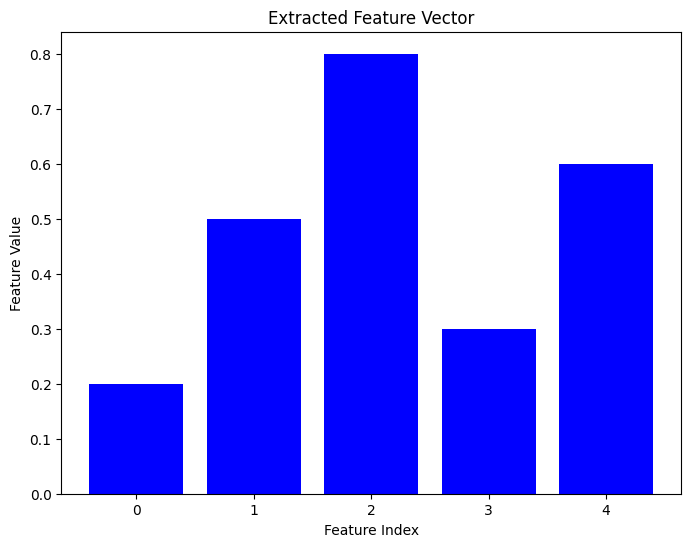

In [28]:
feature_vector = np.array([0.2, 0.5, 0.8, 0.3, 0.6])

# Plotting the feature vector
plt.figure(figsize=(8, 6))
plt.bar(range(len(feature_vector)), feature_vector, color='blue')

plt.xlabel('Feature Index')
plt.ylabel('Feature Value')
plt.title('Extracted Feature Vector')

# Displaying the graph
plt.show()